### [Reference](https://github.com/krishnakartik1/LSTM-footballMatchWinner)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

loc = "/datasets"

In [2]:
df = pd.read_csv('datasets/EPL_sort.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='ignore')
# df = df[df['season'] == '2015/2016
df = df.rename(columns={'date':'Date', 'home_team_api_id':'HomeTeam','away_team_api_id':'AwayTeam',
                        'home_team_goal':'FTHG','away_team_goal':'FTAG','Result':'FTR'})
df

id     season  stage       Date  match_api_id              HomeTeam  \
1     1730  2008/2009      1 2008-08-16        489043               Arsenal   
7     1736  2008/2009      1 2008-08-16        489049      Bolton Wanderers   
5     1734  2008/2009      1 2008-08-16        489047               Everton   
8     1737  2008/2009      1 2008-08-16        489050             Hull City   
6     1735  2008/2009      1 2008-08-16        489048         Middlesbrough   
...    ...        ...    ...        ...           ...                   ...   
2976  4705  2015/2016     38 2016-05-15       1987603            Stoke City   
2977  4706  2015/2016     38 2016-05-15       1987604          Swansea City   
2978  4707  2015/2016     38 2016-05-15       1987605               Watford   
2979  4708  2015/2016     38 2016-05-15       1987606  West Bromwich Albion   
2973  4702  2015/2016     38 2016-05-17       1987600     Manchester United   

                  AwayTeam  FTHG  FTAG  B365H  B365D  B365A  home_y_card  \
1     West Bromwich Albion     1     0   1.20   6.50  15.00            0   
7               Stoke City     3     1   1.83   3.50   4.50            1   
5         Blackburn Rovers     2     3   2.00   3.30   4.00            2   
8                   Fulham     2     1   2.60   3.20   2.80            3   
6        Tottenham Hotspur     2     1   3.20   3.40   2.25            1   
...                    ...   ...   ...    ...    ...    ...          ...   
2976       West Ham United     2     1   3.50   3.60   2.15            3   
2977       Manchester City     1     1   6.00   4.75   1.53            1   
2978            Sunderland     2     2   2.05   3.75   3.70            1   
2979             Liverpool     1     1   2.40   3.60   3.00            3   
2973           Bournemouth     3     1   1.67   4.20   5.25            1   

      home_r_card  away_y_card  away_r_card  home_shoton  away_shoton  \
1               0            0            0           12            2   
7               0            2            0            5            1   
5               0            2            0            2            8   
8               0            0            0            5            4   
6               0            2            0            7            2   
...           ...          ...          ...          ...          ...   
2976            0            1            0            3           10   
2977            0            3            0            1            5   
2978            0            0            0            6            2   
2979            0            1            0            5            3   
2973            0            0            0            5            5   

      home_shotoff  away_shotoff  home_foulcommit  away_foulcommit  \
1               13             3               11                9   
7                7             6               14               15   
5                7             8               11               11   
8                5             6               10                9   
6                5             5               11               11   
...            ...           ...              ...              ...   
2976             2             7                8               12   
2977             2            12                5               19   
2978            10             2               10                9   
2979             8             3               12               13   
2973             4             2                9                8   

      home_cross  away_cross  home_corner  away_corner  home_possession  \
1             21           7            7            5               66   
7             22          29            4            3               47   
5             14          21            3            4               51   
8             16          14            5            6               53   
6             25          27            7            

In [3]:
# raw_data_1=pd.read_csv(loc+"2017-18.csv")
raw_data_1516 = df[df['season'] == '2015/2016']
raw_data_1415 = df[df['season'] == '2014/2015']
raw_data_1314 = df[df['season'] == '2013/2014']
raw_data_1213 = df[df['season'] == '2012/2013']
raw_data_1112 = df[df['season'] == '2011/2012']
raw_data_1011 = df[df['season'] == '2010/2011']
raw_data_0910 = df[df['season'] == '2009/2010']
raw_data_0809 = df[df['season'] == '2008/2009']

In [4]:
# print(len(raw_data_1516.columns))
# print(len(raw_data_1415.columns))
# print(len(raw_data_1314.columns))
# print(len(raw_data_1213.columns))
# print(len(raw_data_1112.columns))
# print(len(raw_data_1011.columns))
# print(len(raw_data_0910.columns))
# print(len(raw_data_0809.columns))

In [5]:
# print(raw_data_1516.shape)
# print(raw_data_1415.shape)
# print(raw_data_1314.shape)
# print(raw_data_1213.shape)
# print(raw_data_1112.shape)
# print(raw_data_1011.shape)
# print(raw_data_0910.shape)
# print(raw_data_0809.shape)

In [6]:
columns_req = ['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']

In [7]:
playing_statistics_1516=raw_data_1516[columns_req]
playing_statistics_1415=raw_data_1415[columns_req]
playing_statistics_1314=raw_data_1314[columns_req]
playing_statistics_1213=raw_data_1213[columns_req]
playing_statistics_1112=raw_data_1112[columns_req]
playing_statistics_1011=raw_data_1011[columns_req]
playing_statistics_0910=raw_data_0910[columns_req]
playing_statistics_0809=raw_data_0809[columns_req]
playing_statistics_1516.head()

Date           HomeTeam           AwayTeam  FTHG  FTAG FTR
2661 2015-08-08        Bournemouth        Aston Villa     0     1   A
2662 2015-08-08            Chelsea       Swansea City     2     2   D
2663 2015-08-08            Everton            Watford     2     2   D
2664 2015-08-08     Leicester City         Sunderland     4     2   H
2665 2015-08-08  Manchester United  Tottenham Hotspur     1     0   H

In [8]:
def get_goals_scored(playing_stat):
    print("get_goals_scored")
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
#         print("check {} \n".format(i))
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        HTGS = playing_stat.iloc[i]['FTHG']
        ATGS = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGS)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGS)
        
#     for i in teams.keys():
#         print("check",len(teams[i]))
#         print(teams[i])
#         if len(teams[i])==31:
#             teams[i]=teams[i][:-1]
#             print("check",len(teams[i]))
#     print("teams",len(teams["Arsenal"]))
#     print(teams)
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsScored = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsScored[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,39):
        GoalsScored[i] = GoalsScored[i] + GoalsScored[i-1]
    return GoalsScored



# Gets the goals conceded agg arranged by teams and matchweek
def get_goals_conceded(playing_stat):
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
#         print("check {} \n".format(i))
        teams[i] = []
    
    # the value corresponding to keys is a list containing the match location.
    for i in range(len(playing_stat)):
        ATGC = playing_stat.iloc[i]['FTHG']
        HTGC = playing_stat.iloc[i]['FTAG']
        teams[playing_stat.iloc[i].HomeTeam].append(HTGC)
        teams[playing_stat.iloc[i].AwayTeam].append(ATGC)
#     print(len(teams.keys))
#     for i in teams.keys():
#         print("check",len(teams[i]))
#         print(teams[i])
#         if len(teams[i])==31:
#             teams[i]=teams[i][:-1]
#             print("check",len(teams[i]))
#     print("teams",len(teams["Arsenal"]))
#     print(teams)
    
    # Create a dataframe for goals scored where rows are teams and cols are matchweek.
    GoalsConceded = pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T
    GoalsConceded[0] = 0
    # Aggregate to get uptil that point
    for i in range(2,len(teams["Arsenal"])+1):
        GoalsConceded[i] = GoalsConceded[i] + GoalsConceded[i-1]
    return GoalsConceded

def get_gss(playing_stat):
    GC = get_goals_conceded(playing_stat)
    GS = get_goals_scored(playing_stat)
   
    j = 0
    HTGS = []
    ATGS = []
    HTGC = []
    ATGC = []

    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTGS.append(GS.loc[ht][j])
        ATGS.append(GS.loc[at][j])
        HTGC.append(GC.loc[ht][j])
        ATGC.append(GC.loc[at][j])
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    
#     print("check line 87")
#     print(playing_stat.shape,len(HTGS))
    
    playing_stat['HTGS'] = HTGS
    playing_stat['ATGS'] = ATGS
    playing_stat['HTGC'] = HTGC
    playing_stat['ATGC'] = ATGC
    
    return playing_stat

# Apply to each dataset
playing_statistics_1516=get_gss(playing_statistics_1516)
playing_statistics_1415=get_gss(playing_statistics_1415)
playing_statistics_1314=get_gss(playing_statistics_1314)
playing_statistics_1213=get_gss(playing_statistics_1213)
playing_statistics_1112=get_gss(playing_statistics_1112)
playing_statistics_1011=get_gss(playing_statistics_1011)
playing_statistics_0910=get_gss(playing_statistics_0910)
playing_statistics_0809=get_gss(playing_statistics_0809)

get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored
get_goals_scored


In [9]:
playing_statistics_1516.tail()

Date              HomeTeam         AwayTeam  FTHG  FTAG FTR  HTGS  \
2976 2016-05-15            Stoke City  West Ham United     2     1   H    39   
2977 2016-05-15          Swansea City  Manchester City     1     1   D    41   
2978 2016-05-15               Watford       Sunderland     2     2   D    38   
2979 2016-05-15  West Bromwich Albion        Liverpool     1     1   D    33   
2973 2016-05-17     Manchester United      Bournemouth     3     1   H    46   

      ATGS  HTGC  ATGC  
2976    64    54    49  
2977    70    51    40  
2978    46    48    60  
2979    62    47    49  
2973    44    34    64

In [10]:
def get_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0
    

def get_cuml_points(matchres):
    matchres_points = matchres.applymap(get_points)
    for i in range(2,31):
        matchres_points[i] = matchres_points[i] + matchres_points[i-1]
        
    matchres_points.insert(column =0, loc = 0, value = [0*i for i in range(20)])
    return matchres_points


def get_matchres(playing_stat):
#     print("here")
    # Create a dictionary with team names as keys
    teams = {}
    for i in playing_stat.groupby('HomeTeam').mean().T.columns:
        teams[i] = []

    # the value corresponding to keys is a list containing the match result
    for i in range(len(playing_stat)):
        if playing_stat.iloc[i].FTR == 'H':
            teams[playing_stat.iloc[i].HomeTeam].append('W')
            teams[playing_stat.iloc[i].AwayTeam].append('L')
        elif playing_stat.iloc[i].FTR == 'A':
            teams[playing_stat.iloc[i].AwayTeam].append('W')
            teams[playing_stat.iloc[i].HomeTeam].append('L')
        else:
            teams[playing_stat.iloc[i].AwayTeam].append('D')
            teams[playing_stat.iloc[i].HomeTeam].append('D')
    
#     for i in teams.keys():
#         print("check",len(teams[i]))
#         print(teams[i])
#         if len(teams[i])>=31:
#             teams[i]=teams[i][:30]
#             print("check",len(teams[i]))
#     print("teams",len(teams["Arsenal"]))
#     print(teams)
            
    return pd.DataFrame(data=teams, index = [i for i in range(1,39)]).T

def get_agg_points(playing_stat):
    matchres = get_matchres(playing_stat)
    cum_pts = get_cuml_points(matchres)
    HTP = []
    ATP = []
    j = 0
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HTP.append(cum_pts.loc[ht][j])
        ATP.append(cum_pts.loc[at][j])

        if ((i + 1)% 10) == 0:
            j = j + 1
            
    playing_stat['HTP'] = HTP
    playing_stat['ATP'] = ATP
    return playing_stat
    
# Apply to each dataset
playing_statistics_1516=get_agg_points(playing_statistics_1516)
playing_statistics_1415=get_agg_points(playing_statistics_1415)
playing_statistics_1314=get_agg_points(playing_statistics_1314)
playing_statistics_1213=get_agg_points(playing_statistics_1213)
playing_statistics_1112=get_agg_points(playing_statistics_1112)
playing_statistics_1011=get_agg_points(playing_statistics_1011)
playing_statistics_0910=get_agg_points(playing_statistics_0910)
playing_statistics_0809=get_agg_points(playing_statistics_0809)

In [11]:
playing_statistics_1516.tail()

Date              HomeTeam         AwayTeam  FTHG  FTAG FTR  HTGS  \
2976 2016-05-15            Stoke City  West Ham United     2     1   H    39   
2977 2016-05-15          Swansea City  Manchester City     1     1   D    41   
2978 2016-05-15               Watford       Sunderland     2     2   D    38   
2979 2016-05-15  West Bromwich Albion        Liverpool     1     1   D    33   
2973 2016-05-17     Manchester United      Bournemouth     3     1   H    46   

      ATGS  HTGC  ATGC  HTP  ATP  
2976    64    54    49    0    3  
2977    70    51    40    3    1  
2978    46    48    60    0    3  
2979    62    47    49    1    1  
2973    44    34    64    0    1

In [12]:
def get_form(playing_stat,num):
    form = get_matchres(playing_stat)
    form_final = form.copy()
    for i in range(num,39):
        form_final[i] = ''
        j = 0
        while j < num:
            form_final[i] += form[i-j]
            j += 1           
    return form_final

def add_form(playing_stat,num):
    form = get_form(playing_stat,num)
    h = ['M' for i in range(num * 10)]  # since form is not available for n MW (n*10)
    a = ['M' for i in range(num * 10)]
    
    j = num
    for i in range((num*10),380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        
        past = form.loc[ht][j]               # get past n results
        h.append(past[num-1])                    # 0 index is most recent
        
        past = form.loc[at][j]               # get past n results.
        a.append(past[num-1])                   # 0 index is most recent
        
        if ((i + 1)% 10) == 0:
            j = j + 1
    
    playing_stat['HM' + str(num)] = h[:playing_stat.shape[0]]                 
    playing_stat['AM' + str(num)] = a[:playing_stat.shape[0]]

    
    return playing_stat


def add_form_df(playing_statistics):
    playing_statistics = add_form(playing_statistics,1)
    playing_statistics = add_form(playing_statistics,2)
    playing_statistics = add_form(playing_statistics,3)
    playing_statistics = add_form(playing_statistics,4)
    playing_statistics = add_form(playing_statistics,5)
    return playing_statistics    
    
# Make changes to df
playing_statistics_1516=add_form_df(playing_statistics_1516)
playing_statistics_1415=add_form_df(playing_statistics_1415)
playing_statistics_1314=add_form_df(playing_statistics_1314)
playing_statistics_1213=add_form_df(playing_statistics_1213)
playing_statistics_1112=add_form_df(playing_statistics_1112)
playing_statistics_1011=add_form_df(playing_statistics_1011)
playing_statistics_0910=add_form_df(playing_statistics_0910)
playing_statistics_0809=add_form_df(playing_statistics_0809)

In [13]:
playing_statistics_1516

Date              HomeTeam           AwayTeam  FTHG  FTAG FTR  \
2661 2015-08-08           Bournemouth        Aston Villa     0     1   A   
2662 2015-08-08               Chelsea       Swansea City     2     2   D   
2663 2015-08-08               Everton            Watford     2     2   D   
2664 2015-08-08        Leicester City         Sunderland     4     2   H   
2665 2015-08-08     Manchester United  Tottenham Hotspur     1     0   H   
...         ...                   ...                ...   ...   ...  ..   
2976 2016-05-15            Stoke City    West Ham United     2     1   H   
2977 2016-05-15          Swansea City    Manchester City     1     1   D   
2978 2016-05-15               Watford         Sunderland     2     2   D   
2979 2016-05-15  West Bromwich Albion          Liverpool     1     1   D   
2973 2016-05-17     Manchester United        Bournemouth     3     1   H   

      HTGS  ATGS  HTGC  ATGC  HTP  ATP HM1 AM1 HM2 AM2 HM3 AM3 HM4 AM4 HM5 AM5  
2661     0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M  
2662     0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M  
2663     0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M  
2664     0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M  
2665     0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M  
...    ...   ...   ...   ...  ...  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
2976    39    64    54    49    0    3   L   W   D   L   L   W   L   W   L   D  
2977    41    70    51    40    3    1   W   D   W   L   L   W   L   D   W   W  
2978    38    46    48    60    0    3   L   W   L   W   W   D   L   D   W   W  
2979    33    62    47    49    1    1   D   D   L   W   D   L   L   D   L   W  
2973    46    44    34    64    0    1   L   D   W   L   D   L   W   L   W   W  

[380 rows x 22 columns]

In [14]:
cols = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
        'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5' ]

playing_statistics_1516=playing_statistics_1516[cols]
playing_statistics_1415=playing_statistics_1415[cols]
playing_statistics_1314=playing_statistics_1314[cols]
playing_statistics_1213=playing_statistics_1213[cols]
playing_statistics_1112=playing_statistics_1112[cols]
playing_statistics_1011=playing_statistics_1011[cols]
playing_statistics_0910=playing_statistics_0910[cols]
playing_statistics_0809=playing_statistics_0809[cols]

In [15]:
playing_statistics_1516.tail()

Date              HomeTeam         AwayTeam  FTHG  FTAG FTR  HTGS  \
2976 2016-05-15            Stoke City  West Ham United     2     1   H    39   
2977 2016-05-15          Swansea City  Manchester City     1     1   D    41   
2978 2016-05-15               Watford       Sunderland     2     2   D    38   
2979 2016-05-15  West Bromwich Albion        Liverpool     1     1   D    33   
2973 2016-05-17     Manchester United      Bournemouth     3     1   H    46   

      ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3 AM4 AM5  
2976    64    54    49    0    3   L   D   L   L   L   W   L   W   W   D  
2977    70    51    40    3    1   W   W   L   L   W   D   L   W   D   W  
2978    46    48    60    0    3   L   L   W   L   W   W   W   D   D   W  
2979    62    47    49    1    1   D   L   D   L   L   D   W   L   D   W  
2973    44    34    64    0    1   L   W   D   W   W   D   L   L   L   W

In [16]:
# Data source of `EPLStandings.csv`
# https://github.com/RudrakshTuwani/Football-Data-Analysis-and-Prediction/blob/master/Datasets/EPLStandings.csv
Standings = pd.read_csv("datasets/EPLStandings.csv")
Standings.set_index(['Team'], inplace=True)
Standings = Standings.fillna(18)
Standings = Standings.rename(index={'Swansea': 'Swansea City', 'Leicester': 'Leicester City',
                                    'Man United': 'Manchester United', 'Tottenham': 'Tottenham Hotspur',
                                    'Norwich': 'Norwich City', 'West Ham': 'West Ham United',
                                    'Newcastle': 'Newcastle United', 'Stoke': 'Stoke City',
                                    'West Brom': 'West Bromwich Albion', 'Man City': 'Manchester City',
                                    'QPR': 'Queens Park Rangers', 'Hull': 'Hull City',
                                    'Cardiff': 'Cardiff City', 'Wigan': 'Wigan Athletic',
                                    'Blackburn': 'Blackburn Rovers', 'Wolves': 'Wolverhampton Wanderers',
                                    'Bolton': 'Bolton Wanderers', 'Birmingham': 'Birmingham City'})
Standings = Standings.astype(int)
# print(Standings)

def get_last(playing_stat, Standings, year):
    HomeTeamLP = []
    AwayTeamLP = []
    for i in range(380):
        ht = playing_stat.iloc[i].HomeTeam
        at = playing_stat.iloc[i].AwayTeam
        HomeTeamLP.append(Standings.loc[ht][year])
        AwayTeamLP.append(Standings.loc[at][year])
    playing_stat['HomeTeamLP'] = HomeTeamLP
    playing_stat['AwayTeamLP'] = AwayTeamLP
    return playing_stat

playing_statistics_1516 = get_last(playing_statistics_1516, Standings, "2014")
playing_statistics_1415 = get_last(playing_statistics_1415, Standings, "2013")
playing_statistics_1314 = get_last(playing_statistics_1314, Standings, "2012")
playing_statistics_1213 = get_last(playing_statistics_1213, Standings, "2011")
playing_statistics_1112 = get_last(playing_statistics_1112, Standings, "2010")
playing_statistics_1011 = get_last(playing_statistics_1011, Standings, "2009")
playing_statistics_0910 = get_last(playing_statistics_0910, Standings, "2008")
playing_statistics_0809 = get_last(playing_statistics_0809, Standings, "2007")

In [17]:
playing_statistics_1516.head()

Date           HomeTeam           AwayTeam  FTHG  FTAG FTR  HTGS  \
2661 2015-08-08        Bournemouth        Aston Villa     0     1   A     0   
2662 2015-08-08            Chelsea       Swansea City     2     2   D     0   
2663 2015-08-08            Everton            Watford     2     2   D     0   
2664 2015-08-08     Leicester City         Sunderland     4     2   H     0   
2665 2015-08-08  Manchester United  Tottenham Hotspur     1     0   H     0   

      ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3 AM4 AM5  \
2661     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
2662     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
2663     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
2664     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
2665     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   

      HomeTeamLP  AwayTeamLP  
2661          18          15  
2662           3          12  
2663           5          18  
2664          18          14  
2665           7           6

In [18]:
def get_mw(playing_stat):
    j = 1
    MatchWeek = []
    for i in range(380):
        MatchWeek.append(j)
        if ((i + 1)% 10) == 0:
            j = j + 1
    playing_stat['MW'] = MatchWeek
    return playing_stat

playing_statistics_1516 = get_mw(playing_statistics_1516)
playing_statistics_1415 = get_mw(playing_statistics_1415)
playing_statistics_1314 = get_mw(playing_statistics_1314)
playing_statistics_1213 = get_mw(playing_statistics_1213)
playing_statistics_1112 = get_mw(playing_statistics_1112)
playing_statistics_1011 = get_mw(playing_statistics_1011)
playing_statistics_0910 = get_mw(playing_statistics_0910)
playing_statistics_0809 = get_mw(playing_statistics_0809)

In [19]:
playing_stat = pd.concat([playing_statistics_1516,
                         playing_statistics_1415,
                         playing_statistics_1314,
                         playing_statistics_1213,
                         playing_statistics_1112,
                         playing_statistics_1011,
                         playing_statistics_0910,
                         playing_statistics_0809], ignore_index=True)


# Gets the form points.
def get_form_points(string):
    sum = 0
    for letter in string:
        sum += get_points(letter)
    return sum

playing_stat['HTFormPtsStr'] = playing_stat['HM1'] + playing_stat['HM2'] + playing_stat['HM3'] + playing_stat['HM4'] + playing_stat['HM5']
playing_stat['ATFormPtsStr'] = playing_stat['AM1'] + playing_stat['AM2'] + playing_stat['AM3'] + playing_stat['AM4'] + playing_stat['AM5']

playing_stat['HTFormPts'] = playing_stat['HTFormPtsStr'].apply(get_form_points)
playing_stat['ATFormPts'] = playing_stat['ATFormPtsStr'].apply(get_form_points)

# Identify Win/Loss Streaks if any.
def get_3game_ws(string):
    if string[-3:] == 'WWW':
        return 1
    else:
        return 0
    
def get_5game_ws(string):
    if string == 'WWWWW':
        return 1
    else:
        return 0
    
def get_3game_ls(string):
    if string[-3:] == 'LLL':
        return 1
    else:
        return 0
    
def get_5game_ls(string):
    if string == 'LLLLL':
        return 1
    else:
        return 0
    
playing_stat['HTWinStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ws)
playing_stat['HTWinStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ws)
playing_stat['HTLossStreak3'] = playing_stat['HTFormPtsStr'].apply(get_3game_ls)
playing_stat['HTLossStreak5'] = playing_stat['HTFormPtsStr'].apply(get_5game_ls)

playing_stat['ATWinStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ws)
playing_stat['ATWinStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ws)
playing_stat['ATLossStreak3'] = playing_stat['ATFormPtsStr'].apply(get_3game_ls)
playing_stat['ATLossStreak5'] = playing_stat['ATFormPtsStr'].apply(get_5game_ls)

playing_stat.keys()

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTGS', 'ATGS',
       'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3', 'HM4', 'HM5', 'AM1',
       'AM2', 'AM3', 'AM4', 'AM5', 'HomeTeamLP', 'AwayTeamLP', 'MW',
       'HTFormPtsStr', 'ATFormPtsStr', 'HTFormPts', 'ATFormPts',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'],
      dtype='object')

In [20]:
# Get Goal Difference
playing_stat['HTGD'] = playing_stat['HTGS'] - playing_stat['HTGC']
playing_stat['ATGD'] = playing_stat['ATGS'] - playing_stat['ATGC']

# Diff in points
playing_stat['DiffPts'] = playing_stat['HTP'] - playing_stat['ATP']
playing_stat['DiffFormPts'] = playing_stat['HTFormPts'] - playing_stat['ATFormPts']

# Diff in last year positions
playing_stat['DiffLP'] = playing_stat['HomeTeamLP'] - playing_stat['AwayTeamLP']

In [21]:
playing_stat.head()

Date           HomeTeam           AwayTeam  FTHG  FTAG FTR  HTGS  \
0 2015-08-08        Bournemouth        Aston Villa     0     1   A     0   
1 2015-08-08            Chelsea       Swansea City     2     2   D     0   
2 2015-08-08            Everton            Watford     2     2   D     0   
3 2015-08-08     Leicester City         Sunderland     4     2   H     0   
4 2015-08-08  Manchester United  Tottenham Hotspur     1     0   H     0   

   ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3 AM4 AM5  \
0     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
1     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
2     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
3     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   
4     0     0     0    0    0   M   M   M   M   M   M   M   M   M   M   

   HomeTeamLP  AwayTeamLP  MW HTFormPtsStr ATFormPtsStr  HTFormPts  ATFormPts  \
0          18          15   1        MMMMM        MMMMM          0          0   
1           3          12   1        MMMMM        MMMMM          0          0   
2           5          18   1        MMMMM        MMMMM          0          0   
3          18          14   1        MMMMM        MMMMM          0          0   
4           7           6   1        MMMMM        MMMMM          0          0   

   HTWinStreak3  HTWinStreak5  HTLossStreak3  HTLossStreak5  ATWinStreak3  \
0             0             0              0              0             0   
1             0             0              0              0             0   
2             0             0              0              0             0   
3             0             0              0              0             0   
4             0             0              0              0             0   

   ATWinStreak5  ATLossStreak3  ATLossStreak5  HTGD  ATGD  DiffPts  \
0             0              0              0     0     0        0   
1             0              0              0     0     0        0   
2             0              0              0     0     0        0   
3             0              0              0     0     0        0   
4             0              0              0     0     0        0   

   DiffFormPts  DiffLP  
0            0       3  
1            0      -9  
2            0     -13  
3            0       4  
4            0       1

In [22]:
# def only_hw(string):
#     if string == 'H':
#         return 'H'
#     else:
#         return 'NH'
    
# playing_stat['FTR'] = playing_stat.FTR.apply(only_hw)

In [23]:
playing_stat=playing_stat.drop(["Date","HomeTeam","AwayTeam","HomeTeamLP","AwayTeamLP","HTFormPts","ATFormPts",
                                "FTHG","FTAG","HTFormPtsStr","ATFormPtsStr"],axis=1)
playing_stat.tail()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3  \
3035   H    74    44    26    42    3    3   W   W   W   W   D   W   D   W   
3036   H    57    41    50    52    0    1   L   L   W   W   W   D   D   D   
3037   A    32    65    51    22    0    3   L   D   L   L   W   W   W   W   
3038   H    40    27    44    55    0    1   L   L   W   L   D   D   L   L   
3039   H    33    38    45    56    0    3   L   L   L   D   L   W   L   L   

     AM4 AM5  MW  HTWinStreak3  HTWinStreak5  HTLossStreak3  HTLossStreak5  \
3035   L   W  38             0             0              0              0   
3036   D   L  38             1             0              0              0   
3037   W   D  38             0             0              0              0   
3038   L   D  38             0             0              0              0   
3039   D   L  38             0             0              0              0   

      ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  HTGD  ATGD  \
3035             0             0              0              0    48     2   
3036             0             0              0              0     7   -11   
3037             0             0              0              0   -19    43   
3038             0             0              0              0    -4   -28   
3039             0             0              0              0   -12   -18   

      DiffPts  DiffFormPts  DiffLP  
3035        0            3      -2  
3036       -1            5       7  
3037       -3           -9      16  
3038       -1            2       3  
3039       -3           -3       9

In [24]:
playing_stat.keys()

Index(['FTR', 'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2',
       'HM3', 'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW',
       'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5',
       'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5',
       'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts', 'DiffLP'],
      dtype='object')

In [25]:
# Scale DiffPts , DiffFormPts, HTGD, ATGD by Matchweek.
cols = ['HTGD','ATGD','DiffPts','DiffFormPts','HTP','ATP']

In [26]:
playing_stat.MW = playing_stat.MW.astype(float)

for col in cols:
    playing_stat[col] = playing_stat[col] / playing_stat.MW

In [27]:
# playing_stat.HTGS=(playing_stat.HTGS)/
playing_stat.HTGS=playing_stat.HTGS/playing_stat.HTGS.max()

In [28]:
playing_stat.ATGS=playing_stat.ATGS/playing_stat.ATGS.max()
playing_stat.HTGC=playing_stat.HTGC/playing_stat.HTGC.max()
playing_stat.ATGC=playing_stat.ATGC/playing_stat.ATGC.max()
playing_stat

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP HM1 HM2 HM3  \
0      A  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
1      D  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2      D  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
3      H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
4      H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
...   ..   ...       ...       ...       ...       ...       ...  ..  ..  ..   
3035   H  0.74  0.458333  0.313253  0.531646  0.078947  0.078947   W   W   W   
3036   H  0.57  0.427083  0.602410  0.658228  0.000000  0.026316   L   L   W   
3037   A  0.32  0.677083  0.614458  0.278481  0.000000  0.078947   L   D   L   
3038   H  0.40  0.281250  0.530120  0.696203  0.000000  0.026316   L   L   W   
3039   H  0.33  0.395833  0.542169  0.708861  0.000000  0.078947   L   L   L   

     HM4 HM5 AM1 AM2 AM3 AM4 AM5    MW  HTWinStreak3  HTWinStreak5  \
0      M   M   M   M   M   M   M   1.0             0             0   
1      M   M   M   M   M   M   M   1.0             0             0   
2      M   M   M   M   M   M   M   1.0             0             0   
3      M   M   M   M   M   M   M   1.0             0             0   
4      M   M   M   M   M   M   M   1.0             0             0   
...   ..  ..  ..  ..  ..  ..  ..   ...           ...           ...   
3035   W   D   W   D   W   L   W  38.0             0             0   
3036   W   W   D   D   D   D   L  38.0             1             0   
3037   L   W   W   W   W   W   D  38.0             0             0   
3038   L   D   D   L   L   L   D  38.0             0             0   
3039   D   L   W   L   L   D   L  38.0             0             0   

      HTLossStreak3  HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  \
0                 0              0             0             0              0   
1                 0              0             0             0              0   
2                 0              0             0             0              0   
3                 0              0             0             0              0   
4                 0              0             0             0              0   
...             ...            ...           ...           ...            ...   
3035              0              0             0             0              0   
3036              0              0             0             0              0   
3037              0              0             0             0              0   
3038              0              0             0             0              0   
3039              0              0             0             0              0   

      ATLossStreak5      HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
0                 0  0.000000  0.000000  0.000000     0.000000       3  
1                 0  0.000000  0.000000  0.000000     0.000000      -9  
2                 0  0.000000  0.000000  0.000000     0.000000     -13  
3                 0  0.000000  0.000000  0.000000     0.000000       4  
4                 0  0.000000  0.000000  0.000000     0.000000       1  
...             ...       ...       ...       ...          ...     ...  
3035              0  1.263158  0.052632  0.000000     0.078947      -2  
3036              0  0.184211 -0.289474 -0.026316     0.131579       7  
3037              0 -0.500000  1.131579 -0.078947    -0.236842      16  
3038              0 -0.105263 -0.736842 -0.026316     0.052632       3  
3039              0 -0.315789 -0.473684 -0.078947    -0.078947       9  

[3040 rows x 31 columns]

In [29]:
playing_stat=playing_stat.drop(["MW"],axis=1)

In [30]:
playing_stat.shape

(3040, 30)

In [31]:
3040 - 380

2660

In [32]:
# Testing set (2015-16 season)
test = playing_stat[2660:]
test

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP HM1 HM2 HM3  \
2660   H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2661   H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2662   A  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2663   H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
2664   H  0.00  0.000000  0.000000  0.000000  0.000000  0.000000   M   M   M   
...   ..   ...       ...       ...       ...       ...       ...  ..  ..  ..   
3035   H  0.74  0.458333  0.313253  0.531646  0.078947  0.078947   W   W   W   
3036   H  0.57  0.427083  0.602410  0.658228  0.000000  0.026316   L   L   W   
3037   A  0.32  0.677083  0.614458  0.278481  0.000000  0.078947   L   D   L   
3038   H  0.40  0.281250  0.530120  0.696203  0.000000  0.026316   L   L   W   
3039   H  0.33  0.395833  0.542169  0.708861  0.000000  0.078947   L   L   L   

     HM4 HM5 AM1 AM2 AM3 AM4 AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  \
2660   M   M   M   M   M   M   M             0             0              0   
2661   M   M   M   M   M   M   M             0             0              0   
2662   M   M   M   M   M   M   M             0             0              0   
2663   M   M   M   M   M   M   M             0             0              0   
2664   M   M   M   M   M   M   M             0             0              0   
...   ..  ..  ..  ..  ..  ..  ..           ...           ...            ...   
3035   W   D   W   D   W   L   W             0             0              0   
3036   W   W   D   D   D   D   L             1             0              0   
3037   L   W   W   W   W   W   D             0             0              0   
3038   L   D   D   L   L   L   D             0             0              0   
3039   D   L   W   L   L   D   L             0             0              0   

      HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  \
2660              0             0             0              0              0   
2661              0             0             0              0              0   
2662              0             0             0              0              0   
2663              0             0             0              0              0   
2664              0             0             0              0              0   
...             ...           ...           ...            ...            ...   
3035              0             0             0              0              0   
3036              0             0             0              0              0   
3037              0             0             0              0              0   
3038              0             0             0              0              0   
3039              0             0             0              0              0   

          HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
2660  0.000000  0.000000  0.000000     0.000000     -14  
2661  0.000000  0.000000  0.000000     0.000000     -11  
2662  0.000000  0.000000  0.000000     0.000000      -4  
2663  0.000000  0.000000  0.000000     0.000000       0  
2664  0.000000  0.000000  0.000000     0.000000       7  
...        ...       ...       ...          ...     ...  
3035  1.263158  0.052632  0.000000     0.078947      -2  
3036  0.184211 -0.289474 -0.026316     0.131579       7  
3037 -0.500000  1.131579 -0.078947    -0.236842      16  
3038 -0.105263 -0.736842 -0.026316     0.052632       3  
3039 -0.315789 -0.473684 -0.078947    -0.078947       9  

[380 rows x 30 columns]

In [33]:
# Train dataset (season 2008/2009 until 2014/2015)
train=playing_stat[:2660]
train.tail(10)

FTR  HTGS      ATGS      HTGC      ATGC       HTP       ATP HM1 HM2 HM3  \
2650   H  0.79  0.406250  0.493976  0.531646  0.000000  0.000000   L   D   L   
2651   A  0.52  0.416667  0.457831  0.696203  0.000000  0.078947   L   W   W   
2652   H  0.40  0.385417  0.795181  0.569620  0.000000  0.078947   L   D   W   
2653   H  0.38  0.677083  0.963855  0.468354  0.000000  0.078947   L   L   L   
2654   H  0.95  0.385417  0.385542  0.898734  0.078947  0.026316   W   W   L   
2655   H  0.59  0.354167  0.590361  0.822785  0.026316  0.078947   D   W   W   
2656   D  0.34  0.635417  0.903614  0.443038  0.026316  0.000000   D   L   L   
2657   H  0.82  0.354167  0.337349  0.556962  0.078947  0.078947   W   W   W   
2658   D  0.46  0.750000  0.783133  0.556962  0.000000  0.000000   L   W   L   
2659   H  0.30  0.489583  0.662651  0.683544  0.000000  0.000000   L   D   D   

     HM4 HM5 AM1 AM2 AM3 AM4 AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  \
2650   L   W   L   W   L   D   D             0             0              0   
2651   W   D   W   D   L   D   D             0             0              0   
2652   L   L   W   L   D   L   D             0             0              0   
2653   W   L   W   W   L   W   W             0             0              0   
2654   W   W   D   L   W   D   L             0             0              0   
2655   D   D   W   D   L   D   D             0             0              0   
2656   D   L   L   W   W   D   D             0             0              0   
2657   D   L   W   D   L   L   D             0             0              0   
2658   W   D   L   W   D   L   W             0             0              0   
2659   D   L   L   W   W   L   W             0             0              0   

      HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  \
2650              0             0             0              0              0   
2651              0             0             0              0              0   
2652              0             0             0              0              0   
2653              0             0             0              0              0   
2654              0             0             0              0              0   
2655              0             0             0              0              0   
2656              0             0             0              0              0   
2657              0             0             0              0              0   
2658              0             0             0              0              0   
2659              0             0             0              0              0   

          HTGD      ATGD   DiffPts  DiffFormPts  DiffLP  
2650  1.000000 -0.078947  0.000000    -0.026316     -14  
2651  0.368421 -0.394737 -0.078947     0.105263      -1  
2652 -0.684211 -0.210526 -0.078947    -0.026316      -3  
2653 -1.105263  0.736842 -0.078947    -0.236842       7  
2654  1.657895 -0.894737  0.052632     0.184211     -12  
2655  0.263158 -0.815789 -0.052632     0.078947      -3  
2656 -1.078947  0.684211  0.026316    -0.157895      14  
2657  1.421053 -0.263158  0.000000     0.131579     -17  
2658 -0.500000  0.736842  0.000000     0.000000       1  
2659 -0.657895 -0.184211  0.000000    -0.157895       3

In [34]:
print(train.shape)
print(test.shape)

(2660, 30)
(380, 30)


## Label Encoding Preprocessing

In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [36]:
ftrLE=LabelEncoder()
train.FTR=ftrLE.fit_transform(train.FTR)
test.FTR=ftrLE.transform(test.FTR)
train.head(10)

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3 AM4  \
0    0   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
1    1   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
2    1   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
3    2   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
4    2   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
5    0   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
6    0   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
7    1   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
8    0   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   
9    0   0.0   0.0   0.0   0.0  0.0  0.0   M   M   M   M   M   M   M   M   M   

  AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  HTLossStreak5  ATWinStreak3  \
0   M             0             0              0              0             0   
1   M             0             0              0              0             0   
2   M             0             0              0              0             0   
3   M             0             0              0              0             0   
4   M             0             0              0              0             0   
5   M             0             0              0              0             0   
6   M             0             0              0              0             0   
7   M             0             0              0              0             0   
8   M             0             0              0              0             0   
9   M             0             0              0              0             0   

   ATWinStreak5  ATLossStreak3  ATLossStreak5  HTGD  ATGD  DiffPts  \
0             0              0              0   0.0   0.0      0.0   
1             0              0              0   0.0   0.0      0.0   
2             0              0              0   0.0   0.0      0.0   
3             0              0              0   0.0   0.0      0.0   
4             0              0              0   0.0   0.0      0.0   
5             0              0              0   0.0   0.0      0.0   
6             0              0              0   0.0   0.0      0.0   
7             0              0              0   0.0   0.0      0.0   
8             0              0              0   0.0   0.0      0.0   
9             0              0              0   0.0   0.0      0.0   

   DiffFormPts  DiffLP  
0          0.0       3  
1          0.0      -9  
2          0.0     -13  
3          0.0       4  
4          0.0       1  
5          0.0       7  
6          0.0      -9  
7          0.0       2  
8          0.0       7  
9          0.0      16

In [37]:
hmLE=LabelEncoder()
train.HM1=hmLE.fit_transform(train.HM1)
test.HM1=hmLE.transform(test.HM1)
test.head()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP  HM1 HM2 HM3 HM4 HM5 AM1 AM2 AM3  \
2660    2   0.0   0.0   0.0   0.0  0.0  0.0    2   M   M   M   M   M   M   M   
2661    2   0.0   0.0   0.0   0.0  0.0  0.0    2   M   M   M   M   M   M   M   
2662    0   0.0   0.0   0.0   0.0  0.0  0.0    2   M   M   M   M   M   M   M   
2663    2   0.0   0.0   0.0   0.0  0.0  0.0    2   M   M   M   M   M   M   M   
2664    2   0.0   0.0   0.0   0.0  0.0  0.0    2   M   M   M   M   M   M   M   

     AM4 AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  HTLossStreak5  \
2660   M   M             0             0              0              0   
2661   M   M             0             0              0              0   
2662   M   M             0             0              0              0   
2663   M   M             0             0              0              0   
2664   M   M             0             0              0              0   

      ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  HTGD  ATGD  \
2660             0             0              0              0   0.0   0.0   
2661             0             0              0              0   0.0   0.0   
2662             0             0              0              0   0.0   0.0   
2663             0             0              0              0   0.0   0.0   
2664             0             0              0              0   0.0   0.0   

      DiffPts  DiffFormPts  DiffLP  
2660      0.0          0.0     -14  
2661      0.0          0.0     -11  
2662      0.0          0.0      -4  
2663      0.0          0.0       0  
2664      0.0          0.0       7

In [38]:
train.HM2=hmLE.fit_transform(train.HM2)
train.HM3=hmLE.fit_transform(train.HM3)
train.HM4=hmLE.fit_transform(train.HM4)
train.HM5=hmLE.fit_transform(train.HM5)
train.AM1=hmLE.fit_transform(train.AM1)
train.AM2=hmLE.fit_transform(train.AM2)
train.AM3=hmLE.fit_transform(train.AM3)
train.AM4=hmLE.fit_transform(train.AM4)
train.AM5=hmLE.fit_transform(train.AM5)

test.HM2=hmLE.fit_transform(test.HM2)
test.HM3=hmLE.fit_transform(test.HM3)
test.HM4=hmLE.fit_transform(test.HM4)
test.HM5=hmLE.fit_transform(test.HM5)
test.AM1=hmLE.fit_transform(test.AM1)
test.AM2=hmLE.fit_transform(test.AM2)
test.AM3=hmLE.fit_transform(test.AM3)
test.AM4=hmLE.fit_transform(test.AM4)
test.AM5=hmLE.fit_transform(test.AM5)

In [39]:
test.head()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP  HM1  HM2  HM3  HM4  HM5  AM1  \
2660    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2661    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2662    0   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2663    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2664    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   

      AM2  AM3  AM4  AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  \
2660    2    2    2    2             0             0              0   
2661    2    2    2    2             0             0              0   
2662    2    2    2    2             0             0              0   
2663    2    2    2    2             0             0              0   
2664    2    2    2    2             0             0              0   

      HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  \
2660              0             0             0              0              0   
2661              0             0             0              0              0   
2662              0             0             0              0              0   
2663              0             0             0              0              0   
2664              0             0             0              0              0   

      HTGD  ATGD  DiffPts  DiffFormPts  DiffLP  
2660   0.0   0.0      0.0          0.0     -14  
2661   0.0   0.0      0.0          0.0     -11  
2662   0.0   0.0      0.0          0.0      -4  
2663   0.0   0.0      0.0          0.0       0  
2664   0.0   0.0      0.0          0.0       7

In [40]:
print(train.shape)
print(test.shape)

(2660, 30)
(380, 30)


In [41]:
onehotencoder=OneHotEncoder()
# onehotencoder.fit(train.FTR.reshape(-1,1))
onehotencoder.fit(train.FTR.values.reshape(-1,1))
#reference https://stackoverflow.com/questions/53723928/attributeerror-series-object-has-no-attribute-reshape

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [42]:
finalTrain=onehotencoder.transform([[each] for each in train.FTR]).toarray()
finalTest=onehotencoder.transform([[each] for each in test.FTR]).toarray()

In [43]:
print(finalTrain.shape)
print(finalTest.shape)

(2660, 3)
(380, 3)


In [44]:
train.loc[:,"final1"]=finalTrain[:,0]
train.loc[:,"final2"]=finalTrain[:,1]
train.head()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP  HM1  HM2  HM3  HM4  HM5  AM1  AM2  \
0    0   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2    2   
1    1   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2    2   
2    1   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2    2   
3    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2    2   
4    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2    2   

   AM3  AM4  AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  HTLossStreak5  \
0    2    2    2             0             0              0              0   
1    2    2    2             0             0              0              0   
2    2    2    2             0             0              0              0   
3    2    2    2             0             0              0              0   
4    2    2    2             0             0              0              0   

   ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  HTGD  ATGD  \
0             0             0              0              0   0.0   0.0   
1             0             0              0              0   0.0   0.0   
2             0             0              0              0   0.0   0.0   
3             0             0              0              0   0.0   0.0   
4             0             0              0              0   0.0   0.0   

   DiffPts  DiffFormPts  DiffLP  final1  final2  
0      0.0          0.0       3     1.0     0.0  
1      0.0          0.0      -9     0.0     1.0  
2      0.0          0.0     -13     0.0     1.0  
3      0.0          0.0       4     0.0     0.0  
4      0.0          0.0       1     0.0     0.0

In [45]:
test.loc[:,"final1"]=finalTest[:,0]
test.loc[:,"final2"]=finalTest[:,1]
test.head()

FTR  HTGS  ATGS  HTGC  ATGC  HTP  ATP  HM1  HM2  HM3  HM4  HM5  AM1  \
2660    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2661    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2662    0   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2663    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   
2664    2   0.0   0.0   0.0   0.0  0.0  0.0    2    2    2    2    2    2   

      AM2  AM3  AM4  AM5  HTWinStreak3  HTWinStreak5  HTLossStreak3  \
2660    2    2    2    2             0             0              0   
2661    2    2    2    2             0             0              0   
2662    2    2    2    2             0             0              0   
2663    2    2    2    2             0             0              0   
2664    2    2    2    2             0             0              0   

      HTLossStreak5  ATWinStreak3  ATWinStreak5  ATLossStreak3  ATLossStreak5  \
2660              0             0             0              0              0   
2661              0             0             0              0              0   
2662              0             0             0              0              0   
2663              0             0             0              0              0   
2664              0             0             0              0              0   

      HTGD  ATGD  DiffPts  DiffFormPts  DiffLP  final1  final2  
2660   0.0   0.0      0.0          0.0     -14     0.0     0.0  
2661   0.0   0.0      0.0          0.0     -11     0.0     0.0  
2662   0.0   0.0      0.0          0.0      -4     1.0     0.0  
2663   0.0   0.0      0.0          0.0       0     0.0     0.0  
2664   0.0   0.0      0.0          0.0       7     0.0     0.0

In [46]:
# train=train.drop(["HM5","AM5"],axis=1)
# test=test.drop(["HM5","AM5"],axis=1)

In [47]:
print(train.shape)
print(test.shape)

(2660, 32)
(380, 32)


In [48]:
train.to_csv("datasets/epl_data_train_onehot.csv",index=None)
test.to_csv("datasets/epl_data_test_onehot.csv",index=None)

## Feature Importance

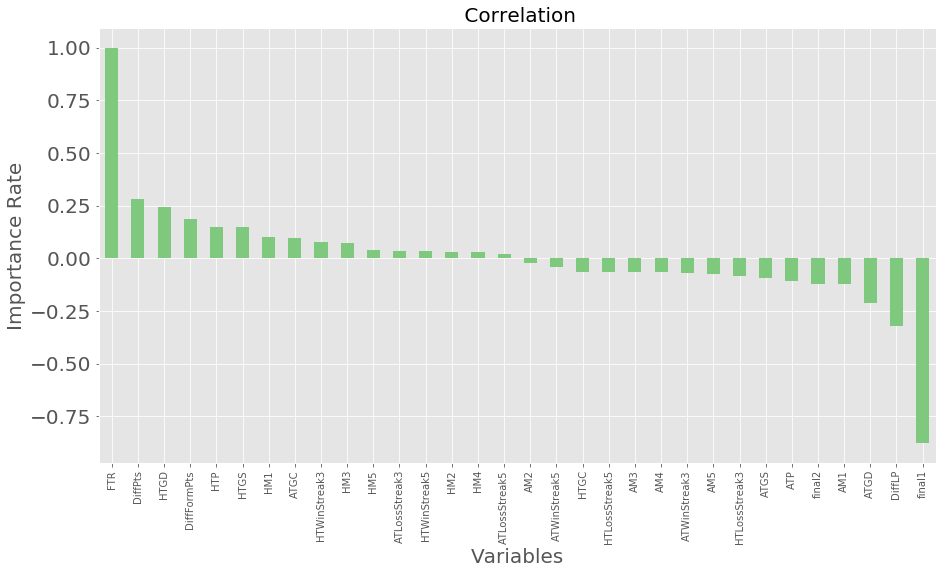

Most Positive Correlations: 
 FTR            1.000000
DiffPts        0.281677
HTGD           0.245551
DiffFormPts    0.186532
HTP            0.149372
Name: FTR, dtype: float64

Most Negative Correlations: 
 final2   -0.120799
AM1      -0.123510
ATGD     -0.213566
DiffLP   -0.320919
final1   -0.876598
Name: FTR, dtype: float64


In [49]:
#VISUALISATION
import matplotlib.pyplot as plt
#df_dum.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = train.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

## Test Prediction

In [50]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
train=pd.read_csv("datasets/epl_data_train_onehot.csv")
test=pd.read_csv("datasets/epl_data_test_onehot.csv")
# print(train.head())
# print(train.shape)

In [52]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 31)
(2660,)


In [53]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 31)
(380,)


In [54]:
columns = X_train.shape[1]
columns

31

In [67]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
def fit_model(learning_rate, hidden_layer, dropout, batch_size):
    x = Input(shape=(columns,))
    # h = Conv2D(32, (7, 7), strides=(2, 2))(x)
    # h = Activation('relu')(x)
    h = Flatten()(x)
    for i in hidden_layer:
        h = Dense(i, activation = 'relu')(h)
    # for i in range(10):
    #     h = Dense(75)(h)
    h = Dropout(dropout)(h)
    p = Activation('softmax')(h)

    # Now that we have defined how to find p from x, we can create a 
    # model simply by saying what is input and what is output
    model = Model(inputs=x, outputs=p)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_split=0.04)
    return history,model

In [71]:
#hyperparam tuning
#learning_rate
learning_rates = [1e-5,1e-6,1e-7]
#hidden_layers
hidden_layers = [[41,75],[41,10],[41,10,10,10]]
#dropout
dropouts = [0,.3,.5,.7]
#batch_size
batch_sizes = [8,16,32,64]
#result
result = {}
best_history = None
best_val_accuracy = 0
best_model = None

for lr in learning_rates:
    for hl in hidden_layers:
        hl_str = '-'.join(map(str, hl))+'-3'
        for dp in dropouts:
            for bs in batch_sizes:
                history, model = fit_model(lr, hl, dp, bs)
                tmp = {}
                tmp['loss'] = history.history['loss'][-1]
                tmp['accuracy'] = history.history['accuracy'][-1]
                tmp['val_loss'] = history.history['val_loss'][-1]
                tmp['val_accuracy'] = history.history['val_accuracy'][-1]
    #             print(history)
                result[(lr,hl_str,dp, bs)] = tmp
                print(tmp['val_accuracy'], tmp)
                if tmp['val_accuracy'] > best_val_accuracy:
                    best_val_accuracy = tmp['val_accuracy']
                    best_history = history
                    best_model = model
                
                
            


Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 41)                1312      
_________________________________________________________________
dense_53 (Dense)             (None, 75)                3150      
_________________________________________________________________
dropout_26 (Dropout)         (None, 75)                0         
_________________________________________________________________
activation_26 (Activation)   (None, 75)                0         
Total params: 4,462
Trainable params: 4,462
Non-trainable params: 0
________________________________________________________

2553/2553 [==============================] - 0s 143us/sample - loss: 0.9960 - accuracy: 0.5962 - val_loss: 0.9391 - val_accuracy: 0.6636
Epoch 48/200
2553/2553 [==============================] - 0s 141us/sample - loss: 0.9866 - accuracy: 0.6020 - val_loss: 0.9301 - val_accuracy: 0.6822
Epoch 49/200
2553/2553 [==============================] - 0s 136us/sample - loss: 0.9776 - accuracy: 0.6091 - val_loss: 0.9212 - val_accuracy: 0.6822
Epoch 50/200
2553/2553 [==============================] - 0s 135us/sample - loss: 0.9690 - accuracy: 0.6146 - val_loss: 0.9128 - val_accuracy: 0.6916
Epoch 51/200
2553/2553 [==============================] - 0s 134us/sample - loss: 0.9607 - accuracy: 0.6165 - val_loss: 0.9046 - val_accuracy: 0.6916
Epoch 52/200
2553/2553 [==============================] - 0s 134us/sample - loss: 0.9526 - accuracy: 0.6240 - val_loss: 0.8968 - val_accuracy: 0.7009
Epoch 53/200
2553/2553 [==============================] - 0s 137us/sample - loss: 0.9448 - accuracy: 0.6271 - val

2553/2553 [==============================] - 0s 142us/sample - loss: 0.6603 - accuracy: 0.8386 - val_loss: 0.6113 - val_accuracy: 0.8785
Epoch 102/200
2553/2553 [==============================] - 0s 141us/sample - loss: 0.6549 - accuracy: 0.8421 - val_loss: 0.6060 - val_accuracy: 0.8785
Epoch 103/200
2553/2553 [==============================] - 0s 142us/sample - loss: 0.6494 - accuracy: 0.8445 - val_loss: 0.6008 - val_accuracy: 0.8785
Epoch 104/200
2553/2553 [==============================] - 0s 139us/sample - loss: 0.6440 - accuracy: 0.8500 - val_loss: 0.5953 - val_accuracy: 0.8972
Epoch 105/200
2553/2553 [==============================] - 0s 144us/sample - loss: 0.6385 - accuracy: 0.8527 - val_loss: 0.5901 - val_accuracy: 0.9065
Epoch 106/200
2553/2553 [==============================] - 0s 145us/sample - loss: 0.6331 - accuracy: 0.8519 - val_loss: 0.5851 - val_accuracy: 0.9065
Epoch 107/200
2553/2553 [==============================] - 0s 138us/sample - loss: 0.6276 - accuracy: 0.8578

2553/2553 [==============================] - 0s 144us/sample - loss: 0.3736 - accuracy: 0.9624 - val_loss: 0.3410 - val_accuracy: 0.9720
Epoch 156/200
2553/2553 [==============================] - 0s 144us/sample - loss: 0.3686 - accuracy: 0.9647 - val_loss: 0.3364 - val_accuracy: 0.9813
Epoch 157/200
2553/2553 [==============================] - 0s 156us/sample - loss: 0.3637 - accuracy: 0.9651 - val_loss: 0.3318 - val_accuracy: 0.9813
Epoch 158/200
2553/2553 [==============================] - 0s 142us/sample - loss: 0.3588 - accuracy: 0.9663 - val_loss: 0.3274 - val_accuracy: 0.9813
Epoch 159/200
2553/2553 [==============================] - 0s 143us/sample - loss: 0.3540 - accuracy: 0.9702 - val_loss: 0.3227 - val_accuracy: 0.9813
Epoch 160/200
2553/2553 [==============================] - 0s 150us/sample - loss: 0.3491 - accuracy: 0.9710 - val_loss: 0.3184 - val_accuracy: 0.9813
Epoch 161/200
2553/2553 [==============================] - 0s 144us/sample - loss: 0.3443 - accuracy: 0.9726

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 205us/sample - loss: 4.3570 - accuracy: 0.0114 - val_loss: 4.3321 - val_accuracy: 0.0187
Epoch 2/200
2553/2553 [==============================] - 0s 72us/sample - loss: 4.2754 - accuracy: 0.0176 - val_loss: 4.2541 - val_accuracy: 0.0187
Epoch 3/200
2553/2553 [==============================] - 0s 82us/sample - loss: 4.1954 - accuracy: 0.0235 - val_loss: 4.1795 - val_accuracy: 0.0374
Epoch 4/200
2553/2553 [==============================] - 0s 102us/sample - loss: 4.1171 - accuracy: 0.0274 - val_loss: 4.1060 - val_accuracy: 0.0467
Epoch 5/200
2553/2553 [==============================] - 0s 103us/sample - loss: 4.0408 - accuracy: 0.0360 - val_loss: 4.0344 - val_accuracy: 0.0561
Epoch 6/200
2553/2553 [==============================] - 0s 95us/sample - loss: 3.9660 - accuracy: 0.0490 - val_loss: 3.9647 - val_accuracy: 0.0561
Epoch 7/200
2553/2553 [==============================] - 0s 96

2553/2553 [==============================] - 0s 80us/sample - loss: 1.4435 - accuracy: 0.4916 - val_loss: 1.5070 - val_accuracy: 0.3551
Epoch 56/200
2553/2553 [==============================] - 0s 75us/sample - loss: 1.4151 - accuracy: 0.5010 - val_loss: 1.4750 - val_accuracy: 0.3738
Epoch 57/200
2553/2553 [==============================] - 0s 74us/sample - loss: 1.3880 - accuracy: 0.5104 - val_loss: 1.4438 - val_accuracy: 0.4206
Epoch 58/200
2553/2553 [==============================] - 0s 75us/sample - loss: 1.3624 - accuracy: 0.5198 - val_loss: 1.4146 - val_accuracy: 0.4206
Epoch 59/200
2553/2553 [==============================] - 0s 73us/sample - loss: 1.3382 - accuracy: 0.5249 - val_loss: 1.3864 - val_accuracy: 0.4393
Epoch 60/200
2553/2553 [==============================] - 0s 75us/sample - loss: 1.3152 - accuracy: 0.5300 - val_loss: 1.3598 - val_accuracy: 0.4766
Epoch 61/200
2553/2553 [==============================] - 0s 77us/sample - loss: 1.2934 - accuracy: 0.5401 - val_loss: 

2553/2553 [==============================] - 0s 77us/sample - loss: 0.8661 - accuracy: 0.6808 - val_loss: 0.8475 - val_accuracy: 0.7009
Epoch 110/200
2553/2553 [==============================] - 0s 78us/sample - loss: 0.8617 - accuracy: 0.6827 - val_loss: 0.8431 - val_accuracy: 0.7009
Epoch 111/200
2553/2553 [==============================] - 0s 75us/sample - loss: 0.8574 - accuracy: 0.6835 - val_loss: 0.8382 - val_accuracy: 0.7009
Epoch 112/200
2553/2553 [==============================] - 0s 75us/sample - loss: 0.8531 - accuracy: 0.6874 - val_loss: 0.8337 - val_accuracy: 0.7009
Epoch 113/200
2553/2553 [==============================] - 0s 73us/sample - loss: 0.8488 - accuracy: 0.6870 - val_loss: 0.8290 - val_accuracy: 0.7009
Epoch 114/200
2553/2553 [==============================] - 0s 75us/sample - loss: 0.8447 - accuracy: 0.6906 - val_loss: 0.8246 - val_accuracy: 0.7196
Epoch 115/200
2553/2553 [==============================] - 0s 79us/sample - loss: 0.8405 - accuracy: 0.6945 - val_

2553/2553 [==============================] - 0s 76us/sample - loss: 0.6614 - accuracy: 0.8273 - val_loss: 0.6304 - val_accuracy: 0.8785
Epoch 164/200
2553/2553 [==============================] - 0s 77us/sample - loss: 0.6579 - accuracy: 0.8280 - val_loss: 0.6267 - val_accuracy: 0.8785
Epoch 165/200
2553/2553 [==============================] - 0s 75us/sample - loss: 0.6543 - accuracy: 0.8304 - val_loss: 0.6226 - val_accuracy: 0.8785
Epoch 166/200
2553/2553 [==============================] - 0s 74us/sample - loss: 0.6507 - accuracy: 0.8327 - val_loss: 0.6187 - val_accuracy: 0.8785
Epoch 167/200
2553/2553 [==============================] - 0s 75us/sample - loss: 0.6472 - accuracy: 0.8359 - val_loss: 0.6148 - val_accuracy: 0.8785
Epoch 168/200
2553/2553 [==============================] - 0s 79us/sample - loss: 0.6436 - accuracy: 0.8378 - val_loss: 0.6113 - val_accuracy: 0.8785
Epoch 169/200
2553/2553 [==============================] - 0s 78us/sample - loss: 0.6401 - accuracy: 0.8398 - val_

2553/2553 [==============================] - 0s 41us/sample - loss: 4.5068 - accuracy: 0.0212 - val_loss: 4.4824 - val_accuracy: 0.0093
Epoch 10/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.4803 - accuracy: 0.0294 - val_loss: 4.4552 - val_accuracy: 0.0093
Epoch 11/200
2553/2553 [==============================] - 0s 39us/sample - loss: 4.4537 - accuracy: 0.0345 - val_loss: 4.4282 - val_accuracy: 0.0093
Epoch 12/200
2553/2553 [==============================] - 0s 47us/sample - loss: 4.4272 - accuracy: 0.0431 - val_loss: 4.4003 - val_accuracy: 0.0093
Epoch 13/200
2553/2553 [==============================] - 0s 46us/sample - loss: 4.4005 - accuracy: 0.0501 - val_loss: 4.3727 - val_accuracy: 0.0093
Epoch 14/200
2553/2553 [==============================] - 0s 48us/sample - loss: 4.3739 - accuracy: 0.0552 - val_loss: 4.3455 - val_accuracy: 0.0093
Epoch 15/200
2553/2553 [==============================] - 0s 48us/sample - loss: 4.3473 - accuracy: 0.0674 - val_loss: 

2553/2553 [==============================] - 0s 39us/sample - loss: 2.3079 - accuracy: 0.3866 - val_loss: 2.2283 - val_accuracy: 0.4393
Epoch 65/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.2760 - accuracy: 0.3893 - val_loss: 2.1958 - val_accuracy: 0.4486
Epoch 66/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.2446 - accuracy: 0.3940 - val_loss: 2.1640 - val_accuracy: 0.4486
Epoch 67/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.2138 - accuracy: 0.4046 - val_loss: 2.1325 - val_accuracy: 0.4486
Epoch 68/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.1835 - accuracy: 0.4152 - val_loss: 2.1018 - val_accuracy: 0.4486
Epoch 69/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.1539 - accuracy: 0.4222 - val_loss: 2.0716 - val_accuracy: 0.4486
Epoch 70/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1249 - accuracy: 0.4293 - val_loss: 

Epoch 119/200
2553/2553 [==============================] - 0s 42us/sample - loss: 1.2821 - accuracy: 0.5257 - val_loss: 1.1888 - val_accuracy: 0.5327
Epoch 120/200
2553/2553 [==============================] - 0s 43us/sample - loss: 1.2731 - accuracy: 0.5260 - val_loss: 1.1799 - val_accuracy: 0.5327
Epoch 121/200
2553/2553 [==============================] - 0s 41us/sample - loss: 1.2643 - accuracy: 0.5253 - val_loss: 1.1708 - val_accuracy: 0.5327
Epoch 122/200
2553/2553 [==============================] - 0s 40us/sample - loss: 1.2557 - accuracy: 0.5257 - val_loss: 1.1624 - val_accuracy: 0.5327
Epoch 123/200
2553/2553 [==============================] - 0s 40us/sample - loss: 1.2472 - accuracy: 0.5268 - val_loss: 1.1537 - val_accuracy: 0.5327
Epoch 124/200
2553/2553 [==============================] - 0s 41us/sample - loss: 1.2390 - accuracy: 0.5268 - val_loss: 1.1453 - val_accuracy: 0.5327
Epoch 125/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.2309 - accuracy:

2553/2553 [==============================] - 0s 39us/sample - loss: 0.9813 - accuracy: 0.5958 - val_loss: 0.8880 - val_accuracy: 0.6449
Epoch 174/200
2553/2553 [==============================] - 0s 41us/sample - loss: 0.9778 - accuracy: 0.5973 - val_loss: 0.8848 - val_accuracy: 0.6449
Epoch 175/200
2553/2553 [==============================] - 0s 39us/sample - loss: 0.9745 - accuracy: 0.5989 - val_loss: 0.8814 - val_accuracy: 0.6449
Epoch 176/200
2553/2553 [==============================] - 0s 40us/sample - loss: 0.9712 - accuracy: 0.6016 - val_loss: 0.8782 - val_accuracy: 0.6449
Epoch 177/200
2553/2553 [==============================] - 0s 42us/sample - loss: 0.9678 - accuracy: 0.6048 - val_loss: 0.8747 - val_accuracy: 0.6449
Epoch 178/200
2553/2553 [==============================] - 0s 42us/sample - loss: 0.9646 - accuracy: 0.6056 - val_loss: 0.8716 - val_accuracy: 0.6355
Epoch 179/200
2553/2553 [==============================] - 0s 40us/sample - loss: 0.9614 - accuracy: 0.6099 - val_

2553/2553 [==============================] - 0s 23us/sample - loss: 3.1069 - accuracy: 0.3087 - val_loss: 2.9276 - val_accuracy: 0.3364
Epoch 20/200
2553/2553 [==============================] - 0s 24us/sample - loss: 3.0811 - accuracy: 0.3204 - val_loss: 2.9009 - val_accuracy: 0.3551
Epoch 21/200
2553/2553 [==============================] - 0s 24us/sample - loss: 3.0555 - accuracy: 0.3357 - val_loss: 2.8741 - val_accuracy: 0.3645
Epoch 22/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.0301 - accuracy: 0.3470 - val_loss: 2.8479 - val_accuracy: 0.3738
Epoch 23/200
2553/2553 [==============================] - 0s 28us/sample - loss: 3.0049 - accuracy: 0.3600 - val_loss: 2.8218 - val_accuracy: 0.3832
Epoch 24/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.9800 - accuracy: 0.3709 - val_loss: 2.7960 - val_accuracy: 0.4299
Epoch 25/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.9554 - accuracy: 0.3823 - val_loss: 

2553/2553 [==============================] - 0s 24us/sample - loss: 2.0434 - accuracy: 0.5100 - val_loss: 1.8589 - val_accuracy: 0.5794
Epoch 75/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.0302 - accuracy: 0.5104 - val_loss: 1.8462 - val_accuracy: 0.5794
Epoch 76/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.0171 - accuracy: 0.5123 - val_loss: 1.8337 - val_accuracy: 0.5794
Epoch 77/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.0043 - accuracy: 0.5116 - val_loss: 1.8212 - val_accuracy: 0.5794
Epoch 78/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.9916 - accuracy: 0.5116 - val_loss: 1.8089 - val_accuracy: 0.5888
Epoch 79/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.9791 - accuracy: 0.5131 - val_loss: 1.7969 - val_accuracy: 0.5888
Epoch 80/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.9668 - accuracy: 0.5147 - val_loss: 

Epoch 129/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.5145 - accuracy: 0.5280 - val_loss: 1.3596 - val_accuracy: 0.5981
Epoch 130/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.5075 - accuracy: 0.5280 - val_loss: 1.3533 - val_accuracy: 0.5981
Epoch 131/200
2553/2553 [==============================] - 0s 21us/sample - loss: 1.5006 - accuracy: 0.5284 - val_loss: 1.3470 - val_accuracy: 0.5981
Epoch 132/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.4937 - accuracy: 0.5288 - val_loss: 1.3408 - val_accuracy: 0.5981
Epoch 133/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.4870 - accuracy: 0.5296 - val_loss: 1.3346 - val_accuracy: 0.5981
Epoch 134/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.4802 - accuracy: 0.5288 - val_loss: 1.3286 - val_accuracy: 0.5888
Epoch 135/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.4735 - accuracy:

2553/2553 [==============================] - 0s 23us/sample - loss: 1.2164 - accuracy: 0.5539 - val_loss: 1.0992 - val_accuracy: 0.6449
Epoch 184/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.2122 - accuracy: 0.5542 - val_loss: 1.0958 - val_accuracy: 0.6449
Epoch 185/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.2081 - accuracy: 0.5546 - val_loss: 1.0923 - val_accuracy: 0.6449
Epoch 186/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.2040 - accuracy: 0.5554 - val_loss: 1.0889 - val_accuracy: 0.6542
Epoch 187/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.2000 - accuracy: 0.5570 - val_loss: 1.0856 - val_accuracy: 0.6542
Epoch 188/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.1960 - accuracy: 0.5582 - val_loss: 1.0822 - val_accuracy: 0.6542
Epoch 189/200
2553/2553 [==============================] - 0s 22us/sample - loss: 1.1921 - accuracy: 0.5597 - val_

2553/2553 [==============================] - 0s 156us/sample - loss: 2.7079 - accuracy: 0.3831 - val_loss: 2.2398 - val_accuracy: 0.5140
Epoch 29/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.7280 - accuracy: 0.3737 - val_loss: 2.1917 - val_accuracy: 0.5140
Epoch 30/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.6789 - accuracy: 0.3839 - val_loss: 2.1458 - val_accuracy: 0.5140
Epoch 31/200
2553/2553 [==============================] - ETA: 0s - loss: 2.6187 - accuracy: 0.39 - 0s 152us/sample - loss: 2.6127 - accuracy: 0.3905 - val_loss: 2.1026 - val_accuracy: 0.4953
Epoch 32/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.5943 - accuracy: 0.3772 - val_loss: 2.0591 - val_accuracy: 0.4766
Epoch 33/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.5900 - accuracy: 0.3815 - val_loss: 2.0217 - val_accuracy: 0.4860
Epoch 34/200
2553/2553 [==============================] - 0s 153us/samp

2553/2553 [==============================] - 0s 154us/sample - loss: 2.2334 - accuracy: 0.5499 - val_loss: 1.4733 - val_accuracy: 0.8411
Epoch 83/200
2553/2553 [==============================] - 0s 147us/sample - loss: 2.1482 - accuracy: 0.5609 - val_loss: 1.4667 - val_accuracy: 0.8411
Epoch 84/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.1884 - accuracy: 0.5578 - val_loss: 1.4617 - val_accuracy: 0.8505
Epoch 85/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.1878 - accuracy: 0.5691 - val_loss: 1.4554 - val_accuracy: 0.8411
Epoch 86/200
2553/2553 [==============================] - 0s 147us/sample - loss: 2.1819 - accuracy: 0.5680 - val_loss: 1.4484 - val_accuracy: 0.8411
Epoch 87/200
2553/2553 [==============================] - 0s 146us/sample - loss: 2.1935 - accuracy: 0.5699 - val_loss: 1.4455 - val_accuracy: 0.8505
Epoch 88/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.0840 - accuracy: 0.5926 - val

2553/2553 [==============================] - 0s 154us/sample - loss: 1.9180 - accuracy: 0.6608 - val_loss: 1.1867 - val_accuracy: 0.9533
Epoch 137/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.9293 - accuracy: 0.6596 - val_loss: 1.1820 - val_accuracy: 0.9533
Epoch 138/200
2553/2553 [==============================] - ETA: 0s - loss: 1.9213 - accuracy: 0.66 - 1s 197us/sample - loss: 1.9142 - accuracy: 0.6651 - val_loss: 1.1765 - val_accuracy: 0.9533
Epoch 139/200
2553/2553 [==============================] - 0s 150us/sample - loss: 1.9354 - accuracy: 0.6549 - val_loss: 1.1710 - val_accuracy: 0.9626
Epoch 140/200
2553/2553 [==============================] - 0s 157us/sample - loss: 1.8867 - accuracy: 0.6737 - val_loss: 1.1644 - val_accuracy: 0.9626
Epoch 141/200
2553/2553 [==============================] - 0s 153us/sample - loss: 1.8983 - accuracy: 0.6635 - val_loss: 1.1600 - val_accuracy: 0.9626
Epoch 142/200
2553/2553 [==============================] - 0s 150u

2553/2553 [==============================] - 0s 143us/sample - loss: 1.6921 - accuracy: 0.6937 - val_loss: 0.8899 - val_accuracy: 0.9907
Epoch 191/200
2553/2553 [==============================] - 0s 144us/sample - loss: 1.7048 - accuracy: 0.6933 - val_loss: 0.8847 - val_accuracy: 0.9907
Epoch 192/200
2553/2553 [==============================] - 1s 197us/sample - loss: 1.6980 - accuracy: 0.6957 - val_loss: 0.8802 - val_accuracy: 0.9907
Epoch 193/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.6390 - accuracy: 0.7086 - val_loss: 0.8721 - val_accuracy: 0.9907
Epoch 194/200
2553/2553 [==============================] - 0s 172us/sample - loss: 1.6691 - accuracy: 0.6992 - val_loss: 0.8681 - val_accuracy: 0.9907
Epoch 195/200
2553/2553 [==============================] - 1s 248us/sample - loss: 1.6871 - accuracy: 0.6980 - val_loss: 0.8659 - val_accuracy: 0.9907
Epoch 196/200
2553/2553 [==============================] - 1s 244us/sample - loss: 1.6437 - accuracy: 0.7031

2553/2553 [==============================] - 0s 85us/sample - loss: 3.3823 - accuracy: 0.2632 - val_loss: 3.3873 - val_accuracy: 0.2056
Epoch 37/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.3576 - accuracy: 0.2620 - val_loss: 3.3187 - val_accuracy: 0.2056
Epoch 38/200
2553/2553 [==============================] - 0s 97us/sample - loss: 3.2701 - accuracy: 0.2738 - val_loss: 3.2456 - val_accuracy: 0.2150
Epoch 39/200
2553/2553 [==============================] - 0s 101us/sample - loss: 3.2490 - accuracy: 0.2758 - val_loss: 3.1711 - val_accuracy: 0.2150
Epoch 40/200
2553/2553 [==============================] - 0s 87us/sample - loss: 3.2035 - accuracy: 0.2707 - val_loss: 3.0991 - val_accuracy: 0.2430
Epoch 41/200
2553/2553 [==============================] - 0s 96us/sample - loss: 3.1021 - accuracy: 0.2887 - val_loss: 3.0246 - val_accuracy: 0.2336
Epoch 42/200
2553/2553 [==============================] - 0s 90us/sample - loss: 3.0681 - accuracy: 0.2953 - val_loss

2553/2553 [==============================] - 0s 90us/sample - loss: 2.2441 - accuracy: 0.5096 - val_loss: 1.5755 - val_accuracy: 0.6729
Epoch 92/200
2553/2553 [==============================] - 0s 94us/sample - loss: 2.2382 - accuracy: 0.5084 - val_loss: 1.5700 - val_accuracy: 0.6636
Epoch 93/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2616 - accuracy: 0.4994 - val_loss: 1.5645 - val_accuracy: 0.6729
Epoch 94/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.1916 - accuracy: 0.5033 - val_loss: 1.5571 - val_accuracy: 0.6729
Epoch 95/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.2015 - accuracy: 0.5296 - val_loss: 1.5506 - val_accuracy: 0.6822
Epoch 96/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.1872 - accuracy: 0.5339 - val_loss: 1.5443 - val_accuracy: 0.6822
Epoch 97/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.2357 - accuracy: 0.5194 - val_loss: 

Epoch 146/200
2553/2553 [==============================] - 0s 90us/sample - loss: 2.1661 - accuracy: 0.5789 - val_loss: 1.3918 - val_accuracy: 0.7477
Epoch 147/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.0986 - accuracy: 0.5844 - val_loss: 1.3877 - val_accuracy: 0.7477
Epoch 148/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0854 - accuracy: 0.5966 - val_loss: 1.3835 - val_accuracy: 0.7570
Epoch 149/200
2553/2553 [==============================] - 0s 107us/sample - loss: 2.0928 - accuracy: 0.5950 - val_loss: 1.3799 - val_accuracy: 0.7570
Epoch 150/200
2553/2553 [==============================] - 0s 117us/sample - loss: 2.0942 - accuracy: 0.5946 - val_loss: 1.3774 - val_accuracy: 0.7664
Epoch 151/200
2553/2553 [==============================] - 0s 111us/sample - loss: 2.1239 - accuracy: 0.5911 - val_loss: 1.3763 - val_accuracy: 0.7664
Epoch 152/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.0790 - acc

2553/2553 [==============================] - 0s 89us/sample - loss: 1.9672 - accuracy: 0.6420 - val_loss: 1.2294 - val_accuracy: 0.8598
0.8598131 {'loss': 1.9672008986758849, 'accuracy': 0.6419898, 'val_loss': 1.229374710644517, 'val_accuracy': 0.8598131}
Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 41)                1312      
_________________________________________________________________
dense_65 (Dense)             (None, 75)                3150      
_________________________________________________________________
dropout_32 (Dropout)         (None, 75)                0         


2553/2553 [==============================] - 0s 44us/sample - loss: 3.1647 - accuracy: 0.3655 - val_loss: 2.8086 - val_accuracy: 0.4579
Epoch 47/200
2553/2553 [==============================] - 0s 43us/sample - loss: 3.1693 - accuracy: 0.3698 - val_loss: 2.7972 - val_accuracy: 0.4579
Epoch 48/200
2553/2553 [==============================] - 0s 44us/sample - loss: 3.1591 - accuracy: 0.3717 - val_loss: 2.7859 - val_accuracy: 0.4579
Epoch 49/200
2553/2553 [==============================] - 0s 47us/sample - loss: 3.1276 - accuracy: 0.3772 - val_loss: 2.7747 - val_accuracy: 0.4579
Epoch 50/200
2553/2553 [==============================] - 0s 46us/sample - loss: 3.0958 - accuracy: 0.3827 - val_loss: 2.7636 - val_accuracy: 0.4579
Epoch 51/200
2553/2553 [==============================] - 0s 44us/sample - loss: 3.1090 - accuracy: 0.3776 - val_loss: 2.7533 - val_accuracy: 0.4673
Epoch 52/200
2553/2553 [==============================] - 0s 44us/sample - loss: 3.1589 - accuracy: 0.3658 - val_loss: 

2553/2553 [==============================] - 0s 49us/sample - loss: 2.8966 - accuracy: 0.4066 - val_loss: 2.5468 - val_accuracy: 0.5234
Epoch 102/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.9641 - accuracy: 0.4125 - val_loss: 2.5460 - val_accuracy: 0.5140
Epoch 103/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.9908 - accuracy: 0.3964 - val_loss: 2.5458 - val_accuracy: 0.5234
Epoch 104/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.9657 - accuracy: 0.4078 - val_loss: 2.5449 - val_accuracy: 0.5234
Epoch 105/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.9754 - accuracy: 0.3952 - val_loss: 2.5429 - val_accuracy: 0.5234
Epoch 106/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.9614 - accuracy: 0.4023 - val_loss: 2.5420 - val_accuracy: 0.5234
Epoch 107/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.9617 - accuracy: 0.4058 - val_

Epoch 156/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.8934 - accuracy: 0.4367 - val_loss: 2.4629 - val_accuracy: 0.5607
Epoch 157/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.9120 - accuracy: 0.4246 - val_loss: 2.4630 - val_accuracy: 0.5607
Epoch 158/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.8153 - accuracy: 0.4575 - val_loss: 2.4609 - val_accuracy: 0.5607
Epoch 159/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.8699 - accuracy: 0.4493 - val_loss: 2.4602 - val_accuracy: 0.5607
Epoch 160/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.9108 - accuracy: 0.4360 - val_loss: 2.4606 - val_accuracy: 0.5607
Epoch 161/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.8931 - accuracy: 0.4414 - val_loss: 2.4587 - val_accuracy: 0.5607
Epoch 162/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.8499 - accuracy:

Epoch 2/200
2553/2553 [==============================] - 0s 21us/sample - loss: 5.2647 - accuracy: 0.0184 - val_loss: 4.8223 - val_accuracy: 0.0093
Epoch 3/200
2553/2553 [==============================] - 0s 26us/sample - loss: 5.2062 - accuracy: 0.0204 - val_loss: 4.7998 - val_accuracy: 0.0093
Epoch 4/200
2553/2553 [==============================] - 0s 25us/sample - loss: 5.1806 - accuracy: 0.0227 - val_loss: 4.7773 - val_accuracy: 0.0093
Epoch 5/200
2553/2553 [==============================] - 0s 24us/sample - loss: 5.1376 - accuracy: 0.0290 - val_loss: 4.7548 - val_accuracy: 0.0187
Epoch 6/200
2553/2553 [==============================] - 0s 27us/sample - loss: 5.1163 - accuracy: 0.0325 - val_loss: 4.7330 - val_accuracy: 0.0280
Epoch 7/200
2553/2553 [==============================] - 0s 26us/sample - loss: 5.0654 - accuracy: 0.0349 - val_loss: 4.7107 - val_accuracy: 0.0280
Epoch 8/200
2553/2553 [==============================] - 0s 24us/sample - loss: 5.0453 - accuracy: 0.0396 - val_

2553/2553 [==============================] - 0s 25us/sample - loss: 4.1068 - accuracy: 0.1430 - val_loss: 3.9535 - val_accuracy: 0.2150
Epoch 58/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.0364 - accuracy: 0.1602 - val_loss: 3.9422 - val_accuracy: 0.2150
Epoch 59/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.0600 - accuracy: 0.1575 - val_loss: 3.9315 - val_accuracy: 0.2150
Epoch 60/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.0093 - accuracy: 0.1626 - val_loss: 3.9205 - val_accuracy: 0.2243
Epoch 61/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.9906 - accuracy: 0.1649 - val_loss: 3.9096 - val_accuracy: 0.2336
Epoch 62/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.0148 - accuracy: 0.1559 - val_loss: 3.8993 - val_accuracy: 0.2336
Epoch 63/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.9576 - accuracy: 0.1700 - val_loss: 

Epoch 112/200
2553/2553 [==============================] - 0s 24us/sample - loss: 3.2961 - accuracy: 0.2820 - val_loss: 3.2409 - val_accuracy: 0.3178
Epoch 113/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.2610 - accuracy: 0.2844 - val_loss: 3.2150 - val_accuracy: 0.3178
Epoch 114/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.2754 - accuracy: 0.2855 - val_loss: 3.1890 - val_accuracy: 0.3178
Epoch 115/200
2553/2553 [==============================] - 0s 24us/sample - loss: 3.2314 - accuracy: 0.2922 - val_loss: 3.1605 - val_accuracy: 0.3178
Epoch 116/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.2041 - accuracy: 0.2922 - val_loss: 3.1321 - val_accuracy: 0.3178
Epoch 117/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.1649 - accuracy: 0.3032 - val_loss: 3.1037 - val_accuracy: 0.3178
Epoch 118/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.1591 - accuracy:

2553/2553 [==============================] - 0s 25us/sample - loss: 2.5172 - accuracy: 0.4160 - val_loss: 2.1749 - val_accuracy: 0.4673
Epoch 167/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4830 - accuracy: 0.4222 - val_loss: 2.1630 - val_accuracy: 0.4673
Epoch 168/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.5224 - accuracy: 0.4164 - val_loss: 2.1521 - val_accuracy: 0.4673
Epoch 169/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.5216 - accuracy: 0.4258 - val_loss: 2.1409 - val_accuracy: 0.4860
Epoch 170/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.4513 - accuracy: 0.4195 - val_loss: 2.1299 - val_accuracy: 0.4953
Epoch 171/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.5380 - accuracy: 0.4207 - val_loss: 2.1193 - val_accuracy: 0.4953
Epoch 172/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.4451 - accuracy: 0.4313 - val_

Epoch 12/200
2553/2553 [==============================] - 0s 153us/sample - loss: 3.9428 - accuracy: 0.1943 - val_loss: 3.5866 - val_accuracy: 0.4112
Epoch 13/200
2553/2553 [==============================] - 0s 154us/sample - loss: 3.9085 - accuracy: 0.1962 - val_loss: 3.5443 - val_accuracy: 0.4206
Epoch 14/200
2553/2553 [==============================] - 0s 149us/sample - loss: 3.8900 - accuracy: 0.2017 - val_loss: 3.5082 - val_accuracy: 0.4206
Epoch 15/200
2553/2553 [==============================] - 0s 152us/sample - loss: 3.8228 - accuracy: 0.2115 - val_loss: 3.4713 - val_accuracy: 0.4299
Epoch 16/200
2553/2553 [==============================] - 0s 151us/sample - loss: 3.8371 - accuracy: 0.2064 - val_loss: 3.4402 - val_accuracy: 0.4299
Epoch 17/200
2553/2553 [==============================] - 0s 153us/sample - loss: 3.7967 - accuracy: 0.2146 - val_loss: 3.4132 - val_accuracy: 0.4393
Epoch 18/200
2553/2553 [==============================] - 0s 153us/sample - loss: 3.7435 - accuracy:

2553/2553 [==============================] - 0s 150us/sample - loss: 3.2643 - accuracy: 0.3737 - val_loss: 2.7829 - val_accuracy: 0.5514
Epoch 67/200
2553/2553 [==============================] - 0s 154us/sample - loss: 3.2579 - accuracy: 0.3772 - val_loss: 2.7831 - val_accuracy: 0.5514
Epoch 68/200
2553/2553 [==============================] - 0s 154us/sample - loss: 3.2576 - accuracy: 0.3819 - val_loss: 2.7801 - val_accuracy: 0.5514
Epoch 69/200
2553/2553 [==============================] - ETA: 0s - loss: 3.2463 - accuracy: 0.37 - 0s 160us/sample - loss: 3.2447 - accuracy: 0.3827 - val_loss: 2.7782 - val_accuracy: 0.5514
Epoch 70/200
2553/2553 [==============================] - 0s 153us/sample - loss: 3.2038 - accuracy: 0.3948 - val_loss: 2.7733 - val_accuracy: 0.5514
Epoch 71/200
2553/2553 [==============================] - 0s 151us/sample - loss: 3.2502 - accuracy: 0.3756 - val_loss: 2.7709 - val_accuracy: 0.5514
Epoch 72/200
2553/2553 [==============================] - 0s 151us/samp

2553/2553 [==============================] - 0s 141us/sample - loss: 3.0897 - accuracy: 0.4207 - val_loss: 2.6285 - val_accuracy: 0.6449
Epoch 121/200
2553/2553 [==============================] - 0s 145us/sample - loss: 3.1196 - accuracy: 0.4156 - val_loss: 2.6275 - val_accuracy: 0.6542
Epoch 122/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.1000 - accuracy: 0.4152 - val_loss: 2.6257 - val_accuracy: 0.6449
Epoch 123/200
2553/2553 [==============================] - 0s 146us/sample - loss: 3.0754 - accuracy: 0.4172 - val_loss: 2.6193 - val_accuracy: 0.6449
Epoch 124/200
2553/2553 [==============================] - 0s 144us/sample - loss: 3.0817 - accuracy: 0.4156 - val_loss: 2.6174 - val_accuracy: 0.6449
Epoch 125/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.1132 - accuracy: 0.4183 - val_loss: 2.6164 - val_accuracy: 0.6449
Epoch 126/200
2553/2553 [==============================] - 0s 147us/sample - loss: 3.1012 - accuracy: 0.4125

2553/2553 [==============================] - 0s 148us/sample - loss: 2.9644 - accuracy: 0.4399 - val_loss: 2.4609 - val_accuracy: 0.7290
Epoch 175/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.0194 - accuracy: 0.4281 - val_loss: 2.4616 - val_accuracy: 0.7290
Epoch 176/200
2553/2553 [==============================] - 0s 141us/sample - loss: 2.9833 - accuracy: 0.4371 - val_loss: 2.4573 - val_accuracy: 0.7290
Epoch 177/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.0321 - accuracy: 0.4344 - val_loss: 2.4566 - val_accuracy: 0.7290
Epoch 178/200
2553/2553 [==============================] - 0s 149us/sample - loss: 3.0314 - accuracy: 0.4211 - val_loss: 2.4555 - val_accuracy: 0.7290
Epoch 179/200
2553/2553 [==============================] - 0s 143us/sample - loss: 3.0145 - accuracy: 0.4336 - val_loss: 2.4531 - val_accuracy: 0.7290
Epoch 180/200
2553/2553 [==============================] - 0s 140us/sample - loss: 2.9856 - accuracy: 0.4414

Epoch 20/200
2553/2553 [==============================] - 0s 74us/sample - loss: 3.5643 - accuracy: 0.2644 - val_loss: 3.1269 - val_accuracy: 0.4860
Epoch 21/200
2553/2553 [==============================] - 0s 75us/sample - loss: 3.5475 - accuracy: 0.2730 - val_loss: 3.0824 - val_accuracy: 0.4953
Epoch 22/200
2553/2553 [==============================] - 0s 74us/sample - loss: 3.4900 - accuracy: 0.2906 - val_loss: 3.0374 - val_accuracy: 0.5140
Epoch 23/200
2553/2553 [==============================] - 0s 74us/sample - loss: 3.4459 - accuracy: 0.3012 - val_loss: 2.9956 - val_accuracy: 0.5421
Epoch 24/200
2553/2553 [==============================] - ETA: 0s - loss: 3.4079 - accuracy: 0.30 - 0s 75us/sample - loss: 3.4124 - accuracy: 0.3079 - val_loss: 2.9580 - val_accuracy: 0.5421
Epoch 25/200
2553/2553 [==============================] - 0s 74us/sample - loss: 3.3974 - accuracy: 0.3149 - val_loss: 2.9208 - val_accuracy: 0.5514
Epoch 26/200
2553/2553 [==============================] - 0s 73u

2553/2553 [==============================] - 0s 75us/sample - loss: 2.9546 - accuracy: 0.4042 - val_loss: 2.3585 - val_accuracy: 0.6449
Epoch 75/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.9734 - accuracy: 0.4074 - val_loss: 2.3567 - val_accuracy: 0.6449
Epoch 76/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.9655 - accuracy: 0.4078 - val_loss: 2.3547 - val_accuracy: 0.6449
Epoch 77/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.9943 - accuracy: 0.3968 - val_loss: 2.3575 - val_accuracy: 0.6449
Epoch 78/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.9589 - accuracy: 0.4101 - val_loss: 2.3538 - val_accuracy: 0.6449
Epoch 79/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.8937 - accuracy: 0.4140 - val_loss: 2.3499 - val_accuracy: 0.6449
Epoch 80/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.8997 - accuracy: 0.4269 - val_loss: 

2553/2553 [==============================] - 0s 78us/sample - loss: 2.8327 - accuracy: 0.4465 - val_loss: 2.2247 - val_accuracy: 0.7196
Epoch 129/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.8153 - accuracy: 0.4571 - val_loss: 2.2220 - val_accuracy: 0.7290
Epoch 130/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.8669 - accuracy: 0.4458 - val_loss: 2.2200 - val_accuracy: 0.7290
Epoch 131/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.7539 - accuracy: 0.4669 - val_loss: 2.2152 - val_accuracy: 0.7383
Epoch 132/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.7804 - accuracy: 0.4626 - val_loss: 2.2090 - val_accuracy: 0.7383
Epoch 133/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.8135 - accuracy: 0.4524 - val_loss: 2.2069 - val_accuracy: 0.7383
Epoch 134/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.7408 - accuracy: 0.4802 - val_

2553/2553 [==============================] - ETA: 0s - loss: 2.6829 - accuracy: 0.49 - 0s 74us/sample - loss: 2.6854 - accuracy: 0.4900 - val_loss: 2.0755 - val_accuracy: 0.8411
Epoch 182/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.7094 - accuracy: 0.4928 - val_loss: 2.0728 - val_accuracy: 0.8411
Epoch 183/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.6943 - accuracy: 0.4931 - val_loss: 2.0700 - val_accuracy: 0.8505
Epoch 184/200
2553/2553 [==============================] - ETA: 0s - loss: 2.6885 - accuracy: 0.49 - 0s 79us/sample - loss: 2.6859 - accuracy: 0.4947 - val_loss: 2.0698 - val_accuracy: 0.8505
Epoch 185/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.6426 - accuracy: 0.5053 - val_loss: 2.0664 - val_accuracy: 0.8505
Epoch 186/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.6703 - accuracy: 0.5033 - val_loss: 2.0613 - val_accuracy: 0.8598
Epoch 187/200
2553/2553 [=====

2553/2553 [==============================] - 0s 49us/sample - loss: 3.9578 - accuracy: 0.1649 - val_loss: 3.7223 - val_accuracy: 0.1776
Epoch 27/200
2553/2553 [==============================] - 0s 41us/sample - loss: 3.9311 - accuracy: 0.1684 - val_loss: 3.6904 - val_accuracy: 0.1869
Epoch 28/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8988 - accuracy: 0.1751 - val_loss: 3.6567 - val_accuracy: 0.2150
Epoch 29/200
2553/2553 [==============================] - 0s 41us/sample - loss: 3.8165 - accuracy: 0.1939 - val_loss: 3.6164 - val_accuracy: 0.2243
Epoch 30/200
2553/2553 [==============================] - 0s 42us/sample - loss: 3.7998 - accuracy: 0.1951 - val_loss: 3.5771 - val_accuracy: 0.2336
Epoch 31/200
2553/2553 [==============================] - 0s 41us/sample - loss: 3.7438 - accuracy: 0.2080 - val_loss: 3.5369 - val_accuracy: 0.2336
Epoch 32/200
2553/2553 [==============================] - 0s 40us/sample - loss: 3.7559 - accuracy: 0.2045 - val_loss: 

2553/2553 [==============================] - 0s 42us/sample - loss: 3.0854 - accuracy: 0.3576 - val_loss: 2.4909 - val_accuracy: 0.5701
Epoch 82/200
2553/2553 [==============================] - 0s 41us/sample - loss: 3.0346 - accuracy: 0.3709 - val_loss: 2.4860 - val_accuracy: 0.5701
Epoch 83/200
2553/2553 [==============================] - 0s 42us/sample - loss: 3.0145 - accuracy: 0.3745 - val_loss: 2.4817 - val_accuracy: 0.5701
Epoch 84/200
2553/2553 [==============================] - 0s 41us/sample - loss: 3.0821 - accuracy: 0.3584 - val_loss: 2.4791 - val_accuracy: 0.5794
Epoch 85/200
2553/2553 [==============================] - 0s 43us/sample - loss: 3.0834 - accuracy: 0.3549 - val_loss: 2.4768 - val_accuracy: 0.5888
Epoch 86/200
2553/2553 [==============================] - 0s 44us/sample - loss: 3.0002 - accuracy: 0.3745 - val_loss: 2.4712 - val_accuracy: 0.5888
Epoch 87/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.9836 - accuracy: 0.3835 - val_loss: 

Epoch 136/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.7907 - accuracy: 0.4371 - val_loss: 2.3342 - val_accuracy: 0.6822
Epoch 137/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.9050 - accuracy: 0.4191 - val_loss: 2.3341 - val_accuracy: 0.6822
Epoch 138/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.8790 - accuracy: 0.4199 - val_loss: 2.3309 - val_accuracy: 0.6822
Epoch 139/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.8752 - accuracy: 0.4234 - val_loss: 2.3274 - val_accuracy: 0.6822
Epoch 140/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.9167 - accuracy: 0.4187 - val_loss: 2.3272 - val_accuracy: 0.6822
Epoch 141/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.9101 - accuracy: 0.4125 - val_loss: 2.3272 - val_accuracy: 0.6822
Epoch 142/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.9203 - accuracy:

2553/2553 [==============================] - 0s 40us/sample - loss: 2.8443 - accuracy: 0.4501 - val_loss: 2.2409 - val_accuracy: 0.7477
Epoch 191/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.8087 - accuracy: 0.4552 - val_loss: 2.2390 - val_accuracy: 0.7570
Epoch 192/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7893 - accuracy: 0.4610 - val_loss: 2.2376 - val_accuracy: 0.7570
Epoch 193/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.8136 - accuracy: 0.4555 - val_loss: 2.2370 - val_accuracy: 0.7664
Epoch 194/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.8176 - accuracy: 0.4606 - val_loss: 2.2372 - val_accuracy: 0.7664
Epoch 195/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.7424 - accuracy: 0.4720 - val_loss: 2.2344 - val_accuracy: 0.7664
Epoch 196/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.8144 - accuracy: 0.4559 - val_

2553/2553 [==============================] - 0s 28us/sample - loss: 4.0867 - accuracy: 0.1206 - val_loss: 3.5023 - val_accuracy: 0.1963
Epoch 37/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.0703 - accuracy: 0.1250 - val_loss: 3.4778 - val_accuracy: 0.1963
Epoch 38/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.0922 - accuracy: 0.1285 - val_loss: 3.4548 - val_accuracy: 0.2056
Epoch 39/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.0151 - accuracy: 0.1398 - val_loss: 3.4318 - val_accuracy: 0.2243
Epoch 40/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.9839 - accuracy: 0.1457 - val_loss: 3.4084 - val_accuracy: 0.2617
Epoch 41/200
2553/2553 [==============================] - 0s 26us/sample - loss: 3.9568 - accuracy: 0.1528 - val_loss: 3.3860 - val_accuracy: 0.2710
Epoch 42/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.9381 - accuracy: 0.1610 - val_loss: 

Epoch 91/200
2553/2553 [==============================] - 0s 26us/sample - loss: 3.2224 - accuracy: 0.3365 - val_loss: 2.6432 - val_accuracy: 0.5607
Epoch 92/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.2798 - accuracy: 0.3333 - val_loss: 2.6342 - val_accuracy: 0.5607
Epoch 93/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.2493 - accuracy: 0.3408 - val_loss: 2.6259 - val_accuracy: 0.5607
Epoch 94/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.2583 - accuracy: 0.3404 - val_loss: 2.6171 - val_accuracy: 0.5607
Epoch 95/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.1850 - accuracy: 0.3525 - val_loss: 2.6080 - val_accuracy: 0.5701
Epoch 96/200
2553/2553 [==============================] - 0s 31us/sample - loss: 3.2803 - accuracy: 0.3376 - val_loss: 2.5999 - val_accuracy: 0.5701
Epoch 97/200
2553/2553 [==============================] - 0s 31us/sample - loss: 3.2114 - accuracy: 0.3431

Epoch 146/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.0908 - accuracy: 0.3623 - val_loss: 2.3860 - val_accuracy: 0.6262
Epoch 147/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.1178 - accuracy: 0.3564 - val_loss: 2.3847 - val_accuracy: 0.6262
Epoch 148/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.0252 - accuracy: 0.3819 - val_loss: 2.3826 - val_accuracy: 0.6262
Epoch 149/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0776 - accuracy: 0.3615 - val_loss: 2.3804 - val_accuracy: 0.6355
Epoch 150/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0652 - accuracy: 0.3678 - val_loss: 2.3779 - val_accuracy: 0.6355
Epoch 151/200
2553/2553 [==============================] - 0s 26us/sample - loss: 3.0829 - accuracy: 0.3694 - val_loss: 2.3768 - val_accuracy: 0.6355
Epoch 152/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.0932 - accuracy:

2553/2553 [==============================] - 0s 26us/sample - loss: 3.0575 - accuracy: 0.3788 - val_loss: 2.3099 - val_accuracy: 0.6916
0.69158876 {'loss': 3.0574714015896443, 'accuracy': 0.37877008, 'val_loss': 2.3098823623122455, 'val_accuracy': 0.69158876}
Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 41)                1312      
_________________________________________________________________
dense_77 (Dense)             (None, 75)                3150      
_________________________________________________________________
dropout_38 (Dropout)         (None, 75)                0      

Epoch 46/200
2553/2553 [==============================] - 0s 190us/sample - loss: 3.7124 - accuracy: 0.2526 - val_loss: 3.3390 - val_accuracy: 0.5327
Epoch 47/200
2553/2553 [==============================] - 0s 178us/sample - loss: 3.6644 - accuracy: 0.2624 - val_loss: 3.3325 - val_accuracy: 0.5514
Epoch 48/200
2553/2553 [==============================] - 0s 181us/sample - loss: 3.6559 - accuracy: 0.2617 - val_loss: 3.3208 - val_accuracy: 0.5514
Epoch 49/200
2553/2553 [==============================] - 0s 177us/sample - loss: 3.6973 - accuracy: 0.2538 - val_loss: 3.3125 - val_accuracy: 0.5514
Epoch 50/200
2553/2553 [==============================] - 0s 185us/sample - loss: 3.7061 - accuracy: 0.2644 - val_loss: 3.3124 - val_accuracy: 0.5514
Epoch 51/200
2553/2553 [==============================] - 0s 179us/sample - loss: 3.6437 - accuracy: 0.2758 - val_loss: 3.3075 - val_accuracy: 0.5607
Epoch 52/200
2553/2553 [==============================] - 0s 170us/sample - loss: 3.6496 - accuracy:

2553/2553 [==============================] - 1s 244us/sample - loss: 3.4994 - accuracy: 0.3494 - val_loss: 3.0752 - val_accuracy: 0.6729
Epoch 101/200
2553/2553 [==============================] - 1s 216us/sample - loss: 3.4851 - accuracy: 0.3557 - val_loss: 3.0712 - val_accuracy: 0.6636
Epoch 102/200
2553/2553 [==============================] - 0s 186us/sample - loss: 3.4301 - accuracy: 0.3658 - val_loss: 3.0661 - val_accuracy: 0.6729
Epoch 103/200
2553/2553 [==============================] - 0s 184us/sample - loss: 3.4099 - accuracy: 0.3745 - val_loss: 3.0627 - val_accuracy: 0.6729
Epoch 104/200
2553/2553 [==============================] - 0s 192us/sample - loss: 3.4379 - accuracy: 0.3705 - val_loss: 3.0611 - val_accuracy: 0.6729
Epoch 105/200
2553/2553 [==============================] - 0s 187us/sample - loss: 3.3963 - accuracy: 0.3752 - val_loss: 3.0542 - val_accuracy: 0.6822
Epoch 106/200
2553/2553 [==============================] - 0s 184us/sample - loss: 3.4723 - accuracy: 0.3506

2553/2553 [==============================] - 0s 191us/sample - loss: 3.3077 - accuracy: 0.3913 - val_loss: 2.9148 - val_accuracy: 0.8598
Epoch 155/200
2553/2553 [==============================] - 0s 185us/sample - loss: 3.3040 - accuracy: 0.3827 - val_loss: 2.9128 - val_accuracy: 0.8598
Epoch 156/200
2553/2553 [==============================] - 0s 186us/sample - loss: 3.3422 - accuracy: 0.3713 - val_loss: 2.9140 - val_accuracy: 0.8692
Epoch 157/200
2553/2553 [==============================] - 0s 184us/sample - loss: 3.2613 - accuracy: 0.3944 - val_loss: 2.9088 - val_accuracy: 0.8598
Epoch 158/200
2553/2553 [==============================] - 0s 186us/sample - loss: 3.3747 - accuracy: 0.3686 - val_loss: 2.9100 - val_accuracy: 0.8692
Epoch 159/200
2553/2553 [==============================] - 0s 193us/sample - loss: 3.2984 - accuracy: 0.3878 - val_loss: 2.9095 - val_accuracy: 0.8785
Epoch 160/200
2553/2553 [==============================] - 0s 181us/sample - loss: 3.2876 - accuracy: 0.3921

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 269us/sample - loss: 6.5383 - accuracy: 0.0086 - val_loss: 4.4524 - val_accuracy: 0.0280
Epoch 2/200
2553/2553 [==============================] - 0s 101us/sample - loss: 6.3695 - accuracy: 0.0121 - val_loss: 4.3839 - val_accuracy: 0.0280
Epoch 3/200
2553/2553 [==============================] - 0s 98us/sample - loss: 6.1505 - accuracy: 0.0184 - val_loss: 4.3143 - val_accuracy: 0.0280
Epoch 4/200
2553/2553 [==============================] - 0s 97us/sample - loss: 6.0294 - accuracy: 0.0200 - val_loss: 4.2491 - val_accuracy: 0.0374
Epoch 5/200
2553/2553 [==============================] - 0s 94us/sample - loss: 5.7848 - accuracy: 0.0274 - val_loss: 4.1845 - val_accuracy: 0.0374
Epoch 6/200
2553/2553 [==============================] - 0s 101us/sample - loss: 5.6775 - accuracy: 0.0356 - val_loss: 4.1268 - val_accuracy: 0.0467
Epoch 7/200
2553/2553 [==============================] - 0s 96

2553/2553 [==============================] - 0s 96us/sample - loss: 3.6901 - accuracy: 0.2370 - val_loss: 3.2849 - val_accuracy: 0.5701
Epoch 56/200
2553/2553 [==============================] - 0s 95us/sample - loss: 3.7071 - accuracy: 0.2311 - val_loss: 3.2819 - val_accuracy: 0.5701
Epoch 57/200
2553/2553 [==============================] - 0s 98us/sample - loss: 3.7438 - accuracy: 0.2291 - val_loss: 3.2794 - val_accuracy: 0.5701
Epoch 58/200
2553/2553 [==============================] - 0s 97us/sample - loss: 3.7138 - accuracy: 0.2315 - val_loss: 3.2769 - val_accuracy: 0.5701
Epoch 59/200
2553/2553 [==============================] - 0s 98us/sample - loss: 3.6924 - accuracy: 0.2401 - val_loss: 3.2728 - val_accuracy: 0.5701
Epoch 60/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.6663 - accuracy: 0.2382 - val_loss: 3.2687 - val_accuracy: 0.5701
Epoch 61/200
2553/2553 [==============================] - 0s 93us/sample - loss: 3.7261 - accuracy: 0.2315 - val_loss:

2553/2553 [==============================] - 0s 101us/sample - loss: 3.5441 - accuracy: 0.3341 - val_loss: 3.1308 - val_accuracy: 0.5888
Epoch 110/200
2553/2553 [==============================] - 0s 96us/sample - loss: 3.5568 - accuracy: 0.3271 - val_loss: 3.1316 - val_accuracy: 0.5888
Epoch 111/200
2553/2553 [==============================] - 0s 101us/sample - loss: 3.5699 - accuracy: 0.3306 - val_loss: 3.1285 - val_accuracy: 0.5888
Epoch 112/200
2553/2553 [==============================] - 0s 98us/sample - loss: 3.5075 - accuracy: 0.3345 - val_loss: 3.1248 - val_accuracy: 0.5981
Epoch 113/200
2553/2553 [==============================] - 0s 105us/sample - loss: 3.5453 - accuracy: 0.3247 - val_loss: 3.1267 - val_accuracy: 0.5981
Epoch 114/200
2553/2553 [==============================] - 0s 120us/sample - loss: 3.5717 - accuracy: 0.3161 - val_loss: 3.1272 - val_accuracy: 0.5981
Epoch 115/200
2553/2553 [==============================] - 0s 133us/sample - loss: 3.5009 - accuracy: 0.3420 -

2553/2553 [==============================] - 0s 97us/sample - loss: 3.4507 - accuracy: 0.3537 - val_loss: 3.0187 - val_accuracy: 0.6916
Epoch 164/200
2553/2553 [==============================] - 0s 98us/sample - loss: 3.4320 - accuracy: 0.3568 - val_loss: 3.0156 - val_accuracy: 0.7009
Epoch 165/200
2553/2553 [==============================] - ETA: 0s - loss: 3.3638 - accuracy: 0.37 - 0s 96us/sample - loss: 3.3634 - accuracy: 0.3796 - val_loss: 3.0095 - val_accuracy: 0.7009
Epoch 166/200
2553/2553 [==============================] - 0s 96us/sample - loss: 3.4232 - accuracy: 0.3631 - val_loss: 3.0071 - val_accuracy: 0.7009
Epoch 167/200
2553/2553 [==============================] - 0s 100us/sample - loss: 3.4517 - accuracy: 0.3557 - val_loss: 3.0082 - val_accuracy: 0.7009
Epoch 168/200
2553/2553 [==============================] - 0s 92us/sample - loss: 3.4729 - accuracy: 0.3631 - val_loss: 3.0081 - val_accuracy: 0.7103
Epoch 169/200
2553/2553 [==============================] - 0s 92us/samp

Epoch 9/200
2553/2553 [==============================] - 0s 50us/sample - loss: 5.3781 - accuracy: 0.0470 - val_loss: 3.9348 - val_accuracy: 0.0467
Epoch 10/200
2553/2553 [==============================] - 0s 59us/sample - loss: 5.2302 - accuracy: 0.0627 - val_loss: 3.9040 - val_accuracy: 0.0748
Epoch 11/200
2553/2553 [==============================] - 0s 48us/sample - loss: 5.2318 - accuracy: 0.0603 - val_loss: 3.8756 - val_accuracy: 0.0841
Epoch 12/200
2553/2553 [==============================] - 0s 49us/sample - loss: 5.1436 - accuracy: 0.0662 - val_loss: 3.8486 - val_accuracy: 0.0841
Epoch 13/200
2553/2553 [==============================] - 0s 53us/sample - loss: 5.0295 - accuracy: 0.0811 - val_loss: 3.8208 - val_accuracy: 0.1121
Epoch 14/200
2553/2553 [==============================] - 0s 50us/sample - loss: 5.0307 - accuracy: 0.0795 - val_loss: 3.7958 - val_accuracy: 0.1215
Epoch 15/200
2553/2553 [==============================] - 0s 50us/sample - loss: 4.9037 - accuracy: 0.0885 

Epoch 64/200
2553/2553 [==============================] - 0s 53us/sample - loss: 3.6735 - accuracy: 0.2456 - val_loss: 3.2050 - val_accuracy: 0.5701
Epoch 65/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.7191 - accuracy: 0.2291 - val_loss: 3.2027 - val_accuracy: 0.5701
Epoch 66/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.6917 - accuracy: 0.2303 - val_loss: 3.1997 - val_accuracy: 0.5701
Epoch 67/200
2553/2553 [==============================] - 0s 54us/sample - loss: 3.7070 - accuracy: 0.2197 - val_loss: 3.1978 - val_accuracy: 0.5701
Epoch 68/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.6562 - accuracy: 0.2436 - val_loss: 3.1923 - val_accuracy: 0.5701
Epoch 69/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.6853 - accuracy: 0.2327 - val_loss: 3.1902 - val_accuracy: 0.5701
Epoch 70/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.6972 - accuracy: 0.2327

Epoch 119/200
2553/2553 [==============================] - 0s 55us/sample - loss: 3.5222 - accuracy: 0.2942 - val_loss: 3.1022 - val_accuracy: 0.6355
Epoch 120/200
2553/2553 [==============================] - 0s 64us/sample - loss: 3.5150 - accuracy: 0.3012 - val_loss: 3.1012 - val_accuracy: 0.6355
Epoch 121/200
2553/2553 [==============================] - 0s 55us/sample - loss: 3.5613 - accuracy: 0.2836 - val_loss: 3.1029 - val_accuracy: 0.6355
Epoch 122/200
2553/2553 [==============================] - 0s 54us/sample - loss: 3.5694 - accuracy: 0.2934 - val_loss: 3.1034 - val_accuracy: 0.6449
Epoch 123/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.5779 - accuracy: 0.2910 - val_loss: 3.1052 - val_accuracy: 0.6542
Epoch 124/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.4774 - accuracy: 0.3075 - val_loss: 3.1012 - val_accuracy: 0.6542
Epoch 125/200
2553/2553 [==============================] - 0s 57us/sample - loss: 3.5776 - accuracy:

2553/2553 [==============================] - 0s 50us/sample - loss: 3.4571 - accuracy: 0.3427 - val_loss: 3.0379 - val_accuracy: 0.7009
Epoch 174/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.5211 - accuracy: 0.3412 - val_loss: 3.0379 - val_accuracy: 0.7009
Epoch 175/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.4117 - accuracy: 0.3561 - val_loss: 3.0333 - val_accuracy: 0.7009
Epoch 176/200
2553/2553 [==============================] - 0s 56us/sample - loss: 3.4589 - accuracy: 0.3525 - val_loss: 3.0320 - val_accuracy: 0.7009
Epoch 177/200
2553/2553 [==============================] - 0s 53us/sample - loss: 3.4752 - accuracy: 0.3408 - val_loss: 3.0312 - val_accuracy: 0.7009
Epoch 178/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.4538 - accuracy: 0.3572 - val_loss: 3.0297 - val_accuracy: 0.7009
Epoch 179/200
2553/2553 [==============================] - 0s 60us/sample - loss: 3.4709 - accuracy: 0.3400 - val_

Epoch 19/200
2553/2553 [==============================] - 0s 31us/sample - loss: 5.6790 - accuracy: 0.0176 - val_loss: 4.3642 - val_accuracy: 0.0000e+00
Epoch 20/200
2553/2553 [==============================] - 0s 33us/sample - loss: 5.6717 - accuracy: 0.0180 - val_loss: 4.3502 - val_accuracy: 0.0093
Epoch 21/200
2553/2553 [==============================] - 0s 29us/sample - loss: 5.6262 - accuracy: 0.0204 - val_loss: 4.3365 - val_accuracy: 0.0187
Epoch 22/200
2553/2553 [==============================] - 0s 29us/sample - loss: 5.5942 - accuracy: 0.0215 - val_loss: 4.3234 - val_accuracy: 0.0187
Epoch 23/200
2553/2553 [==============================] - 0s 30us/sample - loss: 5.5928 - accuracy: 0.0262 - val_loss: 4.3104 - val_accuracy: 0.0280
Epoch 24/200
2553/2553 [==============================] - 0s 30us/sample - loss: 5.5059 - accuracy: 0.0251 - val_loss: 4.2972 - val_accuracy: 0.0374
Epoch 25/200
2553/2553 [==============================] - 0s 32us/sample - loss: 5.5066 - accuracy: 0.

Epoch 74/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.2480 - accuracy: 0.1371 - val_loss: 3.6003 - val_accuracy: 0.2804
Epoch 75/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.2346 - accuracy: 0.1363 - val_loss: 3.5871 - val_accuracy: 0.2991
Epoch 76/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.1786 - accuracy: 0.1453 - val_loss: 3.5734 - val_accuracy: 0.2991
Epoch 77/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.1809 - accuracy: 0.1367 - val_loss: 3.5604 - val_accuracy: 0.2991
Epoch 78/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.1753 - accuracy: 0.1371 - val_loss: 3.5476 - val_accuracy: 0.3178
Epoch 79/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.1417 - accuracy: 0.1477 - val_loss: 3.5351 - val_accuracy: 0.3364
Epoch 80/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.1334 - accuracy: 0.1535

Epoch 129/200
2553/2553 [==============================] - 0s 33us/sample - loss: 3.6907 - accuracy: 0.2342 - val_loss: 3.1492 - val_accuracy: 0.5047
Epoch 130/200
2553/2553 [==============================] - 0s 30us/sample - loss: 3.7543 - accuracy: 0.2166 - val_loss: 3.1469 - val_accuracy: 0.5047
Epoch 131/200
2553/2553 [==============================] - 0s 29us/sample - loss: 3.7785 - accuracy: 0.2150 - val_loss: 3.1442 - val_accuracy: 0.5047
Epoch 132/200
2553/2553 [==============================] - 0s 35us/sample - loss: 3.6867 - accuracy: 0.2425 - val_loss: 3.1389 - val_accuracy: 0.5047
Epoch 133/200
2553/2553 [==============================] - 0s 32us/sample - loss: 3.7231 - accuracy: 0.2323 - val_loss: 3.1376 - val_accuracy: 0.5047
Epoch 134/200
2553/2553 [==============================] - 0s 32us/sample - loss: 3.7340 - accuracy: 0.2190 - val_loss: 3.1348 - val_accuracy: 0.5047
Epoch 135/200
2553/2553 [==============================] - 0s 30us/sample - loss: 3.6833 - accuracy:

2553/2553 [==============================] - 0s 36us/sample - loss: 3.5843 - accuracy: 0.2636 - val_loss: 3.0437 - val_accuracy: 0.5981
Epoch 184/200
2553/2553 [==============================] - 0s 32us/sample - loss: 3.5907 - accuracy: 0.2609 - val_loss: 3.0423 - val_accuracy: 0.5981
Epoch 185/200
2553/2553 [==============================] - 0s 29us/sample - loss: 3.6200 - accuracy: 0.2534 - val_loss: 3.0433 - val_accuracy: 0.5981
Epoch 186/200
2553/2553 [==============================] - 0s 30us/sample - loss: 3.6511 - accuracy: 0.2464 - val_loss: 3.0434 - val_accuracy: 0.5981
Epoch 187/200
2553/2553 [==============================] - 0s 33us/sample - loss: 3.5798 - accuracy: 0.2632 - val_loss: 3.0417 - val_accuracy: 0.5981
Epoch 188/200
2553/2553 [==============================] - 0s 33us/sample - loss: 3.5766 - accuracy: 0.2617 - val_loss: 3.0421 - val_accuracy: 0.5981
Epoch 189/200
2553/2553 [==============================] - 0s 29us/sample - loss: 3.5296 - accuracy: 0.2714 - val_

2553/2553 [==============================] - 0s 177us/sample - loss: 1.4426 - accuracy: 0.5323 - val_loss: 1.4206 - val_accuracy: 0.6168
Epoch 30/200
2553/2553 [==============================] - 0s 176us/sample - loss: 1.4303 - accuracy: 0.5351 - val_loss: 1.4080 - val_accuracy: 0.6075
Epoch 31/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.4177 - accuracy: 0.5390 - val_loss: 1.3960 - val_accuracy: 0.6075
Epoch 32/200
2553/2553 [==============================] - 0s 182us/sample - loss: 1.4054 - accuracy: 0.5425 - val_loss: 1.3834 - val_accuracy: 0.6168
Epoch 33/200
2553/2553 [==============================] - 0s 175us/sample - loss: 1.3927 - accuracy: 0.5460 - val_loss: 1.3699 - val_accuracy: 0.6262
Epoch 34/200
2553/2553 [==============================] - 0s 187us/sample - loss: 1.3792 - accuracy: 0.5511 - val_loss: 1.3542 - val_accuracy: 0.6262
Epoch 35/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.3641 - accuracy: 0.5527 - val

Epoch 84/200
2553/2553 [==============================] - 0s 173us/sample - loss: 0.6093 - accuracy: 0.8445 - val_loss: 0.5538 - val_accuracy: 0.9159
Epoch 85/200
2553/2553 [==============================] - 0s 168us/sample - loss: 0.6024 - accuracy: 0.8488 - val_loss: 0.5473 - val_accuracy: 0.9159
Epoch 86/200
2553/2553 [==============================] - 0s 179us/sample - loss: 0.5955 - accuracy: 0.8531 - val_loss: 0.5413 - val_accuracy: 0.9159
Epoch 87/200
2553/2553 [==============================] - 0s 172us/sample - loss: 0.5887 - accuracy: 0.8613 - val_loss: 0.5348 - val_accuracy: 0.9159
Epoch 88/200
2553/2553 [==============================] - 0s 170us/sample - loss: 0.5819 - accuracy: 0.8649 - val_loss: 0.5285 - val_accuracy: 0.9159
Epoch 89/200
2553/2553 [==============================] - 0s 175us/sample - loss: 0.5752 - accuracy: 0.8668 - val_loss: 0.5223 - val_accuracy: 0.9159
Epoch 90/200
2553/2553 [==============================] - 0s 169us/sample - loss: 0.5686 - accuracy:

2553/2553 [==============================] - 0s 170us/sample - loss: 0.3012 - accuracy: 0.9828 - val_loss: 0.2726 - val_accuracy: 0.9907
Epoch 139/200
2553/2553 [==============================] - 0s 173us/sample - loss: 0.2966 - accuracy: 0.9828 - val_loss: 0.2686 - val_accuracy: 0.9907
Epoch 140/200
2553/2553 [==============================] - 0s 177us/sample - loss: 0.2922 - accuracy: 0.9839 - val_loss: 0.2646 - val_accuracy: 0.9907
Epoch 141/200
2553/2553 [==============================] - 0s 172us/sample - loss: 0.2877 - accuracy: 0.9851 - val_loss: 0.2607 - val_accuracy: 0.9907
Epoch 142/200
2553/2553 [==============================] - 0s 171us/sample - loss: 0.2833 - accuracy: 0.9859 - val_loss: 0.2569 - val_accuracy: 0.9907
Epoch 143/200
2553/2553 [==============================] - 0s 172us/sample - loss: 0.2790 - accuracy: 0.9882 - val_loss: 0.2530 - val_accuracy: 0.9907
Epoch 144/200
2553/2553 [==============================] - 0s 177us/sample - loss: 0.2747 - accuracy: 0.9886

2553/2553 [==============================] - 0s 175us/sample - loss: 0.1169 - accuracy: 0.9984 - val_loss: 0.1088 - val_accuracy: 1.0000
Epoch 193/200
2553/2553 [==============================] - 0s 175us/sample - loss: 0.1145 - accuracy: 0.9988 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 194/200
2553/2553 [==============================] - 0s 171us/sample - loss: 0.1122 - accuracy: 0.9988 - val_loss: 0.1044 - val_accuracy: 1.0000
Epoch 195/200
2553/2553 [==============================] - 0s 171us/sample - loss: 0.1099 - accuracy: 0.9988 - val_loss: 0.1024 - val_accuracy: 1.0000
Epoch 196/200
2553/2553 [==============================] - 0s 170us/sample - loss: 0.1077 - accuracy: 0.9988 - val_loss: 0.1006 - val_accuracy: 1.0000
Epoch 197/200
2553/2553 [==============================] - 0s 187us/sample - loss: 0.1055 - accuracy: 0.9988 - val_loss: 0.0983 - val_accuracy: 1.0000
Epoch 198/200
2553/2553 [==============================] - 0s 173us/sample - loss: 0.1033 - accuracy: 0.9988

2553/2553 [==============================] - 0s 90us/sample - loss: 1.4585 - accuracy: 0.4806 - val_loss: 1.4090 - val_accuracy: 0.5421
Epoch 39/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.4451 - accuracy: 0.4834 - val_loss: 1.3974 - val_accuracy: 0.5514
Epoch 40/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.4324 - accuracy: 0.4853 - val_loss: 1.3859 - val_accuracy: 0.5514
Epoch 41/200
2553/2553 [==============================] - 0s 92us/sample - loss: 1.4201 - accuracy: 0.4884 - val_loss: 1.3749 - val_accuracy: 0.5607
Epoch 42/200
2553/2553 [==============================] - 0s 92us/sample - loss: 1.4083 - accuracy: 0.4896 - val_loss: 1.3637 - val_accuracy: 0.5607
Epoch 43/200
2553/2553 [==============================] - 0s 90us/sample - loss: 1.3966 - accuracy: 0.4908 - val_loss: 1.3528 - val_accuracy: 0.5701
Epoch 44/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.3853 - accuracy: 0.4920 - val_loss:

2553/2553 [==============================] - 0s 91us/sample - loss: 0.9197 - accuracy: 0.6212 - val_loss: 0.8662 - val_accuracy: 0.6449
Epoch 94/200
2553/2553 [==============================] - 0s 91us/sample - loss: 0.9146 - accuracy: 0.6220 - val_loss: 0.8612 - val_accuracy: 0.6449
Epoch 95/200
2553/2553 [==============================] - 0s 90us/sample - loss: 0.9095 - accuracy: 0.6263 - val_loss: 0.8565 - val_accuracy: 0.6542
Epoch 96/200
2553/2553 [==============================] - 0s 86us/sample - loss: 0.9046 - accuracy: 0.6302 - val_loss: 0.8515 - val_accuracy: 0.6822
Epoch 97/200
2553/2553 [==============================] - 0s 96us/sample - loss: 0.8997 - accuracy: 0.6334 - val_loss: 0.8467 - val_accuracy: 0.7009
Epoch 98/200
2553/2553 [==============================] - 0s 90us/sample - loss: 0.8948 - accuracy: 0.6389 - val_loss: 0.8420 - val_accuracy: 0.7103
Epoch 99/200
2553/2553 [==============================] - 0s 90us/sample - loss: 0.8900 - accuracy: 0.6416 - val_loss: 

Epoch 148/200
2553/2553 [==============================] - 0s 95us/sample - loss: 0.6844 - accuracy: 0.8053 - val_loss: 0.6426 - val_accuracy: 0.8224
Epoch 149/200
2553/2553 [==============================] - 0s 89us/sample - loss: 0.6805 - accuracy: 0.8069 - val_loss: 0.6392 - val_accuracy: 0.8224
Epoch 150/200
2553/2553 [==============================] - 0s 92us/sample - loss: 0.6766 - accuracy: 0.8092 - val_loss: 0.6354 - val_accuracy: 0.8318
Epoch 151/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.6728 - accuracy: 0.8132 - val_loss: 0.6317 - val_accuracy: 0.8318
Epoch 152/200
2553/2553 [==============================] - 0s 95us/sample - loss: 0.6688 - accuracy: 0.8171 - val_loss: 0.6280 - val_accuracy: 0.8411
Epoch 153/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.6650 - accuracy: 0.8183 - val_loss: 0.6242 - val_accuracy: 0.8411
Epoch 154/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.6610 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.7197 - accuracy: 0.0000e+00 - val_loss: 2.6396 - val_accuracy: 0.0000e+00
Epoch 2/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.6864 - accuracy: 3.9170e-04 - val_loss: 2.6102 - val_accuracy: 0.0000e+00
Epoch 3/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.6554 - accuracy: 0.0012 - val_loss: 2.5830 - val_accuracy: 0.0000e+00
Epoch 4/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.6267 - accuracy: 0.0012 - val_loss: 2.5582 - val_accuracy: 0.0000e+00
Epoch 5/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.6001 - accuracy: 0.0024 - val_loss: 2.5351 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.5755 - accuracy: 0.0059 - val_loss: 2.5142 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [=========

Epoch 55/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.0276 - accuracy: 0.4211 - val_loss: 1.9750 - val_accuracy: 0.4579
Epoch 56/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.0053 - accuracy: 0.4285 - val_loss: 1.9525 - val_accuracy: 0.4579
Epoch 57/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.9848 - accuracy: 0.4371 - val_loss: 1.9314 - val_accuracy: 0.4673
Epoch 58/200
2553/2553 [==============================] - 0s 49us/sample - loss: 1.9657 - accuracy: 0.4438 - val_loss: 1.9124 - val_accuracy: 0.4673
Epoch 59/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.9483 - accuracy: 0.4473 - val_loss: 1.8950 - val_accuracy: 0.4673
Epoch 60/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.9323 - accuracy: 0.4505 - val_loss: 1.8795 - val_accuracy: 0.4673
Epoch 61/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.9176 - accuracy: 0.4532

Epoch 110/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.6055 - accuracy: 0.4959 - val_loss: 1.5027 - val_accuracy: 0.5327
Epoch 111/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.6016 - accuracy: 0.4975 - val_loss: 1.4978 - val_accuracy: 0.5234
Epoch 112/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.5977 - accuracy: 0.4994 - val_loss: 1.4927 - val_accuracy: 0.5234
Epoch 113/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.5938 - accuracy: 0.5006 - val_loss: 1.4876 - val_accuracy: 0.5327
Epoch 114/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.5900 - accuracy: 0.5037 - val_loss: 1.4829 - val_accuracy: 0.5234
Epoch 115/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.5861 - accuracy: 0.5045 - val_loss: 1.4783 - val_accuracy: 0.5234
Epoch 116/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.5824 - accuracy:

2553/2553 [==============================] - 0s 44us/sample - loss: 1.4302 - accuracy: 0.5617 - val_loss: 1.3293 - val_accuracy: 0.6355
Epoch 165/200
2553/2553 [==============================] - 0s 44us/sample - loss: 1.4282 - accuracy: 0.5644 - val_loss: 1.3277 - val_accuracy: 0.6355
Epoch 166/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.4261 - accuracy: 0.5652 - val_loss: 1.3259 - val_accuracy: 0.6355
Epoch 167/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.4240 - accuracy: 0.5664 - val_loss: 1.3241 - val_accuracy: 0.6355
Epoch 168/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.4220 - accuracy: 0.5668 - val_loss: 1.3225 - val_accuracy: 0.6355
Epoch 169/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.4200 - accuracy: 0.5680 - val_loss: 1.3208 - val_accuracy: 0.6355
Epoch 170/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.4181 - accuracy: 0.5680 - val_

2553/2553 [==============================] - 0s 25us/sample - loss: 2.5242 - accuracy: 0.0795 - val_loss: 2.4638 - val_accuracy: 0.0935
Epoch 11/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.5057 - accuracy: 0.0846 - val_loss: 2.4451 - val_accuracy: 0.1121
Epoch 12/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.4876 - accuracy: 0.0885 - val_loss: 2.4269 - val_accuracy: 0.1215
Epoch 13/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4700 - accuracy: 0.0932 - val_loss: 2.4093 - val_accuracy: 0.1215
Epoch 14/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4527 - accuracy: 0.1026 - val_loss: 2.3921 - val_accuracy: 0.1215
Epoch 15/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4358 - accuracy: 0.1061 - val_loss: 2.3754 - val_accuracy: 0.1308
Epoch 16/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4195 - accuracy: 0.1101 - val_loss: 

2553/2553 [==============================] - 0s 27us/sample - loss: 1.7354 - accuracy: 0.4297 - val_loss: 1.6427 - val_accuracy: 0.4860
Epoch 66/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.7199 - accuracy: 0.4371 - val_loss: 1.6246 - val_accuracy: 0.4766
Epoch 67/200
2553/2553 [==============================] - 0s 25us/sample - loss: 1.7049 - accuracy: 0.4422 - val_loss: 1.6069 - val_accuracy: 0.4673
Epoch 68/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.6904 - accuracy: 0.4481 - val_loss: 1.5901 - val_accuracy: 0.4673
Epoch 69/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.6766 - accuracy: 0.4516 - val_loss: 1.5741 - val_accuracy: 0.4860
Epoch 70/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.6632 - accuracy: 0.4544 - val_loss: 1.5588 - val_accuracy: 0.4860
Epoch 71/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.6505 - accuracy: 0.4559 - val_loss: 

2553/2553 [==============================] - 0s 24us/sample - loss: 1.2893 - accuracy: 0.5163 - val_loss: 1.1633 - val_accuracy: 0.5607
Epoch 120/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.2843 - accuracy: 0.5159 - val_loss: 1.1586 - val_accuracy: 0.5607
Epoch 121/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.2794 - accuracy: 0.5174 - val_loss: 1.1542 - val_accuracy: 0.5607
Epoch 122/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.2745 - accuracy: 0.5166 - val_loss: 1.1498 - val_accuracy: 0.5607
Epoch 123/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.2696 - accuracy: 0.5170 - val_loss: 1.1453 - val_accuracy: 0.5607
Epoch 124/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.2649 - accuracy: 0.5170 - val_loss: 1.1411 - val_accuracy: 0.5607
Epoch 125/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.2601 - accuracy: 0.5182 - val_

Epoch 174/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.0791 - accuracy: 0.5515 - val_loss: 0.9760 - val_accuracy: 0.5794
Epoch 175/200
2553/2553 [==============================] - 0s 23us/sample - loss: 1.0762 - accuracy: 0.5519 - val_loss: 0.9735 - val_accuracy: 0.5794
Epoch 176/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.0733 - accuracy: 0.5523 - val_loss: 0.9707 - val_accuracy: 0.5794
Epoch 177/200
2553/2553 [==============================] - 0s 25us/sample - loss: 1.0704 - accuracy: 0.5531 - val_loss: 0.9681 - val_accuracy: 0.5794
Epoch 178/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.0676 - accuracy: 0.5535 - val_loss: 0.9655 - val_accuracy: 0.5794
Epoch 179/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.0648 - accuracy: 0.5550 - val_loss: 0.9634 - val_accuracy: 0.5794
Epoch 180/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.0620 - accuracy:

Epoch 20/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.9160 - accuracy: 0.3917 - val_loss: 1.5073 - val_accuracy: 0.5234
Epoch 21/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.8672 - accuracy: 0.4058 - val_loss: 1.4894 - val_accuracy: 0.5234
Epoch 22/200
2553/2553 [==============================] - 0s 183us/sample - loss: 1.8453 - accuracy: 0.4144 - val_loss: 1.4728 - val_accuracy: 0.5234
Epoch 23/200
2553/2553 [==============================] - 0s 174us/sample - loss: 1.8343 - accuracy: 0.4199 - val_loss: 1.4585 - val_accuracy: 0.5327
Epoch 24/200
2553/2553 [==============================] - 0s 176us/sample - loss: 1.8594 - accuracy: 0.4089 - val_loss: 1.4465 - val_accuracy: 0.5327
Epoch 25/200
2553/2553 [==============================] - 0s 168us/sample - loss: 1.8221 - accuracy: 0.4254 - val_loss: 1.4359 - val_accuracy: 0.5514
Epoch 26/200
2553/2553 [==============================] - 1s 219us/sample - loss: 1.8405 - accuracy:

2553/2553 [==============================] - 0s 183us/sample - loss: 1.5087 - accuracy: 0.5190 - val_loss: 1.2064 - val_accuracy: 0.7103
Epoch 75/200
2553/2553 [==============================] - 0s 181us/sample - loss: 1.5160 - accuracy: 0.5210 - val_loss: 1.2002 - val_accuracy: 0.7103
Epoch 76/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.5088 - accuracy: 0.5253 - val_loss: 1.1944 - val_accuracy: 0.7103
Epoch 77/200
2553/2553 [==============================] - 0s 182us/sample - loss: 1.5184 - accuracy: 0.5225 - val_loss: 1.1907 - val_accuracy: 0.7196
Epoch 78/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.5146 - accuracy: 0.5116 - val_loss: 1.1865 - val_accuracy: 0.7196
Epoch 79/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.5166 - accuracy: 0.5139 - val_loss: 1.1814 - val_accuracy: 0.7290
Epoch 80/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.4978 - accuracy: 0.5323 - val

2553/2553 [==============================] - 0s 182us/sample - loss: 1.3471 - accuracy: 0.6110 - val_loss: 0.9902 - val_accuracy: 0.8318
Epoch 129/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.3812 - accuracy: 0.5907 - val_loss: 0.9896 - val_accuracy: 0.8318
Epoch 130/200
2553/2553 [==============================] - 0s 194us/sample - loss: 1.3101 - accuracy: 0.6181 - val_loss: 0.9858 - val_accuracy: 0.8411
Epoch 131/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.2875 - accuracy: 0.6306 - val_loss: 0.9810 - val_accuracy: 0.8411
Epoch 132/200
2553/2553 [==============================] - 1s 217us/sample - loss: 1.3105 - accuracy: 0.6142 - val_loss: 0.9766 - val_accuracy: 0.8505
Epoch 133/200
2553/2553 [==============================] - 1s 204us/sample - loss: 1.3111 - accuracy: 0.6204 - val_loss: 0.9731 - val_accuracy: 0.8505
Epoch 134/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.3119 - accuracy: 0.6220

2553/2553 [==============================] - 0s 173us/sample - loss: 1.1642 - accuracy: 0.6631 - val_loss: 0.7654 - val_accuracy: 0.9720
Epoch 183/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.1242 - accuracy: 0.6769 - val_loss: 0.7605 - val_accuracy: 0.9720
Epoch 184/200
2553/2553 [==============================] - 0s 176us/sample - loss: 1.1390 - accuracy: 0.6706 - val_loss: 0.7582 - val_accuracy: 0.9720
Epoch 185/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.1005 - accuracy: 0.6780 - val_loss: 0.7513 - val_accuracy: 0.9720
Epoch 186/200
2553/2553 [==============================] - 0s 175us/sample - loss: 1.0835 - accuracy: 0.6906 - val_loss: 0.7456 - val_accuracy: 0.9720
Epoch 187/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.0694 - accuracy: 0.6941 - val_loss: 0.7387 - val_accuracy: 0.9907
Epoch 188/200
2553/2553 [==============================] - 0s 185us/sample - loss: 1.0809 - accuracy: 0.6886

Epoch 28/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.1305 - accuracy: 0.2750 - val_loss: 1.8459 - val_accuracy: 0.2991
Epoch 29/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.0841 - accuracy: 0.2875 - val_loss: 1.8388 - val_accuracy: 0.2897
Epoch 30/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.0701 - accuracy: 0.2965 - val_loss: 1.8319 - val_accuracy: 0.2897
Epoch 31/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.0719 - accuracy: 0.2902 - val_loss: 1.8259 - val_accuracy: 0.3084
Epoch 32/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.0472 - accuracy: 0.3161 - val_loss: 1.8206 - val_accuracy: 0.3178
Epoch 33/200
2553/2553 [==============================] - 0s 88us/sample - loss: 2.0461 - accuracy: 0.3079 - val_loss: 1.8151 - val_accuracy: 0.3178
Epoch 34/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.0496 - accuracy: 0.2985

Epoch 83/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.5515 - accuracy: 0.5206 - val_loss: 1.2594 - val_accuracy: 0.6822
Epoch 84/200
2553/2553 [==============================] - 0s 87us/sample - loss: 1.5577 - accuracy: 0.5151 - val_loss: 1.2528 - val_accuracy: 0.6916
Epoch 85/200
2553/2553 [==============================] - 0s 97us/sample - loss: 1.5518 - accuracy: 0.5202 - val_loss: 1.2467 - val_accuracy: 0.6916
Epoch 86/200
2553/2553 [==============================] - 0s 91us/sample - loss: 1.5242 - accuracy: 0.5272 - val_loss: 1.2405 - val_accuracy: 0.6916
Epoch 87/200
2553/2553 [==============================] - 0s 93us/sample - loss: 1.5330 - accuracy: 0.5241 - val_loss: 1.2346 - val_accuracy: 0.7009
Epoch 88/200
2553/2553 [==============================] - 0s 90us/sample - loss: 1.5238 - accuracy: 0.5280 - val_loss: 1.2296 - val_accuracy: 0.7009
Epoch 89/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.5101 - accuracy: 0.5358

2553/2553 [==============================] - 0s 90us/sample - loss: 1.3502 - accuracy: 0.6103 - val_loss: 1.0614 - val_accuracy: 0.7850
Epoch 138/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.3626 - accuracy: 0.6036 - val_loss: 1.0584 - val_accuracy: 0.7850
Epoch 139/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.3952 - accuracy: 0.5868 - val_loss: 1.0566 - val_accuracy: 0.8037
Epoch 140/200
2553/2553 [==============================] - 0s 89us/sample - loss: 1.3759 - accuracy: 0.5895 - val_loss: 1.0538 - val_accuracy: 0.8037
Epoch 141/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.3724 - accuracy: 0.6067 - val_loss: 1.0510 - val_accuracy: 0.8037
Epoch 142/200
2553/2553 [==============================] - 0s 97us/sample - loss: 1.3728 - accuracy: 0.5985 - val_loss: 1.0485 - val_accuracy: 0.8131
Epoch 143/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.3810 - accuracy: 0.6020 - val_

2553/2553 [==============================] - 0s 112us/sample - loss: 1.2440 - accuracy: 0.6447 - val_loss: 0.9144 - val_accuracy: 0.8972
Epoch 192/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2370 - accuracy: 0.6471 - val_loss: 0.9113 - val_accuracy: 0.8972
Epoch 193/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.2360 - accuracy: 0.6518 - val_loss: 0.9074 - val_accuracy: 0.8972
Epoch 194/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.1829 - accuracy: 0.6702 - val_loss: 0.9033 - val_accuracy: 0.8972
Epoch 195/200
2553/2553 [==============================] - 0s 85us/sample - loss: 1.2191 - accuracy: 0.6624 - val_loss: 0.8996 - val_accuracy: 0.8972
Epoch 196/200
2553/2553 [==============================] - 0s 91us/sample - loss: 1.2338 - accuracy: 0.6518 - val_loss: 0.8974 - val_accuracy: 0.9065
Epoch 197/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.2126 - accuracy: 0.6659 - v

Epoch 37/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.0911 - accuracy: 0.2879 - val_loss: 1.6560 - val_accuracy: 0.3645
Epoch 38/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.0785 - accuracy: 0.2926 - val_loss: 1.6385 - val_accuracy: 0.3738
Epoch 39/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.0500 - accuracy: 0.3024 - val_loss: 1.6216 - val_accuracy: 0.3925
Epoch 40/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.0280 - accuracy: 0.3067 - val_loss: 1.6052 - val_accuracy: 0.4112
Epoch 41/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.0254 - accuracy: 0.3087 - val_loss: 1.5900 - val_accuracy: 0.4206
Epoch 42/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.0136 - accuracy: 0.3177 - val_loss: 1.5756 - val_accuracy: 0.4299
Epoch 43/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.9643 - accuracy: 0.3333

Epoch 92/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.7135 - accuracy: 0.4136 - val_loss: 1.3150 - val_accuracy: 0.5514
Epoch 93/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.7147 - accuracy: 0.4140 - val_loss: 1.3136 - val_accuracy: 0.5514
Epoch 94/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.7321 - accuracy: 0.4062 - val_loss: 1.3125 - val_accuracy: 0.5514
Epoch 95/200
2553/2553 [==============================] - 0s 49us/sample - loss: 1.6731 - accuracy: 0.4305 - val_loss: 1.3104 - val_accuracy: 0.5514
Epoch 96/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.7145 - accuracy: 0.4219 - val_loss: 1.3088 - val_accuracy: 0.5514
Epoch 97/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.7046 - accuracy: 0.4172 - val_loss: 1.3078 - val_accuracy: 0.5514
Epoch 98/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.6958 - accuracy: 0.4203

2553/2553 [==============================] - 0s 47us/sample - loss: 1.5920 - accuracy: 0.4618 - val_loss: 1.2460 - val_accuracy: 0.5794
Epoch 147/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.5866 - accuracy: 0.4661 - val_loss: 1.2445 - val_accuracy: 0.5794
Epoch 148/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.6613 - accuracy: 0.4426 - val_loss: 1.2449 - val_accuracy: 0.5794
Epoch 149/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.6456 - accuracy: 0.4555 - val_loss: 1.2448 - val_accuracy: 0.5794
Epoch 150/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.5976 - accuracy: 0.4634 - val_loss: 1.2439 - val_accuracy: 0.5794
Epoch 151/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.6337 - accuracy: 0.4555 - val_loss: 1.2434 - val_accuracy: 0.5794
Epoch 152/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.5864 - accuracy: 0.4740 - val_

0.62616825 {'loss': 1.5428719932875163, 'accuracy': 0.5017626, 'val_loss': 1.1831193304507532, 'val_accuracy': 0.62616825}
Model: "model_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_49 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_98 (Dense)             (None, 41)                1312      
_________________________________________________________________
dense_99 (Dense)             (None, 10)                420       
_________________________________________________________________
dropout_49 (Dropout)         (None, 10)                0         
_________________________________________________________________
activation_49 (Activation)   (None, 10)                0         
T

2553/2553 [==============================] - 0s 27us/sample - loss: 1.9397 - accuracy: 0.3929 - val_loss: 1.5159 - val_accuracy: 0.5234
Epoch 48/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8912 - accuracy: 0.3991 - val_loss: 1.5101 - val_accuracy: 0.5234
Epoch 49/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.8911 - accuracy: 0.4050 - val_loss: 1.5044 - val_accuracy: 0.5234
Epoch 50/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.9459 - accuracy: 0.3835 - val_loss: 1.5004 - val_accuracy: 0.5140
Epoch 51/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.9533 - accuracy: 0.3870 - val_loss: 1.4960 - val_accuracy: 0.5140
Epoch 52/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.8848 - accuracy: 0.4015 - val_loss: 1.4910 - val_accuracy: 0.5140
Epoch 53/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8508 - accuracy: 0.4191 - val_loss: 

Epoch 102/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.6571 - accuracy: 0.4555 - val_loss: 1.3511 - val_accuracy: 0.5421
Epoch 103/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.6622 - accuracy: 0.4540 - val_loss: 1.3491 - val_accuracy: 0.5421
Epoch 104/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.6585 - accuracy: 0.4614 - val_loss: 1.3479 - val_accuracy: 0.5514
Epoch 105/200
2553/2553 [==============================] - 0s 25us/sample - loss: 1.6845 - accuracy: 0.4414 - val_loss: 1.3465 - val_accuracy: 0.5514
Epoch 106/200
2553/2553 [==============================] - 0s 25us/sample - loss: 1.6348 - accuracy: 0.4626 - val_loss: 1.3442 - val_accuracy: 0.5421
Epoch 107/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.6864 - accuracy: 0.4375 - val_loss: 1.3427 - val_accuracy: 0.5421
Epoch 108/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.7023 - accuracy:

2553/2553 [==============================] - 0s 25us/sample - loss: 1.5777 - accuracy: 0.4959 - val_loss: 1.2713 - val_accuracy: 0.6168
Epoch 157/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.5667 - accuracy: 0.4967 - val_loss: 1.2704 - val_accuracy: 0.6168
Epoch 158/200
2553/2553 [==============================] - 0s 25us/sample - loss: 1.4994 - accuracy: 0.5131 - val_loss: 1.2682 - val_accuracy: 0.6168
Epoch 159/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.5600 - accuracy: 0.4904 - val_loss: 1.2667 - val_accuracy: 0.6168
Epoch 160/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.5810 - accuracy: 0.4908 - val_loss: 1.2657 - val_accuracy: 0.6168
Epoch 161/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.5260 - accuracy: 0.4943 - val_loss: 1.2638 - val_accuracy: 0.6168
Epoch 162/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.5885 - accuracy: 0.4826 - val_

Epoch 2/200
2553/2553 [==============================] - 0s 178us/sample - loss: 3.5222 - accuracy: 0.1645 - val_loss: 2.6512 - val_accuracy: 0.1028
Epoch 3/200
2553/2553 [==============================] - 0s 186us/sample - loss: 3.3411 - accuracy: 0.1626 - val_loss: 2.5634 - val_accuracy: 0.1215
Epoch 4/200
2553/2553 [==============================] - 0s 182us/sample - loss: 3.1893 - accuracy: 0.1661 - val_loss: 2.4874 - val_accuracy: 0.1308
Epoch 5/200
2553/2553 [==============================] - 0s 182us/sample - loss: 3.0967 - accuracy: 0.1708 - val_loss: 2.4153 - val_accuracy: 0.1308
Epoch 6/200
2553/2553 [==============================] - 0s 188us/sample - loss: 2.9378 - accuracy: 0.1778 - val_loss: 2.3531 - val_accuracy: 0.1215
Epoch 7/200
2553/2553 [==============================] - 0s 178us/sample - loss: 2.7934 - accuracy: 0.1829 - val_loss: 2.3033 - val_accuracy: 0.1308
Epoch 8/200
2553/2553 [==============================] - 0s 184us/sample - loss: 2.7344 - accuracy: 0.1904

Epoch 57/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.7498 - accuracy: 0.4418 - val_loss: 1.5131 - val_accuracy: 0.6262
Epoch 58/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.8295 - accuracy: 0.4038 - val_loss: 1.5109 - val_accuracy: 0.6355
Epoch 59/200
2553/2553 [==============================] - 0s 181us/sample - loss: 1.7538 - accuracy: 0.4414 - val_loss: 1.5047 - val_accuracy: 0.6355
Epoch 60/200
2553/2553 [==============================] - 0s 183us/sample - loss: 1.7977 - accuracy: 0.4230 - val_loss: 1.5034 - val_accuracy: 0.6542
Epoch 61/200
2553/2553 [==============================] - 0s 182us/sample - loss: 1.7660 - accuracy: 0.4395 - val_loss: 1.4993 - val_accuracy: 0.6542
Epoch 62/200
2553/2553 [==============================] - 0s 180us/sample - loss: 1.7195 - accuracy: 0.4587 - val_loss: 1.4895 - val_accuracy: 0.6542
Epoch 63/200
2553/2553 [==============================] - 0s 181us/sample - loss: 1.8043 - accuracy:

2553/2553 [==============================] - 0s 181us/sample - loss: 1.5766 - accuracy: 0.5022 - val_loss: 1.2766 - val_accuracy: 0.8692
Epoch 112/200
2553/2553 [==============================] - 0s 183us/sample - loss: 1.5479 - accuracy: 0.5119 - val_loss: 1.2690 - val_accuracy: 0.8785
Epoch 113/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.5524 - accuracy: 0.5092 - val_loss: 1.2644 - val_accuracy: 0.8785
Epoch 114/200
2553/2553 [==============================] - 0s 179us/sample - loss: 1.5387 - accuracy: 0.5174 - val_loss: 1.2567 - val_accuracy: 0.8785
Epoch 115/200
2553/2553 [==============================] - 0s 175us/sample - loss: 1.5662 - accuracy: 0.4971 - val_loss: 1.2556 - val_accuracy: 0.8785
Epoch 116/200
2553/2553 [==============================] - 0s 185us/sample - loss: 1.5430 - accuracy: 0.4982 - val_loss: 1.2484 - val_accuracy: 0.8785
Epoch 117/200
2553/2553 [==============================] - 0s 176us/sample - loss: 1.5681 - accuracy: 0.5006

2553/2553 [==============================] - 0s 174us/sample - loss: 1.3679 - accuracy: 0.5507 - val_loss: 1.0008 - val_accuracy: 1.0000
Epoch 166/200
2553/2553 [==============================] - 0s 172us/sample - loss: 1.3822 - accuracy: 0.5484 - val_loss: 0.9955 - val_accuracy: 1.0000
Epoch 167/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.3362 - accuracy: 0.5593 - val_loss: 0.9853 - val_accuracy: 1.0000
Epoch 168/200
2553/2553 [==============================] - 0s 173us/sample - loss: 1.3877 - accuracy: 0.5390 - val_loss: 0.9850 - val_accuracy: 1.0000
Epoch 169/200
2553/2553 [==============================] - 0s 175us/sample - loss: 1.3454 - accuracy: 0.5601 - val_loss: 0.9812 - val_accuracy: 1.0000
Epoch 170/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.3606 - accuracy: 0.5484 - val_loss: 0.9764 - val_accuracy: 1.0000
Epoch 171/200
2553/2553 [==============================] - 0s 176us/sample - loss: 1.3564 - accuracy: 0.5590

Epoch 11/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.6366 - accuracy: 0.1837 - val_loss: 2.4936 - val_accuracy: 0.0841
Epoch 12/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.5903 - accuracy: 0.1943 - val_loss: 2.4765 - val_accuracy: 0.0841
Epoch 13/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.5857 - accuracy: 0.1947 - val_loss: 2.4601 - val_accuracy: 0.0841
Epoch 14/200
2553/2553 [==============================] - 0s 88us/sample - loss: 2.5495 - accuracy: 0.1990 - val_loss: 2.4451 - val_accuracy: 0.0841
Epoch 15/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.5106 - accuracy: 0.1908 - val_loss: 2.4316 - val_accuracy: 0.0935
Epoch 16/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.4877 - accuracy: 0.2005 - val_loss: 2.4189 - val_accuracy: 0.0841
Epoch 17/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.4766 - accuracy: 0.1958

Epoch 66/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.1363 - accuracy: 0.3067 - val_loss: 2.1261 - val_accuracy: 0.3178
Epoch 67/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.1120 - accuracy: 0.3051 - val_loss: 2.1169 - val_accuracy: 0.3271
Epoch 68/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.1250 - accuracy: 0.3047 - val_loss: 2.1070 - val_accuracy: 0.3271
Epoch 69/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.0926 - accuracy: 0.3200 - val_loss: 2.0962 - val_accuracy: 0.3551
Epoch 70/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.0895 - accuracy: 0.3231 - val_loss: 2.0820 - val_accuracy: 0.3645
Epoch 71/200
2553/2553 [==============================] - 0s 88us/sample - loss: 2.0855 - accuracy: 0.3310 - val_loss: 2.0676 - val_accuracy: 0.3738
Epoch 72/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.0705 - accuracy: 0.3357

2553/2553 [==============================] - 0s 94us/sample - loss: 1.8264 - accuracy: 0.4195 - val_loss: 1.6059 - val_accuracy: 0.6822
Epoch 121/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.8468 - accuracy: 0.4183 - val_loss: 1.6044 - val_accuracy: 0.6822
Epoch 122/200
2553/2553 [==============================] - 0s 88us/sample - loss: 1.8037 - accuracy: 0.4297 - val_loss: 1.6020 - val_accuracy: 0.6822
Epoch 123/200
2553/2553 [==============================] - 0s 91us/sample - loss: 1.8241 - accuracy: 0.4234 - val_loss: 1.5984 - val_accuracy: 0.6822
Epoch 124/200
2553/2553 [==============================] - 0s 83us/sample - loss: 1.8291 - accuracy: 0.4109 - val_loss: 1.5985 - val_accuracy: 0.6916
Epoch 125/200
2553/2553 [==============================] - 0s 91us/sample - loss: 1.8047 - accuracy: 0.4269 - val_loss: 1.5952 - val_accuracy: 0.6916
Epoch 126/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.7997 - accuracy: 0.4301 - val_

2553/2553 [==============================] - 0s 97us/sample - loss: 1.7021 - accuracy: 0.4481 - val_loss: 1.4723 - val_accuracy: 0.7290
Epoch 175/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.7173 - accuracy: 0.4391 - val_loss: 1.4701 - val_accuracy: 0.7290
Epoch 176/200
2553/2553 [==============================] - 0s 91us/sample - loss: 1.7145 - accuracy: 0.4383 - val_loss: 1.4658 - val_accuracy: 0.7290
Epoch 177/200
2553/2553 [==============================] - 0s 90us/sample - loss: 1.7346 - accuracy: 0.4266 - val_loss: 1.4655 - val_accuracy: 0.7290
Epoch 178/200
2553/2553 [==============================] - 0s 89us/sample - loss: 1.6977 - accuracy: 0.4407 - val_loss: 1.4606 - val_accuracy: 0.7290
Epoch 179/200
2553/2553 [==============================] - 0s 89us/sample - loss: 1.6963 - accuracy: 0.4410 - val_loss: 1.4580 - val_accuracy: 0.7290
Epoch 180/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.6927 - accuracy: 0.4391 - val_

2553/2553 [==============================] - ETA: 0s - loss: 2.5442 - accuracy: 0.20 - 0s 50us/sample - loss: 2.5326 - accuracy: 0.2092 - val_loss: 2.3634 - val_accuracy: 0.1495
Epoch 21/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.5357 - accuracy: 0.2017 - val_loss: 2.3478 - val_accuracy: 0.1495
Epoch 22/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.4923 - accuracy: 0.2045 - val_loss: 2.3322 - val_accuracy: 0.1682
Epoch 23/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.4865 - accuracy: 0.2017 - val_loss: 2.3162 - val_accuracy: 0.1776
Epoch 24/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.4561 - accuracy: 0.2103 - val_loss: 2.3015 - val_accuracy: 0.1869
Epoch 25/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.4142 - accuracy: 0.2150 - val_loss: 2.2854 - val_accuracy: 0.1869
Epoch 26/200
2553/2553 [==============================] - 0s 45us/sample - lo

Epoch 75/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.9549 - accuracy: 0.3745 - val_loss: 1.7509 - val_accuracy: 0.4206
Epoch 76/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.9178 - accuracy: 0.3866 - val_loss: 1.7468 - val_accuracy: 0.4206
Epoch 77/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.9085 - accuracy: 0.3937 - val_loss: 1.7429 - val_accuracy: 0.4206
Epoch 78/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.9336 - accuracy: 0.3690 - val_loss: 1.7396 - val_accuracy: 0.4299
Epoch 79/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.8779 - accuracy: 0.4011 - val_loss: 1.7345 - val_accuracy: 0.4299
Epoch 80/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.9135 - accuracy: 0.3705 - val_loss: 1.7316 - val_accuracy: 0.4299
Epoch 81/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.9376 - accuracy: 0.3756

2553/2553 [==============================] - 0s 48us/sample - loss: 1.8524 - accuracy: 0.4054 - val_loss: 1.6389 - val_accuracy: 0.4860
Epoch 130/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.8525 - accuracy: 0.4132 - val_loss: 1.6373 - val_accuracy: 0.4860
Epoch 131/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.8294 - accuracy: 0.4281 - val_loss: 1.6350 - val_accuracy: 0.4860
Epoch 132/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.8731 - accuracy: 0.4046 - val_loss: 1.6342 - val_accuracy: 0.4860
Epoch 133/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.8431 - accuracy: 0.4172 - val_loss: 1.6323 - val_accuracy: 0.4860
Epoch 134/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.8791 - accuracy: 0.3991 - val_loss: 1.6326 - val_accuracy: 0.4860
Epoch 135/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.8304 - accuracy: 0.4195 - val_

Epoch 184/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.8042 - accuracy: 0.4254 - val_loss: 1.5540 - val_accuracy: 0.5607
Epoch 185/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.7825 - accuracy: 0.4418 - val_loss: 1.5521 - val_accuracy: 0.5607
Epoch 186/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.7874 - accuracy: 0.4250 - val_loss: 1.5510 - val_accuracy: 0.5607
Epoch 187/200
2553/2553 [==============================] - 0s 47us/sample - loss: 1.7940 - accuracy: 0.4399 - val_loss: 1.5497 - val_accuracy: 0.5701
Epoch 188/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.7990 - accuracy: 0.4230 - val_loss: 1.5495 - val_accuracy: 0.5701
Epoch 189/200
2553/2553 [==============================] - 0s 48us/sample - loss: 1.7442 - accuracy: 0.4524 - val_loss: 1.5465 - val_accuracy: 0.5794
Epoch 190/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.8149 - accuracy:

2553/2553 [==============================] - 0s 29us/sample - loss: 2.4304 - accuracy: 0.2667 - val_loss: 1.8682 - val_accuracy: 0.3645
Epoch 31/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.4030 - accuracy: 0.2660 - val_loss: 1.8607 - val_accuracy: 0.3645
Epoch 32/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.4349 - accuracy: 0.2542 - val_loss: 1.8535 - val_accuracy: 0.3645
Epoch 33/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.3986 - accuracy: 0.2695 - val_loss: 1.8471 - val_accuracy: 0.3645
Epoch 34/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.3582 - accuracy: 0.2781 - val_loss: 1.8404 - val_accuracy: 0.3738
Epoch 35/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.3583 - accuracy: 0.2671 - val_loss: 1.8336 - val_accuracy: 0.3832
Epoch 36/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.3542 - accuracy: 0.2793 - val_loss: 

2553/2553 [==============================] - 0s 27us/sample - loss: 2.0561 - accuracy: 0.3396 - val_loss: 1.6254 - val_accuracy: 0.4953
Epoch 86/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.0373 - accuracy: 0.3431 - val_loss: 1.6240 - val_accuracy: 0.5047
Epoch 87/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.0720 - accuracy: 0.3357 - val_loss: 1.6230 - val_accuracy: 0.5047
Epoch 88/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.0587 - accuracy: 0.3412 - val_loss: 1.6213 - val_accuracy: 0.5047
Epoch 89/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.0374 - accuracy: 0.3412 - val_loss: 1.6190 - val_accuracy: 0.5140
Epoch 90/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.0308 - accuracy: 0.3467 - val_loss: 1.6170 - val_accuracy: 0.5234
Epoch 91/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.0300 - accuracy: 0.3404 - val_loss: 

Epoch 140/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.9280 - accuracy: 0.3698 - val_loss: 1.5666 - val_accuracy: 0.5794
Epoch 141/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.9070 - accuracy: 0.3846 - val_loss: 1.5653 - val_accuracy: 0.5701
Epoch 142/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.8873 - accuracy: 0.3901 - val_loss: 1.5635 - val_accuracy: 0.5701
Epoch 143/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.9345 - accuracy: 0.3670 - val_loss: 1.5628 - val_accuracy: 0.5701
Epoch 144/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.9196 - accuracy: 0.3721 - val_loss: 1.5620 - val_accuracy: 0.5701
Epoch 145/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.9208 - accuracy: 0.3729 - val_loss: 1.5615 - val_accuracy: 0.5701
Epoch 146/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.8620 - accuracy:

2553/2553 [==============================] - 0s 25us/sample - loss: 1.8741 - accuracy: 0.3905 - val_loss: 1.5179 - val_accuracy: 0.6355
Epoch 195/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8232 - accuracy: 0.4191 - val_loss: 1.5167 - val_accuracy: 0.6355
Epoch 196/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.8408 - accuracy: 0.4027 - val_loss: 1.5149 - val_accuracy: 0.6355
Epoch 197/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.7852 - accuracy: 0.4293 - val_loss: 1.5127 - val_accuracy: 0.6355
Epoch 198/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8113 - accuracy: 0.4078 - val_loss: 1.5113 - val_accuracy: 0.6355
Epoch 199/200
2553/2553 [==============================] - 0s 26us/sample - loss: 1.8414 - accuracy: 0.4078 - val_loss: 1.5114 - val_accuracy: 0.6355
Epoch 200/200
2553/2553 [==============================] - 0s 24us/sample - loss: 1.8541 - accuracy: 0.4034 - val_

2553/2553 [==============================] - 0s 176us/sample - loss: 2.1374 - accuracy: 0.3443 - val_loss: 1.9079 - val_accuracy: 0.5701
Epoch 41/200
2553/2553 [==============================] - 0s 175us/sample - loss: 2.1151 - accuracy: 0.3533 - val_loss: 1.9032 - val_accuracy: 0.5701
Epoch 42/200
2553/2553 [==============================] - 0s 172us/sample - loss: 2.1365 - accuracy: 0.3431 - val_loss: 1.9069 - val_accuracy: 0.5701
Epoch 43/200
2553/2553 [==============================] - 0s 175us/sample - loss: 2.0917 - accuracy: 0.3635 - val_loss: 1.9014 - val_accuracy: 0.5794
Epoch 44/200
2553/2553 [==============================] - 0s 174us/sample - loss: 2.1105 - accuracy: 0.3604 - val_loss: 1.8988 - val_accuracy: 0.5888
Epoch 45/200
2553/2553 [==============================] - 0s 171us/sample - loss: 2.1340 - accuracy: 0.3514 - val_loss: 1.9003 - val_accuracy: 0.5888
Epoch 46/200
2553/2553 [==============================] - 0s 172us/sample - loss: 2.0900 - accuracy: 0.3702 - val

2553/2553 [==============================] - 0s 172us/sample - loss: 1.9447 - accuracy: 0.4019 - val_loss: 1.7096 - val_accuracy: 0.7196
Epoch 95/200
2553/2553 [==============================] - 0s 171us/sample - loss: 1.9872 - accuracy: 0.3807 - val_loss: 1.7062 - val_accuracy: 0.7196
Epoch 96/200
2553/2553 [==============================] - 0s 171us/sample - loss: 1.9683 - accuracy: 0.3917 - val_loss: 1.7033 - val_accuracy: 0.7196
Epoch 97/200
2553/2553 [==============================] - 0s 182us/sample - loss: 1.9617 - accuracy: 0.3917 - val_loss: 1.7024 - val_accuracy: 0.7290
Epoch 98/200
2553/2553 [==============================] - 0s 171us/sample - loss: 1.9950 - accuracy: 0.3741 - val_loss: 1.7063 - val_accuracy: 0.7290
Epoch 99/200
2553/2553 [==============================] - 0s 172us/sample - loss: 1.9671 - accuracy: 0.3890 - val_loss: 1.7015 - val_accuracy: 0.7290
Epoch 100/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.9863 - accuracy: 0.3764 - va

2553/2553 [==============================] - 0s 171us/sample - loss: 1.8475 - accuracy: 0.4136 - val_loss: 1.5511 - val_accuracy: 0.8692
Epoch 149/200
2553/2553 [==============================] - 1s 227us/sample - loss: 1.8282 - accuracy: 0.4277 - val_loss: 1.5465 - val_accuracy: 0.8692
Epoch 150/200
2553/2553 [==============================] - 1s 219us/sample - loss: 1.8277 - accuracy: 0.4215 - val_loss: 1.5410 - val_accuracy: 0.8785
Epoch 151/200
2553/2553 [==============================] - 1s 208us/sample - loss: 1.8698 - accuracy: 0.4038 - val_loss: 1.5435 - val_accuracy: 0.8785
Epoch 152/200
2553/2553 [==============================] - 0s 178us/sample - loss: 1.8524 - accuracy: 0.4238 - val_loss: 1.5413 - val_accuracy: 0.8879
Epoch 153/200
2553/2553 [==============================] - 0s 177us/sample - loss: 1.8337 - accuracy: 0.4219 - val_loss: 1.5325 - val_accuracy: 0.8879
Epoch 154/200
2553/2553 [==============================] - 0s 196us/sample - loss: 1.8729 - accuracy: 0.4081

Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_111 (Dense)            (None, 10)                420       
_________________________________________________________________
dropout_55 (Dropout)         (None, 10)                0         
_________________________________________________________________
activation_55 (Activation)   (None, 10)                0         
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
________________________________________________________

Epoch 48/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2267 - accuracy: 0.3404 - val_loss: 2.0444 - val_accuracy: 0.4579
Epoch 49/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.2034 - accuracy: 0.3345 - val_loss: 2.0412 - val_accuracy: 0.4673
Epoch 50/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.2222 - accuracy: 0.3251 - val_loss: 2.0419 - val_accuracy: 0.4673
Epoch 51/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.2059 - accuracy: 0.3376 - val_loss: 2.0396 - val_accuracy: 0.4673
Epoch 52/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.2084 - accuracy: 0.3369 - val_loss: 2.0409 - val_accuracy: 0.4673
Epoch 53/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.2063 - accuracy: 0.3376 - val_loss: 2.0402 - val_accuracy: 0.4673
Epoch 54/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2105 - accuracy: 0.3388

Epoch 103/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.1025 - accuracy: 0.3807 - val_loss: 1.9470 - val_accuracy: 0.5607
Epoch 104/200
2553/2553 [==============================] - 0s 86us/sample - loss: 2.1105 - accuracy: 0.3709 - val_loss: 1.9455 - val_accuracy: 0.5607
Epoch 105/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.1357 - accuracy: 0.3623 - val_loss: 1.9455 - val_accuracy: 0.5514
Epoch 106/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.1251 - accuracy: 0.3635 - val_loss: 1.9421 - val_accuracy: 0.5607
Epoch 107/200
2553/2553 [==============================] - 0s 94us/sample - loss: 2.1191 - accuracy: 0.3694 - val_loss: 1.9389 - val_accuracy: 0.5607
Epoch 108/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.1070 - accuracy: 0.3776 - val_loss: 1.9364 - val_accuracy: 0.5607
Epoch 109/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.1229 - accuracy:

2553/2553 [==============================] - 0s 124us/sample - loss: 2.0295 - accuracy: 0.3694 - val_loss: 1.7937 - val_accuracy: 0.6822
Epoch 158/200
2553/2553 [==============================] - 0s 110us/sample - loss: 2.0192 - accuracy: 0.3705 - val_loss: 1.7888 - val_accuracy: 0.6822
Epoch 159/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.9659 - accuracy: 0.4109 - val_loss: 1.7805 - val_accuracy: 0.6822
Epoch 160/200
2553/2553 [==============================] - 0s 90us/sample - loss: 2.0331 - accuracy: 0.3717 - val_loss: 1.7782 - val_accuracy: 0.6822
Epoch 161/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.0096 - accuracy: 0.3788 - val_loss: 1.7745 - val_accuracy: 0.6916
Epoch 162/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.0212 - accuracy: 0.3647 - val_loss: 1.7697 - val_accuracy: 0.6916
Epoch 163/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.0074 - accuracy: 0.3745 - v

Epoch 3/200
2553/2553 [==============================] - 0s 45us/sample - loss: 5.4836 - accuracy: 0.1246 - val_loss: 3.1809 - val_accuracy: 0.0561
Epoch 4/200
2553/2553 [==============================] - ETA: 0s - loss: 5.3590 - accuracy: 0.12 - 0s 50us/sample - loss: 5.3612 - accuracy: 0.1199 - val_loss: 3.1363 - val_accuracy: 0.0561
Epoch 5/200
2553/2553 [==============================] - 0s 47us/sample - loss: 5.1220 - accuracy: 0.1308 - val_loss: 3.0937 - val_accuracy: 0.0561
Epoch 6/200
2553/2553 [==============================] - 0s 47us/sample - loss: 5.0460 - accuracy: 0.1191 - val_loss: 3.0534 - val_accuracy: 0.0561
Epoch 7/200
2553/2553 [==============================] - 0s 47us/sample - loss: 5.0579 - accuracy: 0.1351 - val_loss: 3.0128 - val_accuracy: 0.0467
Epoch 8/200
2553/2553 [==============================] - 0s 49us/sample - loss: 4.9358 - accuracy: 0.1363 - val_loss: 2.9719 - val_accuracy: 0.0467
Epoch 9/200
2553/2553 [==============================] - 0s 50us/sampl

Epoch 58/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.5048 - accuracy: 0.2499 - val_loss: 1.9742 - val_accuracy: 0.2991
Epoch 59/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.4736 - accuracy: 0.2487 - val_loss: 1.9707 - val_accuracy: 0.3271
Epoch 60/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.4842 - accuracy: 0.2460 - val_loss: 1.9687 - val_accuracy: 0.3364
Epoch 61/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.4392 - accuracy: 0.2472 - val_loss: 1.9646 - val_accuracy: 0.3364
Epoch 62/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.4686 - accuracy: 0.2534 - val_loss: 1.9628 - val_accuracy: 0.3645
Epoch 63/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.4026 - accuracy: 0.2699 - val_loss: 1.9594 - val_accuracy: 0.3645
Epoch 64/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.4172 - accuracy: 0.2640

Epoch 113/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.1677 - accuracy: 0.3118 - val_loss: 1.9145 - val_accuracy: 0.4953
Epoch 114/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.1358 - accuracy: 0.3349 - val_loss: 1.9132 - val_accuracy: 0.4953
Epoch 115/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.1573 - accuracy: 0.3184 - val_loss: 1.9121 - val_accuracy: 0.4953
Epoch 116/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.1426 - accuracy: 0.3239 - val_loss: 1.9106 - val_accuracy: 0.5047
Epoch 117/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.1408 - accuracy: 0.3153 - val_loss: 1.9094 - val_accuracy: 0.5140
Epoch 118/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.1715 - accuracy: 0.3212 - val_loss: 1.9097 - val_accuracy: 0.5234
Epoch 119/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.1565 - accuracy:

2553/2553 [==============================] - 0s 49us/sample - loss: 2.0810 - accuracy: 0.3420 - val_loss: 1.8532 - val_accuracy: 0.5327
Epoch 168/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.0556 - accuracy: 0.3619 - val_loss: 1.8508 - val_accuracy: 0.5327
Epoch 169/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.0603 - accuracy: 0.3604 - val_loss: 1.8484 - val_accuracy: 0.5327
Epoch 170/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.0883 - accuracy: 0.3486 - val_loss: 1.8464 - val_accuracy: 0.5327
Epoch 171/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.0947 - accuracy: 0.3427 - val_loss: 1.8451 - val_accuracy: 0.5327
Epoch 172/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.0565 - accuracy: 0.3557 - val_loss: 1.8426 - val_accuracy: 0.5327
Epoch 173/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.0521 - accuracy: 0.3690 - val_

2553/2553 [==============================] - 0s 28us/sample - loss: 2.9972 - accuracy: 0.1763 - val_loss: 2.3724 - val_accuracy: 0.1495
Epoch 14/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.9757 - accuracy: 0.1716 - val_loss: 2.3644 - val_accuracy: 0.1589
Epoch 15/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.9929 - accuracy: 0.1716 - val_loss: 2.3559 - val_accuracy: 0.1589
Epoch 16/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.9712 - accuracy: 0.1645 - val_loss: 2.3472 - val_accuracy: 0.1589
Epoch 17/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.9659 - accuracy: 0.1767 - val_loss: 2.3405 - val_accuracy: 0.1682
Epoch 18/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.9516 - accuracy: 0.1637 - val_loss: 2.3324 - val_accuracy: 0.1776
Epoch 19/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.9693 - accuracy: 0.1622 - val_loss: 

2553/2553 [==============================] - 0s 29us/sample - loss: 2.3865 - accuracy: 0.2288 - val_loss: 2.1324 - val_accuracy: 0.3178
Epoch 69/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.3645 - accuracy: 0.2464 - val_loss: 2.1297 - val_accuracy: 0.3178
Epoch 70/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.3730 - accuracy: 0.2354 - val_loss: 2.1272 - val_accuracy: 0.3271
Epoch 71/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.3618 - accuracy: 0.2385 - val_loss: 2.1244 - val_accuracy: 0.3364
Epoch 72/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.3811 - accuracy: 0.2350 - val_loss: 2.1242 - val_accuracy: 0.3364
Epoch 73/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.3704 - accuracy: 0.2440 - val_loss: 2.1228 - val_accuracy: 0.3364
Epoch 74/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.3637 - accuracy: 0.2417 - val_loss: 

Epoch 123/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.2344 - accuracy: 0.2746 - val_loss: 2.0444 - val_accuracy: 0.4299
Epoch 124/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.2076 - accuracy: 0.2742 - val_loss: 2.0427 - val_accuracy: 0.4299
Epoch 125/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2265 - accuracy: 0.2722 - val_loss: 2.0422 - val_accuracy: 0.4393
Epoch 126/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2108 - accuracy: 0.2848 - val_loss: 2.0403 - val_accuracy: 0.4393
Epoch 127/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.2168 - accuracy: 0.2863 - val_loss: 2.0406 - val_accuracy: 0.4393
Epoch 128/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2134 - accuracy: 0.2863 - val_loss: 2.0407 - val_accuracy: 0.4393
Epoch 129/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2007 - accuracy:

2553/2553 [==============================] - 0s 25us/sample - loss: 2.1387 - accuracy: 0.3333 - val_loss: 1.9917 - val_accuracy: 0.5421
Epoch 178/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1761 - accuracy: 0.3126 - val_loss: 1.9913 - val_accuracy: 0.5421
Epoch 179/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1539 - accuracy: 0.3204 - val_loss: 1.9898 - val_accuracy: 0.5421
Epoch 180/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.1536 - accuracy: 0.3212 - val_loss: 1.9900 - val_accuracy: 0.5421
Epoch 181/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.1430 - accuracy: 0.3243 - val_loss: 1.9880 - val_accuracy: 0.5327
Epoch 182/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.1790 - accuracy: 0.3028 - val_loss: 1.9895 - val_accuracy: 0.5327
Epoch 183/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.1529 - accuracy: 0.3177 - val_

2553/2553 [==============================] - 0s 195us/sample - loss: 1.7994 - accuracy: 0.4567 - val_loss: 1.7163 - val_accuracy: 0.4766
Epoch 22/200
2553/2553 [==============================] - 1s 202us/sample - loss: 1.7877 - accuracy: 0.4567 - val_loss: 1.7051 - val_accuracy: 0.4766
Epoch 23/200
2553/2553 [==============================] - 1s 209us/sample - loss: 1.7764 - accuracy: 0.4567 - val_loss: 1.6938 - val_accuracy: 0.4766
Epoch 24/200
2553/2553 [==============================] - 0s 191us/sample - loss: 1.7652 - accuracy: 0.4567 - val_loss: 1.6834 - val_accuracy: 0.4766
Epoch 25/200
2553/2553 [==============================] - 1s 205us/sample - loss: 1.7546 - accuracy: 0.4567 - val_loss: 1.6727 - val_accuracy: 0.4766
Epoch 26/200
2553/2553 [==============================] - 0s 191us/sample - loss: 1.7446 - accuracy: 0.4567 - val_loss: 1.6627 - val_accuracy: 0.4766
Epoch 27/200
2553/2553 [==============================] - 0s 196us/sample - loss: 1.7348 - accuracy: 0.4567 - val

Epoch 76/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.4165 - accuracy: 0.4967 - val_loss: 1.3511 - val_accuracy: 0.5327
Epoch 77/200
2553/2553 [==============================] - 1s 202us/sample - loss: 1.4113 - accuracy: 0.5057 - val_loss: 1.3464 - val_accuracy: 0.5421
Epoch 78/200
2553/2553 [==============================] - 1s 222us/sample - loss: 1.4061 - accuracy: 0.5108 - val_loss: 1.3413 - val_accuracy: 0.5327
Epoch 79/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.4010 - accuracy: 0.5159 - val_loss: 1.3367 - val_accuracy: 0.5794
Epoch 80/200
2553/2553 [==============================] - 0s 184us/sample - loss: 1.3960 - accuracy: 0.5264 - val_loss: 1.3319 - val_accuracy: 0.5794
Epoch 81/200
2553/2553 [==============================] - 0s 189us/sample - loss: 1.3909 - accuracy: 0.5319 - val_loss: 1.3270 - val_accuracy: 0.5794
Epoch 82/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.3858 - accuracy:

2553/2553 [==============================] - 0s 185us/sample - loss: 1.0780 - accuracy: 0.6800 - val_loss: 1.0342 - val_accuracy: 0.7103
Epoch 131/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.0697 - accuracy: 0.6796 - val_loss: 1.0263 - val_accuracy: 0.7103
Epoch 132/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.0613 - accuracy: 0.6827 - val_loss: 1.0182 - val_accuracy: 0.7103
Epoch 133/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.0530 - accuracy: 0.6855 - val_loss: 1.0102 - val_accuracy: 0.7103
Epoch 134/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.0445 - accuracy: 0.6882 - val_loss: 1.0021 - val_accuracy: 0.7103
Epoch 135/200
2553/2553 [==============================] - 0s 193us/sample - loss: 1.0359 - accuracy: 0.6910 - val_loss: 0.9938 - val_accuracy: 0.7103
Epoch 136/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.0272 - accuracy: 0.6925

2553/2553 [==============================] - 1s 197us/sample - loss: 0.6695 - accuracy: 0.7411 - val_loss: 0.6361 - val_accuracy: 0.7570
Epoch 185/200
2553/2553 [==============================] - 0s 188us/sample - loss: 0.6658 - accuracy: 0.7411 - val_loss: 0.6323 - val_accuracy: 0.7570
Epoch 186/200
2553/2553 [==============================] - 0s 182us/sample - loss: 0.6624 - accuracy: 0.7415 - val_loss: 0.6290 - val_accuracy: 0.7570
Epoch 187/200
2553/2553 [==============================] - 0s 182us/sample - loss: 0.6590 - accuracy: 0.7415 - val_loss: 0.6257 - val_accuracy: 0.7570
Epoch 188/200
2553/2553 [==============================] - 0s 191us/sample - loss: 0.6558 - accuracy: 0.7415 - val_loss: 0.6225 - val_accuracy: 0.7570
Epoch 189/200
2553/2553 [==============================] - 0s 193us/sample - loss: 0.6528 - accuracy: 0.7415 - val_loss: 0.6196 - val_accuracy: 0.7570
Epoch 190/200
2553/2553 [==============================] - 0s 191us/sample - loss: 0.6498 - accuracy: 0.7415

2553/2553 [==============================] - 0s 96us/sample - loss: 2.0798 - accuracy: 0.4516 - val_loss: 2.0563 - val_accuracy: 0.4766
Epoch 29/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0645 - accuracy: 0.4524 - val_loss: 2.0390 - val_accuracy: 0.4766
Epoch 30/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.0492 - accuracy: 0.4532 - val_loss: 2.0214 - val_accuracy: 0.4766
Epoch 31/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.0339 - accuracy: 0.4555 - val_loss: 2.0034 - val_accuracy: 0.4766
Epoch 32/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.0186 - accuracy: 0.4563 - val_loss: 1.9858 - val_accuracy: 0.4860
Epoch 33/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.0034 - accuracy: 0.4579 - val_loss: 1.9686 - val_accuracy: 0.4860
Epoch 34/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.9883 - accuracy: 0.4591 - val_loss

Epoch 83/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.5117 - accuracy: 0.5319 - val_loss: 1.4254 - val_accuracy: 0.5794
Epoch 84/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.5078 - accuracy: 0.5323 - val_loss: 1.4220 - val_accuracy: 0.5701
Epoch 85/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.5041 - accuracy: 0.5327 - val_loss: 1.4189 - val_accuracy: 0.5701
Epoch 86/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.5006 - accuracy: 0.5335 - val_loss: 1.4159 - val_accuracy: 0.5794
Epoch 87/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.4972 - accuracy: 0.5327 - val_loss: 1.4131 - val_accuracy: 0.5794
Epoch 88/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.4939 - accuracy: 0.5351 - val_loss: 1.4103 - val_accuracy: 0.5794
Epoch 89/200
2553/2553 [==============================] - 0s 97us/sample - loss: 1.4907 - accuracy: 0.5335

2553/2553 [==============================] - 0s 99us/sample - loss: 1.3676 - accuracy: 0.5895 - val_loss: 1.2930 - val_accuracy: 0.6262
Epoch 138/200
2553/2553 [==============================] - 0s 94us/sample - loss: 1.3643 - accuracy: 0.5903 - val_loss: 1.2895 - val_accuracy: 0.6262
Epoch 139/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.3609 - accuracy: 0.5911 - val_loss: 1.2859 - val_accuracy: 0.6262
Epoch 140/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.3574 - accuracy: 0.5926 - val_loss: 1.2822 - val_accuracy: 0.6355
Epoch 141/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.3539 - accuracy: 0.5934 - val_loss: 1.2785 - val_accuracy: 0.6355
Epoch 142/200
2553/2553 [==============================] - 0s 93us/sample - loss: 1.3502 - accuracy: 0.5958 - val_loss: 1.2743 - val_accuracy: 0.6355
Epoch 143/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.3463 - accuracy: 0.5969 - va

2553/2553 [==============================] - 0s 96us/sample - loss: 0.9331 - accuracy: 0.6823 - val_loss: 0.8691 - val_accuracy: 0.7196
Epoch 192/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.9215 - accuracy: 0.6859 - val_loss: 0.8590 - val_accuracy: 0.7290
Epoch 193/200
2553/2553 [==============================] - 0s 93us/sample - loss: 0.9099 - accuracy: 0.6902 - val_loss: 0.8489 - val_accuracy: 0.7290
Epoch 194/200
2553/2553 [==============================] - 0s 93us/sample - loss: 0.8984 - accuracy: 0.6945 - val_loss: 0.8388 - val_accuracy: 0.7290
Epoch 195/200
2553/2553 [==============================] - 0s 91us/sample - loss: 0.8867 - accuracy: 0.6964 - val_loss: 0.8285 - val_accuracy: 0.7383
Epoch 196/200
2553/2553 [==============================] - 0s 95us/sample - loss: 0.8752 - accuracy: 0.7015 - val_loss: 0.8184 - val_accuracy: 0.7383
Epoch 197/200
2553/2553 [==============================] - 0s 90us/sample - loss: 0.8637 - accuracy: 0.7043 - val_

2553/2553 [==============================] - 0s 62us/sample - loss: 1.3459 - accuracy: 0.4591 - val_loss: 1.2506 - val_accuracy: 0.5514
Epoch 36/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.3298 - accuracy: 0.4642 - val_loss: 1.2333 - val_accuracy: 0.5514
Epoch 37/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.3140 - accuracy: 0.4673 - val_loss: 1.2163 - val_accuracy: 0.5701
Epoch 38/200
2553/2553 [==============================] - 0s 71us/sample - loss: 1.2986 - accuracy: 0.4720 - val_loss: 1.1998 - val_accuracy: 0.5607
Epoch 39/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.2837 - accuracy: 0.4790 - val_loss: 1.1837 - val_accuracy: 0.5607
Epoch 40/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.2693 - accuracy: 0.4822 - val_loss: 1.1683 - val_accuracy: 0.5607
Epoch 41/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.2554 - accuracy: 0.4853 - val_loss: 

2553/2553 [==============================] - 0s 53us/sample - loss: 0.9540 - accuracy: 0.5860 - val_loss: 0.8455 - val_accuracy: 0.6822
Epoch 91/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9507 - accuracy: 0.5872 - val_loss: 0.8424 - val_accuracy: 0.6822
Epoch 92/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9475 - accuracy: 0.5895 - val_loss: 0.8396 - val_accuracy: 0.6822
Epoch 93/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9443 - accuracy: 0.5887 - val_loss: 0.8366 - val_accuracy: 0.6916
Epoch 94/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9412 - accuracy: 0.5919 - val_loss: 0.8339 - val_accuracy: 0.6916
Epoch 95/200
2553/2553 [==============================] - 0s 55us/sample - loss: 0.9381 - accuracy: 0.5938 - val_loss: 0.8310 - val_accuracy: 0.6916
Epoch 96/200
2553/2553 [==============================] - 0s 48us/sample - loss: 0.9351 - accuracy: 0.5954 - val_loss: 

2553/2553 [==============================] - 0s 61us/sample - loss: 0.8062 - accuracy: 0.6698 - val_loss: 0.7162 - val_accuracy: 0.7383
Epoch 145/200
2553/2553 [==============================] - 0s 66us/sample - loss: 0.8035 - accuracy: 0.6722 - val_loss: 0.7141 - val_accuracy: 0.7383
Epoch 146/200
2553/2553 [==============================] - 0s 70us/sample - loss: 0.8009 - accuracy: 0.6741 - val_loss: 0.7120 - val_accuracy: 0.7383
Epoch 147/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.7984 - accuracy: 0.6725 - val_loss: 0.7099 - val_accuracy: 0.7383
Epoch 148/200
2553/2553 [==============================] - 0s 63us/sample - loss: 0.7957 - accuracy: 0.6765 - val_loss: 0.7078 - val_accuracy: 0.7383
Epoch 149/200
2553/2553 [==============================] - 0s 64us/sample - loss: 0.7931 - accuracy: 0.6796 - val_loss: 0.7054 - val_accuracy: 0.7383
Epoch 150/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.7905 - accuracy: 0.6796 - val_

Epoch 199/200
2553/2553 [==============================] - 0s 55us/sample - loss: 0.6587 - accuracy: 0.7752 - val_loss: 0.5944 - val_accuracy: 0.8318
Epoch 200/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.6559 - accuracy: 0.7771 - val_loss: 0.5920 - val_accuracy: 0.8318
0.8317757 {'loss': 0.6559166856200566, 'accuracy': 0.77712494, 'val_loss': 0.5919513969777901, 'val_accuracy': 0.8317757}
Model: "model_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_61 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_128 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_129 (Dense)            (No

2553/2553 [==============================] - 0s 30us/sample - loss: 2.3134 - accuracy: 0.2037 - val_loss: 2.3288 - val_accuracy: 0.2243
Epoch 44/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.3096 - accuracy: 0.2052 - val_loss: 2.3244 - val_accuracy: 0.2243
Epoch 45/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.3057 - accuracy: 0.2096 - val_loss: 2.3202 - val_accuracy: 0.2243
Epoch 46/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.3020 - accuracy: 0.2150 - val_loss: 2.3158 - val_accuracy: 0.2430
Epoch 47/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2981 - accuracy: 0.2213 - val_loss: 2.3112 - val_accuracy: 0.2430
Epoch 48/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2942 - accuracy: 0.2272 - val_loss: 2.3066 - val_accuracy: 0.2430
Epoch 49/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2903 - accuracy: 0.2315 - val_loss: 

2553/2553 [==============================] - 0s 38us/sample - loss: 2.0186 - accuracy: 0.3020 - val_loss: 2.0492 - val_accuracy: 0.2991
Epoch 99/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.0127 - accuracy: 0.3012 - val_loss: 2.0433 - val_accuracy: 0.2991
Epoch 100/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.0068 - accuracy: 0.3008 - val_loss: 2.0377 - val_accuracy: 0.2991
Epoch 101/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.0010 - accuracy: 0.3012 - val_loss: 2.0317 - val_accuracy: 0.2991
Epoch 102/200
2553/2553 [==============================] - 0s 34us/sample - loss: 1.9952 - accuracy: 0.3028 - val_loss: 2.0256 - val_accuracy: 0.2991
Epoch 103/200
2553/2553 [==============================] - 0s 36us/sample - loss: 1.9893 - accuracy: 0.3036 - val_loss: 2.0194 - val_accuracy: 0.2991
Epoch 104/200
2553/2553 [==============================] - 0s 39us/sample - loss: 1.9833 - accuracy: 0.3024 - val_l

Epoch 153/200
2553/2553 [==============================] - 0s 32us/sample - loss: 1.5490 - accuracy: 0.3968 - val_loss: 1.5521 - val_accuracy: 0.3551
Epoch 154/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.5417 - accuracy: 0.3991 - val_loss: 1.5440 - val_accuracy: 0.3551
Epoch 155/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.5344 - accuracy: 0.4031 - val_loss: 1.5361 - val_accuracy: 0.3645
Epoch 156/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.5272 - accuracy: 0.4074 - val_loss: 1.5281 - val_accuracy: 0.3738
Epoch 157/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.5200 - accuracy: 0.4148 - val_loss: 1.5202 - val_accuracy: 0.3832
Epoch 158/200
2553/2553 [==============================] - 0s 28us/sample - loss: 1.5129 - accuracy: 0.4191 - val_loss: 1.5127 - val_accuracy: 0.3925
Epoch 159/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.5060 - accuracy:

2553/2553 [==============================] - 1s 404us/sample - loss: 2.3624 - accuracy: 0.1712 - val_loss: 2.3270 - val_accuracy: 0.2523
Epoch 2/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.3200 - accuracy: 0.1978 - val_loss: 2.2903 - val_accuracy: 0.2804
Epoch 3/200
2553/2553 [==============================] - 1s 201us/sample - loss: 2.2821 - accuracy: 0.2444 - val_loss: 2.2586 - val_accuracy: 0.3551
Epoch 4/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.2511 - accuracy: 0.2769 - val_loss: 2.2306 - val_accuracy: 0.3832
Epoch 5/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.2336 - accuracy: 0.2816 - val_loss: 2.2047 - val_accuracy: 0.4299
Epoch 6/200
2553/2553 [==============================] - 1s 199us/sample - loss: 2.2129 - accuracy: 0.3075 - val_loss: 2.1792 - val_accuracy: 0.4860
Epoch 7/200
2553/2553 [==============================] - 1s 201us/sample - loss: 2.1938 - accuracy: 0.3173 - val_loss:

2553/2553 [==============================] - 1s 201us/sample - loss: 1.8180 - accuracy: 0.4301 - val_loss: 1.6220 - val_accuracy: 0.5421
Epoch 56/200
2553/2553 [==============================] - ETA: 0s - loss: 1.7977 - accuracy: 0.44 - 1s 201us/sample - loss: 1.8033 - accuracy: 0.4450 - val_loss: 1.6189 - val_accuracy: 0.5421
Epoch 57/200
2553/2553 [==============================] - 1s 208us/sample - loss: 1.8116 - accuracy: 0.4371 - val_loss: 1.6163 - val_accuracy: 0.5514
Epoch 58/200
2553/2553 [==============================] - 0s 194us/sample - loss: 1.8353 - accuracy: 0.4262 - val_loss: 1.6152 - val_accuracy: 0.5421
Epoch 59/200
2553/2553 [==============================] - 1s 197us/sample - loss: 1.8339 - accuracy: 0.4246 - val_loss: 1.6140 - val_accuracy: 0.5514
Epoch 60/200
2553/2553 [==============================] - 0s 191us/sample - loss: 1.8051 - accuracy: 0.4363 - val_loss: 1.6109 - val_accuracy: 0.5607
Epoch 61/200
2553/2553 [==============================] - 1s 211us/samp

2553/2553 [==============================] - 1s 205us/sample - loss: 1.6580 - accuracy: 0.4806 - val_loss: 1.4277 - val_accuracy: 0.6262
Epoch 110/200
2553/2553 [==============================] - 1s 202us/sample - loss: 1.6340 - accuracy: 0.4994 - val_loss: 1.4208 - val_accuracy: 0.6262
Epoch 111/200
2553/2553 [==============================] - 1s 205us/sample - loss: 1.6378 - accuracy: 0.4994 - val_loss: 1.4154 - val_accuracy: 0.6262
Epoch 112/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.6195 - accuracy: 0.5041 - val_loss: 1.4078 - val_accuracy: 0.6355
Epoch 113/200
2553/2553 [==============================] - 1s 199us/sample - loss: 1.6437 - accuracy: 0.4877 - val_loss: 1.4039 - val_accuracy: 0.6355
Epoch 114/200
2553/2553 [==============================] - 1s 197us/sample - loss: 1.6790 - accuracy: 0.4720 - val_loss: 1.3990 - val_accuracy: 0.6449
Epoch 115/200
2553/2553 [==============================] - 1s 203us/sample - loss: 1.6225 - accuracy: 0.4955

2553/2553 [==============================] - 1s 203us/sample - loss: 1.4348 - accuracy: 0.5343 - val_loss: 1.1383 - val_accuracy: 0.7196
Epoch 164/200
2553/2553 [==============================] - 1s 199us/sample - loss: 1.4247 - accuracy: 0.5382 - val_loss: 1.1337 - val_accuracy: 0.7196
Epoch 165/200
2553/2553 [==============================] - 0s 193us/sample - loss: 1.4057 - accuracy: 0.5409 - val_loss: 1.1277 - val_accuracy: 0.7196
Epoch 166/200
2553/2553 [==============================] - 1s 197us/sample - loss: 1.4284 - accuracy: 0.5366 - val_loss: 1.1237 - val_accuracy: 0.7196
Epoch 167/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.3981 - accuracy: 0.5515 - val_loss: 1.1193 - val_accuracy: 0.7196
Epoch 168/200
2553/2553 [==============================] - 1s 200us/sample - loss: 1.3693 - accuracy: 0.5621 - val_loss: 1.1128 - val_accuracy: 0.7196
Epoch 169/200
2553/2553 [==============================] - 0s 186us/sample - loss: 1.3915 - accuracy: 0.5499

Epoch 7/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.3299 - accuracy: 0.0603 - val_loss: 2.3090 - val_accuracy: 0.1028
Epoch 8/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.3263 - accuracy: 0.0705 - val_loss: 2.3030 - val_accuracy: 0.1215
Epoch 9/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.3163 - accuracy: 0.0783 - val_loss: 2.2980 - val_accuracy: 0.1215
Epoch 10/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.3129 - accuracy: 0.0873 - val_loss: 2.2936 - val_accuracy: 0.1308
Epoch 11/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.3120 - accuracy: 0.0975 - val_loss: 2.2897 - val_accuracy: 0.1402
Epoch 12/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.3079 - accuracy: 0.1144 - val_loss: 2.2859 - val_accuracy: 0.1402
Epoch 13/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.3043 - accuracy: 0.1

Epoch 62/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.2108 - accuracy: 0.2605 - val_loss: 2.1853 - val_accuracy: 0.2430
Epoch 63/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.2028 - accuracy: 0.2695 - val_loss: 2.1839 - val_accuracy: 0.2430
Epoch 64/200
2553/2553 [==============================] - 0s 107us/sample - loss: 2.2016 - accuracy: 0.2613 - val_loss: 2.1825 - val_accuracy: 0.2430
Epoch 65/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.2061 - accuracy: 0.2562 - val_loss: 2.1817 - val_accuracy: 0.2430
Epoch 66/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.2105 - accuracy: 0.2573 - val_loss: 2.1808 - val_accuracy: 0.2430
Epoch 67/200
2553/2553 [==============================] - 0s 109us/sample - loss: 2.2132 - accuracy: 0.2601 - val_loss: 2.1801 - val_accuracy: 0.2430
Epoch 68/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.2069 - accuracy: 

2553/2553 [==============================] - 0s 103us/sample - loss: 2.1462 - accuracy: 0.2691 - val_loss: 2.1208 - val_accuracy: 0.2523
Epoch 117/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.1320 - accuracy: 0.2765 - val_loss: 2.1192 - val_accuracy: 0.2523
Epoch 118/200
2553/2553 [==============================] - 0s 97us/sample - loss: 2.1402 - accuracy: 0.2652 - val_loss: 2.1176 - val_accuracy: 0.2523
Epoch 119/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.1497 - accuracy: 0.2573 - val_loss: 2.1168 - val_accuracy: 0.2523
Epoch 120/200
2553/2553 [==============================] - 0s 110us/sample - loss: 2.1345 - accuracy: 0.2664 - val_loss: 2.1147 - val_accuracy: 0.2523
Epoch 121/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.1442 - accuracy: 0.2695 - val_loss: 2.1131 - val_accuracy: 0.2523
Epoch 122/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.1398 - accuracy: 0.2707 -

2553/2553 [==============================] - 0s 111us/sample - loss: 2.0377 - accuracy: 0.3643 - val_loss: 2.0182 - val_accuracy: 0.3738
Epoch 171/200
2553/2553 [==============================] - 0s 111us/sample - loss: 2.0493 - accuracy: 0.3643 - val_loss: 2.0161 - val_accuracy: 0.3738
Epoch 172/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0500 - accuracy: 0.3651 - val_loss: 2.0137 - val_accuracy: 0.3738
Epoch 173/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.0232 - accuracy: 0.3796 - val_loss: 2.0098 - val_accuracy: 0.3738
Epoch 174/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.0403 - accuracy: 0.3678 - val_loss: 2.0072 - val_accuracy: 0.3738
Epoch 175/200
2553/2553 [==============================] - 0s 107us/sample - loss: 2.0351 - accuracy: 0.3733 - val_loss: 2.0054 - val_accuracy: 0.3738
Epoch 176/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0451 - accuracy: 0.3721

Epoch 14/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.3631 - accuracy: 0.0509 - val_loss: 2.3620 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.3567 - accuracy: 0.0521 - val_loss: 2.3507 - val_accuracy: 0.0093
Epoch 16/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.3373 - accuracy: 0.0556 - val_loss: 2.3390 - val_accuracy: 0.0093
Epoch 17/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.3252 - accuracy: 0.0599 - val_loss: 2.3282 - val_accuracy: 0.0093
Epoch 18/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.3187 - accuracy: 0.0650 - val_loss: 2.3180 - val_accuracy: 0.0280
Epoch 19/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.3057 - accuracy: 0.0635 - val_loss: 2.3080 - val_accuracy: 0.0374
Epoch 20/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.3083 - accuracy: 0.

Epoch 69/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.8003 - accuracy: 0.4207 - val_loss: 1.7129 - val_accuracy: 0.4860
Epoch 70/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.8000 - accuracy: 0.4132 - val_loss: 1.7034 - val_accuracy: 0.4860
Epoch 71/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.8009 - accuracy: 0.4089 - val_loss: 1.6944 - val_accuracy: 0.4860
Epoch 72/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.7910 - accuracy: 0.4168 - val_loss: 1.6858 - val_accuracy: 0.4860
Epoch 73/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.7822 - accuracy: 0.4191 - val_loss: 1.6777 - val_accuracy: 0.4860
Epoch 74/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.7824 - accuracy: 0.4132 - val_loss: 1.6694 - val_accuracy: 0.4860
Epoch 75/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.7968 - accuracy: 0.4113

Epoch 124/200
2553/2553 [==============================] - 0s 71us/sample - loss: 1.5946 - accuracy: 0.4743 - val_loss: 1.4097 - val_accuracy: 0.5140
Epoch 125/200
2553/2553 [==============================] - 0s 73us/sample - loss: 1.6023 - accuracy: 0.4814 - val_loss: 1.4070 - val_accuracy: 0.5234
Epoch 126/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.5775 - accuracy: 0.4767 - val_loss: 1.4028 - val_accuracy: 0.5327
Epoch 127/200
2553/2553 [==============================] - 0s 71us/sample - loss: 1.5519 - accuracy: 0.4931 - val_loss: 1.3977 - val_accuracy: 0.5327
Epoch 128/200
2553/2553 [==============================] - 0s 86us/sample - loss: 1.5777 - accuracy: 0.4787 - val_loss: 1.3932 - val_accuracy: 0.5327
Epoch 129/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.5498 - accuracy: 0.4853 - val_loss: 1.3884 - val_accuracy: 0.5327
Epoch 130/200
2553/2553 [==============================] - 0s 74us/sample - loss: 1.6238 - accuracy:

2553/2553 [==============================] - 0s 51us/sample - loss: 1.4030 - accuracy: 0.5915 - val_loss: 1.2027 - val_accuracy: 0.6636
Epoch 179/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.4183 - accuracy: 0.5958 - val_loss: 1.1993 - val_accuracy: 0.6729
Epoch 180/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.3756 - accuracy: 0.6118 - val_loss: 1.1936 - val_accuracy: 0.6822
Epoch 181/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.3924 - accuracy: 0.6028 - val_loss: 1.1897 - val_accuracy: 0.6822
Epoch 182/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.4304 - accuracy: 0.5883 - val_loss: 1.1877 - val_accuracy: 0.7009
Epoch 183/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.4048 - accuracy: 0.5954 - val_loss: 1.1844 - val_accuracy: 0.7009
Epoch 184/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.4171 - accuracy: 0.5813 - val_

2553/2553 [==============================] - 0s 30us/sample - loss: 2.0362 - accuracy: 0.3365 - val_loss: 1.9742 - val_accuracy: 0.4673
Epoch 23/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.0235 - accuracy: 0.3478 - val_loss: 1.9675 - val_accuracy: 0.4673
Epoch 24/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.0200 - accuracy: 0.3510 - val_loss: 1.9610 - val_accuracy: 0.4766
Epoch 25/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.0226 - accuracy: 0.3494 - val_loss: 1.9544 - val_accuracy: 0.4766
Epoch 26/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.0020 - accuracy: 0.3596 - val_loss: 1.9482 - val_accuracy: 0.4766
Epoch 27/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.0247 - accuracy: 0.3384 - val_loss: 1.9424 - val_accuracy: 0.4860
Epoch 28/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.0120 - accuracy: 0.3431 - val_loss: 

2553/2553 [==============================] - 0s 31us/sample - loss: 1.8272 - accuracy: 0.4183 - val_loss: 1.6355 - val_accuracy: 0.5514
Epoch 78/200
2553/2553 [==============================] - 0s 31us/sample - loss: 1.8254 - accuracy: 0.4250 - val_loss: 1.6311 - val_accuracy: 0.5514
Epoch 79/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8139 - accuracy: 0.4156 - val_loss: 1.6262 - val_accuracy: 0.5514
Epoch 80/200
2553/2553 [==============================] - 0s 27us/sample - loss: 1.8413 - accuracy: 0.4113 - val_loss: 1.6220 - val_accuracy: 0.5514
Epoch 81/200
2553/2553 [==============================] - 0s 33us/sample - loss: 1.8140 - accuracy: 0.4179 - val_loss: 1.6179 - val_accuracy: 0.5514
Epoch 82/200
2553/2553 [==============================] - 0s 32us/sample - loss: 1.8146 - accuracy: 0.4109 - val_loss: 1.6133 - val_accuracy: 0.5514
Epoch 83/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.8071 - accuracy: 0.4269 - val_loss: 

Epoch 132/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.7081 - accuracy: 0.4438 - val_loss: 1.4514 - val_accuracy: 0.5607
Epoch 133/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.7031 - accuracy: 0.4481 - val_loss: 1.4495 - val_accuracy: 0.5607
Epoch 134/200
2553/2553 [==============================] - 0s 38us/sample - loss: 1.6769 - accuracy: 0.4575 - val_loss: 1.4463 - val_accuracy: 0.5607
Epoch 135/200
2553/2553 [==============================] - 0s 34us/sample - loss: 1.7015 - accuracy: 0.4454 - val_loss: 1.4445 - val_accuracy: 0.5607
Epoch 136/200
2553/2553 [==============================] - 0s 36us/sample - loss: 1.6919 - accuracy: 0.4520 - val_loss: 1.4426 - val_accuracy: 0.5607
Epoch 137/200
2553/2553 [==============================] - 0s 33us/sample - loss: 1.6781 - accuracy: 0.4587 - val_loss: 1.4401 - val_accuracy: 0.5607
Epoch 138/200
2553/2553 [==============================] - 0s 32us/sample - loss: 1.7114 - accuracy:

2553/2553 [==============================] - 0s 33us/sample - loss: 1.6202 - accuracy: 0.4736 - val_loss: 1.3310 - val_accuracy: 0.5888
Epoch 187/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.6001 - accuracy: 0.4743 - val_loss: 1.3295 - val_accuracy: 0.5888
Epoch 188/200
2553/2553 [==============================] - 0s 31us/sample - loss: 1.6173 - accuracy: 0.4787 - val_loss: 1.3274 - val_accuracy: 0.5888
Epoch 189/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.5973 - accuracy: 0.4873 - val_loss: 1.3262 - val_accuracy: 0.5888
Epoch 190/200
2553/2553 [==============================] - 0s 29us/sample - loss: 1.6165 - accuracy: 0.4743 - val_loss: 1.3247 - val_accuracy: 0.5888
Epoch 191/200
2553/2553 [==============================] - 0s 31us/sample - loss: 1.5781 - accuracy: 0.4802 - val_loss: 1.3227 - val_accuracy: 0.5888
Epoch 192/200
2553/2553 [==============================] - 0s 30us/sample - loss: 1.5780 - accuracy: 0.4881 - val_

2553/2553 [==============================] - 1s 206us/sample - loss: 1.9990 - accuracy: 0.3376 - val_loss: 1.8515 - val_accuracy: 0.5140
Epoch 31/200
2553/2553 [==============================] - 1s 215us/sample - loss: 1.9987 - accuracy: 0.3400 - val_loss: 1.8408 - val_accuracy: 0.4953
Epoch 32/200
2553/2553 [==============================] - 1s 201us/sample - loss: 2.0086 - accuracy: 0.3470 - val_loss: 1.8314 - val_accuracy: 0.5047
Epoch 33/200
2553/2553 [==============================] - 1s 201us/sample - loss: 1.9648 - accuracy: 0.3592 - val_loss: 1.8167 - val_accuracy: 0.5047
Epoch 34/200
2553/2553 [==============================] - 1s 201us/sample - loss: 1.9405 - accuracy: 0.3674 - val_loss: 1.8039 - val_accuracy: 0.5327
Epoch 35/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.9894 - accuracy: 0.3420 - val_loss: 1.7997 - val_accuracy: 0.5327
Epoch 36/200
2553/2553 [==============================] - 1s 202us/sample - loss: 1.9635 - accuracy: 0.3608 - val

Epoch 85/200
2553/2553 [==============================] - 1s 292us/sample - loss: 1.8215 - accuracy: 0.4070 - val_loss: 1.5745 - val_accuracy: 0.6636
Epoch 86/200
2553/2553 [==============================] - 1s 226us/sample - loss: 1.8158 - accuracy: 0.4128 - val_loss: 1.5729 - val_accuracy: 0.6636
Epoch 87/200
2553/2553 [==============================] - 1s 203us/sample - loss: 1.8238 - accuracy: 0.4003 - val_loss: 1.5713 - val_accuracy: 0.6729
Epoch 88/200
2553/2553 [==============================] - 0s 194us/sample - loss: 1.7893 - accuracy: 0.4109 - val_loss: 1.5667 - val_accuracy: 0.6729
Epoch 89/200
2553/2553 [==============================] - 1s 234us/sample - loss: 1.7993 - accuracy: 0.4136 - val_loss: 1.5632 - val_accuracy: 0.6729
Epoch 90/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.7899 - accuracy: 0.4195 - val_loss: 1.5588 - val_accuracy: 0.6729
Epoch 91/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.7775 - accuracy:

2553/2553 [==============================] - 1s 202us/sample - loss: 1.6631 - accuracy: 0.4696 - val_loss: 1.3797 - val_accuracy: 0.7757
Epoch 140/200
2553/2553 [==============================] - 1s 213us/sample - loss: 1.5914 - accuracy: 0.4943 - val_loss: 1.3703 - val_accuracy: 0.7757
Epoch 141/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.6196 - accuracy: 0.4861 - val_loss: 1.3651 - val_accuracy: 0.7850
Epoch 142/200
2553/2553 [==============================] - 1s 205us/sample - loss: 1.6291 - accuracy: 0.4747 - val_loss: 1.3587 - val_accuracy: 0.7850
Epoch 143/200
2553/2553 [==============================] - 1s 199us/sample - loss: 1.6021 - accuracy: 0.4888 - val_loss: 1.3513 - val_accuracy: 0.7850
Epoch 144/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.6107 - accuracy: 0.4834 - val_loss: 1.3430 - val_accuracy: 0.7850
Epoch 145/200
2553/2553 [==============================] - 1s 203us/sample - loss: 1.5569 - accuracy: 0.5123

2553/2553 [==============================] - 1s 235us/sample - loss: 1.3957 - accuracy: 0.5527 - val_loss: 1.0060 - val_accuracy: 0.9720
Epoch 194/200
2553/2553 [==============================] - 1s 232us/sample - loss: 1.3748 - accuracy: 0.5609 - val_loss: 0.9989 - val_accuracy: 0.9720
Epoch 195/200
2553/2553 [==============================] - 1s 220us/sample - loss: 1.3743 - accuracy: 0.5503 - val_loss: 0.9823 - val_accuracy: 0.9720
Epoch 196/200
2553/2553 [==============================] - 1s 228us/sample - loss: 1.3931 - accuracy: 0.5456 - val_loss: 0.9783 - val_accuracy: 0.9720
Epoch 197/200
2553/2553 [==============================] - 1s 225us/sample - loss: 1.3754 - accuracy: 0.5535 - val_loss: 0.9753 - val_accuracy: 0.9720
Epoch 198/200
2553/2553 [==============================] - 1s 224us/sample - loss: 1.3761 - accuracy: 0.5542 - val_loss: 0.9641 - val_accuracy: 0.9720
Epoch 199/200
2553/2553 [==============================] - 1s 233us/sample - loss: 1.3981 - accuracy: 0.5515

2553/2553 [==============================] - 0s 107us/sample - loss: 1.9338 - accuracy: 0.3478 - val_loss: 1.7709 - val_accuracy: 0.4766
Epoch 38/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.9753 - accuracy: 0.3318 - val_loss: 1.7678 - val_accuracy: 0.4766
Epoch 39/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.9394 - accuracy: 0.3353 - val_loss: 1.7632 - val_accuracy: 0.4766
Epoch 40/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.9462 - accuracy: 0.3431 - val_loss: 1.7588 - val_accuracy: 0.4766
Epoch 41/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.9378 - accuracy: 0.3467 - val_loss: 1.7542 - val_accuracy: 0.4766
Epoch 42/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.9630 - accuracy: 0.3275 - val_loss: 1.7522 - val_accuracy: 0.4766
Epoch 43/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.9398 - accuracy: 0.3420 - val_los

Epoch 92/200
2553/2553 [==============================] - 0s 93us/sample - loss: 1.8936 - accuracy: 0.3604 - val_loss: 1.6523 - val_accuracy: 0.4953
Epoch 93/200
2553/2553 [==============================] - 0s 92us/sample - loss: 1.8985 - accuracy: 0.3619 - val_loss: 1.6518 - val_accuracy: 0.4953
Epoch 94/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.8598 - accuracy: 0.3858 - val_loss: 1.6494 - val_accuracy: 0.5047
Epoch 95/200
2553/2553 [==============================] - 0s 78us/sample - loss: 1.9013 - accuracy: 0.3678 - val_loss: 1.6488 - val_accuracy: 0.5047
Epoch 96/200
2553/2553 [==============================] - 0s 88us/sample - loss: 1.8490 - accuracy: 0.3768 - val_loss: 1.6466 - val_accuracy: 0.5140
Epoch 97/200
2553/2553 [==============================] - 0s 87us/sample - loss: 1.9023 - accuracy: 0.3611 - val_loss: 1.6462 - val_accuracy: 0.5140
Epoch 98/200
2553/2553 [==============================] - 0s 79us/sample - loss: 1.8822 - accuracy: 0.375

2553/2553 [==============================] - 0s 106us/sample - loss: 1.8352 - accuracy: 0.3913 - val_loss: 1.6082 - val_accuracy: 0.5607
Epoch 147/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.8620 - accuracy: 0.3858 - val_loss: 1.6077 - val_accuracy: 0.5607
Epoch 148/200
2553/2553 [==============================] - 0s 93us/sample - loss: 1.8662 - accuracy: 0.3713 - val_loss: 1.6086 - val_accuracy: 0.5514
Epoch 149/200
2553/2553 [==============================] - 0s 92us/sample - loss: 1.8684 - accuracy: 0.3799 - val_loss: 1.6086 - val_accuracy: 0.5514
Epoch 150/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.8582 - accuracy: 0.3803 - val_loss: 1.6079 - val_accuracy: 0.5514
Epoch 151/200
2553/2553 [==============================] - 0s 85us/sample - loss: 1.8601 - accuracy: 0.3870 - val_loss: 1.6050 - val_accuracy: 0.5514
Epoch 152/200
2553/2553 [==============================] - 0s 95us/sample - loss: 1.8567 - accuracy: 0.3956 - va

2553/2553 [==============================] - 0s 92us/sample - loss: 1.8402 - accuracy: 0.3874 - val_loss: 1.5646 - val_accuracy: 0.5701
0.57009345 {'loss': 1.8401917270992114, 'accuracy': 0.3873874, 'val_loss': 1.564636180334002, 'val_accuracy': 0.57009345}
Model: "model_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_68 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_156 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_157 (Dense)            (None, 10)                420       
_________________________________________________________________
dense_158 (Dense)            (None, 10)                110      

2553/2553 [==============================] - 0s 49us/sample - loss: 2.2148 - accuracy: 0.2542 - val_loss: 2.1589 - val_accuracy: 0.2150
Epoch 45/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.1999 - accuracy: 0.2562 - val_loss: 2.1528 - val_accuracy: 0.2336
Epoch 46/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.2012 - accuracy: 0.2691 - val_loss: 2.1458 - val_accuracy: 0.2430
Epoch 47/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.2064 - accuracy: 0.2542 - val_loss: 2.1409 - val_accuracy: 0.2523
Epoch 48/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.1961 - accuracy: 0.2734 - val_loss: 2.1353 - val_accuracy: 0.2710
Epoch 49/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.1924 - accuracy: 0.2585 - val_loss: 2.1300 - val_accuracy: 0.2710
Epoch 50/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.1885 - accuracy: 0.2742 - val_loss: 

Epoch 99/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.0038 - accuracy: 0.3275 - val_loss: 1.8478 - val_accuracy: 0.5234
Epoch 100/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.0373 - accuracy: 0.3181 - val_loss: 1.8462 - val_accuracy: 0.5234
Epoch 101/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.0300 - accuracy: 0.3118 - val_loss: 1.8446 - val_accuracy: 0.5327
Epoch 102/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.0316 - accuracy: 0.3145 - val_loss: 1.8427 - val_accuracy: 0.5327
Epoch 103/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.9913 - accuracy: 0.3408 - val_loss: 1.8372 - val_accuracy: 0.5234
Epoch 104/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.0048 - accuracy: 0.3247 - val_loss: 1.8323 - val_accuracy: 0.5234
Epoch 105/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.0176 - accuracy: 

2553/2553 [==============================] - 0s 46us/sample - loss: 1.9001 - accuracy: 0.3615 - val_loss: 1.6903 - val_accuracy: 0.5514
Epoch 154/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.9307 - accuracy: 0.3517 - val_loss: 1.6896 - val_accuracy: 0.5607
Epoch 155/200
2553/2553 [==============================] - 0s 49us/sample - loss: 1.9122 - accuracy: 0.3525 - val_loss: 1.6886 - val_accuracy: 0.5514
Epoch 156/200
2553/2553 [==============================] - 0s 43us/sample - loss: 1.8868 - accuracy: 0.3725 - val_loss: 1.6849 - val_accuracy: 0.5514
Epoch 157/200
2553/2553 [==============================] - 0s 43us/sample - loss: 1.9105 - accuracy: 0.3537 - val_loss: 1.6832 - val_accuracy: 0.5514
Epoch 158/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.8721 - accuracy: 0.3796 - val_loss: 1.6789 - val_accuracy: 0.5514
Epoch 159/200
2553/2553 [==============================] - 0s 43us/sample - loss: 1.8913 - accuracy: 0.3709 - val_

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 327us/sample - loss: 2.8718 - accuracy: 0.0580 - val_loss: 2.6055 - val_accuracy: 0.0654
Epoch 2/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.8407 - accuracy: 0.0595 - val_loss: 2.5941 - val_accuracy: 0.0654
Epoch 3/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.8224 - accuracy: 0.0627 - val_loss: 2.5828 - val_accuracy: 0.0654
Epoch 4/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.7962 - accuracy: 0.0560 - val_loss: 2.5720 - val_accuracy: 0.0748
Epoch 5/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.7623 - accuracy: 0.0666 - val_loss: 2.5617 - val_accuracy: 0.0748
Epoch 6/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.7757 - accuracy: 0.0615 - val_loss: 2.5512 - val_accuracy: 0.0748
Epoch 7/200
2553/2553 [==============================] - 0s 28us

Epoch 56/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.3040 - accuracy: 0.1633 - val_loss: 2.2457 - val_accuracy: 0.1963
Epoch 57/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2973 - accuracy: 0.1653 - val_loss: 2.2401 - val_accuracy: 0.2056
Epoch 58/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.3082 - accuracy: 0.1618 - val_loss: 2.2338 - val_accuracy: 0.2336
Epoch 59/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.3005 - accuracy: 0.1653 - val_loss: 2.2274 - val_accuracy: 0.2430
Epoch 60/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2972 - accuracy: 0.1606 - val_loss: 2.2213 - val_accuracy: 0.2430
Epoch 61/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2956 - accuracy: 0.1774 - val_loss: 2.2150 - val_accuracy: 0.2617
Epoch 62/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2895 - accuracy: 0.1743

Epoch 111/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.1451 - accuracy: 0.2765 - val_loss: 2.0176 - val_accuracy: 0.4673
Epoch 112/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.1204 - accuracy: 0.2926 - val_loss: 2.0148 - val_accuracy: 0.4673
Epoch 113/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1264 - accuracy: 0.2902 - val_loss: 2.0113 - val_accuracy: 0.4673
Epoch 114/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1288 - accuracy: 0.2895 - val_loss: 2.0084 - val_accuracy: 0.4673
Epoch 115/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.1192 - accuracy: 0.2938 - val_loss: 2.0048 - val_accuracy: 0.4673
Epoch 116/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1228 - accuracy: 0.2926 - val_loss: 2.0022 - val_accuracy: 0.4673
Epoch 117/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.1225 - accuracy:

2553/2553 [==============================] - 0s 28us/sample - loss: 2.0561 - accuracy: 0.3118 - val_loss: 1.8842 - val_accuracy: 0.4766
Epoch 166/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.0459 - accuracy: 0.3329 - val_loss: 1.8826 - val_accuracy: 0.4766
Epoch 167/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.0404 - accuracy: 0.3310 - val_loss: 1.8804 - val_accuracy: 0.4766
Epoch 168/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.0517 - accuracy: 0.3224 - val_loss: 1.8793 - val_accuracy: 0.4766
Epoch 169/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.0576 - accuracy: 0.3200 - val_loss: 1.8790 - val_accuracy: 0.4766
Epoch 170/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.0313 - accuracy: 0.3290 - val_loss: 1.8769 - val_accuracy: 0.4766
Epoch 171/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.0396 - accuracy: 0.3181 - val_

2553/2553 [==============================] - 0s 166us/sample - loss: 2.2724 - accuracy: 0.2162 - val_loss: 2.1528 - val_accuracy: 0.2804
Epoch 10/200
2553/2553 [==============================] - 0s 182us/sample - loss: 2.2484 - accuracy: 0.2221 - val_loss: 2.1376 - val_accuracy: 0.3084
Epoch 11/200
2553/2553 [==============================] - 0s 180us/sample - loss: 2.2418 - accuracy: 0.2299 - val_loss: 2.1174 - val_accuracy: 0.3551
Epoch 12/200
2553/2553 [==============================] - 0s 192us/sample - loss: 2.2097 - accuracy: 0.2456 - val_loss: 2.0917 - val_accuracy: 0.3925
Epoch 13/200
2553/2553 [==============================] - 1s 204us/sample - loss: 2.1948 - accuracy: 0.2573 - val_loss: 2.0676 - val_accuracy: 0.4112
Epoch 14/200
2553/2553 [==============================] - 0s 170us/sample - loss: 2.1677 - accuracy: 0.2722 - val_loss: 2.0460 - val_accuracy: 0.4486
Epoch 15/200
2553/2553 [==============================] - 0s 170us/sample - loss: 2.1370 - accuracy: 0.2824 - val

2553/2553 [==============================] - 0s 186us/sample - loss: 2.0655 - accuracy: 0.3318 - val_loss: 1.8776 - val_accuracy: 0.6168
Epoch 64/200
2553/2553 [==============================] - 0s 189us/sample - loss: 2.0744 - accuracy: 0.3302 - val_loss: 1.8797 - val_accuracy: 0.6168
Epoch 65/200
2553/2553 [==============================] - 0s 188us/sample - loss: 2.0596 - accuracy: 0.3470 - val_loss: 1.8771 - val_accuracy: 0.6168
Epoch 66/200
2553/2553 [==============================] - 0s 187us/sample - loss: 2.0359 - accuracy: 0.3643 - val_loss: 1.8743 - val_accuracy: 0.6262
Epoch 67/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.0226 - accuracy: 0.3572 - val_loss: 1.8694 - val_accuracy: 0.6262
Epoch 68/200
2553/2553 [==============================] - 0s 190us/sample - loss: 2.0449 - accuracy: 0.3439 - val_loss: 1.8678 - val_accuracy: 0.6262
Epoch 69/200
2553/2553 [==============================] - 0s 194us/sample - loss: 2.0490 - accuracy: 0.3408 - val

2553/2553 [==============================] - 1s 212us/sample - loss: 1.9991 - accuracy: 0.3608 - val_loss: 1.7949 - val_accuracy: 0.7009
Epoch 118/200
2553/2553 [==============================] - 1s 204us/sample - loss: 1.9722 - accuracy: 0.3733 - val_loss: 1.7932 - val_accuracy: 0.7009
Epoch 119/200
2553/2553 [==============================] - 1s 213us/sample - loss: 2.0044 - accuracy: 0.3467 - val_loss: 1.7911 - val_accuracy: 0.7009
Epoch 120/200
2553/2553 [==============================] - 1s 212us/sample - loss: 1.9975 - accuracy: 0.3639 - val_loss: 1.7903 - val_accuracy: 0.7009
Epoch 121/200
2553/2553 [==============================] - 1s 213us/sample - loss: 1.9790 - accuracy: 0.3702 - val_loss: 1.7867 - val_accuracy: 0.7103
Epoch 122/200
2553/2553 [==============================] - 1s 209us/sample - loss: 1.9945 - accuracy: 0.3533 - val_loss: 1.7849 - val_accuracy: 0.7196
Epoch 123/200
2553/2553 [==============================] - 1s 259us/sample - loss: 2.0000 - accuracy: 0.3572

2553/2553 [==============================] - 1s 217us/sample - loss: 1.8866 - accuracy: 0.3823 - val_loss: 1.5959 - val_accuracy: 0.8692
Epoch 172/200
2553/2553 [==============================] - 1s 214us/sample - loss: 1.8607 - accuracy: 0.3897 - val_loss: 1.5936 - val_accuracy: 0.8692
Epoch 173/200
2553/2553 [==============================] - 1s 221us/sample - loss: 1.8624 - accuracy: 0.4027 - val_loss: 1.5908 - val_accuracy: 0.8692
Epoch 174/200
2553/2553 [==============================] - 1s 217us/sample - loss: 1.8539 - accuracy: 0.4093 - val_loss: 1.5866 - val_accuracy: 0.8692
Epoch 175/200
2553/2553 [==============================] - 1s 214us/sample - loss: 1.8495 - accuracy: 0.3929 - val_loss: 1.5810 - val_accuracy: 0.8785
Epoch 176/200
2553/2553 [==============================] - 1s 217us/sample - loss: 1.8232 - accuracy: 0.4093 - val_loss: 1.5753 - val_accuracy: 0.8879
Epoch 177/200
2553/2553 [==============================] - 1s 220us/sample - loss: 1.8480 - accuracy: 0.4019

Epoch 15/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.2457 - accuracy: 0.2060 - val_loss: 2.1921 - val_accuracy: 0.1963
Epoch 16/200
2553/2553 [==============================] - 0s 107us/sample - loss: 2.2290 - accuracy: 0.2166 - val_loss: 2.1893 - val_accuracy: 0.1963
Epoch 17/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.2256 - accuracy: 0.2111 - val_loss: 2.1869 - val_accuracy: 0.2150
Epoch 18/200
2553/2553 [==============================] - 0s 111us/sample - loss: 2.2294 - accuracy: 0.2162 - val_loss: 2.1850 - val_accuracy: 0.2243
Epoch 19/200
2553/2553 [==============================] - 0s 111us/sample - loss: 2.2319 - accuracy: 0.2127 - val_loss: 2.1828 - val_accuracy: 0.2243
Epoch 20/200
2553/2553 [==============================] - 0s 113us/sample - loss: 2.2220 - accuracy: 0.2276 - val_loss: 2.1802 - val_accuracy: 0.2243
Epoch 21/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.2279 - accuracy:

2553/2553 [==============================] - 0s 98us/sample - loss: 2.0858 - accuracy: 0.3079 - val_loss: 1.9765 - val_accuracy: 0.5607
Epoch 70/200
2553/2553 [==============================] - 0s 115us/sample - loss: 2.0909 - accuracy: 0.3098 - val_loss: 1.9740 - val_accuracy: 0.5701
Epoch 71/200
2553/2553 [==============================] - 0s 143us/sample - loss: 2.0871 - accuracy: 0.3157 - val_loss: 1.9715 - val_accuracy: 0.5607
Epoch 72/200
2553/2553 [==============================] - 0s 142us/sample - loss: 2.0746 - accuracy: 0.3071 - val_loss: 1.9672 - val_accuracy: 0.5607
Epoch 73/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.0776 - accuracy: 0.3239 - val_loss: 1.9640 - val_accuracy: 0.5607
Epoch 74/200
2553/2553 [==============================] - 0s 110us/sample - loss: 2.0848 - accuracy: 0.3181 - val_loss: 1.9614 - val_accuracy: 0.5701
Epoch 75/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.1011 - accuracy: 0.2993 - val_

2553/2553 [==============================] - 0s 96us/sample - loss: 2.0240 - accuracy: 0.3529 - val_loss: 1.8902 - val_accuracy: 0.5981
Epoch 124/200
2553/2553 [==============================] - 0s 110us/sample - loss: 2.0496 - accuracy: 0.3416 - val_loss: 1.8898 - val_accuracy: 0.5981
Epoch 125/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0277 - accuracy: 0.3514 - val_loss: 1.8885 - val_accuracy: 0.5888
Epoch 126/200
2553/2553 [==============================] - 0s 114us/sample - loss: 2.0390 - accuracy: 0.3435 - val_loss: 1.8883 - val_accuracy: 0.5888
Epoch 127/200
2553/2553 [==============================] - 0s 109us/sample - loss: 2.0280 - accuracy: 0.3580 - val_loss: 1.8858 - val_accuracy: 0.5981
Epoch 128/200
2553/2553 [==============================] - 0s 112us/sample - loss: 2.0462 - accuracy: 0.3525 - val_loss: 1.8848 - val_accuracy: 0.5981
Epoch 129/200
2553/2553 [==============================] - 0s 111us/sample - loss: 2.0048 - accuracy: 0.3686 

2553/2553 [==============================] - 0s 105us/sample - loss: 2.0082 - accuracy: 0.3537 - val_loss: 1.8227 - val_accuracy: 0.6636
Epoch 178/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.9689 - accuracy: 0.3694 - val_loss: 1.8190 - val_accuracy: 0.6636
Epoch 179/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.9630 - accuracy: 0.3752 - val_loss: 1.8164 - val_accuracy: 0.6636
Epoch 180/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.9610 - accuracy: 0.3803 - val_loss: 1.8134 - val_accuracy: 0.6636
Epoch 181/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.9882 - accuracy: 0.3643 - val_loss: 1.8133 - val_accuracy: 0.6636
Epoch 182/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.9811 - accuracy: 0.3737 - val_loss: 1.8116 - val_accuracy: 0.6636
Epoch 183/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.9719 - accuracy: 0.3717 -

2553/2553 [==============================] - 0s 72us/sample - loss: 2.2998 - accuracy: 0.2495 - val_loss: 2.1342 - val_accuracy: 0.2523
Epoch 22/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2995 - accuracy: 0.2476 - val_loss: 2.1249 - val_accuracy: 0.2617
Epoch 23/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2827 - accuracy: 0.2515 - val_loss: 2.1152 - val_accuracy: 0.2804
Epoch 24/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2778 - accuracy: 0.2468 - val_loss: 2.1063 - val_accuracy: 0.2897
Epoch 25/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.2681 - accuracy: 0.2570 - val_loss: 2.0980 - val_accuracy: 0.2897
Epoch 26/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.2518 - accuracy: 0.2636 - val_loss: 2.0905 - val_accuracy: 0.2897
Epoch 27/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.2351 - accuracy: 0.2581 - val_loss: 

Epoch 76/200
2553/2553 [==============================] - 0s 61us/sample - loss: 2.1108 - accuracy: 0.3267 - val_loss: 1.9348 - val_accuracy: 0.5607
Epoch 77/200
2553/2553 [==============================] - 0s 66us/sample - loss: 2.0991 - accuracy: 0.3235 - val_loss: 1.9317 - val_accuracy: 0.5607
Epoch 78/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.1347 - accuracy: 0.3118 - val_loss: 1.9322 - val_accuracy: 0.5607
Epoch 79/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.1285 - accuracy: 0.3075 - val_loss: 1.9313 - val_accuracy: 0.5607
Epoch 80/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.1006 - accuracy: 0.3196 - val_loss: 1.9296 - val_accuracy: 0.5607
Epoch 81/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.0837 - accuracy: 0.3333 - val_loss: 1.9272 - val_accuracy: 0.5607
Epoch 82/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.1118 - accuracy: 0.3149

Epoch 131/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.0797 - accuracy: 0.3278 - val_loss: 1.9009 - val_accuracy: 0.6262
Epoch 132/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.1034 - accuracy: 0.3118 - val_loss: 1.9003 - val_accuracy: 0.6355
Epoch 133/200
2553/2553 [==============================] - 0s 56us/sample - loss: 2.0857 - accuracy: 0.3278 - val_loss: 1.8998 - val_accuracy: 0.6355
Epoch 134/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.1063 - accuracy: 0.3110 - val_loss: 1.9002 - val_accuracy: 0.6355
Epoch 135/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.0812 - accuracy: 0.3231 - val_loss: 1.8983 - val_accuracy: 0.6355
Epoch 136/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.0836 - accuracy: 0.3278 - val_loss: 1.8961 - val_accuracy: 0.6355
Epoch 137/200
2553/2553 [==============================] - 0s 64us/sample - loss: 2.0864 - accuracy:

2553/2553 [==============================] - 0s 56us/sample - loss: 2.0652 - accuracy: 0.3310 - val_loss: 1.8562 - val_accuracy: 0.6636
Epoch 186/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.0391 - accuracy: 0.3388 - val_loss: 1.8537 - val_accuracy: 0.6636
Epoch 187/200
2553/2553 [==============================] - 0s 64us/sample - loss: 2.0399 - accuracy: 0.3341 - val_loss: 1.8511 - val_accuracy: 0.6636
Epoch 188/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.0639 - accuracy: 0.3212 - val_loss: 1.8506 - val_accuracy: 0.6636
Epoch 189/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.0648 - accuracy: 0.3259 - val_loss: 1.8506 - val_accuracy: 0.6636
Epoch 190/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.0454 - accuracy: 0.3361 - val_loss: 1.8495 - val_accuracy: 0.6636
Epoch 191/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.0627 - accuracy: 0.3267 - val_

2553/2553 [==============================] - 0s 31us/sample - loss: 2.5372 - accuracy: 0.1708 - val_loss: 2.2258 - val_accuracy: 0.1028
Epoch 30/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.5277 - accuracy: 0.1665 - val_loss: 2.2203 - val_accuracy: 0.1121
Epoch 31/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.5054 - accuracy: 0.1684 - val_loss: 2.2152 - val_accuracy: 0.1121
Epoch 32/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.5162 - accuracy: 0.1547 - val_loss: 2.2106 - val_accuracy: 0.1121
Epoch 33/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.5004 - accuracy: 0.1586 - val_loss: 2.2061 - val_accuracy: 0.1121
Epoch 34/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.4844 - accuracy: 0.1708 - val_loss: 2.2020 - val_accuracy: 0.1215
Epoch 35/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.4805 - accuracy: 0.1633 - val_loss: 

Epoch 84/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2548 - accuracy: 0.2413 - val_loss: 2.1268 - val_accuracy: 0.4206
Epoch 85/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2350 - accuracy: 0.2460 - val_loss: 2.1255 - val_accuracy: 0.4206
Epoch 86/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2436 - accuracy: 0.2425 - val_loss: 2.1246 - val_accuracy: 0.4299
Epoch 87/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2282 - accuracy: 0.2515 - val_loss: 2.1235 - val_accuracy: 0.4393
Epoch 88/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2452 - accuracy: 0.2378 - val_loss: 2.1230 - val_accuracy: 0.4299
Epoch 89/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2398 - accuracy: 0.2370 - val_loss: 2.1219 - val_accuracy: 0.4393
Epoch 90/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.2395 - accuracy: 0.2311

Epoch 139/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.1754 - accuracy: 0.2734 - val_loss: 2.0665 - val_accuracy: 0.4673
Epoch 140/200
2553/2553 [==============================] - 0s 35us/sample - loss: 2.1576 - accuracy: 0.2656 - val_loss: 2.0647 - val_accuracy: 0.4673
Epoch 141/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1896 - accuracy: 0.2648 - val_loss: 2.0638 - val_accuracy: 0.4673
Epoch 142/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.1736 - accuracy: 0.2550 - val_loss: 2.0628 - val_accuracy: 0.4673
Epoch 143/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1844 - accuracy: 0.2507 - val_loss: 2.0617 - val_accuracy: 0.4673
Epoch 144/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.1811 - accuracy: 0.2597 - val_loss: 2.0605 - val_accuracy: 0.4673
Epoch 145/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.1649 - accuracy:

2553/2553 [==============================] - 0s 30us/sample - loss: 2.1695 - accuracy: 0.2777 - val_loss: 2.0166 - val_accuracy: 0.4766
Epoch 194/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.1511 - accuracy: 0.2664 - val_loss: 2.0170 - val_accuracy: 0.4766
Epoch 195/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.1454 - accuracy: 0.2769 - val_loss: 2.0165 - val_accuracy: 0.4766
Epoch 196/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1538 - accuracy: 0.2660 - val_loss: 2.0169 - val_accuracy: 0.4766
Epoch 197/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.1330 - accuracy: 0.2922 - val_loss: 2.0167 - val_accuracy: 0.4766
Epoch 198/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.1415 - accuracy: 0.2793 - val_loss: 2.0166 - val_accuracy: 0.4766
Epoch 199/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1238 - accuracy: 0.2973 - val_

2553/2553 [==============================] - 0s 193us/sample - loss: 4.0038 - accuracy: 0.1488 - val_loss: 4.0493 - val_accuracy: 0.1121
Epoch 40/200
2553/2553 [==============================] - 0s 192us/sample - loss: 3.9905 - accuracy: 0.1488 - val_loss: 4.0354 - val_accuracy: 0.1121
Epoch 41/200
2553/2553 [==============================] - 1s 198us/sample - loss: 3.9773 - accuracy: 0.1508 - val_loss: 4.0215 - val_accuracy: 0.1121
Epoch 42/200
2553/2553 [==============================] - 1s 197us/sample - loss: 3.9641 - accuracy: 0.1520 - val_loss: 4.0077 - val_accuracy: 0.1121
Epoch 43/200
2553/2553 [==============================] - 0s 195us/sample - loss: 3.9510 - accuracy: 0.1532 - val_loss: 3.9941 - val_accuracy: 0.1121
Epoch 44/200
2553/2553 [==============================] - 0s 189us/sample - loss: 3.9379 - accuracy: 0.1539 - val_loss: 3.9803 - val_accuracy: 0.1121
Epoch 45/200
2553/2553 [==============================] - 0s 195us/sample - loss: 3.9249 - accuracy: 0.1547 - val

Epoch 94/200
2553/2553 [==============================] - 1s 219us/sample - loss: 3.3157 - accuracy: 0.2068 - val_loss: 3.3237 - val_accuracy: 0.1308
Epoch 95/200
2553/2553 [==============================] - 1s 201us/sample - loss: 3.3039 - accuracy: 0.2088 - val_loss: 3.3111 - val_accuracy: 0.1308
Epoch 96/200
2553/2553 [==============================] - 0s 195us/sample - loss: 3.2921 - accuracy: 0.2123 - val_loss: 3.2985 - val_accuracy: 0.1308
Epoch 97/200
2553/2553 [==============================] - 1s 202us/sample - loss: 3.2803 - accuracy: 0.2139 - val_loss: 3.2860 - val_accuracy: 0.1402
Epoch 98/200
2553/2553 [==============================] - 1s 217us/sample - loss: 3.2686 - accuracy: 0.2143 - val_loss: 3.2734 - val_accuracy: 0.1402
Epoch 99/200
2553/2553 [==============================] - 1s 232us/sample - loss: 3.2568 - accuracy: 0.2150 - val_loss: 3.2609 - val_accuracy: 0.1402
Epoch 100/200
2553/2553 [==============================] - 1s 228us/sample - loss: 3.2451 - accuracy

2553/2553 [==============================] - 0s 186us/sample - loss: 2.7199 - accuracy: 0.3741 - val_loss: 2.6920 - val_accuracy: 0.2991
Epoch 149/200
2553/2553 [==============================] - 0s 184us/sample - loss: 2.7099 - accuracy: 0.3796 - val_loss: 2.6815 - val_accuracy: 0.2991
Epoch 150/200
2553/2553 [==============================] - 0s 194us/sample - loss: 2.6999 - accuracy: 0.3843 - val_loss: 2.6711 - val_accuracy: 0.3271
Epoch 151/200
2553/2553 [==============================] - 0s 191us/sample - loss: 2.6900 - accuracy: 0.3886 - val_loss: 2.6608 - val_accuracy: 0.3458
Epoch 152/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.6801 - accuracy: 0.3925 - val_loss: 2.6505 - val_accuracy: 0.3458
Epoch 153/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.6703 - accuracy: 0.3964 - val_loss: 2.6402 - val_accuracy: 0.3458
Epoch 154/200
2553/2553 [==============================] - 0s 189us/sample - loss: 2.6606 - accuracy: 0.3995

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 256us/sample - loss: 4.2705 - accuracy: 0.1488 - val_loss: 4.2782 - val_accuracy: 0.1402
Epoch 2/200
2553/2553 [==============================] - 0s 100us/sample - loss: 4.2649 - accuracy: 0.1500 - val_loss: 4.2720 - val_accuracy: 0.1402
Epoch 3/200
2553/2553 [==============================] - 0s 114us/sample - loss: 4.2594 - accuracy: 0.1547 - val_loss: 4.2658 - val_accuracy: 0.1402
Epoch 4/200
2553/2553 [==============================] - 0s 103us/sample - loss: 4.2538 - accuracy: 0.1579 - val_loss: 4.2597 - val_accuracy: 0.1402
Epoch 5/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.2483 - accuracy: 0.1590 - val_loss: 4.2535 - val_accuracy: 0.1402
Epoch 6/200
2553/2553 [==============================] - 0s 130us/sample - loss: 4.2427 - accuracy: 0.1618 - val_loss: 4.2474 - val_accuracy: 0.1495
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 104us/sample - loss: 3.9788 - accuracy: 0.2581 - val_loss: 3.9505 - val_accuracy: 0.2523
Epoch 56/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.9735 - accuracy: 0.2589 - val_loss: 3.9446 - val_accuracy: 0.2523
Epoch 57/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.9683 - accuracy: 0.2593 - val_loss: 3.9387 - val_accuracy: 0.2523
Epoch 58/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.9630 - accuracy: 0.2597 - val_loss: 3.9328 - val_accuracy: 0.2523
Epoch 59/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.9577 - accuracy: 0.2613 - val_loss: 3.9269 - val_accuracy: 0.2523
Epoch 60/200
2553/2553 [==============================] - 0s 101us/sample - loss: 3.9525 - accuracy: 0.2613 - val_loss: 3.9211 - val_accuracy: 0.2523
Epoch 61/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.9473 - accuracy: 0.2613 - val

Epoch 110/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.7003 - accuracy: 0.2824 - val_loss: 3.6409 - val_accuracy: 0.2804
Epoch 111/200
2553/2553 [==============================] - 0s 99us/sample - loss: 3.6955 - accuracy: 0.2824 - val_loss: 3.6354 - val_accuracy: 0.2804
Epoch 112/200
2553/2553 [==============================] - 0s 109us/sample - loss: 3.6908 - accuracy: 0.2824 - val_loss: 3.6298 - val_accuracy: 0.2804
Epoch 113/200
2553/2553 [==============================] - 0s 103us/sample - loss: 3.6860 - accuracy: 0.2824 - val_loss: 3.6244 - val_accuracy: 0.2804
Epoch 114/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.6812 - accuracy: 0.2828 - val_loss: 3.6188 - val_accuracy: 0.2804
Epoch 115/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.6764 - accuracy: 0.2828 - val_loss: 3.6133 - val_accuracy: 0.2804
Epoch 116/200
2553/2553 [==============================] - 0s 111us/sample - loss: 3.6716 - acc

2553/2553 [==============================] - 0s 106us/sample - loss: 3.4529 - accuracy: 0.2840 - val_loss: 3.3595 - val_accuracy: 0.2804
Epoch 165/200
2553/2553 [==============================] - 0s 102us/sample - loss: 3.4486 - accuracy: 0.2840 - val_loss: 3.3545 - val_accuracy: 0.2804
Epoch 166/200
2553/2553 [==============================] - 0s 108us/sample - loss: 3.4443 - accuracy: 0.2840 - val_loss: 3.3496 - val_accuracy: 0.2804
Epoch 167/200
2553/2553 [==============================] - 0s 101us/sample - loss: 3.4399 - accuracy: 0.2840 - val_loss: 3.3447 - val_accuracy: 0.2804
Epoch 168/200
2553/2553 [==============================] - 0s 110us/sample - loss: 3.4356 - accuracy: 0.2848 - val_loss: 3.3398 - val_accuracy: 0.2804
Epoch 169/200
2553/2553 [==============================] - 0s 108us/sample - loss: 3.4313 - accuracy: 0.2848 - val_loss: 3.3348 - val_accuracy: 0.2804
Epoch 170/200
2553/2553 [==============================] - 0s 105us/sample - loss: 3.4270 - accuracy: 0.2852

2553/2553 [==============================] - 0s 61us/sample - loss: 4.8636 - accuracy: 0.0000e+00 - val_loss: 4.9240 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.8603 - accuracy: 0.0000e+00 - val_loss: 4.9211 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 60us/sample - loss: 4.8571 - accuracy: 0.0000e+00 - val_loss: 4.9181 - val_accuracy: 0.0000e+00
Epoch 12/200
2553/2553 [==============================] - 0s 67us/sample - loss: 4.8538 - accuracy: 0.0000e+00 - val_loss: 4.9152 - val_accuracy: 0.0000e+00
Epoch 13/200
2553/2553 [==============================] - 0s 63us/sample - loss: 4.8505 - accuracy: 0.0000e+00 - val_loss: 4.9122 - val_accuracy: 0.0000e+00
Epoch 14/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.8473 - accuracy: 0.0000e+00 - val_loss: 4.9093 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0s 63us/sampl

2553/2553 [==============================] - 0s 57us/sample - loss: 4.6916 - accuracy: 0.0000e+00 - val_loss: 4.7716 - val_accuracy: 0.0000e+00
Epoch 62/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.6882 - accuracy: 0.0000e+00 - val_loss: 4.7687 - val_accuracy: 0.0000e+00
Epoch 63/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.6848 - accuracy: 0.0000e+00 - val_loss: 4.7657 - val_accuracy: 0.0000e+00
Epoch 64/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.6814 - accuracy: 0.0000e+00 - val_loss: 4.7627 - val_accuracy: 0.0000e+00
Epoch 65/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.6780 - accuracy: 0.0000e+00 - val_loss: 4.7597 - val_accuracy: 0.0000e+00
Epoch 66/200
2553/2553 [==============================] - 0s 54us/sample - loss: 4.6745 - accuracy: 0.0000e+00 - val_loss: 4.7567 - val_accuracy: 0.0000e+00
Epoch 67/200
2553/2553 [==============================] - 0s 62us/sampl

2553/2553 [==============================] - 0s 57us/sample - loss: 4.5000 - accuracy: 0.0024 - val_loss: 4.6034 - val_accuracy: 0.0000e+00
Epoch 115/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.4960 - accuracy: 0.0024 - val_loss: 4.6000 - val_accuracy: 0.0000e+00
Epoch 116/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.4921 - accuracy: 0.0024 - val_loss: 4.5966 - val_accuracy: 0.0000e+00
Epoch 117/200
2553/2553 [==============================] - 0s 67us/sample - loss: 4.4881 - accuracy: 0.0024 - val_loss: 4.5932 - val_accuracy: 0.0000e+00
Epoch 118/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.4841 - accuracy: 0.0024 - val_loss: 4.5898 - val_accuracy: 0.0000e+00
Epoch 119/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.4800 - accuracy: 0.0024 - val_loss: 4.5864 - val_accuracy: 0.0000e+00
Epoch 120/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.4760 -

2553/2553 [==============================] - 0s 54us/sample - loss: 4.2641 - accuracy: 0.0118 - val_loss: 4.3958 - val_accuracy: 0.0187
Epoch 169/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.2593 - accuracy: 0.0133 - val_loss: 4.3915 - val_accuracy: 0.0187
Epoch 170/200
2553/2553 [==============================] - 0s 54us/sample - loss: 4.2545 - accuracy: 0.0133 - val_loss: 4.3871 - val_accuracy: 0.0187
Epoch 171/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.2496 - accuracy: 0.0141 - val_loss: 4.3827 - val_accuracy: 0.0187
Epoch 172/200
2553/2553 [==============================] - 0s 60us/sample - loss: 4.2447 - accuracy: 0.0141 - val_loss: 4.3783 - val_accuracy: 0.0187
Epoch 173/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.2399 - accuracy: 0.0141 - val_loss: 4.3738 - val_accuracy: 0.0187
Epoch 174/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.2350 - accuracy: 0.0145 - val_

2553/2553 [==============================] - 0s 30us/sample - loss: 4.5605 - accuracy: 0.0000e+00 - val_loss: 4.6068 - val_accuracy: 0.0000e+00
Epoch 14/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.5578 - accuracy: 0.0000e+00 - val_loss: 4.6041 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.5552 - accuracy: 0.0000e+00 - val_loss: 4.6015 - val_accuracy: 0.0000e+00
Epoch 16/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.5525 - accuracy: 0.0000e+00 - val_loss: 4.5988 - val_accuracy: 0.0000e+00
Epoch 17/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.5499 - accuracy: 0.0000e+00 - val_loss: 4.5962 - val_accuracy: 0.0000e+00
Epoch 18/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.5473 - accuracy: 0.0000e+00 - val_loss: 4.5935 - val_accuracy: 0.0000e+00
Epoch 19/200
2553/2553 [==============================] - 0s 32us/sampl

Epoch 65/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.4236 - accuracy: 0.0000e+00 - val_loss: 4.4700 - val_accuracy: 0.0000e+00
Epoch 66/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.4210 - accuracy: 0.0000e+00 - val_loss: 4.4673 - val_accuracy: 0.0000e+00
Epoch 67/200
2553/2553 [==============================] - 0s 31us/sample - loss: 4.4183 - accuracy: 0.0000e+00 - val_loss: 4.4647 - val_accuracy: 0.0000e+00
Epoch 68/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.4157 - accuracy: 0.0000e+00 - val_loss: 4.4621 - val_accuracy: 0.0000e+00
Epoch 69/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.4131 - accuracy: 0.0000e+00 - val_loss: 4.4594 - val_accuracy: 0.0000e+00
Epoch 70/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.4104 - accuracy: 0.0000e+00 - val_loss: 4.4568 - val_accuracy: 0.0000e+00
Epoch 71/200
2553/2553 [==============================] - 

2553/2553 [==============================] - 0s 32us/sample - loss: 4.2876 - accuracy: 7.8339e-04 - val_loss: 4.3319 - val_accuracy: 0.0000e+00
Epoch 118/200
2553/2553 [==============================] - 0s 31us/sample - loss: 4.2850 - accuracy: 7.8339e-04 - val_loss: 4.3292 - val_accuracy: 0.0000e+00
Epoch 119/200
2553/2553 [==============================] - 0s 31us/sample - loss: 4.2824 - accuracy: 7.8339e-04 - val_loss: 4.3266 - val_accuracy: 0.0000e+00
Epoch 120/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.2798 - accuracy: 7.8339e-04 - val_loss: 4.3239 - val_accuracy: 0.0000e+00
Epoch 121/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.2772 - accuracy: 7.8339e-04 - val_loss: 4.3212 - val_accuracy: 0.0000e+00
Epoch 122/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.2746 - accuracy: 7.8339e-04 - val_loss: 4.3186 - val_accuracy: 0.0000e+00
Epoch 123/200
2553/2553 [==============================] - 0s 32us

2553/2553 [==============================] - 0s 35us/sample - loss: 4.1509 - accuracy: 0.0047 - val_loss: 4.1922 - val_accuracy: 0.0187
Epoch 171/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.1484 - accuracy: 0.0047 - val_loss: 4.1896 - val_accuracy: 0.0187
Epoch 172/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.1458 - accuracy: 0.0051 - val_loss: 4.1870 - val_accuracy: 0.0187
Epoch 173/200
2553/2553 [==============================] - 0s 38us/sample - loss: 4.1433 - accuracy: 0.0051 - val_loss: 4.1844 - val_accuracy: 0.0187
Epoch 174/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.1407 - accuracy: 0.0051 - val_loss: 4.1818 - val_accuracy: 0.0187
Epoch 175/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.1382 - accuracy: 0.0051 - val_loss: 4.1792 - val_accuracy: 0.0187
Epoch 176/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.1356 - accuracy: 0.0051 - val_

2553/2553 [==============================] - 1s 221us/sample - loss: 4.8964 - accuracy: 0.0000e+00 - val_loss: 4.7041 - val_accuracy: 0.0000e+00
Epoch 16/200
2553/2553 [==============================] - 1s 208us/sample - loss: 4.8860 - accuracy: 0.0000e+00 - val_loss: 4.6926 - val_accuracy: 0.0000e+00
Epoch 17/200
2553/2553 [==============================] - 1s 198us/sample - loss: 4.8723 - accuracy: 0.0000e+00 - val_loss: 4.6812 - val_accuracy: 0.0000e+00
Epoch 18/200
2553/2553 [==============================] - 1s 200us/sample - loss: 4.8633 - accuracy: 0.0000e+00 - val_loss: 4.6697 - val_accuracy: 0.0000e+00
Epoch 19/200
2553/2553 [==============================] - ETA: 0s - loss: 4.8377 - accuracy: 0.0000e+ - 0s 190us/sample - loss: 4.8376 - accuracy: 0.0000e+00 - val_loss: 4.6580 - val_accuracy: 0.0000e+00
Epoch 20/200
2553/2553 [==============================] - 1s 198us/sample - loss: 4.8306 - accuracy: 0.0000e+00 - val_loss: 4.6462 - val_accuracy: 0.0000e+00
Epoch 21/200
2553/2

2553/2553 [==============================] - 0s 194us/sample - loss: 4.1792 - accuracy: 0.0227 - val_loss: 4.0605 - val_accuracy: 0.0187
Epoch 68/200
2553/2553 [==============================] - 1s 201us/sample - loss: 4.1892 - accuracy: 0.0251 - val_loss: 4.0483 - val_accuracy: 0.0187
Epoch 69/200
2553/2553 [==============================] - 0s 193us/sample - loss: 4.1525 - accuracy: 0.0266 - val_loss: 4.0355 - val_accuracy: 0.0187
Epoch 70/200
2553/2553 [==============================] - 1s 210us/sample - loss: 4.1527 - accuracy: 0.0341 - val_loss: 4.0230 - val_accuracy: 0.0187
Epoch 71/200
2553/2553 [==============================] - 0s 194us/sample - loss: 4.1317 - accuracy: 0.0321 - val_loss: 4.0102 - val_accuracy: 0.0187
Epoch 72/200
2553/2553 [==============================] - 0s 195us/sample - loss: 4.1214 - accuracy: 0.0329 - val_loss: 3.9976 - val_accuracy: 0.0374
Epoch 73/200
2553/2553 [==============================] - 1s 199us/sample - loss: 4.1203 - accuracy: 0.0349 - val

2553/2553 [==============================] - 0s 194us/sample - loss: 3.5594 - accuracy: 0.3153 - val_loss: 3.4157 - val_accuracy: 0.4019
Epoch 122/200
2553/2553 [==============================] - 1s 199us/sample - loss: 3.5466 - accuracy: 0.3114 - val_loss: 3.4045 - val_accuracy: 0.4112
Epoch 123/200
2553/2553 [==============================] - 0s 190us/sample - loss: 3.5471 - accuracy: 0.3067 - val_loss: 3.3936 - val_accuracy: 0.4112
Epoch 124/200
2553/2553 [==============================] - 1s 199us/sample - loss: 3.5069 - accuracy: 0.3220 - val_loss: 3.3823 - val_accuracy: 0.4206
Epoch 125/200
2553/2553 [==============================] - 0s 188us/sample - loss: 3.5452 - accuracy: 0.3126 - val_loss: 3.3715 - val_accuracy: 0.4299
Epoch 126/200
2553/2553 [==============================] - 1s 204us/sample - loss: 3.4842 - accuracy: 0.3310 - val_loss: 3.3602 - val_accuracy: 0.4393
Epoch 127/200
2553/2553 [==============================] - 0s 190us/sample - loss: 3.4816 - accuracy: 0.3184

2553/2553 [==============================] - 1s 203us/sample - loss: 3.1917 - accuracy: 0.3674 - val_loss: 2.8977 - val_accuracy: 0.4953
Epoch 176/200
2553/2553 [==============================] - 1s 198us/sample - loss: 3.1299 - accuracy: 0.3799 - val_loss: 2.8898 - val_accuracy: 0.4953
Epoch 177/200
2553/2553 [==============================] - 1s 196us/sample - loss: 3.1383 - accuracy: 0.3745 - val_loss: 2.8821 - val_accuracy: 0.4953
Epoch 178/200
2553/2553 [==============================] - 1s 229us/sample - loss: 3.1138 - accuracy: 0.3890 - val_loss: 2.8742 - val_accuracy: 0.4953
Epoch 179/200
2553/2553 [==============================] - 1s 198us/sample - loss: 3.1059 - accuracy: 0.3803 - val_loss: 2.8663 - val_accuracy: 0.4953
Epoch 180/200
2553/2553 [==============================] - 1s 206us/sample - loss: 3.1371 - accuracy: 0.3686 - val_loss: 2.8587 - val_accuracy: 0.4953
Epoch 181/200
2553/2553 [==============================] - 0s 191us/sample - loss: 3.1460 - accuracy: 0.3651

Epoch 21/200
2553/2553 [==============================] - 0s 100us/sample - loss: 4.4044 - accuracy: 0.0454 - val_loss: 4.3339 - val_accuracy: 0.0187
Epoch 22/200
2553/2553 [==============================] - 0s 98us/sample - loss: 4.3859 - accuracy: 0.0447 - val_loss: 4.3274 - val_accuracy: 0.0187
Epoch 23/200
2553/2553 [==============================] - 0s 107us/sample - loss: 4.3889 - accuracy: 0.0458 - val_loss: 4.3211 - val_accuracy: 0.0187
Epoch 24/200
2553/2553 [==============================] - 0s 106us/sample - loss: 4.3863 - accuracy: 0.0490 - val_loss: 4.3148 - val_accuracy: 0.0187
Epoch 25/200
2553/2553 [==============================] - 0s 108us/sample - loss: 4.3821 - accuracy: 0.0525 - val_loss: 4.3086 - val_accuracy: 0.0187
Epoch 26/200
2553/2553 [==============================] - 0s 99us/sample - loss: 4.3775 - accuracy: 0.0501 - val_loss: 4.3023 - val_accuracy: 0.0187
Epoch 27/200
2553/2553 [==============================] - 0s 102us/sample - loss: 4.3516 - accuracy: 0

Epoch 76/200
2553/2553 [==============================] - 0s 108us/sample - loss: 4.0668 - accuracy: 0.0917 - val_loss: 3.9887 - val_accuracy: 0.0467
Epoch 77/200
2553/2553 [==============================] - 0s 106us/sample - loss: 4.0525 - accuracy: 0.0909 - val_loss: 3.9824 - val_accuracy: 0.0467
Epoch 78/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.0450 - accuracy: 0.0885 - val_loss: 3.9760 - val_accuracy: 0.0561
Epoch 79/200
2553/2553 [==============================] - 0s 107us/sample - loss: 4.0300 - accuracy: 0.0920 - val_loss: 3.9696 - val_accuracy: 0.0654
Epoch 80/200
2553/2553 [==============================] - 0s 120us/sample - loss: 4.0146 - accuracy: 0.0932 - val_loss: 3.9631 - val_accuracy: 0.0654
Epoch 81/200
2553/2553 [==============================] - 0s 114us/sample - loss: 4.0406 - accuracy: 0.0952 - val_loss: 3.9568 - val_accuracy: 0.0654
Epoch 82/200
2553/2553 [==============================] - 0s 121us/sample - loss: 4.0385 - accuracy:

2553/2553 [==============================] - 0s 108us/sample - loss: 3.7380 - accuracy: 0.1673 - val_loss: 3.6566 - val_accuracy: 0.1028
Epoch 131/200
2553/2553 [==============================] - 0s 115us/sample - loss: 3.7031 - accuracy: 0.1680 - val_loss: 3.6505 - val_accuracy: 0.1215
Epoch 132/200
2553/2553 [==============================] - 0s 108us/sample - loss: 3.7330 - accuracy: 0.1629 - val_loss: 3.6447 - val_accuracy: 0.1215
Epoch 133/200
2553/2553 [==============================] - 0s 134us/sample - loss: 3.7059 - accuracy: 0.1692 - val_loss: 3.6388 - val_accuracy: 0.1215
Epoch 134/200
2553/2553 [==============================] - 0s 110us/sample - loss: 3.7251 - accuracy: 0.1629 - val_loss: 3.6331 - val_accuracy: 0.1215
Epoch 135/200
2553/2553 [==============================] - 0s 108us/sample - loss: 3.7343 - accuracy: 0.1610 - val_loss: 3.6274 - val_accuracy: 0.1215
Epoch 136/200
2553/2553 [==============================] - 0s 104us/sample - loss: 3.7149 - accuracy: 0.1759

2553/2553 [==============================] - 0s 100us/sample - loss: 3.5201 - accuracy: 0.2460 - val_loss: 3.3560 - val_accuracy: 0.2336
Epoch 185/200
2553/2553 [==============================] - 0s 129us/sample - loss: 3.5138 - accuracy: 0.2429 - val_loss: 3.3507 - val_accuracy: 0.2430
Epoch 186/200
2553/2553 [==============================] - 0s 109us/sample - loss: 3.4962 - accuracy: 0.2511 - val_loss: 3.3454 - val_accuracy: 0.2523
Epoch 187/200
2553/2553 [==============================] - 0s 109us/sample - loss: 3.4804 - accuracy: 0.2534 - val_loss: 3.3401 - val_accuracy: 0.2523
Epoch 188/200
2553/2553 [==============================] - 0s 106us/sample - loss: 3.4753 - accuracy: 0.2585 - val_loss: 3.3347 - val_accuracy: 0.2523
Epoch 189/200
2553/2553 [==============================] - 0s 114us/sample - loss: 3.4680 - accuracy: 0.2577 - val_loss: 3.3293 - val_accuracy: 0.2523
Epoch 190/200
2553/2553 [==============================] - 0s 111us/sample - loss: 3.4868 - accuracy: 0.2507

2553/2553 [==============================] - 0s 55us/sample - loss: 4.7339 - accuracy: 0.0118 - val_loss: 4.5281 - val_accuracy: 0.0000e+00
Epoch 30/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.7299 - accuracy: 0.0121 - val_loss: 4.5255 - val_accuracy: 0.0000e+00
Epoch 31/200
2553/2553 [==============================] - 0s 62us/sample - loss: 4.7617 - accuracy: 0.0102 - val_loss: 4.5229 - val_accuracy: 0.0000e+00
Epoch 32/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.7449 - accuracy: 0.0121 - val_loss: 4.5203 - val_accuracy: 0.0000e+00
Epoch 33/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.7379 - accuracy: 0.0118 - val_loss: 4.5177 - val_accuracy: 0.0000e+00
Epoch 34/200
2553/2553 [==============================] - 0s 67us/sample - loss: 4.7371 - accuracy: 0.0121 - val_loss: 4.5151 - val_accuracy: 0.0000e+00
Epoch 35/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.7173 - accur

Epoch 84/200
2553/2553 [==============================] - 0s 54us/sample - loss: 4.5660 - accuracy: 0.0313 - val_loss: 4.3886 - val_accuracy: 0.0374
Epoch 85/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.5640 - accuracy: 0.0294 - val_loss: 4.3861 - val_accuracy: 0.0374
Epoch 86/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.5614 - accuracy: 0.0325 - val_loss: 4.3837 - val_accuracy: 0.0374
Epoch 87/200
2553/2553 [==============================] - 0s 52us/sample - loss: 4.5632 - accuracy: 0.0313 - val_loss: 4.3813 - val_accuracy: 0.0374
Epoch 88/200
2553/2553 [==============================] - 0s 52us/sample - loss: 4.5577 - accuracy: 0.0317 - val_loss: 4.3789 - val_accuracy: 0.0374
Epoch 89/200
2553/2553 [==============================] - 0s 60us/sample - loss: 4.5426 - accuracy: 0.0341 - val_loss: 4.3764 - val_accuracy: 0.0374
Epoch 90/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.5542 - accuracy: 0.0329

2553/2553 [==============================] - 0s 64us/sample - loss: 4.4062 - accuracy: 0.0584 - val_loss: 4.2628 - val_accuracy: 0.0748
Epoch 139/200
2553/2553 [==============================] - 0s 52us/sample - loss: 4.4026 - accuracy: 0.0619 - val_loss: 4.2606 - val_accuracy: 0.0748
Epoch 140/200
2553/2553 [==============================] - 0s 52us/sample - loss: 4.4060 - accuracy: 0.0588 - val_loss: 4.2584 - val_accuracy: 0.0748
Epoch 141/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.4130 - accuracy: 0.0588 - val_loss: 4.2562 - val_accuracy: 0.0748
Epoch 142/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.3817 - accuracy: 0.0627 - val_loss: 4.2540 - val_accuracy: 0.0748
Epoch 143/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.3879 - accuracy: 0.0611 - val_loss: 4.2518 - val_accuracy: 0.0748
Epoch 144/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.3977 - accuracy: 0.0623 - val_

Epoch 193/200
2553/2553 [==============================] - 0s 54us/sample - loss: 4.2771 - accuracy: 0.0823 - val_loss: 4.1449 - val_accuracy: 0.1121
Epoch 194/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.2770 - accuracy: 0.0823 - val_loss: 4.1428 - val_accuracy: 0.1121
Epoch 195/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.2577 - accuracy: 0.0850 - val_loss: 4.1408 - val_accuracy: 0.1215
Epoch 196/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.2634 - accuracy: 0.0858 - val_loss: 4.1387 - val_accuracy: 0.1215
Epoch 197/200
2553/2553 [==============================] - 0s 52us/sample - loss: 4.2431 - accuracy: 0.0877 - val_loss: 4.1366 - val_accuracy: 0.1215
Epoch 198/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.2613 - accuracy: 0.0889 - val_loss: 4.1345 - val_accuracy: 0.1215
Epoch 199/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.2450 - accuracy:

2553/2553 [==============================] - 0s 34us/sample - loss: 5.1214 - accuracy: 0.0000e+00 - val_loss: 4.7104 - val_accuracy: 0.0000e+00
Epoch 38/200
2553/2553 [==============================] - 0s 34us/sample - loss: 5.1007 - accuracy: 3.9170e-04 - val_loss: 4.7078 - val_accuracy: 0.0000e+00
Epoch 39/200
2553/2553 [==============================] - 0s 37us/sample - loss: 5.1110 - accuracy: 7.8339e-04 - val_loss: 4.7052 - val_accuracy: 0.0000e+00
Epoch 40/200
2553/2553 [==============================] - 0s 37us/sample - loss: 5.1072 - accuracy: 3.9170e-04 - val_loss: 4.7025 - val_accuracy: 0.0000e+00
Epoch 41/200
2553/2553 [==============================] - 0s 39us/sample - loss: 5.0936 - accuracy: 3.9170e-04 - val_loss: 4.6998 - val_accuracy: 0.0000e+00
Epoch 42/200
2553/2553 [==============================] - 0s 33us/sample - loss: 5.1047 - accuracy: 3.9170e-04 - val_loss: 4.6972 - val_accuracy: 0.0000e+00
Epoch 43/200
2553/2553 [==============================] - 0s 34us/sampl

2553/2553 [==============================] - 0s 39us/sample - loss: 4.9273 - accuracy: 0.0012 - val_loss: 4.5765 - val_accuracy: 0.0000e+00
Epoch 90/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.9454 - accuracy: 0.0012 - val_loss: 4.5740 - val_accuracy: 0.0000e+00
Epoch 91/200
2553/2553 [==============================] - 0s 39us/sample - loss: 4.9362 - accuracy: 3.9170e-04 - val_loss: 4.5715 - val_accuracy: 0.0000e+00
Epoch 92/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.9522 - accuracy: 7.8339e-04 - val_loss: 4.5690 - val_accuracy: 0.0000e+00
Epoch 93/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.9224 - accuracy: 0.0012 - val_loss: 4.5665 - val_accuracy: 0.0000e+00
Epoch 94/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.9279 - accuracy: 7.8339e-04 - val_loss: 4.5639 - val_accuracy: 0.0000e+00
Epoch 95/200
2553/2553 [==============================] - 0s 50us/sample - loss: 4.

2553/2553 [==============================] - 0s 34us/sample - loss: 4.7937 - accuracy: 0.0024 - val_loss: 4.4456 - val_accuracy: 0.0000e+00
Epoch 143/200
2553/2553 [==============================] - 0s 38us/sample - loss: 4.7762 - accuracy: 0.0020 - val_loss: 4.4431 - val_accuracy: 0.0000e+00
Epoch 144/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.7970 - accuracy: 0.0024 - val_loss: 4.4407 - val_accuracy: 0.0000e+00
Epoch 145/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.7722 - accuracy: 7.8339e-04 - val_loss: 4.4383 - val_accuracy: 0.0000e+00
Epoch 146/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.7766 - accuracy: 0.0020 - val_loss: 4.4359 - val_accuracy: 0.0000e+00
Epoch 147/200
2553/2553 [==============================] - 0s 38us/sample - loss: 4.7731 - accuracy: 0.0016 - val_loss: 4.4334 - val_accuracy: 0.0000e+00
Epoch 148/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.79

2553/2553 [==============================] - 0s 33us/sample - loss: 4.6203 - accuracy: 0.0102 - val_loss: 4.3148 - val_accuracy: 0.0093
Epoch 197/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.6120 - accuracy: 0.0078 - val_loss: 4.3123 - val_accuracy: 0.0093
Epoch 198/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.6528 - accuracy: 0.0078 - val_loss: 4.3099 - val_accuracy: 0.0093
Epoch 199/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.6150 - accuracy: 0.0098 - val_loss: 4.3075 - val_accuracy: 0.0093
Epoch 200/200
2553/2553 [==============================] - 0s 38us/sample - loss: 4.6405 - accuracy: 0.0110 - val_loss: 4.3052 - val_accuracy: 0.0093
0.009345794 {'loss': 4.640546213912814, 'accuracy': 0.010967489, 'val_loss': 4.305185857220231, 'val_accuracy': 0.009345794}
Model: "model_82"
_________________________________________________________________
Layer (type)                 Output Shape              

2553/2553 [==============================] - 0s 195us/sample - loss: 4.7670 - accuracy: 0.0384 - val_loss: 4.2930 - val_accuracy: 0.0280
Epoch 42/200
2553/2553 [==============================] - 1s 196us/sample - loss: 4.7553 - accuracy: 0.0384 - val_loss: 4.2825 - val_accuracy: 0.0280
Epoch 43/200
2553/2553 [==============================] - 1s 204us/sample - loss: 4.7523 - accuracy: 0.0380 - val_loss: 4.2718 - val_accuracy: 0.0280
Epoch 44/200
2553/2553 [==============================] - 0s 194us/sample - loss: 4.7444 - accuracy: 0.0396 - val_loss: 4.2614 - val_accuracy: 0.0280
Epoch 45/200
2553/2553 [==============================] - 1s 197us/sample - loss: 4.7246 - accuracy: 0.0447 - val_loss: 4.2511 - val_accuracy: 0.0374
Epoch 46/200
2553/2553 [==============================] - 0s 195us/sample - loss: 4.7086 - accuracy: 0.0435 - val_loss: 4.2406 - val_accuracy: 0.0467
Epoch 47/200
2553/2553 [==============================] - 1s 201us/sample - loss: 4.7123 - accuracy: 0.0431 - val

2553/2553 [==============================] - 1s 204us/sample - loss: 4.1281 - accuracy: 0.1371 - val_loss: 3.7394 - val_accuracy: 0.3084
Epoch 96/200
2553/2553 [==============================] - 1s 216us/sample - loss: 4.0933 - accuracy: 0.1520 - val_loss: 3.7297 - val_accuracy: 0.3178
Epoch 97/200
2553/2553 [==============================] - 1s 209us/sample - loss: 4.0993 - accuracy: 0.1524 - val_loss: 3.7206 - val_accuracy: 0.3271
Epoch 98/200
2553/2553 [==============================] - 1s 205us/sample - loss: 4.0787 - accuracy: 0.1485 - val_loss: 3.7107 - val_accuracy: 0.3271
Epoch 99/200
2553/2553 [==============================] - 1s 214us/sample - loss: 4.0876 - accuracy: 0.1579 - val_loss: 3.7018 - val_accuracy: 0.3364
Epoch 100/200
2553/2553 [==============================] - 1s 205us/sample - loss: 4.0775 - accuracy: 0.1539 - val_loss: 3.6926 - val_accuracy: 0.3458
Epoch 101/200
2553/2553 [==============================] - 1s 211us/sample - loss: 4.0576 - accuracy: 0.1653 - v

2553/2553 [==============================] - 1s 205us/sample - loss: 3.7618 - accuracy: 0.2479 - val_loss: 3.3387 - val_accuracy: 0.4953
Epoch 150/200
2553/2553 [==============================] - 1s 197us/sample - loss: 3.7314 - accuracy: 0.2515 - val_loss: 3.3333 - val_accuracy: 0.4953
Epoch 151/200
2553/2553 [==============================] - 1s 198us/sample - loss: 3.7890 - accuracy: 0.2335 - val_loss: 3.3282 - val_accuracy: 0.4953
Epoch 152/200
2553/2553 [==============================] - 0s 194us/sample - loss: 3.7750 - accuracy: 0.2370 - val_loss: 3.3233 - val_accuracy: 0.4953
Epoch 153/200
2553/2553 [==============================] - 1s 199us/sample - loss: 3.7567 - accuracy: 0.2479 - val_loss: 3.3180 - val_accuracy: 0.4953
Epoch 154/200
2553/2553 [==============================] - 0s 194us/sample - loss: 3.7404 - accuracy: 0.2440 - val_loss: 3.3129 - val_accuracy: 0.4953
Epoch 155/200
2553/2553 [==============================] - 1s 207us/sample - loss: 3.7532 - accuracy: 0.2452

2553/2553 [==============================] - 1s 272us/sample - loss: 5.5323 - accuracy: 3.9170e-04 - val_loss: 4.6097 - val_accuracy: 0.0000e+00
Epoch 2/200
2553/2553 [==============================] - 0s 92us/sample - loss: 5.5388 - accuracy: 0.0000e+00 - val_loss: 4.6017 - val_accuracy: 0.0000e+00
Epoch 3/200
2553/2553 [==============================] - 0s 107us/sample - loss: 5.4881 - accuracy: 0.0000e+00 - val_loss: 4.5937 - val_accuracy: 0.0000e+00
Epoch 4/200
2553/2553 [==============================] - 0s 101us/sample - loss: 5.5109 - accuracy: 7.8339e-04 - val_loss: 4.5858 - val_accuracy: 0.0000e+00
Epoch 5/200
2553/2553 [==============================] - 0s 104us/sample - loss: 5.4926 - accuracy: 0.0000e+00 - val_loss: 4.5778 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 101us/sample - loss: 5.4661 - accuracy: 0.0012 - val_loss: 4.5698 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [==============================] - 0s 103us/sample - 

2553/2553 [==============================] - 0s 95us/sample - loss: 4.8920 - accuracy: 0.0082 - val_loss: 4.1839 - val_accuracy: 0.0000e+00
Epoch 55/200
2553/2553 [==============================] - 0s 104us/sample - loss: 4.8901 - accuracy: 0.0043 - val_loss: 4.1758 - val_accuracy: 0.0000e+00
Epoch 56/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.8448 - accuracy: 0.0082 - val_loss: 4.1677 - val_accuracy: 0.0000e+00
Epoch 57/200
2553/2553 [==============================] - 0s 106us/sample - loss: 4.8353 - accuracy: 0.0090 - val_loss: 4.1594 - val_accuracy: 0.0000e+00
Epoch 58/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.8445 - accuracy: 0.0114 - val_loss: 4.1510 - val_accuracy: 0.0000e+00
Epoch 59/200
2553/2553 [==============================] - 0s 101us/sample - loss: 4.7838 - accuracy: 0.0102 - val_loss: 4.1424 - val_accuracy: 0.0000e+00
Epoch 60/200
2553/2553 [==============================] - 0s 99us/sample - loss: 4.7585 - 

2553/2553 [==============================] - 0s 107us/sample - loss: 4.2510 - accuracy: 0.0701 - val_loss: 3.7286 - val_accuracy: 0.1402
Epoch 109/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.2646 - accuracy: 0.0678 - val_loss: 3.7205 - val_accuracy: 0.1402
Epoch 110/200
2553/2553 [==============================] - 0s 106us/sample - loss: 4.2478 - accuracy: 0.0768 - val_loss: 3.7123 - val_accuracy: 0.1495
Epoch 111/200
2553/2553 [==============================] - 0s 109us/sample - loss: 4.2392 - accuracy: 0.0709 - val_loss: 3.7040 - val_accuracy: 0.1495
Epoch 112/200
2553/2553 [==============================] - 0s 112us/sample - loss: 4.2575 - accuracy: 0.0791 - val_loss: 3.6960 - val_accuracy: 0.1495
Epoch 113/200
2553/2553 [==============================] - 0s 101us/sample - loss: 4.2045 - accuracy: 0.0807 - val_loss: 3.6875 - val_accuracy: 0.1495
Epoch 114/200
2553/2553 [==============================] - 0s 111us/sample - loss: 4.1933 - accuracy: 0.0815

2553/2553 [==============================] - 0s 118us/sample - loss: 3.8324 - accuracy: 0.1512 - val_loss: 3.3001 - val_accuracy: 0.2804
Epoch 163/200
2553/2553 [==============================] - 0s 126us/sample - loss: 3.7553 - accuracy: 0.1821 - val_loss: 3.2924 - val_accuracy: 0.2897
Epoch 164/200
2553/2553 [==============================] - 0s 134us/sample - loss: 3.7895 - accuracy: 0.1704 - val_loss: 3.2851 - val_accuracy: 0.2897
Epoch 165/200
2553/2553 [==============================] - 0s 120us/sample - loss: 3.7330 - accuracy: 0.1845 - val_loss: 3.2773 - val_accuracy: 0.2897
Epoch 166/200
2553/2553 [==============================] - 0s 113us/sample - loss: 3.7502 - accuracy: 0.1743 - val_loss: 3.2701 - val_accuracy: 0.2991
Epoch 167/200
2553/2553 [==============================] - 0s 107us/sample - loss: 3.7356 - accuracy: 0.1747 - val_loss: 3.2627 - val_accuracy: 0.2991
Epoch 168/200
2553/2553 [==============================] - 0s 114us/sample - loss: 3.7754 - accuracy: 0.1704

Epoch 8/200
2553/2553 [==============================] - 0s 85us/sample - loss: 5.0608 - accuracy: 0.0717 - val_loss: 3.8018 - val_accuracy: 0.1028
Epoch 9/200
2553/2553 [==============================] - 0s 81us/sample - loss: 4.8923 - accuracy: 0.0772 - val_loss: 3.7968 - val_accuracy: 0.1028
Epoch 10/200
2553/2553 [==============================] - 0s 92us/sample - loss: 4.9761 - accuracy: 0.0721 - val_loss: 3.7921 - val_accuracy: 0.1028
Epoch 11/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.9767 - accuracy: 0.0682 - val_loss: 3.7874 - val_accuracy: 0.1028
Epoch 12/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.9464 - accuracy: 0.0650 - val_loss: 3.7827 - val_accuracy: 0.1028
Epoch 13/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.9580 - accuracy: 0.0779 - val_loss: 3.7781 - val_accuracy: 0.1028
Epoch 14/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.9959 - accuracy: 0.0736 -

Epoch 63/200
2553/2553 [==============================] - 0s 61us/sample - loss: 4.6121 - accuracy: 0.1112 - val_loss: 3.5505 - val_accuracy: 0.1308
Epoch 64/200
2553/2553 [==============================] - 0s 61us/sample - loss: 4.5776 - accuracy: 0.1148 - val_loss: 3.5461 - val_accuracy: 0.1308
Epoch 65/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.5775 - accuracy: 0.1085 - val_loss: 3.5416 - val_accuracy: 0.1402
Epoch 66/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.5611 - accuracy: 0.1171 - val_loss: 3.5371 - val_accuracy: 0.1495
Epoch 67/200
2553/2553 [==============================] - 0s 63us/sample - loss: 4.5911 - accuracy: 0.1116 - val_loss: 3.5327 - val_accuracy: 0.1495
Epoch 68/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.5415 - accuracy: 0.1167 - val_loss: 3.5282 - val_accuracy: 0.1495
Epoch 69/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.5969 - accuracy: 0.1163

Epoch 118/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.2498 - accuracy: 0.1610 - val_loss: 3.3138 - val_accuracy: 0.2150
Epoch 119/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.1730 - accuracy: 0.1653 - val_loss: 3.3095 - val_accuracy: 0.2150
Epoch 120/200
2553/2553 [==============================] - 0s 57us/sample - loss: 4.2550 - accuracy: 0.1555 - val_loss: 3.3056 - val_accuracy: 0.2150
Epoch 121/200
2553/2553 [==============================] - 0s 56us/sample - loss: 4.2405 - accuracy: 0.1586 - val_loss: 3.3015 - val_accuracy: 0.2150
Epoch 122/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.2385 - accuracy: 0.1614 - val_loss: 3.2973 - val_accuracy: 0.2150
Epoch 123/200
2553/2553 [==============================] - 0s 60us/sample - loss: 4.1794 - accuracy: 0.1641 - val_loss: 3.2933 - val_accuracy: 0.2150
Epoch 124/200
2553/2553 [==============================] - 0s 59us/sample - loss: 4.1829 - accuracy:

2553/2553 [==============================] - 0s 55us/sample - loss: 3.9420 - accuracy: 0.2060 - val_loss: 3.1049 - val_accuracy: 0.2523
Epoch 173/200
2553/2553 [==============================] - 0s 58us/sample - loss: 3.9108 - accuracy: 0.2009 - val_loss: 3.1011 - val_accuracy: 0.2523
Epoch 174/200
2553/2553 [==============================] - 0s 59us/sample - loss: 3.9619 - accuracy: 0.1966 - val_loss: 3.0974 - val_accuracy: 0.2523
Epoch 175/200
2553/2553 [==============================] - 0s 57us/sample - loss: 3.9958 - accuracy: 0.1821 - val_loss: 3.0940 - val_accuracy: 0.2523
Epoch 176/200
2553/2553 [==============================] - 0s 58us/sample - loss: 3.9555 - accuracy: 0.2029 - val_loss: 3.0904 - val_accuracy: 0.2523
Epoch 177/200
2553/2553 [==============================] - 0s 58us/sample - loss: 3.8942 - accuracy: 0.2017 - val_loss: 3.0868 - val_accuracy: 0.2523
Epoch 178/200
2553/2553 [==============================] - 0s 62us/sample - loss: 3.9351 - accuracy: 0.2072 - val_

Epoch 18/200
2553/2553 [==============================] - 0s 36us/sample - loss: 5.2995 - accuracy: 0.0078 - val_loss: 4.7107 - val_accuracy: 0.0000e+00
Epoch 19/200
2553/2553 [==============================] - 0s 35us/sample - loss: 5.2712 - accuracy: 0.0051 - val_loss: 4.7092 - val_accuracy: 0.0000e+00
Epoch 20/200
2553/2553 [==============================] - 0s 31us/sample - loss: 5.2796 - accuracy: 0.0086 - val_loss: 4.7076 - val_accuracy: 0.0000e+00
Epoch 21/200
2553/2553 [==============================] - 0s 33us/sample - loss: 5.2793 - accuracy: 0.0067 - val_loss: 4.7060 - val_accuracy: 0.0000e+00
Epoch 22/200
2553/2553 [==============================] - 0s 36us/sample - loss: 5.2713 - accuracy: 0.0141 - val_loss: 4.7045 - val_accuracy: 0.0000e+00
Epoch 23/200
2553/2553 [==============================] - 0s 36us/sample - loss: 5.2997 - accuracy: 0.0047 - val_loss: 4.7030 - val_accuracy: 0.0000e+00
Epoch 24/200
2553/2553 [==============================] - 0s 34us/sample - loss: 5

2553/2553 [==============================] - 0s 32us/sample - loss: 5.1371 - accuracy: 0.0165 - val_loss: 4.6312 - val_accuracy: 0.0000e+00
Epoch 72/200
2553/2553 [==============================] - 0s 36us/sample - loss: 5.1238 - accuracy: 0.0172 - val_loss: 4.6298 - val_accuracy: 0.0000e+00
Epoch 73/200
2553/2553 [==============================] - 0s 37us/sample - loss: 5.1414 - accuracy: 0.0133 - val_loss: 4.6283 - val_accuracy: 0.0000e+00
Epoch 74/200
2553/2553 [==============================] - 0s 34us/sample - loss: 5.1776 - accuracy: 0.0165 - val_loss: 4.6269 - val_accuracy: 0.0000e+00
Epoch 75/200
2553/2553 [==============================] - 0s 31us/sample - loss: 5.1147 - accuracy: 0.0137 - val_loss: 4.6254 - val_accuracy: 0.0000e+00
Epoch 76/200
2553/2553 [==============================] - 0s 33us/sample - loss: 5.1451 - accuracy: 0.0121 - val_loss: 4.6240 - val_accuracy: 0.0000e+00
Epoch 77/200
2553/2553 [==============================] - 0s 33us/sample - loss: 5.1130 - accur

Epoch 125/200
2553/2553 [==============================] - 0s 32us/sample - loss: 5.0181 - accuracy: 0.0204 - val_loss: 4.5553 - val_accuracy: 0.0093
Epoch 126/200
2553/2553 [==============================] - 0s 31us/sample - loss: 5.0029 - accuracy: 0.0227 - val_loss: 4.5539 - val_accuracy: 0.0093
Epoch 127/200
2553/2553 [==============================] - 0s 30us/sample - loss: 5.0012 - accuracy: 0.0204 - val_loss: 4.5525 - val_accuracy: 0.0093
Epoch 128/200
2553/2553 [==============================] - 0s 31us/sample - loss: 5.0102 - accuracy: 0.0262 - val_loss: 4.5512 - val_accuracy: 0.0093
Epoch 129/200
2553/2553 [==============================] - 0s 30us/sample - loss: 5.0109 - accuracy: 0.0239 - val_loss: 4.5498 - val_accuracy: 0.0093
Epoch 130/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.9757 - accuracy: 0.0274 - val_loss: 4.5484 - val_accuracy: 0.0093
Epoch 131/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.9707 - accuracy:

2553/2553 [==============================] - 0s 30us/sample - loss: 4.8726 - accuracy: 0.0290 - val_loss: 4.4834 - val_accuracy: 0.0374
Epoch 180/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.8605 - accuracy: 0.0333 - val_loss: 4.4821 - val_accuracy: 0.0374
Epoch 181/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.8682 - accuracy: 0.0384 - val_loss: 4.4808 - val_accuracy: 0.0374
Epoch 182/200
2553/2553 [==============================] - 0s 35us/sample - loss: 4.8659 - accuracy: 0.0415 - val_loss: 4.4795 - val_accuracy: 0.0374
Epoch 183/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.8702 - accuracy: 0.0419 - val_loss: 4.4782 - val_accuracy: 0.0374
Epoch 184/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.8743 - accuracy: 0.0400 - val_loss: 4.4769 - val_accuracy: 0.0374
Epoch 185/200
2553/2553 [==============================] - 0s 34us/sample - loss: 4.8781 - accuracy: 0.0341 - val_

2553/2553 [==============================] - 1s 267us/sample - loss: 5.4759 - accuracy: 0.1191 - val_loss: 3.4760 - val_accuracy: 0.3738
Epoch 26/200
2553/2553 [==============================] - 1s 261us/sample - loss: 5.5084 - accuracy: 0.1093 - val_loss: 3.4739 - val_accuracy: 0.3738
Epoch 27/200
2553/2553 [==============================] - 0s 192us/sample - loss: 5.4305 - accuracy: 0.1191 - val_loss: 3.4717 - val_accuracy: 0.3738
Epoch 28/200
2553/2553 [==============================] - 0s 192us/sample - loss: 5.5187 - accuracy: 0.1140 - val_loss: 3.4696 - val_accuracy: 0.3738
Epoch 29/200
2553/2553 [==============================] - 0s 195us/sample - loss: 5.4656 - accuracy: 0.1128 - val_loss: 3.4676 - val_accuracy: 0.3738
Epoch 30/200
2553/2553 [==============================] - 0s 189us/sample - loss: 5.3410 - accuracy: 0.1246 - val_loss: 3.4655 - val_accuracy: 0.3738
Epoch 31/200
2553/2553 [==============================] - 0s 192us/sample - loss: 5.4675 - accuracy: 0.1140 - val

Epoch 80/200
2553/2553 [==============================] - 1s 196us/sample - loss: 4.6566 - accuracy: 0.1340 - val_loss: 3.3982 - val_accuracy: 0.4112
Epoch 81/200
2553/2553 [==============================] - 1s 206us/sample - loss: 4.6898 - accuracy: 0.1289 - val_loss: 3.3975 - val_accuracy: 0.4112
Epoch 82/200
2553/2553 [==============================] - 1s 211us/sample - loss: 4.5926 - accuracy: 0.1449 - val_loss: 3.3966 - val_accuracy: 0.4112
Epoch 83/200
2553/2553 [==============================] - 1s 203us/sample - loss: 4.6577 - accuracy: 0.1269 - val_loss: 3.3960 - val_accuracy: 0.4112
Epoch 84/200
2553/2553 [==============================] - 1s 201us/sample - loss: 4.7071 - accuracy: 0.1234 - val_loss: 3.3959 - val_accuracy: 0.4112
Epoch 85/200
2553/2553 [==============================] - 1s 205us/sample - loss: 4.5579 - accuracy: 0.1449 - val_loss: 3.3954 - val_accuracy: 0.4112
Epoch 86/200
2553/2553 [==============================] - 0s 189us/sample - loss: 4.6117 - accuracy:

2553/2553 [==============================] - 1s 221us/sample - loss: 4.2065 - accuracy: 0.1555 - val_loss: 3.3725 - val_accuracy: 0.4486
Epoch 135/200
2553/2553 [==============================] - 1s 196us/sample - loss: 4.2458 - accuracy: 0.1532 - val_loss: 3.3721 - val_accuracy: 0.4486
Epoch 136/200
2553/2553 [==============================] - 1s 206us/sample - loss: 4.2019 - accuracy: 0.1559 - val_loss: 3.3719 - val_accuracy: 0.4579
Epoch 137/200
2553/2553 [==============================] - 1s 209us/sample - loss: 4.2332 - accuracy: 0.1516 - val_loss: 3.3713 - val_accuracy: 0.4579
Epoch 138/200
2553/2553 [==============================] - 1s 204us/sample - loss: 4.1686 - accuracy: 0.1629 - val_loss: 3.3713 - val_accuracy: 0.4579
Epoch 139/200
2553/2553 [==============================] - 1s 203us/sample - loss: 4.2061 - accuracy: 0.1575 - val_loss: 3.3713 - val_accuracy: 0.4579
Epoch 140/200
2553/2553 [==============================] - 1s 216us/sample - loss: 4.2096 - accuracy: 0.1500

2553/2553 [==============================] - 1s 202us/sample - loss: 3.9807 - accuracy: 0.1806 - val_loss: 3.3615 - val_accuracy: 0.4953
Epoch 189/200
2553/2553 [==============================] - 1s 209us/sample - loss: 4.0241 - accuracy: 0.1708 - val_loss: 3.3615 - val_accuracy: 0.4953
Epoch 190/200
2553/2553 [==============================] - 1s 198us/sample - loss: 4.0198 - accuracy: 0.1712 - val_loss: 3.3615 - val_accuracy: 0.4953
Epoch 191/200
2553/2553 [==============================] - 1s 198us/sample - loss: 3.9988 - accuracy: 0.1684 - val_loss: 3.3608 - val_accuracy: 0.4953
Epoch 192/200
2553/2553 [==============================] - 1s 201us/sample - loss: 4.0364 - accuracy: 0.1618 - val_loss: 3.3609 - val_accuracy: 0.4953
Epoch 193/200
2553/2553 [==============================] - 1s 211us/sample - loss: 4.0127 - accuracy: 0.1763 - val_loss: 3.3606 - val_accuracy: 0.4953
Epoch 194/200
2553/2553 [==============================] - 1s 205us/sample - loss: 4.0189 - accuracy: 0.1657

Epoch 33/200
2553/2553 [==============================] - 0s 108us/sample - loss: 6.0746 - accuracy: 0.0067 - val_loss: 4.6658 - val_accuracy: 0.0000e+00
Epoch 34/200
2553/2553 [==============================] - 0s 100us/sample - loss: 6.0756 - accuracy: 0.0063 - val_loss: 4.6626 - val_accuracy: 0.0000e+00
Epoch 35/200
2553/2553 [==============================] - 0s 102us/sample - loss: 6.0934 - accuracy: 0.0055 - val_loss: 4.6593 - val_accuracy: 0.0000e+00
Epoch 36/200
2553/2553 [==============================] - 0s 107us/sample - loss: 6.0940 - accuracy: 0.0043 - val_loss: 4.6560 - val_accuracy: 0.0000e+00
Epoch 37/200
2553/2553 [==============================] - 0s 108us/sample - loss: 6.0263 - accuracy: 0.0063 - val_loss: 4.6526 - val_accuracy: 0.0000e+00
Epoch 38/200
2553/2553 [==============================] - 0s 100us/sample - loss: 6.0476 - accuracy: 0.0047 - val_loss: 4.6494 - val_accuracy: 0.0000e+00
Epoch 39/200
2553/2553 [==============================] - 0s 98us/sample - l

2553/2553 [==============================] - 0s 103us/sample - loss: 5.4375 - accuracy: 0.0153 - val_loss: 4.5076 - val_accuracy: 0.0187
Epoch 88/200
2553/2553 [==============================] - 0s 101us/sample - loss: 5.4471 - accuracy: 0.0133 - val_loss: 4.5051 - val_accuracy: 0.0187
Epoch 89/200
2553/2553 [==============================] - 0s 110us/sample - loss: 5.4050 - accuracy: 0.0129 - val_loss: 4.5025 - val_accuracy: 0.0187
Epoch 90/200
2553/2553 [==============================] - 0s 99us/sample - loss: 5.4073 - accuracy: 0.0149 - val_loss: 4.4999 - val_accuracy: 0.0187
Epoch 91/200
2553/2553 [==============================] - 0s 97us/sample - loss: 5.4584 - accuracy: 0.0125 - val_loss: 4.4975 - val_accuracy: 0.0187
Epoch 92/200
2553/2553 [==============================] - 0s 108us/sample - loss: 5.4298 - accuracy: 0.0172 - val_loss: 4.4950 - val_accuracy: 0.0187
Epoch 93/200
2553/2553 [==============================] - 0s 108us/sample - loss: 5.3805 - accuracy: 0.0133 - val_l

2553/2553 [==============================] - 0s 105us/sample - loss: 5.0086 - accuracy: 0.0243 - val_loss: 4.3889 - val_accuracy: 0.0280
Epoch 142/200
2553/2553 [==============================] - 0s 101us/sample - loss: 4.9799 - accuracy: 0.0262 - val_loss: 4.3871 - val_accuracy: 0.0280
Epoch 143/200
2553/2553 [==============================] - 0s 105us/sample - loss: 4.9821 - accuracy: 0.0259 - val_loss: 4.3853 - val_accuracy: 0.0280
Epoch 144/200
2553/2553 [==============================] - 0s 113us/sample - loss: 4.9643 - accuracy: 0.0290 - val_loss: 4.3834 - val_accuracy: 0.0280
Epoch 145/200
2553/2553 [==============================] - 0s 111us/sample - loss: 4.9306 - accuracy: 0.0298 - val_loss: 4.3814 - val_accuracy: 0.0280
Epoch 146/200
2553/2553 [==============================] - 0s 111us/sample - loss: 4.9567 - accuracy: 0.0294 - val_loss: 4.3795 - val_accuracy: 0.0280
Epoch 147/200
2553/2553 [==============================] - 0s 113us/sample - loss: 4.9942 - accuracy: 0.0208

2553/2553 [==============================] - 0s 111us/sample - loss: 4.6773 - accuracy: 0.0403 - val_loss: 4.2934 - val_accuracy: 0.0561
Epoch 196/200
2553/2553 [==============================] - 0s 110us/sample - loss: 4.6922 - accuracy: 0.0376 - val_loss: 4.2918 - val_accuracy: 0.0561
Epoch 197/200
2553/2553 [==============================] - 0s 109us/sample - loss: 4.6481 - accuracy: 0.0415 - val_loss: 4.2902 - val_accuracy: 0.0561
Epoch 198/200
2553/2553 [==============================] - 0s 115us/sample - loss: 4.6597 - accuracy: 0.0454 - val_loss: 4.2886 - val_accuracy: 0.0561
Epoch 199/200
2553/2553 [==============================] - 0s 108us/sample - loss: 4.6430 - accuracy: 0.0466 - val_loss: 4.2867 - val_accuracy: 0.0561
Epoch 200/200
2553/2553 [==============================] - 0s 117us/sample - loss: 4.6532 - accuracy: 0.0447 - val_loss: 4.2852 - val_accuracy: 0.0561
0.056074765 {'loss': 4.653164216036709, 'accuracy': 0.04465335, 'val_loss': 4.285152791816498, 'val_accuracy

2553/2553 [==============================] - 0s 58us/sample - loss: 6.5962 - accuracy: 0.0020 - val_loss: 4.7094 - val_accuracy: 0.0000e+00
Epoch 41/200
2553/2553 [==============================] - 0s 57us/sample - loss: 6.6060 - accuracy: 0.0016 - val_loss: 4.7062 - val_accuracy: 0.0000e+00
Epoch 42/200
2553/2553 [==============================] - 0s 57us/sample - loss: 6.5324 - accuracy: 0.0031 - val_loss: 4.7029 - val_accuracy: 0.0000e+00
Epoch 43/200
2553/2553 [==============================] - 0s 59us/sample - loss: 6.5583 - accuracy: 0.0039 - val_loss: 4.6997 - val_accuracy: 0.0000e+00
Epoch 44/200
2553/2553 [==============================] - 0s 66us/sample - loss: 6.5603 - accuracy: 0.0024 - val_loss: 4.6966 - val_accuracy: 0.0000e+00
Epoch 45/200
2553/2553 [==============================] - 0s 58us/sample - loss: 6.5081 - accuracy: 0.0027 - val_loss: 4.6935 - val_accuracy: 0.0000e+00
Epoch 46/200
2553/2553 [==============================] - 0s 63us/sample - loss: 6.5420 - accur

2553/2553 [==============================] - 0s 62us/sample - loss: 6.0513 - accuracy: 0.0110 - val_loss: 4.5432 - val_accuracy: 0.0000e+00
Epoch 94/200
2553/2553 [==============================] - 0s 58us/sample - loss: 6.0603 - accuracy: 0.0063 - val_loss: 4.5399 - val_accuracy: 0.0000e+00
Epoch 95/200
2553/2553 [==============================] - 0s 60us/sample - loss: 6.0252 - accuracy: 0.0071 - val_loss: 4.5367 - val_accuracy: 0.0000e+00
Epoch 96/200
2553/2553 [==============================] - 0s 55us/sample - loss: 6.0387 - accuracy: 0.0059 - val_loss: 4.5335 - val_accuracy: 0.0000e+00
Epoch 97/200
2553/2553 [==============================] - 0s 59us/sample - loss: 6.0391 - accuracy: 0.0055 - val_loss: 4.5303 - val_accuracy: 0.0000e+00
Epoch 98/200
2553/2553 [==============================] - 0s 57us/sample - loss: 6.0124 - accuracy: 0.0086 - val_loss: 4.5272 - val_accuracy: 0.0000e+00
Epoch 99/200
2553/2553 [==============================] - 0s 62us/sample - loss: 6.0228 - accur

2553/2553 [==============================] - 0s 57us/sample - loss: 5.6315 - accuracy: 0.0157 - val_loss: 4.3722 - val_accuracy: 0.0187
Epoch 148/200
2553/2553 [==============================] - 0s 62us/sample - loss: 5.6638 - accuracy: 0.0125 - val_loss: 4.3690 - val_accuracy: 0.0187
Epoch 149/200
2553/2553 [==============================] - 0s 58us/sample - loss: 5.6146 - accuracy: 0.0192 - val_loss: 4.3659 - val_accuracy: 0.0187
Epoch 150/200
2553/2553 [==============================] - 0s 70us/sample - loss: 5.5813 - accuracy: 0.0153 - val_loss: 4.3627 - val_accuracy: 0.0187
Epoch 151/200
2553/2553 [==============================] - 0s 58us/sample - loss: 5.6191 - accuracy: 0.0168 - val_loss: 4.3596 - val_accuracy: 0.0187
Epoch 152/200
2553/2553 [==============================] - 0s 68us/sample - loss: 5.5742 - accuracy: 0.0168 - val_loss: 4.3566 - val_accuracy: 0.0187
Epoch 153/200
2553/2553 [==============================] - 0s 56us/sample - loss: 5.5988 - accuracy: 0.0153 - val_

Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_90 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_89 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_210 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_211 (Dense)            (None, 75)                3150      
_________________________________________________________________
dropout_89 (Dropout)         (None, 75)                0         
_________________________________________________________________
activation_89 (Activation)   (None, 75)                0         
Total params: 4,462
Trainable params: 4,462
Non-trainable params: 0
________________________________________________________

Epoch 47/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.5192 - accuracy: 0.0031 - val_loss: 4.7930 - val_accuracy: 0.0000e+00
Epoch 48/200
2553/2553 [==============================] - 0s 33us/sample - loss: 6.5088 - accuracy: 0.0055 - val_loss: 4.7916 - val_accuracy: 0.0000e+00
Epoch 49/200
2553/2553 [==============================] - 0s 33us/sample - loss: 6.5289 - accuracy: 0.0063 - val_loss: 4.7903 - val_accuracy: 0.0000e+00
Epoch 50/200
2553/2553 [==============================] - 0s 32us/sample - loss: 6.5038 - accuracy: 0.0067 - val_loss: 4.7890 - val_accuracy: 0.0000e+00
Epoch 51/200
2553/2553 [==============================] - 0s 33us/sample - loss: 6.4977 - accuracy: 0.0067 - val_loss: 4.7877 - val_accuracy: 0.0000e+00
Epoch 52/200
2553/2553 [==============================] - 0s 37us/sample - loss: 6.5260 - accuracy: 0.0051 - val_loss: 4.7863 - val_accuracy: 0.0000e+00
Epoch 53/200
2553/2553 [==============================] - 0s 33us/sample - loss: 6

Epoch 100/200
2553/2553 [==============================] - 0s 44us/sample - loss: 6.2716 - accuracy: 0.0059 - val_loss: 4.7234 - val_accuracy: 0.0000e+00
Epoch 101/200
2553/2553 [==============================] - 0s 40us/sample - loss: 6.2479 - accuracy: 0.0086 - val_loss: 4.7221 - val_accuracy: 0.0000e+00
Epoch 102/200
2553/2553 [==============================] - 0s 36us/sample - loss: 6.2406 - accuracy: 0.0078 - val_loss: 4.7209 - val_accuracy: 0.0000e+00
Epoch 103/200
2553/2553 [==============================] - 0s 32us/sample - loss: 6.2606 - accuracy: 0.0059 - val_loss: 4.7196 - val_accuracy: 0.0000e+00
Epoch 104/200
2553/2553 [==============================] - 0s 32us/sample - loss: 6.2385 - accuracy: 0.0074 - val_loss: 4.7183 - val_accuracy: 0.0000e+00
Epoch 105/200
2553/2553 [==============================] - 0s 36us/sample - loss: 6.2285 - accuracy: 0.0090 - val_loss: 4.7171 - val_accuracy: 0.0000e+00
Epoch 106/200
2553/2553 [==============================] - 0s 35us/sample - 

Epoch 153/200
2553/2553 [==============================] - 0s 34us/sample - loss: 6.0497 - accuracy: 0.0106 - val_loss: 4.6573 - val_accuracy: 0.0000e+00
Epoch 154/200
2553/2553 [==============================] - 0s 35us/sample - loss: 6.0132 - accuracy: 0.0110 - val_loss: 4.6561 - val_accuracy: 0.0000e+00
Epoch 155/200
2553/2553 [==============================] - 0s 33us/sample - loss: 6.0661 - accuracy: 0.0086 - val_loss: 4.6548 - val_accuracy: 0.0000e+00
Epoch 156/200
2553/2553 [==============================] - 0s 31us/sample - loss: 6.0094 - accuracy: 0.0082 - val_loss: 4.6536 - val_accuracy: 0.0000e+00
Epoch 157/200
2553/2553 [==============================] - 0s 34us/sample - loss: 5.9854 - accuracy: 0.0118 - val_loss: 4.6523 - val_accuracy: 0.0000e+00
Epoch 158/200
2553/2553 [==============================] - 0s 35us/sample - loss: 6.0069 - accuracy: 0.0090 - val_loss: 4.6511 - val_accuracy: 0.0000e+00
Epoch 159/200
2553/2553 [==============================] - 0s 32us/sample - 

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 345us/sample - loss: 2.4981 - accuracy: 0.0376 - val_loss: 2.4674 - val_accuracy: 0.0467
Epoch 2/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.4831 - accuracy: 0.0403 - val_loss: 2.4515 - val_accuracy: 0.0467
Epoch 3/200
2553/2553 [==============================] - 1s 200us/sample - loss: 2.4683 - accuracy: 0.0427 - val_loss: 2.4360 - val_accuracy: 0.0561
Epoch 4/200
2553/2553 [==============================] - 0s 182us/sample - loss: 2.4537 - accuracy: 0.0497 - val_loss: 2.4206 - val_accuracy: 0.0561
Epoch 5/200
2553/2553 [==============================] - 0s 188us/sample - loss: 2.4393 - accuracy: 0.0541 - val_loss: 2.4056 - val_accuracy: 0.0654
Epoch 6/200
2553/2553 [==============================] - 0s 177us/sample - loss: 2.4251 - accuracy: 0.0568 - val_loss: 2.3907 - val_accuracy: 0.0654
Epoch 7/200
2553/2553 [==============================] - 1s

2553/2553 [==============================] - 0s 191us/sample - loss: 1.9424 - accuracy: 0.3306 - val_loss: 1.8894 - val_accuracy: 0.3458
Epoch 56/200
2553/2553 [==============================] - 0s 190us/sample - loss: 1.9361 - accuracy: 0.3345 - val_loss: 1.8823 - val_accuracy: 0.3458
Epoch 57/200
2553/2553 [==============================] - 0s 192us/sample - loss: 1.9300 - accuracy: 0.3388 - val_loss: 1.8753 - val_accuracy: 0.3458
Epoch 58/200
2553/2553 [==============================] - 0s 184us/sample - loss: 1.9239 - accuracy: 0.3439 - val_loss: 1.8684 - val_accuracy: 0.3551
Epoch 59/200
2553/2553 [==============================] - 0s 190us/sample - loss: 1.9179 - accuracy: 0.3482 - val_loss: 1.8615 - val_accuracy: 0.3551
Epoch 60/200
2553/2553 [==============================] - 0s 188us/sample - loss: 1.9121 - accuracy: 0.3510 - val_loss: 1.8549 - val_accuracy: 0.3551
Epoch 61/200
2553/2553 [==============================] - 0s 196us/sample - loss: 1.9064 - accuracy: 0.3537 - val

2553/2553 [==============================] - 0s 196us/sample - loss: 1.7158 - accuracy: 0.4481 - val_loss: 1.6470 - val_accuracy: 0.5047
Epoch 110/200
2553/2553 [==============================] - 1s 205us/sample - loss: 1.7129 - accuracy: 0.4493 - val_loss: 1.6443 - val_accuracy: 0.5047
Epoch 111/200
2553/2553 [==============================] - 1s 226us/sample - loss: 1.7101 - accuracy: 0.4493 - val_loss: 1.6417 - val_accuracy: 0.5047
Epoch 112/200
2553/2553 [==============================] - 1s 221us/sample - loss: 1.7074 - accuracy: 0.4505 - val_loss: 1.6390 - val_accuracy: 0.5047
Epoch 113/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.7046 - accuracy: 0.4505 - val_loss: 1.6364 - val_accuracy: 0.5047
Epoch 114/200
2553/2553 [==============================] - 0s 194us/sample - loss: 1.7019 - accuracy: 0.4528 - val_loss: 1.6338 - val_accuracy: 0.5047
Epoch 115/200
2553/2553 [==============================] - 0s 188us/sample - loss: 1.6991 - accuracy: 0.4532

2553/2553 [==============================] - 0s 188us/sample - loss: 1.5880 - accuracy: 0.4771 - val_loss: 1.5336 - val_accuracy: 0.5140
Epoch 164/200
2553/2553 [==============================] - 1s 200us/sample - loss: 1.5861 - accuracy: 0.4767 - val_loss: 1.5320 - val_accuracy: 0.5140
Epoch 165/200
2553/2553 [==============================] - 0s 190us/sample - loss: 1.5842 - accuracy: 0.4775 - val_loss: 1.5304 - val_accuracy: 0.5140
Epoch 166/200
2553/2553 [==============================] - 1s 206us/sample - loss: 1.5823 - accuracy: 0.4783 - val_loss: 1.5288 - val_accuracy: 0.5140
Epoch 167/200
2553/2553 [==============================] - 0s 189us/sample - loss: 1.5804 - accuracy: 0.4783 - val_loss: 1.5272 - val_accuracy: 0.5140
Epoch 168/200
2553/2553 [==============================] - 1s 203us/sample - loss: 1.5786 - accuracy: 0.4790 - val_loss: 1.5256 - val_accuracy: 0.5140
Epoch 169/200
2553/2553 [==============================] - 0s 194us/sample - loss: 1.5767 - accuracy: 0.4783

2553/2553 [==============================] - 0s 100us/sample - loss: 2.6886 - accuracy: 0.0145 - val_loss: 2.6859 - val_accuracy: 0.0093
Epoch 9/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.6829 - accuracy: 0.0153 - val_loss: 2.6804 - val_accuracy: 0.0093
Epoch 10/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.6773 - accuracy: 0.0161 - val_loss: 2.6748 - val_accuracy: 0.0093
Epoch 11/200
2553/2553 [==============================] - 0s 110us/sample - loss: 2.6718 - accuracy: 0.0172 - val_loss: 2.6694 - val_accuracy: 0.0093
Epoch 12/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.6663 - accuracy: 0.0176 - val_loss: 2.6640 - val_accuracy: 0.0093
Epoch 13/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.6608 - accuracy: 0.0184 - val_loss: 2.6585 - val_accuracy: 0.0093
Epoch 14/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.6554 - accuracy: 0.0188 - val_

2553/2553 [==============================] - 0s 99us/sample - loss: 2.4404 - accuracy: 0.0705 - val_loss: 2.4365 - val_accuracy: 0.0654
Epoch 63/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.4367 - accuracy: 0.0713 - val_loss: 2.4327 - val_accuracy: 0.0654
Epoch 64/200
2553/2553 [==============================] - 0s 97us/sample - loss: 2.4331 - accuracy: 0.0732 - val_loss: 2.4290 - val_accuracy: 0.0654
Epoch 65/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.4296 - accuracy: 0.0736 - val_loss: 2.4253 - val_accuracy: 0.0654
Epoch 66/200
2553/2553 [==============================] - 0s 94us/sample - loss: 2.4260 - accuracy: 0.0752 - val_loss: 2.4216 - val_accuracy: 0.0654
Epoch 67/200
2553/2553 [==============================] - 0s 118us/sample - loss: 2.4225 - accuracy: 0.0776 - val_loss: 2.4180 - val_accuracy: 0.0654
Epoch 68/200
2553/2553 [==============================] - 0s 112us/sample - loss: 2.4190 - accuracy: 0.0791 - val_los

2553/2553 [==============================] - 0s 96us/sample - loss: 2.2829 - accuracy: 0.1618 - val_loss: 2.2733 - val_accuracy: 0.1776
Epoch 117/200
2553/2553 [==============================] - 0s 119us/sample - loss: 2.2805 - accuracy: 0.1641 - val_loss: 2.2706 - val_accuracy: 0.1776
Epoch 118/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.2781 - accuracy: 0.1657 - val_loss: 2.2678 - val_accuracy: 0.1776
Epoch 119/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.2757 - accuracy: 0.1661 - val_loss: 2.2650 - val_accuracy: 0.1776
Epoch 120/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.2733 - accuracy: 0.1676 - val_loss: 2.2622 - val_accuracy: 0.1776
Epoch 121/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.2709 - accuracy: 0.1680 - val_loss: 2.2595 - val_accuracy: 0.1776
Epoch 122/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.2685 - accuracy: 0.1708 - 

2553/2553 [==============================] - 0s 93us/sample - loss: 2.1278 - accuracy: 0.2828 - val_loss: 2.0868 - val_accuracy: 0.3551
Epoch 171/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.1240 - accuracy: 0.2855 - val_loss: 2.0825 - val_accuracy: 0.3551
Epoch 172/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.1200 - accuracy: 0.2871 - val_loss: 2.0779 - val_accuracy: 0.3551
Epoch 173/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.1160 - accuracy: 0.2902 - val_loss: 2.0730 - val_accuracy: 0.3458
Epoch 174/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.1120 - accuracy: 0.2930 - val_loss: 2.0680 - val_accuracy: 0.3458
Epoch 175/200
2553/2553 [==============================] - 0s 97us/sample - loss: 2.1079 - accuracy: 0.2949 - val_loss: 2.0630 - val_accuracy: 0.3364
Epoch 176/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.1038 - accuracy: 0.2965 - v

2553/2553 [==============================] - 0s 54us/sample - loss: 2.9530 - accuracy: 0.0615 - val_loss: 3.0207 - val_accuracy: 0.0467
Epoch 17/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.9492 - accuracy: 0.0619 - val_loss: 3.0168 - val_accuracy: 0.0467
Epoch 18/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.9454 - accuracy: 0.0627 - val_loss: 3.0130 - val_accuracy: 0.0467
Epoch 19/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.9417 - accuracy: 0.0638 - val_loss: 3.0091 - val_accuracy: 0.0467
Epoch 20/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.9379 - accuracy: 0.0650 - val_loss: 3.0052 - val_accuracy: 0.0467
Epoch 21/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.9342 - accuracy: 0.0650 - val_loss: 3.0013 - val_accuracy: 0.0467
Epoch 22/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.9305 - accuracy: 0.0662 - val_loss: 

2553/2553 [==============================] - 0s 76us/sample - loss: 2.7559 - accuracy: 0.1046 - val_loss: 2.8158 - val_accuracy: 0.0748
Epoch 72/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.7525 - accuracy: 0.1054 - val_loss: 2.8123 - val_accuracy: 0.0748
Epoch 73/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.7491 - accuracy: 0.1061 - val_loss: 2.8088 - val_accuracy: 0.0748
Epoch 74/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.7457 - accuracy: 0.1069 - val_loss: 2.8053 - val_accuracy: 0.0748
Epoch 75/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.7424 - accuracy: 0.1081 - val_loss: 2.8018 - val_accuracy: 0.0748
Epoch 76/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.7390 - accuracy: 0.1101 - val_loss: 2.7983 - val_accuracy: 0.0748
Epoch 77/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.7357 - accuracy: 0.1108 - val_loss: 

Epoch 126/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.5769 - accuracy: 0.1622 - val_loss: 2.6307 - val_accuracy: 0.1121
Epoch 127/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.5738 - accuracy: 0.1633 - val_loss: 2.6275 - val_accuracy: 0.1121
Epoch 128/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.5707 - accuracy: 0.1649 - val_loss: 2.6243 - val_accuracy: 0.1121
Epoch 129/200
2553/2553 [==============================] - 0s 61us/sample - loss: 2.5676 - accuracy: 0.1661 - val_loss: 2.6211 - val_accuracy: 0.1215
Epoch 130/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.5645 - accuracy: 0.1669 - val_loss: 2.6179 - val_accuracy: 0.1215
Epoch 131/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.5614 - accuracy: 0.1680 - val_loss: 2.6147 - val_accuracy: 0.1215
Epoch 132/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.5584 - accuracy:

2553/2553 [==============================] - 0s 49us/sample - loss: 2.4173 - accuracy: 0.2154 - val_loss: 2.4597 - val_accuracy: 0.1869
Epoch 181/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.4145 - accuracy: 0.2170 - val_loss: 2.4565 - val_accuracy: 0.1869
Epoch 182/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.4117 - accuracy: 0.2170 - val_loss: 2.4533 - val_accuracy: 0.1963
Epoch 183/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.4089 - accuracy: 0.2193 - val_loss: 2.4500 - val_accuracy: 0.1963
Epoch 184/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.4060 - accuracy: 0.2197 - val_loss: 2.4469 - val_accuracy: 0.1963
Epoch 185/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.4032 - accuracy: 0.2209 - val_loss: 2.4436 - val_accuracy: 0.2056
Epoch 186/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.4004 - accuracy: 0.2217 - val_

Epoch 26/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.2785 - accuracy: 0.3937 - val_loss: 2.2379 - val_accuracy: 0.4206
Epoch 27/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2770 - accuracy: 0.3937 - val_loss: 2.2364 - val_accuracy: 0.4206
Epoch 28/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2755 - accuracy: 0.3937 - val_loss: 2.2349 - val_accuracy: 0.4206
Epoch 29/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2740 - accuracy: 0.3937 - val_loss: 2.2334 - val_accuracy: 0.4206
Epoch 30/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.2725 - accuracy: 0.3940 - val_loss: 2.2319 - val_accuracy: 0.4206
Epoch 31/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2710 - accuracy: 0.3944 - val_loss: 2.2303 - val_accuracy: 0.4206
Epoch 32/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2696 - accuracy: 0.3944

Epoch 81/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2021 - accuracy: 0.4085 - val_loss: 2.1597 - val_accuracy: 0.4299
Epoch 82/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2008 - accuracy: 0.4089 - val_loss: 2.1584 - val_accuracy: 0.4299
Epoch 83/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1995 - accuracy: 0.4093 - val_loss: 2.1571 - val_accuracy: 0.4299
Epoch 84/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.1982 - accuracy: 0.4093 - val_loss: 2.1558 - val_accuracy: 0.4299
Epoch 85/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1970 - accuracy: 0.4093 - val_loss: 2.1545 - val_accuracy: 0.4299
Epoch 86/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.1957 - accuracy: 0.4093 - val_loss: 2.1532 - val_accuracy: 0.4299
Epoch 87/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1944 - accuracy: 0.4093

Epoch 136/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.1352 - accuracy: 0.4246 - val_loss: 2.0923 - val_accuracy: 0.4393
Epoch 137/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.1341 - accuracy: 0.4246 - val_loss: 2.0912 - val_accuracy: 0.4393
Epoch 138/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1330 - accuracy: 0.4246 - val_loss: 2.0901 - val_accuracy: 0.4393
Epoch 139/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.1318 - accuracy: 0.4246 - val_loss: 2.0890 - val_accuracy: 0.4393
Epoch 140/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.1307 - accuracy: 0.4246 - val_loss: 2.0878 - val_accuracy: 0.4393
Epoch 141/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.1295 - accuracy: 0.4250 - val_loss: 2.0867 - val_accuracy: 0.4393
Epoch 142/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.1284 - accuracy:

2553/2553 [==============================] - 0s 30us/sample - loss: 2.0758 - accuracy: 0.4301 - val_loss: 2.0352 - val_accuracy: 0.4486
Epoch 191/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.0748 - accuracy: 0.4301 - val_loss: 2.0342 - val_accuracy: 0.4486
Epoch 192/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.0737 - accuracy: 0.4301 - val_loss: 2.0332 - val_accuracy: 0.4579
Epoch 193/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.0727 - accuracy: 0.4305 - val_loss: 2.0322 - val_accuracy: 0.4579
Epoch 194/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.0716 - accuracy: 0.4309 - val_loss: 2.0313 - val_accuracy: 0.4579
Epoch 195/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.0705 - accuracy: 0.4309 - val_loss: 2.0303 - val_accuracy: 0.4579
Epoch 196/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.0695 - accuracy: 0.4313 - val_

2553/2553 [==============================] - 1s 203us/sample - loss: 2.2128 - accuracy: 0.2401 - val_loss: 1.9557 - val_accuracy: 0.2523
Epoch 37/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.2171 - accuracy: 0.2335 - val_loss: 1.9463 - val_accuracy: 0.2523
Epoch 38/200
2553/2553 [==============================] - 1s 198us/sample - loss: 2.1787 - accuracy: 0.2577 - val_loss: 1.9366 - val_accuracy: 0.2617
Epoch 39/200
2553/2553 [==============================] - 0s 195us/sample - loss: 2.1786 - accuracy: 0.2523 - val_loss: 1.9275 - val_accuracy: 0.2804
Epoch 40/200
2553/2553 [==============================] - 1s 258us/sample - loss: 2.1711 - accuracy: 0.2585 - val_loss: 1.9185 - val_accuracy: 0.2804
Epoch 41/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.1678 - accuracy: 0.2515 - val_loss: 1.9096 - val_accuracy: 0.2804
Epoch 42/200
2553/2553 [==============================] - 1s 203us/sample - loss: 2.1686 - accuracy: 0.2581 - val

2553/2553 [==============================] - 1s 207us/sample - loss: 1.9119 - accuracy: 0.3850 - val_loss: 1.6389 - val_accuracy: 0.5234
Epoch 91/200
2553/2553 [==============================] - 1s 215us/sample - loss: 1.9200 - accuracy: 0.3741 - val_loss: 1.6356 - val_accuracy: 0.5140
Epoch 92/200
2553/2553 [==============================] - 1s 205us/sample - loss: 1.9182 - accuracy: 0.3725 - val_loss: 1.6325 - val_accuracy: 0.5140
Epoch 93/200
2553/2553 [==============================] - 1s 209us/sample - loss: 1.8771 - accuracy: 0.4003 - val_loss: 1.6291 - val_accuracy: 0.5140
Epoch 94/200
2553/2553 [==============================] - 1s 217us/sample - loss: 1.9412 - accuracy: 0.3666 - val_loss: 1.6263 - val_accuracy: 0.5140
Epoch 95/200
2553/2553 [==============================] - 1s 217us/sample - loss: 1.8921 - accuracy: 0.3858 - val_loss: 1.6232 - val_accuracy: 0.5140
Epoch 96/200
2553/2553 [==============================] - 1s 227us/sample - loss: 1.8895 - accuracy: 0.3784 - val

2553/2553 [==============================] - 1s 202us/sample - loss: 1.8473 - accuracy: 0.3925 - val_loss: 1.5242 - val_accuracy: 0.5514
Epoch 145/200
2553/2553 [==============================] - 1s 198us/sample - loss: 1.8054 - accuracy: 0.4015 - val_loss: 1.5229 - val_accuracy: 0.5514
Epoch 146/200
2553/2553 [==============================] - 0s 193us/sample - loss: 1.8032 - accuracy: 0.4078 - val_loss: 1.5215 - val_accuracy: 0.5607
Epoch 147/200
2553/2553 [==============================] - 1s 199us/sample - loss: 1.7924 - accuracy: 0.4203 - val_loss: 1.5199 - val_accuracy: 0.5607
Epoch 148/200
2553/2553 [==============================] - 0s 196us/sample - loss: 1.7705 - accuracy: 0.4207 - val_loss: 1.5183 - val_accuracy: 0.5607
Epoch 149/200
2553/2553 [==============================] - 1s 197us/sample - loss: 1.8114 - accuracy: 0.4015 - val_loss: 1.5169 - val_accuracy: 0.5607
Epoch 150/200
2553/2553 [==============================] - 0s 195us/sample - loss: 1.8218 - accuracy: 0.4031

2553/2553 [==============================] - 1s 198us/sample - loss: 1.7939 - accuracy: 0.4156 - val_loss: 1.4661 - val_accuracy: 0.5701
Epoch 199/200
2553/2553 [==============================] - 1s 201us/sample - loss: 1.7828 - accuracy: 0.4152 - val_loss: 1.4654 - val_accuracy: 0.5701
Epoch 200/200
2553/2553 [==============================] - 1s 200us/sample - loss: 1.7589 - accuracy: 0.4203 - val_loss: 1.4644 - val_accuracy: 0.5701
0.57009345 {'loss': 1.7589022947954656, 'accuracy': 0.42028984, 'val_loss': 1.4644116274664336, 'val_accuracy': 0.57009345}
Model: "model_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_96 (InputLayer)        [(None, 31)]              0         
_________________________________________________________________
flatten_95 (Flatten)         (None, 31)                0         
_________________________________________________________________
dense_222 (Dense)      

2553/2553 [==============================] - 0s 100us/sample - loss: 2.5356 - accuracy: 0.1629 - val_loss: 2.1484 - val_accuracy: 0.2243
Epoch 45/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.4999 - accuracy: 0.1720 - val_loss: 2.1440 - val_accuracy: 0.2243
Epoch 46/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.5215 - accuracy: 0.1622 - val_loss: 2.1395 - val_accuracy: 0.2336
Epoch 47/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.5267 - accuracy: 0.1673 - val_loss: 2.1353 - val_accuracy: 0.2336
Epoch 48/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.5525 - accuracy: 0.1641 - val_loss: 2.1311 - val_accuracy: 0.2336
Epoch 49/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.5331 - accuracy: 0.1614 - val_loss: 2.1269 - val_accuracy: 0.2430
Epoch 50/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.5360 - accuracy: 0.1602 - val_l

Epoch 99/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.2879 - accuracy: 0.2385 - val_loss: 1.9586 - val_accuracy: 0.3738
Epoch 100/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.2910 - accuracy: 0.2464 - val_loss: 1.9560 - val_accuracy: 0.3832
Epoch 101/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.2906 - accuracy: 0.2448 - val_loss: 1.9534 - val_accuracy: 0.3832
Epoch 102/200
2553/2553 [==============================] - 0s 99us/sample - loss: 2.2900 - accuracy: 0.2491 - val_loss: 1.9509 - val_accuracy: 0.3832
Epoch 103/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.2902 - accuracy: 0.2409 - val_loss: 1.9485 - val_accuracy: 0.3832
Epoch 104/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.2793 - accuracy: 0.2460 - val_loss: 1.9461 - val_accuracy: 0.3832
Epoch 105/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.2724 - accuracy

2553/2553 [==============================] - 0s 103us/sample - loss: 2.1363 - accuracy: 0.3000 - val_loss: 1.8484 - val_accuracy: 0.4673
Epoch 154/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.1497 - accuracy: 0.3024 - val_loss: 1.8468 - val_accuracy: 0.4766
Epoch 155/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.1430 - accuracy: 0.3071 - val_loss: 1.8453 - val_accuracy: 0.4766
Epoch 156/200
2553/2553 [==============================] - 0s 97us/sample - loss: 2.1715 - accuracy: 0.2934 - val_loss: 1.8438 - val_accuracy: 0.4766
Epoch 157/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.1470 - accuracy: 0.2934 - val_loss: 1.8421 - val_accuracy: 0.4766
Epoch 158/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.1377 - accuracy: 0.3079 - val_loss: 1.8405 - val_accuracy: 0.4766
Epoch 159/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.1163 - accuracy: 0.3075 - v

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 223us/sample - loss: 3.2165 - accuracy: 0.0313 - val_loss: 2.9755 - val_accuracy: 0.0654
Epoch 2/200
2553/2553 [==============================] - 0s 47us/sample - loss: 3.2250 - accuracy: 0.0259 - val_loss: 2.9718 - val_accuracy: 0.0654
Epoch 3/200
2553/2553 [==============================] - 0s 53us/sample - loss: 3.1885 - accuracy: 0.0341 - val_loss: 2.9682 - val_accuracy: 0.0654
Epoch 4/200
2553/2553 [==============================] - 0s 49us/sample - loss: 3.1895 - accuracy: 0.0325 - val_loss: 2.9645 - val_accuracy: 0.0654
Epoch 5/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.1839 - accuracy: 0.0392 - val_loss: 2.9610 - val_accuracy: 0.0654
Epoch 6/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.1895 - accuracy: 0.0325 - val_loss: 2.9574 - val_accuracy: 0.0654
Epoch 7/200
2553/2553 [==============================] - 0s 51us

Epoch 56/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.9546 - accuracy: 0.0486 - val_loss: 2.7956 - val_accuracy: 0.0841
Epoch 57/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.9439 - accuracy: 0.0478 - val_loss: 2.7927 - val_accuracy: 0.0841
Epoch 58/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.9607 - accuracy: 0.0513 - val_loss: 2.7898 - val_accuracy: 0.0841
Epoch 59/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.9336 - accuracy: 0.0568 - val_loss: 2.7869 - val_accuracy: 0.0841
Epoch 60/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.9249 - accuracy: 0.0509 - val_loss: 2.7840 - val_accuracy: 0.0841
Epoch 61/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.9319 - accuracy: 0.0568 - val_loss: 2.7810 - val_accuracy: 0.0841
Epoch 62/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.9399 - accuracy: 0.0513

Epoch 111/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.7382 - accuracy: 0.0815 - val_loss: 2.6519 - val_accuracy: 0.1028
Epoch 112/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.7426 - accuracy: 0.0760 - val_loss: 2.6496 - val_accuracy: 0.1028
Epoch 113/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.7268 - accuracy: 0.0815 - val_loss: 2.6473 - val_accuracy: 0.1028
Epoch 114/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.7314 - accuracy: 0.0795 - val_loss: 2.6450 - val_accuracy: 0.1028
Epoch 115/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.7411 - accuracy: 0.0732 - val_loss: 2.6427 - val_accuracy: 0.1028
Epoch 116/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.7055 - accuracy: 0.0885 - val_loss: 2.6405 - val_accuracy: 0.1028
Epoch 117/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.7224 - accuracy:

2553/2553 [==============================] - 0s 48us/sample - loss: 2.5896 - accuracy: 0.1077 - val_loss: 2.5398 - val_accuracy: 0.0935
Epoch 166/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.5771 - accuracy: 0.1108 - val_loss: 2.5379 - val_accuracy: 0.0935
Epoch 167/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.5867 - accuracy: 0.1093 - val_loss: 2.5361 - val_accuracy: 0.0935
Epoch 168/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.5862 - accuracy: 0.1136 - val_loss: 2.5343 - val_accuracy: 0.0935
Epoch 169/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.5830 - accuracy: 0.0991 - val_loss: 2.5324 - val_accuracy: 0.0935
Epoch 170/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.5883 - accuracy: 0.0991 - val_loss: 2.5306 - val_accuracy: 0.0935
Epoch 171/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.5714 - accuracy: 0.1167 - val_

2553/2553 [==============================] - 0s 32us/sample - loss: 3.3055 - accuracy: 0.1022 - val_loss: 2.8775 - val_accuracy: 0.1028
Epoch 12/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.2776 - accuracy: 0.1042 - val_loss: 2.8753 - val_accuracy: 0.1028
Epoch 13/200
2553/2553 [==============================] - 0s 26us/sample - loss: 3.2974 - accuracy: 0.0979 - val_loss: 2.8730 - val_accuracy: 0.1028
Epoch 14/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.2926 - accuracy: 0.0960 - val_loss: 2.8707 - val_accuracy: 0.1028
Epoch 15/200
2553/2553 [==============================] - 0s 29us/sample - loss: 3.2854 - accuracy: 0.1018 - val_loss: 2.8685 - val_accuracy: 0.1028
Epoch 16/200
2553/2553 [==============================] - 0s 28us/sample - loss: 3.2672 - accuracy: 0.1132 - val_loss: 2.8661 - val_accuracy: 0.1028
Epoch 17/200
2553/2553 [==============================] - 0s 31us/sample - loss: 3.2754 - accuracy: 0.1093 - val_loss: 

2553/2553 [==============================] - 0s 30us/sample - loss: 3.1567 - accuracy: 0.1054 - val_loss: 2.7568 - val_accuracy: 0.0935
Epoch 67/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.1521 - accuracy: 0.1116 - val_loss: 2.7547 - val_accuracy: 0.0935
Epoch 68/200
2553/2553 [==============================] - 0s 28us/sample - loss: 3.1480 - accuracy: 0.1167 - val_loss: 2.7526 - val_accuracy: 0.0935
Epoch 69/200
2553/2553 [==============================] - 0s 32us/sample - loss: 3.1274 - accuracy: 0.1148 - val_loss: 2.7505 - val_accuracy: 0.0935
Epoch 70/200
2553/2553 [==============================] - 0s 30us/sample - loss: 3.1506 - accuracy: 0.1152 - val_loss: 2.7484 - val_accuracy: 0.0935
Epoch 71/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.1349 - accuracy: 0.1116 - val_loss: 2.7463 - val_accuracy: 0.0935
Epoch 72/200
2553/2553 [==============================] - 0s 29us/sample - loss: 3.1377 - accuracy: 0.1156 - val_loss: 

Epoch 121/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.9934 - accuracy: 0.1234 - val_loss: 2.6462 - val_accuracy: 0.1308
Epoch 122/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0055 - accuracy: 0.1293 - val_loss: 2.6443 - val_accuracy: 0.1308
Epoch 123/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0258 - accuracy: 0.1246 - val_loss: 2.6424 - val_accuracy: 0.1308
Epoch 124/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.9858 - accuracy: 0.1234 - val_loss: 2.6405 - val_accuracy: 0.1308
Epoch 125/200
2553/2553 [==============================] - 0s 28us/sample - loss: 3.0171 - accuracy: 0.1203 - val_loss: 2.6386 - val_accuracy: 0.1308
Epoch 126/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0046 - accuracy: 0.1203 - val_loss: 2.6367 - val_accuracy: 0.1308
Epoch 127/200
2553/2553 [==============================] - 0s 27us/sample - loss: 3.0257 - accuracy:

2553/2553 [==============================] - 0s 26us/sample - loss: 2.9258 - accuracy: 0.1316 - val_loss: 2.5457 - val_accuracy: 0.1215
Epoch 176/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.8634 - accuracy: 0.1453 - val_loss: 2.5439 - val_accuracy: 0.1215
Epoch 177/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.8897 - accuracy: 0.1410 - val_loss: 2.5421 - val_accuracy: 0.1215
Epoch 178/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.8640 - accuracy: 0.1516 - val_loss: 2.5403 - val_accuracy: 0.1215
Epoch 179/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.9134 - accuracy: 0.1363 - val_loss: 2.5384 - val_accuracy: 0.1215
Epoch 180/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.8819 - accuracy: 0.1426 - val_loss: 2.5367 - val_accuracy: 0.1215
Epoch 181/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.8323 - accuracy: 0.1441 - val_

2553/2553 [==============================] - 1s 209us/sample - loss: 3.7238 - accuracy: 0.1038 - val_loss: 2.6781 - val_accuracy: 0.1495
Epoch 22/200
2553/2553 [==============================] - 0s 196us/sample - loss: 3.7057 - accuracy: 0.0960 - val_loss: 2.6660 - val_accuracy: 0.1589
Epoch 23/200
2553/2553 [==============================] - 1s 204us/sample - loss: 3.6797 - accuracy: 0.1038 - val_loss: 2.6541 - val_accuracy: 0.1589
Epoch 24/200
2553/2553 [==============================] - 0s 186us/sample - loss: 3.6422 - accuracy: 0.1069 - val_loss: 2.6424 - val_accuracy: 0.1589
Epoch 25/200
2553/2553 [==============================] - 1s 204us/sample - loss: 3.6644 - accuracy: 0.0940 - val_loss: 2.6309 - val_accuracy: 0.1589
Epoch 26/200
2553/2553 [==============================] - 0s 180us/sample - loss: 3.6084 - accuracy: 0.0952 - val_loss: 2.6199 - val_accuracy: 0.1589
Epoch 27/200
2553/2553 [==============================] - 1s 203us/sample - loss: 3.6213 - accuracy: 0.0975 - val

Epoch 76/200
2553/2553 [==============================] - 1s 206us/sample - loss: 2.7809 - accuracy: 0.1700 - val_loss: 2.1526 - val_accuracy: 0.2523
Epoch 77/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.7909 - accuracy: 0.1586 - val_loss: 2.1459 - val_accuracy: 0.2617
Epoch 78/200
2553/2553 [==============================] - 0s 196us/sample - loss: 2.7737 - accuracy: 0.1645 - val_loss: 2.1391 - val_accuracy: 0.2617
Epoch 79/200
2553/2553 [==============================] - 0s 194us/sample - loss: 2.7483 - accuracy: 0.1739 - val_loss: 2.1324 - val_accuracy: 0.2617
Epoch 80/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.7457 - accuracy: 0.1759 - val_loss: 2.1259 - val_accuracy: 0.2617
Epoch 81/200
2553/2553 [==============================] - 1s 199us/sample - loss: 2.7424 - accuracy: 0.1688 - val_loss: 2.1194 - val_accuracy: 0.2617
Epoch 82/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.7440 - accuracy:

2553/2553 [==============================] - 0s 191us/sample - loss: 2.3839 - accuracy: 0.2378 - val_loss: 1.9013 - val_accuracy: 0.3738
Epoch 131/200
2553/2553 [==============================] - 1s 198us/sample - loss: 2.3468 - accuracy: 0.2346 - val_loss: 1.8981 - val_accuracy: 0.3738
Epoch 132/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.3663 - accuracy: 0.2291 - val_loss: 1.8952 - val_accuracy: 0.3738
Epoch 133/200
2553/2553 [==============================] - 1s 227us/sample - loss: 2.3511 - accuracy: 0.2382 - val_loss: 1.8923 - val_accuracy: 0.3738
Epoch 134/200
2553/2553 [==============================] - 0s 192us/sample - loss: 2.3729 - accuracy: 0.2385 - val_loss: 1.8899 - val_accuracy: 0.3738
Epoch 135/200
2553/2553 [==============================] - 1s 198us/sample - loss: 2.3537 - accuracy: 0.2393 - val_loss: 1.8873 - val_accuracy: 0.3738
Epoch 136/200
2553/2553 [==============================] - 1s 222us/sample - loss: 2.3414 - accuracy: 0.2511

2553/2553 [==============================] - 0s 189us/sample - loss: 2.1927 - accuracy: 0.2981 - val_loss: 1.7923 - val_accuracy: 0.4486
Epoch 185/200
2553/2553 [==============================] - 0s 186us/sample - loss: 2.1878 - accuracy: 0.2840 - val_loss: 1.7908 - val_accuracy: 0.4486
Epoch 186/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.1788 - accuracy: 0.3016 - val_loss: 1.7895 - val_accuracy: 0.4486
Epoch 187/200
2553/2553 [==============================] - 0s 182us/sample - loss: 2.1735 - accuracy: 0.2930 - val_loss: 1.7883 - val_accuracy: 0.4486
Epoch 188/200
2553/2553 [==============================] - 1s 198us/sample - loss: 2.1671 - accuracy: 0.2953 - val_loss: 1.7873 - val_accuracy: 0.4486
Epoch 189/200
2553/2553 [==============================] - 0s 179us/sample - loss: 2.1694 - accuracy: 0.3012 - val_loss: 1.7861 - val_accuracy: 0.4486
Epoch 190/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.1834 - accuracy: 0.2961

2553/2553 [==============================] - 0s 91us/sample - loss: 2.9042 - accuracy: 0.2025 - val_loss: 2.1469 - val_accuracy: 0.2897
Epoch 31/200
2553/2553 [==============================] - 0s 90us/sample - loss: 2.9287 - accuracy: 0.1982 - val_loss: 2.1418 - val_accuracy: 0.2897
Epoch 32/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.9054 - accuracy: 0.2056 - val_loss: 2.1368 - val_accuracy: 0.2897
Epoch 33/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.9071 - accuracy: 0.1986 - val_loss: 2.1315 - val_accuracy: 0.2897
Epoch 34/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.9196 - accuracy: 0.2064 - val_loss: 2.1266 - val_accuracy: 0.2897
Epoch 35/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.8760 - accuracy: 0.2146 - val_loss: 2.1214 - val_accuracy: 0.2897
Epoch 36/200
2553/2553 [==============================] - 0s 94us/sample - loss: 2.8960 - accuracy: 0.2127 - val_loss

Epoch 85/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.5180 - accuracy: 0.2456 - val_loss: 1.9165 - val_accuracy: 0.3738
Epoch 86/200
2553/2553 [==============================] - 0s 112us/sample - loss: 2.5335 - accuracy: 0.2483 - val_loss: 1.9131 - val_accuracy: 0.3832
Epoch 87/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.5256 - accuracy: 0.2460 - val_loss: 1.9098 - val_accuracy: 0.3832
Epoch 88/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.5414 - accuracy: 0.2460 - val_loss: 1.9066 - val_accuracy: 0.3832
Epoch 89/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.4799 - accuracy: 0.2620 - val_loss: 1.9034 - val_accuracy: 0.3832
Epoch 90/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.4841 - accuracy: 0.2503 - val_loss: 1.9002 - val_accuracy: 0.3832
Epoch 91/200
2553/2553 [==============================] - 0s 98us/sample - loss: 2.4998 - accuracy: 0.24

2553/2553 [==============================] - 0s 92us/sample - loss: 2.2585 - accuracy: 0.2899 - val_loss: 1.7828 - val_accuracy: 0.4860
Epoch 140/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.2916 - accuracy: 0.2797 - val_loss: 1.7812 - val_accuracy: 0.4860
Epoch 141/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.2573 - accuracy: 0.2926 - val_loss: 1.7795 - val_accuracy: 0.4860
Epoch 142/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.2548 - accuracy: 0.2863 - val_loss: 1.7779 - val_accuracy: 0.4860
Epoch 143/200
2553/2553 [==============================] - 0s 86us/sample - loss: 2.2477 - accuracy: 0.2910 - val_loss: 1.7762 - val_accuracy: 0.4860
Epoch 144/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.2686 - accuracy: 0.2824 - val_loss: 1.7748 - val_accuracy: 0.4860
Epoch 145/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.2674 - accuracy: 0.2734 - va

2553/2553 [==============================] - 0s 101us/sample - loss: 2.1352 - accuracy: 0.3145 - val_loss: 1.7175 - val_accuracy: 0.5047
Epoch 194/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.1150 - accuracy: 0.3141 - val_loss: 1.7168 - val_accuracy: 0.5047
Epoch 195/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.1591 - accuracy: 0.3071 - val_loss: 1.7161 - val_accuracy: 0.5047
Epoch 196/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.1553 - accuracy: 0.3087 - val_loss: 1.7157 - val_accuracy: 0.5047
Epoch 197/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.1429 - accuracy: 0.3087 - val_loss: 1.7150 - val_accuracy: 0.5047
Epoch 198/200
2553/2553 [==============================] - 0s 90us/sample - loss: 2.1100 - accuracy: 0.3239 - val_loss: 1.7145 - val_accuracy: 0.5047
Epoch 199/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.1193 - accuracy: 0.3114 - v

2553/2553 [==============================] - 0s 48us/sample - loss: 3.5437 - accuracy: 0.0615 - val_loss: 3.0054 - val_accuracy: 0.0000e+00
Epoch 39/200
2553/2553 [==============================] - 0s 49us/sample - loss: 3.5086 - accuracy: 0.0646 - val_loss: 3.0005 - val_accuracy: 0.0000e+00
Epoch 40/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.4961 - accuracy: 0.0642 - val_loss: 2.9956 - val_accuracy: 0.0000e+00
Epoch 41/200
2553/2553 [==============================] - 0s 55us/sample - loss: 3.4996 - accuracy: 0.0658 - val_loss: 2.9909 - val_accuracy: 0.0000e+00
Epoch 42/200
2553/2553 [==============================] - 0s 53us/sample - loss: 3.5384 - accuracy: 0.0631 - val_loss: 2.9860 - val_accuracy: 0.0000e+00
Epoch 43/200
2553/2553 [==============================] - 0s 56us/sample - loss: 3.5546 - accuracy: 0.0603 - val_loss: 2.9811 - val_accuracy: 0.0000e+00
Epoch 44/200
2553/2553 [==============================] - 0s 54us/sample - loss: 3.4673 - accur

2553/2553 [==============================] - 0s 50us/sample - loss: 3.1597 - accuracy: 0.0807 - val_loss: 2.7556 - val_accuracy: 0.0000e+00
Epoch 92/200
2553/2553 [==============================] - 0s 57us/sample - loss: 3.1706 - accuracy: 0.0834 - val_loss: 2.7512 - val_accuracy: 0.0000e+00
Epoch 93/200
2553/2553 [==============================] - 0s 57us/sample - loss: 3.1679 - accuracy: 0.0764 - val_loss: 2.7468 - val_accuracy: 0.0000e+00
Epoch 94/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.1598 - accuracy: 0.0815 - val_loss: 2.7423 - val_accuracy: 0.0000e+00
Epoch 95/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.1466 - accuracy: 0.0678 - val_loss: 2.7378 - val_accuracy: 0.0000e+00
Epoch 96/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.1635 - accuracy: 0.0850 - val_loss: 2.7333 - val_accuracy: 0.0000e+00
Epoch 97/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.1366 - accur

2553/2553 [==============================] - 0s 58us/sample - loss: 2.8770 - accuracy: 0.0983 - val_loss: 2.5263 - val_accuracy: 0.0000e+00
Epoch 145/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.8594 - accuracy: 0.1018 - val_loss: 2.5225 - val_accuracy: 0.0000e+00
Epoch 146/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.8160 - accuracy: 0.1140 - val_loss: 2.5184 - val_accuracy: 0.0000e+00
Epoch 147/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.8367 - accuracy: 0.1140 - val_loss: 2.5144 - val_accuracy: 0.0000e+00
Epoch 148/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.8290 - accuracy: 0.0952 - val_loss: 2.5103 - val_accuracy: 0.0000e+00
Epoch 149/200
2553/2553 [==============================] - 0s 56us/sample - loss: 2.8234 - accuracy: 0.1089 - val_loss: 2.5064 - val_accuracy: 0.0000e+00
Epoch 150/200
2553/2553 [==============================] - 0s 56us/sample - loss: 2.8155 -

2553/2553 [==============================] - 0s 61us/sample - loss: 2.5667 - accuracy: 0.1567 - val_loss: 2.3255 - val_accuracy: 0.0280
Epoch 199/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.5988 - accuracy: 0.1524 - val_loss: 2.3222 - val_accuracy: 0.0374
Epoch 200/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.5907 - accuracy: 0.1473 - val_loss: 2.3189 - val_accuracy: 0.0374
0.037383176 {'loss': 2.5907284572831424, 'accuracy': 0.14727771, 'val_loss': 2.318898671141295, 'val_accuracy': 0.037383176}
Model: "model_101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_102 (InputLayer)       [(None, 31)]              0         
_________________________________________________________________
flatten_101 (Flatten)        (None, 31)                0         
_________________________________________________________________
dense_234 (Dense)       

2553/2553 [==============================] - 0s 31us/sample - loss: 2.7023 - accuracy: 0.1242 - val_loss: 2.4012 - val_accuracy: 0.1215
Epoch 45/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.7130 - accuracy: 0.1175 - val_loss: 2.3994 - val_accuracy: 0.1215
Epoch 46/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.7095 - accuracy: 0.1191 - val_loss: 2.3976 - val_accuracy: 0.1308
Epoch 47/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.7100 - accuracy: 0.1218 - val_loss: 2.3958 - val_accuracy: 0.1308
Epoch 48/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.6887 - accuracy: 0.1214 - val_loss: 2.3940 - val_accuracy: 0.1308
Epoch 49/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.7179 - accuracy: 0.1246 - val_loss: 2.3921 - val_accuracy: 0.1308
Epoch 50/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.7014 - accuracy: 0.1195 - val_loss: 

2553/2553 [==============================] - 0s 29us/sample - loss: 2.5930 - accuracy: 0.1406 - val_loss: 2.3061 - val_accuracy: 0.2056
Epoch 100/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.5876 - accuracy: 0.1504 - val_loss: 2.3045 - val_accuracy: 0.2056
Epoch 101/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.6070 - accuracy: 0.1398 - val_loss: 2.3029 - val_accuracy: 0.2056
Epoch 102/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.5638 - accuracy: 0.1488 - val_loss: 2.3013 - val_accuracy: 0.2056
Epoch 103/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.5860 - accuracy: 0.1465 - val_loss: 2.2997 - val_accuracy: 0.2056
Epoch 104/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.5736 - accuracy: 0.1524 - val_loss: 2.2981 - val_accuracy: 0.2056
Epoch 105/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.5558 - accuracy: 0.1528 - val_

Epoch 154/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.4705 - accuracy: 0.1806 - val_loss: 2.2222 - val_accuracy: 0.2523
Epoch 155/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.4631 - accuracy: 0.1802 - val_loss: 2.2208 - val_accuracy: 0.2523
Epoch 156/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.5036 - accuracy: 0.1598 - val_loss: 2.2194 - val_accuracy: 0.2523
Epoch 157/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.4736 - accuracy: 0.1720 - val_loss: 2.2181 - val_accuracy: 0.2523
Epoch 158/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.4351 - accuracy: 0.1837 - val_loss: 2.2167 - val_accuracy: 0.2523
Epoch 159/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.4884 - accuracy: 0.1645 - val_loss: 2.2154 - val_accuracy: 0.2523
Epoch 160/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.4783 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 397us/sample - loss: 3.3003 - accuracy: 0.1508 - val_loss: 2.4318 - val_accuracy: 0.1028
Epoch 2/200
2553/2553 [==============================] - 1s 201us/sample - loss: 3.3239 - accuracy: 0.1465 - val_loss: 2.4230 - val_accuracy: 0.1028
Epoch 3/200
2553/2553 [==============================] - 0s 195us/sample - loss: 3.3016 - accuracy: 0.1508 - val_loss: 2.4141 - val_accuracy: 0.1028
Epoch 4/200
2553/2553 [==============================] - 1s 203us/sample - loss: 3.2884 - accuracy: 0.1379 - val_loss: 2.4054 - val_accuracy: 0.1028
Epoch 5/200
2553/2553 [==============================] - 1s 209us/sample - loss: 3.2095 - accuracy: 0.1500 - val_loss: 2.3979 - val_accuracy: 0.1028
Epoch 6/200
2553/2553 [==============================] - 1s 208us/sample - loss: 3.2252 - accuracy: 0.1426 - val_loss: 2.3885 - val_accuracy: 0.1028
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 1s 211us/sample - loss: 2.5487 - accuracy: 0.2056 - val_loss: 2.1183 - val_accuracy: 0.2897
Epoch 56/200
2553/2553 [==============================] - 0s 195us/sample - loss: 2.5635 - accuracy: 0.2080 - val_loss: 2.1156 - val_accuracy: 0.2991
Epoch 57/200
2553/2553 [==============================] - 1s 210us/sample - loss: 2.5427 - accuracy: 0.2049 - val_loss: 2.1129 - val_accuracy: 0.3084
Epoch 58/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.5267 - accuracy: 0.2099 - val_loss: 2.1101 - val_accuracy: 0.3178
Epoch 59/200
2553/2553 [==============================] - 1s 203us/sample - loss: 2.4967 - accuracy: 0.2205 - val_loss: 2.1079 - val_accuracy: 0.3178
Epoch 60/200
2553/2553 [==============================] - 1s 199us/sample - loss: 2.5095 - accuracy: 0.2049 - val_loss: 2.1056 - val_accuracy: 0.3178
Epoch 61/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.4800 - accuracy: 0.2217 - val

2553/2553 [==============================] - 0s 193us/sample - loss: 2.3117 - accuracy: 0.2503 - val_loss: 2.0337 - val_accuracy: 0.3925
Epoch 110/200
2553/2553 [==============================] - 1s 205us/sample - loss: 2.3073 - accuracy: 0.2499 - val_loss: 2.0325 - val_accuracy: 0.3925
Epoch 111/200
2553/2553 [==============================] - 1s 204us/sample - loss: 2.3022 - accuracy: 0.2562 - val_loss: 2.0320 - val_accuracy: 0.3925
Epoch 112/200
2553/2553 [==============================] - 1s 208us/sample - loss: 2.2944 - accuracy: 0.2495 - val_loss: 2.0310 - val_accuracy: 0.3832
Epoch 113/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.2926 - accuracy: 0.2562 - val_loss: 2.0306 - val_accuracy: 0.3832
Epoch 114/200
2553/2553 [==============================] - 1s 206us/sample - loss: 2.3008 - accuracy: 0.2613 - val_loss: 2.0301 - val_accuracy: 0.3832
Epoch 115/200
2553/2553 [==============================] - 1s 225us/sample - loss: 2.2956 - accuracy: 0.2558

2553/2553 [==============================] - 0s 189us/sample - loss: 2.2423 - accuracy: 0.2902 - val_loss: 2.0040 - val_accuracy: 0.4299
Epoch 164/200
2553/2553 [==============================] - 1s 200us/sample - loss: 2.2533 - accuracy: 0.2930 - val_loss: 2.0037 - val_accuracy: 0.4299
Epoch 165/200
2553/2553 [==============================] - 0s 194us/sample - loss: 2.2454 - accuracy: 0.2899 - val_loss: 2.0029 - val_accuracy: 0.4393
Epoch 166/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.2392 - accuracy: 0.2863 - val_loss: 2.0029 - val_accuracy: 0.4393
Epoch 167/200
2553/2553 [==============================] - 0s 189us/sample - loss: 2.2087 - accuracy: 0.3067 - val_loss: 2.0020 - val_accuracy: 0.4486
Epoch 168/200
2553/2553 [==============================] - 1s 201us/sample - loss: 2.2373 - accuracy: 0.2871 - val_loss: 2.0014 - val_accuracy: 0.4486
Epoch 169/200
2553/2553 [==============================] - 0s 194us/sample - loss: 2.2610 - accuracy: 0.2828

2553/2553 [==============================] - 0s 96us/sample - loss: 4.8095 - accuracy: 0.1398 - val_loss: 2.5571 - val_accuracy: 0.0561
Epoch 9/200
2553/2553 [==============================] - 0s 102us/sample - loss: 4.6565 - accuracy: 0.1500 - val_loss: 2.5509 - val_accuracy: 0.0561
Epoch 10/200
2553/2553 [==============================] - 0s 99us/sample - loss: 4.6234 - accuracy: 0.1414 - val_loss: 2.5446 - val_accuracy: 0.0561
Epoch 11/200
2553/2553 [==============================] - 0s 97us/sample - loss: 4.5998 - accuracy: 0.1398 - val_loss: 2.5383 - val_accuracy: 0.0561
Epoch 12/200
2553/2553 [==============================] - 0s 99us/sample - loss: 4.6653 - accuracy: 0.1422 - val_loss: 2.5323 - val_accuracy: 0.0561
Epoch 13/200
2553/2553 [==============================] - 0s 97us/sample - loss: 4.6134 - accuracy: 0.1383 - val_loss: 2.5261 - val_accuracy: 0.0561
Epoch 14/200
2553/2553 [==============================] - 0s 109us/sample - loss: 4.6203 - accuracy: 0.1481 - val_loss:

2553/2553 [==============================] - 0s 96us/sample - loss: 3.9495 - accuracy: 0.1606 - val_loss: 2.2682 - val_accuracy: 0.0748
Epoch 63/200
2553/2553 [==============================] - 0s 110us/sample - loss: 3.9071 - accuracy: 0.1606 - val_loss: 2.2629 - val_accuracy: 0.0748
Epoch 64/200
2553/2553 [==============================] - 0s 99us/sample - loss: 3.8612 - accuracy: 0.1586 - val_loss: 2.2582 - val_accuracy: 0.0748
Epoch 65/200
2553/2553 [==============================] - 0s 95us/sample - loss: 3.8699 - accuracy: 0.1688 - val_loss: 2.2540 - val_accuracy: 0.0748
Epoch 66/200
2553/2553 [==============================] - 0s 96us/sample - loss: 3.9242 - accuracy: 0.1680 - val_loss: 2.2496 - val_accuracy: 0.0748
Epoch 67/200
2553/2553 [==============================] - 0s 98us/sample - loss: 3.8150 - accuracy: 0.1684 - val_loss: 2.2450 - val_accuracy: 0.0748
Epoch 68/200
2553/2553 [==============================] - 0s 115us/sample - loss: 3.8196 - accuracy: 0.1751 - val_loss

Epoch 117/200
2553/2553 [==============================] - 0s 97us/sample - loss: 3.3096 - accuracy: 0.1868 - val_loss: 2.0656 - val_accuracy: 0.2243
Epoch 118/200
2553/2553 [==============================] - 0s 101us/sample - loss: 3.3220 - accuracy: 0.2017 - val_loss: 2.0627 - val_accuracy: 0.2243
Epoch 119/200
2553/2553 [==============================] - 0s 96us/sample - loss: 3.2854 - accuracy: 0.1962 - val_loss: 2.0599 - val_accuracy: 0.2243
Epoch 120/200
2553/2553 [==============================] - 0s 106us/sample - loss: 3.1862 - accuracy: 0.2092 - val_loss: 2.0572 - val_accuracy: 0.2243
Epoch 121/200
2553/2553 [==============================] - 0s 120us/sample - loss: 3.2396 - accuracy: 0.1911 - val_loss: 2.0545 - val_accuracy: 0.2243
Epoch 122/200
2553/2553 [==============================] - 0s 116us/sample - loss: 3.2745 - accuracy: 0.1845 - val_loss: 2.0519 - val_accuracy: 0.2243
Epoch 123/200
2553/2553 [==============================] - 0s 97us/sample - loss: 3.2424 - accur

2553/2553 [==============================] - 0s 89us/sample - loss: 2.8994 - accuracy: 0.2229 - val_loss: 1.9454 - val_accuracy: 0.3271
Epoch 172/200
2553/2553 [==============================] - 0s 127us/sample - loss: 2.8549 - accuracy: 0.2327 - val_loss: 1.9439 - val_accuracy: 0.3271
Epoch 173/200
2553/2553 [==============================] - 0s 96us/sample - loss: 2.8738 - accuracy: 0.2237 - val_loss: 1.9421 - val_accuracy: 0.3271
Epoch 174/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.8860 - accuracy: 0.2299 - val_loss: 1.9406 - val_accuracy: 0.3271
Epoch 175/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.8195 - accuracy: 0.2452 - val_loss: 1.9388 - val_accuracy: 0.3364
Epoch 176/200
2553/2553 [==============================] - 0s 113us/sample - loss: 2.8527 - accuracy: 0.2421 - val_loss: 1.9372 - val_accuracy: 0.3364
Epoch 177/200
2553/2553 [==============================] - 0s 121us/sample - loss: 2.7816 - accuracy: 0.2378 -

Epoch 17/200
2553/2553 [==============================] - 0s 55us/sample - loss: 3.4785 - accuracy: 0.1614 - val_loss: 2.5264 - val_accuracy: 0.1402
Epoch 18/200
2553/2553 [==============================] - 0s 56us/sample - loss: 3.4202 - accuracy: 0.1743 - val_loss: 2.5246 - val_accuracy: 0.1402
Epoch 19/200
2553/2553 [==============================] - 0s 55us/sample - loss: 3.3972 - accuracy: 0.1751 - val_loss: 2.5227 - val_accuracy: 0.1495
Epoch 20/200
2553/2553 [==============================] - 0s 49us/sample - loss: 3.3987 - accuracy: 0.1723 - val_loss: 2.5209 - val_accuracy: 0.1495
Epoch 21/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.4381 - accuracy: 0.1751 - val_loss: 2.5190 - val_accuracy: 0.1495
Epoch 22/200
2553/2553 [==============================] - 0s 52us/sample - loss: 3.4116 - accuracy: 0.1645 - val_loss: 2.5172 - val_accuracy: 0.1495
Epoch 23/200
2553/2553 [==============================] - 0s 53us/sample - loss: 3.3678 - accuracy: 0.1759

Epoch 72/200
2553/2553 [==============================] - 0s 58us/sample - loss: 3.1875 - accuracy: 0.1927 - val_loss: 2.4344 - val_accuracy: 0.1869
Epoch 73/200
2553/2553 [==============================] - 0s 49us/sample - loss: 3.1071 - accuracy: 0.1857 - val_loss: 2.4330 - val_accuracy: 0.1869
Epoch 74/200
2553/2553 [==============================] - 0s 57us/sample - loss: 3.1321 - accuracy: 0.1911 - val_loss: 2.4315 - val_accuracy: 0.1869
Epoch 75/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.1424 - accuracy: 0.1806 - val_loss: 2.4300 - val_accuracy: 0.1869
Epoch 76/200
2553/2553 [==============================] - 0s 50us/sample - loss: 3.2069 - accuracy: 0.1821 - val_loss: 2.4284 - val_accuracy: 0.1869
Epoch 77/200
2553/2553 [==============================] - 0s 56us/sample - loss: 3.1015 - accuracy: 0.1998 - val_loss: 2.4268 - val_accuracy: 0.1869
Epoch 78/200
2553/2553 [==============================] - 0s 51us/sample - loss: 3.1435 - accuracy: 0.1802

Epoch 127/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.9235 - accuracy: 0.2005 - val_loss: 2.3581 - val_accuracy: 0.2243
Epoch 128/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.8985 - accuracy: 0.1904 - val_loss: 2.3569 - val_accuracy: 0.2243
Epoch 129/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.9503 - accuracy: 0.1923 - val_loss: 2.3557 - val_accuracy: 0.2243
Epoch 130/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.9062 - accuracy: 0.1974 - val_loss: 2.3544 - val_accuracy: 0.2243
Epoch 131/200
2553/2553 [==============================] - 0s 63us/sample - loss: 2.8854 - accuracy: 0.1927 - val_loss: 2.3531 - val_accuracy: 0.2243
Epoch 132/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.9375 - accuracy: 0.2052 - val_loss: 2.3518 - val_accuracy: 0.2243
Epoch 133/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.9473 - accuracy:

2553/2553 [==============================] - 0s 73us/sample - loss: 2.7773 - accuracy: 0.2068 - val_loss: 2.2955 - val_accuracy: 0.2523
Epoch 182/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.7523 - accuracy: 0.2060 - val_loss: 2.2944 - val_accuracy: 0.2523
Epoch 183/200
2553/2553 [==============================] - 0s 68us/sample - loss: 2.7775 - accuracy: 0.2123 - val_loss: 2.2934 - val_accuracy: 0.2523
Epoch 184/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.7703 - accuracy: 0.2025 - val_loss: 2.2924 - val_accuracy: 0.2523
Epoch 185/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.7827 - accuracy: 0.2096 - val_loss: 2.2914 - val_accuracy: 0.2523
Epoch 186/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.8017 - accuracy: 0.1923 - val_loss: 2.2904 - val_accuracy: 0.2523
Epoch 187/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.7638 - accuracy: 0.2135 - val_

2553/2553 [==============================] - 0s 29us/sample - loss: 4.3820 - accuracy: 0.1359 - val_loss: 2.7719 - val_accuracy: 0.0187
Epoch 28/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.5680 - accuracy: 0.1222 - val_loss: 2.7695 - val_accuracy: 0.0187
Epoch 29/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.4588 - accuracy: 0.1183 - val_loss: 2.7671 - val_accuracy: 0.0187
Epoch 30/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.5355 - accuracy: 0.1234 - val_loss: 2.7646 - val_accuracy: 0.0187
Epoch 31/200
2553/2553 [==============================] - 0s 33us/sample - loss: 4.4920 - accuracy: 0.1257 - val_loss: 2.7622 - val_accuracy: 0.0187
Epoch 32/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.4559 - accuracy: 0.1336 - val_loss: 2.7598 - val_accuracy: 0.0187
Epoch 33/200
2553/2553 [==============================] - 0s 38us/sample - loss: 4.4757 - accuracy: 0.1320 - val_loss: 

2553/2553 [==============================] - 0s 29us/sample - loss: 4.1328 - accuracy: 0.1328 - val_loss: 2.6467 - val_accuracy: 0.0187
Epoch 83/200
2553/2553 [==============================] - 0s 31us/sample - loss: 4.1688 - accuracy: 0.1297 - val_loss: 2.6448 - val_accuracy: 0.0187
Epoch 84/200
2553/2553 [==============================] - 0s 32us/sample - loss: 4.1746 - accuracy: 0.1246 - val_loss: 2.6427 - val_accuracy: 0.0187
Epoch 85/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.1129 - accuracy: 0.1340 - val_loss: 2.6407 - val_accuracy: 0.0187
Epoch 86/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.0747 - accuracy: 0.1328 - val_loss: 2.6386 - val_accuracy: 0.0187
Epoch 87/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.1209 - accuracy: 0.1371 - val_loss: 2.6365 - val_accuracy: 0.0187
Epoch 88/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.1751 - accuracy: 0.1359 - val_loss: 

Epoch 137/200
2553/2553 [==============================] - 0s 26us/sample - loss: 3.9187 - accuracy: 0.1387 - val_loss: 2.5363 - val_accuracy: 0.0374
Epoch 138/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.9272 - accuracy: 0.1383 - val_loss: 2.5346 - val_accuracy: 0.0467
Epoch 139/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.9274 - accuracy: 0.1551 - val_loss: 2.5327 - val_accuracy: 0.0561
Epoch 140/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.8607 - accuracy: 0.1371 - val_loss: 2.5308 - val_accuracy: 0.0561
Epoch 141/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.8550 - accuracy: 0.1269 - val_loss: 2.5289 - val_accuracy: 0.0561
Epoch 142/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.8578 - accuracy: 0.1418 - val_loss: 2.5271 - val_accuracy: 0.0561
Epoch 143/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.8497 - accuracy:

2553/2553 [==============================] - 0s 22us/sample - loss: 3.6710 - accuracy: 0.1488 - val_loss: 2.4434 - val_accuracy: 0.0748
Epoch 192/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.6038 - accuracy: 0.1461 - val_loss: 2.4418 - val_accuracy: 0.0748
Epoch 193/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.6183 - accuracy: 0.1414 - val_loss: 2.4402 - val_accuracy: 0.0748
Epoch 194/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.6429 - accuracy: 0.1465 - val_loss: 2.4386 - val_accuracy: 0.0748
Epoch 195/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.5980 - accuracy: 0.1524 - val_loss: 2.4370 - val_accuracy: 0.0748
Epoch 196/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.6437 - accuracy: 0.1469 - val_loss: 2.4354 - val_accuracy: 0.0748
Epoch 197/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.6141 - accuracy: 0.1434 - val_

Epoch 35/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.2304 - accuracy: 0.3498 - val_loss: 2.2457 - val_accuracy: 0.3551
Epoch 36/200
2553/2553 [==============================] - 0s 162us/sample - loss: 2.2295 - accuracy: 0.3514 - val_loss: 2.2447 - val_accuracy: 0.3551
Epoch 37/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.2285 - accuracy: 0.3525 - val_loss: 2.2436 - val_accuracy: 0.3551
Epoch 38/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.2276 - accuracy: 0.3545 - val_loss: 2.2426 - val_accuracy: 0.3551
Epoch 39/200
2553/2553 [==============================] - 0s 157us/sample - loss: 2.2266 - accuracy: 0.3549 - val_loss: 2.2415 - val_accuracy: 0.3551
Epoch 40/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.2257 - accuracy: 0.3564 - val_loss: 2.2404 - val_accuracy: 0.3551
Epoch 41/200
2553/2553 [==============================] - 0s 159us/sample - loss: 2.2247 - accuracy:

2553/2553 [==============================] - 0s 162us/sample - loss: 2.1729 - accuracy: 0.4034 - val_loss: 2.1824 - val_accuracy: 0.4206
Epoch 90/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.1716 - accuracy: 0.4027 - val_loss: 2.1812 - val_accuracy: 0.4299
Epoch 91/200
2553/2553 [==============================] - 0s 159us/sample - loss: 2.1703 - accuracy: 0.4031 - val_loss: 2.1799 - val_accuracy: 0.4299
Epoch 92/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.1690 - accuracy: 0.4054 - val_loss: 2.1787 - val_accuracy: 0.4299
Epoch 93/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.1677 - accuracy: 0.4046 - val_loss: 2.1774 - val_accuracy: 0.4393
Epoch 94/200
2553/2553 [==============================] - 0s 160us/sample - loss: 2.1663 - accuracy: 0.4050 - val_loss: 2.1761 - val_accuracy: 0.4486
Epoch 95/200
2553/2553 [==============================] - 0s 159us/sample - loss: 2.1650 - accuracy: 0.4054 - val

2553/2553 [==============================] - 0s 149us/sample - loss: 2.0848 - accuracy: 0.4407 - val_loss: 2.1043 - val_accuracy: 0.4393
Epoch 144/200
2553/2553 [==============================] - 0s 160us/sample - loss: 2.0829 - accuracy: 0.4403 - val_loss: 2.1027 - val_accuracy: 0.4393
Epoch 145/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.0809 - accuracy: 0.4407 - val_loss: 2.1010 - val_accuracy: 0.4393
Epoch 146/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.0790 - accuracy: 0.4410 - val_loss: 2.0994 - val_accuracy: 0.4299
Epoch 147/200
2553/2553 [==============================] - 0s 160us/sample - loss: 2.0770 - accuracy: 0.4418 - val_loss: 2.0977 - val_accuracy: 0.4393
Epoch 148/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.0750 - accuracy: 0.4434 - val_loss: 2.0960 - val_accuracy: 0.4393
Epoch 149/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.0731 - accuracy: 0.4446

Epoch 197/200
2553/2553 [==============================] - 0s 153us/sample - loss: 1.9684 - accuracy: 0.4575 - val_loss: 1.9956 - val_accuracy: 0.4673
Epoch 198/200
2553/2553 [==============================] - 0s 158us/sample - loss: 1.9659 - accuracy: 0.4571 - val_loss: 1.9931 - val_accuracy: 0.4673
Epoch 199/200
2553/2553 [==============================] - 0s 149us/sample - loss: 1.9634 - accuracy: 0.4591 - val_loss: 1.9905 - val_accuracy: 0.4673
Epoch 200/200
2553/2553 [==============================] - 0s 153us/sample - loss: 1.9609 - accuracy: 0.4591 - val_loss: 1.9878 - val_accuracy: 0.4673
0.46728972 {'loss': 1.9608804822855261, 'accuracy': 0.45906776, 'val_loss': 1.9878405566527464, 'val_accuracy': 0.46728972}
Model: "model_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_108 (InputLayer)       [(None, 31)]              0         
_______________________________________________________

Epoch 40/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3601 - accuracy: 0.0521 - val_loss: 2.3376 - val_accuracy: 0.0841
Epoch 41/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3593 - accuracy: 0.0544 - val_loss: 2.3366 - val_accuracy: 0.0841
Epoch 42/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3585 - accuracy: 0.0548 - val_loss: 2.3358 - val_accuracy: 0.0841
Epoch 43/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.3577 - accuracy: 0.0560 - val_loss: 2.3349 - val_accuracy: 0.0841
Epoch 44/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3569 - accuracy: 0.0568 - val_loss: 2.3340 - val_accuracy: 0.0841
Epoch 45/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.3561 - accuracy: 0.0588 - val_loss: 2.3331 - val_accuracy: 0.0841
Epoch 46/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.3554 - accuracy: 0.0595

2553/2553 [==============================] - 0s 91us/sample - loss: 2.3275 - accuracy: 0.0971 - val_loss: 2.3057 - val_accuracy: 0.1215
Epoch 95/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3270 - accuracy: 0.0979 - val_loss: 2.3053 - val_accuracy: 0.1215
Epoch 96/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3265 - accuracy: 0.0991 - val_loss: 2.3049 - val_accuracy: 0.1215
Epoch 97/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3260 - accuracy: 0.0999 - val_loss: 2.3045 - val_accuracy: 0.1308
Epoch 98/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3255 - accuracy: 0.1003 - val_loss: 2.3041 - val_accuracy: 0.1308
Epoch 99/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.3251 - accuracy: 0.1014 - val_loss: 2.3037 - val_accuracy: 0.1308
Epoch 100/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.3246 - accuracy: 0.1022 - val_loss:

2553/2553 [==============================] - 0s 77us/sample - loss: 2.3031 - accuracy: 0.1535 - val_loss: 2.2868 - val_accuracy: 0.1682
Epoch 149/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3027 - accuracy: 0.1539 - val_loss: 2.2865 - val_accuracy: 0.1682
Epoch 150/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3023 - accuracy: 0.1543 - val_loss: 2.2862 - val_accuracy: 0.1682
Epoch 151/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.3019 - accuracy: 0.1551 - val_loss: 2.2859 - val_accuracy: 0.1682
Epoch 152/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.3015 - accuracy: 0.1571 - val_loss: 2.2856 - val_accuracy: 0.1682
Epoch 153/200
2553/2553 [==============================] - 0s 88us/sample - loss: 2.3010 - accuracy: 0.1575 - val_loss: 2.2853 - val_accuracy: 0.1682
Epoch 154/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.3006 - accuracy: 0.1586 - val_

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 198us/sample - loss: 2.2311 - accuracy: 0.2852 - val_loss: 2.2502 - val_accuracy: 0.2430
Epoch 2/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.2299 - accuracy: 0.2879 - val_loss: 2.2490 - val_accuracy: 0.2430
Epoch 3/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.2288 - accuracy: 0.2891 - val_loss: 2.2477 - val_accuracy: 0.2430
Epoch 4/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.2277 - accuracy: 0.2891 - val_loss: 2.2465 - val_accuracy: 0.2430
Epoch 5/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.2266 - accuracy: 0.2902 - val_loss: 2.2453 - val_accuracy: 0.2430
Epoch 6/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.2255 - accuracy: 0.2938 - val_loss: 2.2441 - val_accuracy: 0.2430
Epoch 7/200
2553/2553 [==============================] - 0s 40us

Epoch 56/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.1713 - accuracy: 0.3760 - val_loss: 2.1850 - val_accuracy: 0.3832
Epoch 57/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.1703 - accuracy: 0.3784 - val_loss: 2.1838 - val_accuracy: 0.3925
Epoch 58/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1693 - accuracy: 0.3788 - val_loss: 2.1825 - val_accuracy: 0.3925
Epoch 59/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1682 - accuracy: 0.3803 - val_loss: 2.1813 - val_accuracy: 0.3925
Epoch 60/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1672 - accuracy: 0.3815 - val_loss: 2.1801 - val_accuracy: 0.4019
Epoch 61/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.1661 - accuracy: 0.3819 - val_loss: 2.1789 - val_accuracy: 0.4019
Epoch 62/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.1651 - accuracy: 0.3831

Epoch 111/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1148 - accuracy: 0.4269 - val_loss: 2.1190 - val_accuracy: 0.4393
Epoch 112/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.1138 - accuracy: 0.4281 - val_loss: 2.1178 - val_accuracy: 0.4393
Epoch 113/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1128 - accuracy: 0.4285 - val_loss: 2.1166 - val_accuracy: 0.4393
Epoch 114/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1118 - accuracy: 0.4301 - val_loss: 2.1154 - val_accuracy: 0.4393
Epoch 115/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.1108 - accuracy: 0.4305 - val_loss: 2.1141 - val_accuracy: 0.4393
Epoch 116/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.1097 - accuracy: 0.4320 - val_loss: 2.1129 - val_accuracy: 0.4393
Epoch 117/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.1087 - accuracy:

2553/2553 [==============================] - 0s 48us/sample - loss: 2.0608 - accuracy: 0.4497 - val_loss: 2.0550 - val_accuracy: 0.4579
Epoch 166/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.0598 - accuracy: 0.4501 - val_loss: 2.0539 - val_accuracy: 0.4579
Epoch 167/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.0588 - accuracy: 0.4501 - val_loss: 2.0527 - val_accuracy: 0.4579
Epoch 168/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.0579 - accuracy: 0.4505 - val_loss: 2.0515 - val_accuracy: 0.4579
Epoch 169/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.0569 - accuracy: 0.4508 - val_loss: 2.0503 - val_accuracy: 0.4579
Epoch 170/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.0559 - accuracy: 0.4508 - val_loss: 2.0492 - val_accuracy: 0.4579
Epoch 171/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.0549 - accuracy: 0.4508 - val_

Epoch 9/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4484 - accuracy: 0.0000e+00 - val_loss: 2.4241 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.4473 - accuracy: 0.0000e+00 - val_loss: 2.4228 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4462 - accuracy: 0.0000e+00 - val_loss: 2.4215 - val_accuracy: 0.0000e+00
Epoch 12/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4451 - accuracy: 0.0000e+00 - val_loss: 2.4203 - val_accuracy: 0.0000e+00
Epoch 13/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4440 - accuracy: 0.0000e+00 - val_loss: 2.4190 - val_accuracy: 0.0000e+00
Epoch 14/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.4428 - accuracy: 0.0000e+00 - val_loss: 2.4177 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0

Epoch 61/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3960 - accuracy: 0.0000e+00 - val_loss: 2.3667 - val_accuracy: 0.0000e+00
Epoch 62/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3951 - accuracy: 0.0000e+00 - val_loss: 2.3657 - val_accuracy: 0.0000e+00
Epoch 63/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3943 - accuracy: 0.0000e+00 - val_loss: 2.3647 - val_accuracy: 0.0000e+00
Epoch 64/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3934 - accuracy: 0.0000e+00 - val_loss: 2.3638 - val_accuracy: 0.0000e+00
Epoch 65/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3925 - accuracy: 0.0000e+00 - val_loss: 2.3628 - val_accuracy: 0.0000e+00
Epoch 66/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3916 - accuracy: 0.0000e+00 - val_loss: 2.3618 - val_accuracy: 0.0000e+00
Epoch 67/200
2553/2553 [==============================] - 

Epoch 113/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3543 - accuracy: 7.8339e-04 - val_loss: 2.3223 - val_accuracy: 0.0000e+00
Epoch 114/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3536 - accuracy: 7.8339e-04 - val_loss: 2.3216 - val_accuracy: 0.0000e+00
Epoch 115/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3529 - accuracy: 7.8339e-04 - val_loss: 2.3209 - val_accuracy: 0.0000e+00
Epoch 116/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3521 - accuracy: 7.8339e-04 - val_loss: 2.3201 - val_accuracy: 0.0000e+00
Epoch 117/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3514 - accuracy: 0.0012 - val_loss: 2.3194 - val_accuracy: 0.0000e+00
Epoch 118/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3507 - accuracy: 0.0016 - val_loss: 2.3187 - val_accuracy: 0.0000e+00
Epoch 119/200
2553/2553 [==============================] - 0

2553/2553 [==============================] - 0s 22us/sample - loss: 2.3182 - accuracy: 0.0035 - val_loss: 2.2865 - val_accuracy: 0.0093
Epoch 167/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3175 - accuracy: 0.0035 - val_loss: 2.2859 - val_accuracy: 0.0093
Epoch 168/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3169 - accuracy: 0.0039 - val_loss: 2.2853 - val_accuracy: 0.0093
Epoch 169/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3163 - accuracy: 0.0039 - val_loss: 2.2847 - val_accuracy: 0.0093
Epoch 170/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3157 - accuracy: 0.0039 - val_loss: 2.2841 - val_accuracy: 0.0093
Epoch 171/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3151 - accuracy: 0.0039 - val_loss: 2.2835 - val_accuracy: 0.0093
Epoch 172/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3144 - accuracy: 0.0039 - val_

2553/2553 [==============================] - 0s 151us/sample - loss: 2.5297 - accuracy: 0.0219 - val_loss: 2.4902 - val_accuracy: 0.0093
Epoch 11/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.5188 - accuracy: 0.0227 - val_loss: 2.4842 - val_accuracy: 0.0093
Epoch 12/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.5133 - accuracy: 0.0231 - val_loss: 2.4782 - val_accuracy: 0.0093
Epoch 13/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.5092 - accuracy: 0.0231 - val_loss: 2.4724 - val_accuracy: 0.0093
Epoch 14/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.5021 - accuracy: 0.0227 - val_loss: 2.4667 - val_accuracy: 0.0187
Epoch 15/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.4929 - accuracy: 0.0215 - val_loss: 2.4612 - val_accuracy: 0.0187
Epoch 16/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.4897 - accuracy: 0.0212 - val

2553/2553 [==============================] - 0s 156us/sample - loss: 2.3239 - accuracy: 0.0991 - val_loss: 2.3035 - val_accuracy: 0.1121
Epoch 65/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3294 - accuracy: 0.0932 - val_loss: 2.3017 - val_accuracy: 0.1308
Epoch 66/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.3239 - accuracy: 0.1030 - val_loss: 2.2998 - val_accuracy: 0.1308
Epoch 67/200
2553/2553 [==============================] - 0s 165us/sample - loss: 2.3205 - accuracy: 0.1101 - val_loss: 2.2980 - val_accuracy: 0.1402
Epoch 68/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3158 - accuracy: 0.1069 - val_loss: 2.2962 - val_accuracy: 0.1589
Epoch 69/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.3196 - accuracy: 0.1081 - val_loss: 2.2946 - val_accuracy: 0.1589
Epoch 70/200
2553/2553 [==============================] - 0s 171us/sample - loss: 2.3193 - accuracy: 0.1105 - val

2553/2553 [==============================] - 0s 159us/sample - loss: 2.2696 - accuracy: 0.1868 - val_loss: 2.2391 - val_accuracy: 0.2804
Epoch 119/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.2689 - accuracy: 0.1845 - val_loss: 2.2382 - val_accuracy: 0.2710
Epoch 120/200
2553/2553 [==============================] - 0s 162us/sample - loss: 2.2715 - accuracy: 0.1802 - val_loss: 2.2375 - val_accuracy: 0.2710
Epoch 121/200
2553/2553 [==============================] - 0s 165us/sample - loss: 2.2667 - accuracy: 0.1911 - val_loss: 2.2367 - val_accuracy: 0.2710
Epoch 122/200
2553/2553 [==============================] - 1s 218us/sample - loss: 2.2653 - accuracy: 0.1908 - val_loss: 2.2359 - val_accuracy: 0.2710
Epoch 123/200
2553/2553 [==============================] - 1s 225us/sample - loss: 2.2655 - accuracy: 0.1923 - val_loss: 2.2350 - val_accuracy: 0.2710
Epoch 124/200
2553/2553 [==============================] - 0s 163us/sample - loss: 2.2666 - accuracy: 0.1888

2553/2553 [==============================] - 0s 157us/sample - loss: 2.2341 - accuracy: 0.2186 - val_loss: 2.1960 - val_accuracy: 0.3364
Epoch 173/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.2254 - accuracy: 0.2311 - val_loss: 2.1951 - val_accuracy: 0.3364
Epoch 174/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.2280 - accuracy: 0.2327 - val_loss: 2.1942 - val_accuracy: 0.3364
Epoch 175/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.2286 - accuracy: 0.2335 - val_loss: 2.1934 - val_accuracy: 0.3364
Epoch 176/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.2293 - accuracy: 0.2248 - val_loss: 2.1926 - val_accuracy: 0.3458
Epoch 177/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.2273 - accuracy: 0.2280 - val_loss: 2.1917 - val_accuracy: 0.3458
Epoch 178/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.2294 - accuracy: 0.2268

2553/2553 [==============================] - 0s 147us/sample - loss: 2.8099 - accuracy: 0.0764 - val_loss: 2.6771 - val_accuracy: 0.0280
Epoch 17/200
2553/2553 [==============================] - 0s 146us/sample - loss: 2.7927 - accuracy: 0.0791 - val_loss: 2.6735 - val_accuracy: 0.0280
Epoch 18/200
2553/2553 [==============================] - 0s 127us/sample - loss: 2.7708 - accuracy: 0.0772 - val_loss: 2.6698 - val_accuracy: 0.0280
Epoch 19/200
2553/2553 [==============================] - 0s 161us/sample - loss: 2.7614 - accuracy: 0.0920 - val_loss: 2.6661 - val_accuracy: 0.0280
Epoch 20/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.7551 - accuracy: 0.0846 - val_loss: 2.6626 - val_accuracy: 0.0280
Epoch 21/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.7903 - accuracy: 0.0721 - val_loss: 2.6589 - val_accuracy: 0.0280
Epoch 22/200
2553/2553 [==============================] - 0s 125us/sample - loss: 2.7666 - accuracy: 0.0776 - val

Epoch 71/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.5507 - accuracy: 0.1050 - val_loss: 2.5025 - val_accuracy: 0.0374
Epoch 72/200
2553/2553 [==============================] - 0s 182us/sample - loss: 2.5617 - accuracy: 0.0905 - val_loss: 2.4997 - val_accuracy: 0.0374
Epoch 73/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.5585 - accuracy: 0.0944 - val_loss: 2.4969 - val_accuracy: 0.0374
Epoch 74/200
2553/2553 [==============================] - 0s 131us/sample - loss: 2.5517 - accuracy: 0.0940 - val_loss: 2.4941 - val_accuracy: 0.0374
Epoch 75/200
2553/2553 [==============================] - 0s 138us/sample - loss: 2.5444 - accuracy: 0.0971 - val_loss: 2.4914 - val_accuracy: 0.0374
Epoch 76/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.5294 - accuracy: 0.1046 - val_loss: 2.4886 - val_accuracy: 0.0467
Epoch 77/200
2553/2553 [==============================] - 0s 138us/sample - loss: 2.5168 - accuracy:

2553/2553 [==============================] - 0s 109us/sample - loss: 2.4058 - accuracy: 0.1246 - val_loss: 2.3748 - val_accuracy: 0.1121
Epoch 126/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.4041 - accuracy: 0.1238 - val_loss: 2.3729 - val_accuracy: 0.1121
Epoch 127/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.4014 - accuracy: 0.1273 - val_loss: 2.3709 - val_accuracy: 0.1121
Epoch 128/200
2553/2553 [==============================] - 0s 117us/sample - loss: 2.3907 - accuracy: 0.1355 - val_loss: 2.3690 - val_accuracy: 0.1121
Epoch 129/200
2553/2553 [==============================] - 0s 113us/sample - loss: 2.4013 - accuracy: 0.1218 - val_loss: 2.3670 - val_accuracy: 0.1121
Epoch 130/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.3874 - accuracy: 0.1300 - val_loss: 2.3651 - val_accuracy: 0.1121
Epoch 131/200
2553/2553 [==============================] - 0s 103us/sample - loss: 2.3848 - accuracy: 0.1336 -

2553/2553 [==============================] - 0s 125us/sample - loss: 2.3053 - accuracy: 0.1657 - val_loss: 2.2878 - val_accuracy: 0.1589
Epoch 180/200
2553/2553 [==============================] - 0s 115us/sample - loss: 2.2996 - accuracy: 0.1653 - val_loss: 2.2865 - val_accuracy: 0.1589
Epoch 181/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.3113 - accuracy: 0.1586 - val_loss: 2.2853 - val_accuracy: 0.1682
Epoch 182/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.2869 - accuracy: 0.1743 - val_loss: 2.2840 - val_accuracy: 0.1682
Epoch 183/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.2936 - accuracy: 0.1680 - val_loss: 2.2827 - val_accuracy: 0.1682
Epoch 184/200
2553/2553 [==============================] - 0s 120us/sample - loss: 2.2972 - accuracy: 0.1649 - val_loss: 2.2815 - val_accuracy: 0.1682
Epoch 185/200
2553/2553 [==============================] - 0s 116us/sample - loss: 2.2961 - accuracy: 0.1637

Epoch 23/200
2553/2553 [==============================] - 0s 64us/sample - loss: 2.2607 - accuracy: 0.1747 - val_loss: 2.1878 - val_accuracy: 0.1589
Epoch 24/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.2708 - accuracy: 0.1626 - val_loss: 2.1868 - val_accuracy: 0.1682
Epoch 25/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.2799 - accuracy: 0.1665 - val_loss: 2.1859 - val_accuracy: 0.1682
Epoch 26/200
2553/2553 [==============================] - 0s 65us/sample - loss: 2.2649 - accuracy: 0.1696 - val_loss: 2.1849 - val_accuracy: 0.1682
Epoch 27/200
2553/2553 [==============================] - 0s 65us/sample - loss: 2.2676 - accuracy: 0.1747 - val_loss: 2.1840 - val_accuracy: 0.1682
Epoch 28/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.2659 - accuracy: 0.1751 - val_loss: 2.1830 - val_accuracy: 0.1682
Epoch 29/200
2553/2553 [==============================] - 0s 61us/sample - loss: 2.2749 - accuracy: 0.1751

Epoch 78/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.2078 - accuracy: 0.2123 - val_loss: 2.1384 - val_accuracy: 0.2056
Epoch 79/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.2096 - accuracy: 0.2052 - val_loss: 2.1375 - val_accuracy: 0.2056
Epoch 80/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.1916 - accuracy: 0.2150 - val_loss: 2.1367 - val_accuracy: 0.2056
Epoch 81/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.2016 - accuracy: 0.2096 - val_loss: 2.1358 - val_accuracy: 0.2056
Epoch 82/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.2028 - accuracy: 0.2033 - val_loss: 2.1350 - val_accuracy: 0.2056
Epoch 83/200
2553/2553 [==============================] - 0s 61us/sample - loss: 2.1956 - accuracy: 0.2092 - val_loss: 2.1341 - val_accuracy: 0.2056
Epoch 84/200
2553/2553 [==============================] - 0s 67us/sample - loss: 2.1992 - accuracy: 0.2076

2553/2553 [==============================] - 0s 74us/sample - loss: 2.1547 - accuracy: 0.2244 - val_loss: 2.0930 - val_accuracy: 0.2243
Epoch 133/200
2553/2553 [==============================] - 0s 66us/sample - loss: 2.1459 - accuracy: 0.2268 - val_loss: 2.0921 - val_accuracy: 0.2243
Epoch 134/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.1487 - accuracy: 0.2331 - val_loss: 2.0912 - val_accuracy: 0.2243
Epoch 135/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.1409 - accuracy: 0.2374 - val_loss: 2.0903 - val_accuracy: 0.2243
Epoch 136/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.1382 - accuracy: 0.2362 - val_loss: 2.0895 - val_accuracy: 0.2243
Epoch 137/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.1408 - accuracy: 0.2276 - val_loss: 2.0886 - val_accuracy: 0.2243
Epoch 138/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.1437 - accuracy: 0.2268 - val_

Epoch 187/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.1019 - accuracy: 0.2421 - val_loss: 2.0435 - val_accuracy: 0.2336
Epoch 188/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.0864 - accuracy: 0.2570 - val_loss: 2.0425 - val_accuracy: 0.2336
Epoch 189/200
2553/2553 [==============================] - 0s 65us/sample - loss: 2.1098 - accuracy: 0.2417 - val_loss: 2.0417 - val_accuracy: 0.2336
Epoch 190/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.1154 - accuracy: 0.2436 - val_loss: 2.0408 - val_accuracy: 0.2336
Epoch 191/200
2553/2553 [==============================] - 0s 56us/sample - loss: 2.0887 - accuracy: 0.2585 - val_loss: 2.0399 - val_accuracy: 0.2336
Epoch 192/200
2553/2553 [==============================] - 0s 57us/sample - loss: 2.0962 - accuracy: 0.2609 - val_loss: 2.0390 - val_accuracy: 0.2336
Epoch 193/200
2553/2553 [==============================] - 0s 60us/sample - loss: 2.0769 - accuracy:

2553/2553 [==============================] - 0s 31us/sample - loss: 2.3190 - accuracy: 0.1524 - val_loss: 2.2207 - val_accuracy: 0.1682
Epoch 32/200
2553/2553 [==============================] - ETA: 0s - loss: 2.3200 - accuracy: 0.14 - 0s 38us/sample - loss: 2.3267 - accuracy: 0.1453 - val_loss: 2.2201 - val_accuracy: 0.1682
Epoch 33/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3477 - accuracy: 0.1375 - val_loss: 2.2196 - val_accuracy: 0.1682
Epoch 34/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.3426 - accuracy: 0.1445 - val_loss: 2.2190 - val_accuracy: 0.1682
Epoch 35/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.3405 - accuracy: 0.1410 - val_loss: 2.2185 - val_accuracy: 0.1682
Epoch 36/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.3297 - accuracy: 0.1414 - val_loss: 2.2179 - val_accuracy: 0.1682
Epoch 37/200
2553/2553 [==============================] - 0s 36us/sample - lo

Epoch 86/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2804 - accuracy: 0.1512 - val_loss: 2.1900 - val_accuracy: 0.1682
Epoch 87/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2916 - accuracy: 0.1598 - val_loss: 2.1894 - val_accuracy: 0.1682
Epoch 88/200
2553/2553 [==============================] - 0s 35us/sample - loss: 2.3066 - accuracy: 0.1461 - val_loss: 2.1889 - val_accuracy: 0.1682
Epoch 89/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2905 - accuracy: 0.1563 - val_loss: 2.1883 - val_accuracy: 0.1682
Epoch 90/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.3023 - accuracy: 0.1504 - val_loss: 2.1878 - val_accuracy: 0.1682
Epoch 91/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.2942 - accuracy: 0.1520 - val_loss: 2.1873 - val_accuracy: 0.1682
Epoch 92/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2988 - accuracy: 0.1508

Epoch 141/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2520 - accuracy: 0.1629 - val_loss: 2.1608 - val_accuracy: 0.1682
Epoch 142/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2518 - accuracy: 0.1673 - val_loss: 2.1603 - val_accuracy: 0.1682
Epoch 143/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2688 - accuracy: 0.1586 - val_loss: 2.1598 - val_accuracy: 0.1682
Epoch 144/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2588 - accuracy: 0.1626 - val_loss: 2.1593 - val_accuracy: 0.1682
Epoch 145/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2701 - accuracy: 0.1618 - val_loss: 2.1588 - val_accuracy: 0.1682
Epoch 146/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2569 - accuracy: 0.1723 - val_loss: 2.1583 - val_accuracy: 0.1682
Epoch 147/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.2382 - accuracy:

2553/2553 [==============================] - 0s 36us/sample - loss: 2.2235 - accuracy: 0.1767 - val_loss: 2.1335 - val_accuracy: 0.2243
Epoch 196/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2337 - accuracy: 0.1657 - val_loss: 2.1330 - val_accuracy: 0.2243
Epoch 197/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.2202 - accuracy: 0.1880 - val_loss: 2.1325 - val_accuracy: 0.2243
Epoch 198/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.2188 - accuracy: 0.1763 - val_loss: 2.1320 - val_accuracy: 0.2243
Epoch 199/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.2178 - accuracy: 0.1759 - val_loss: 2.1315 - val_accuracy: 0.2243
Epoch 200/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.2124 - accuracy: 0.1747 - val_loss: 2.1310 - val_accuracy: 0.2243
0.22429906 {'loss': 2.212356457652366, 'accuracy': 0.17469643, 'val_loss': 2.1310183511716185, 'val_accuracy': 0.2

2553/2553 [==============================] - 1s 248us/sample - loss: 2.3894 - accuracy: 0.0975 - val_loss: 2.3170 - val_accuracy: 0.0935
Epoch 40/200
2553/2553 [==============================] - 1s 218us/sample - loss: 2.3981 - accuracy: 0.1124 - val_loss: 2.3148 - val_accuracy: 0.0935
Epoch 41/200
2553/2553 [==============================] - 1s 223us/sample - loss: 2.4005 - accuracy: 0.0991 - val_loss: 2.3127 - val_accuracy: 0.1028
Epoch 42/200
2553/2553 [==============================] - 1s 210us/sample - loss: 2.3959 - accuracy: 0.1026 - val_loss: 2.3105 - val_accuracy: 0.1028
Epoch 43/200
2553/2553 [==============================] - 1s 218us/sample - loss: 2.3868 - accuracy: 0.0940 - val_loss: 2.3084 - val_accuracy: 0.1028
Epoch 44/200
2553/2553 [==============================] - 1s 206us/sample - loss: 2.3909 - accuracy: 0.1038 - val_loss: 2.3064 - val_accuracy: 0.1028
Epoch 45/200
2553/2553 [==============================] - 1s 232us/sample - loss: 2.3894 - accuracy: 0.1011 - val

Epoch 94/200
2553/2553 [==============================] - 0s 196us/sample - loss: 2.2915 - accuracy: 0.1571 - val_loss: 2.2343 - val_accuracy: 0.2430
Epoch 95/200
2553/2553 [==============================] - 0s 190us/sample - loss: 2.2883 - accuracy: 0.1704 - val_loss: 2.2331 - val_accuracy: 0.2430
Epoch 96/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.2813 - accuracy: 0.1622 - val_loss: 2.2317 - val_accuracy: 0.2523
Epoch 97/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.2875 - accuracy: 0.1704 - val_loss: 2.2305 - val_accuracy: 0.2523
Epoch 98/200
2553/2553 [==============================] - 1s 199us/sample - loss: 2.2697 - accuracy: 0.1845 - val_loss: 2.2290 - val_accuracy: 0.2710
Epoch 99/200
2553/2553 [==============================] - 0s 184us/sample - loss: 2.2817 - accuracy: 0.1735 - val_loss: 2.2279 - val_accuracy: 0.2710
Epoch 100/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.2801 - accuracy

2553/2553 [==============================] - 0s 193us/sample - loss: 2.2263 - accuracy: 0.2307 - val_loss: 2.1665 - val_accuracy: 0.4112
Epoch 149/200
2553/2553 [==============================] - 1s 216us/sample - loss: 2.2213 - accuracy: 0.2291 - val_loss: 2.1652 - val_accuracy: 0.4112
Epoch 150/200
2553/2553 [==============================] - 1s 201us/sample - loss: 2.2249 - accuracy: 0.2241 - val_loss: 2.1640 - val_accuracy: 0.4112
Epoch 151/200
2553/2553 [==============================] - 1s 215us/sample - loss: 2.2314 - accuracy: 0.2229 - val_loss: 2.1630 - val_accuracy: 0.4112
Epoch 152/200
2553/2553 [==============================] - 1s 202us/sample - loss: 2.2258 - accuracy: 0.2272 - val_loss: 2.1617 - val_accuracy: 0.4112
Epoch 153/200
2553/2553 [==============================] - 1s 199us/sample - loss: 2.2265 - accuracy: 0.2256 - val_loss: 2.1606 - val_accuracy: 0.4206
Epoch 154/200
2553/2553 [==============================] - 1s 196us/sample - loss: 2.2213 - accuracy: 0.2217

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 292us/sample - loss: 2.1130 - accuracy: 0.3188 - val_loss: 1.7955 - val_accuracy: 0.4579
Epoch 2/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.1265 - accuracy: 0.3126 - val_loss: 1.7964 - val_accuracy: 0.4579
Epoch 3/200
2553/2553 [==============================] - 0s 93us/sample - loss: 2.1247 - accuracy: 0.3130 - val_loss: 1.7972 - val_accuracy: 0.4579
Epoch 4/200
2553/2553 [==============================] - 0s 94us/sample - loss: 2.1291 - accuracy: 0.3079 - val_loss: 1.7982 - val_accuracy: 0.4579
Epoch 5/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.1200 - accuracy: 0.3134 - val_loss: 1.7990 - val_accuracy: 0.4579
Epoch 6/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.0958 - accuracy: 0.3208 - val_loss: 1.7998 - val_accuracy: 0.4579
Epoch 7/200
2553/2553 [==============================] - 0s 92

2553/2553 [==============================] - 0s 106us/sample - loss: 2.0564 - accuracy: 0.3267 - val_loss: 1.8270 - val_accuracy: 0.4393
Epoch 56/200
2553/2553 [==============================] - 0s 108us/sample - loss: 2.0849 - accuracy: 0.3126 - val_loss: 1.8275 - val_accuracy: 0.4393
Epoch 57/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.0391 - accuracy: 0.3306 - val_loss: 1.8277 - val_accuracy: 0.4486
Epoch 58/200
2553/2553 [==============================] - 0s 102us/sample - loss: 2.0530 - accuracy: 0.3361 - val_loss: 1.8279 - val_accuracy: 0.4486
Epoch 59/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.0594 - accuracy: 0.3306 - val_loss: 1.8284 - val_accuracy: 0.4579
Epoch 60/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.0391 - accuracy: 0.3396 - val_loss: 1.8285 - val_accuracy: 0.4579
Epoch 61/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0610 - accuracy: 0.3329 - val

2553/2553 [==============================] - 0s 102us/sample - loss: 2.0162 - accuracy: 0.3357 - val_loss: 1.8345 - val_accuracy: 0.4766
Epoch 110/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.0299 - accuracy: 0.3380 - val_loss: 1.8345 - val_accuracy: 0.4766
Epoch 111/200
2553/2553 [==============================] - 0s 106us/sample - loss: 2.0401 - accuracy: 0.3349 - val_loss: 1.8343 - val_accuracy: 0.4860
Epoch 112/200
2553/2553 [==============================] - 0s 105us/sample - loss: 2.0466 - accuracy: 0.3365 - val_loss: 1.8346 - val_accuracy: 0.4860
Epoch 113/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.0381 - accuracy: 0.3380 - val_loss: 1.8347 - val_accuracy: 0.4766
Epoch 114/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.0165 - accuracy: 0.3482 - val_loss: 1.8346 - val_accuracy: 0.4766
Epoch 115/200
2553/2553 [==============================] - 0s 109us/sample - loss: 2.0164 - accuracy: 0.3639

2553/2553 [==============================] - 0s 114us/sample - loss: 1.9995 - accuracy: 0.3498 - val_loss: 1.8239 - val_accuracy: 0.4860
Epoch 164/200
2553/2553 [==============================] - 0s 108us/sample - loss: 2.0054 - accuracy: 0.3576 - val_loss: 1.8234 - val_accuracy: 0.4860
Epoch 165/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.9987 - accuracy: 0.3525 - val_loss: 1.8230 - val_accuracy: 0.4860
Epoch 166/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.0178 - accuracy: 0.3490 - val_loss: 1.8228 - val_accuracy: 0.4860
Epoch 167/200
2553/2553 [==============================] - 0s 100us/sample - loss: 2.0271 - accuracy: 0.3470 - val_loss: 1.8228 - val_accuracy: 0.4860
Epoch 168/200
2553/2553 [==============================] - 0s 104us/sample - loss: 2.0264 - accuracy: 0.3427 - val_loss: 1.8225 - val_accuracy: 0.4860
Epoch 169/200
2553/2553 [==============================] - 0s 101us/sample - loss: 2.0072 - accuracy: 0.3596

2553/2553 [==============================] - 0s 61us/sample - loss: 3.1622 - accuracy: 0.0161 - val_loss: 2.8564 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [==============================] - 0s 59us/sample - loss: 3.1867 - accuracy: 0.0149 - val_loss: 2.8520 - val_accuracy: 0.0000e+00
Epoch 8/200
2553/2553 [==============================] - 0s 71us/sample - loss: 3.1729 - accuracy: 0.0145 - val_loss: 2.8476 - val_accuracy: 0.0000e+00
Epoch 9/200
2553/2553 [==============================] - 0s 66us/sample - loss: 3.1566 - accuracy: 0.0157 - val_loss: 2.8433 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 62us/sample - loss: 3.1525 - accuracy: 0.0106 - val_loss: 2.8391 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 63us/sample - loss: 3.1308 - accuracy: 0.0165 - val_loss: 2.8349 - val_accuracy: 0.0000e+00
Epoch 12/200
2553/2553 [==============================] - 0s 56us/sample - loss: 3.1238 - accuracy

2553/2553 [==============================] - 0s 60us/sample - loss: 2.8517 - accuracy: 0.0396 - val_loss: 2.6613 - val_accuracy: 0.0187
Epoch 61/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.8460 - accuracy: 0.0368 - val_loss: 2.6583 - val_accuracy: 0.0187
Epoch 62/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.8379 - accuracy: 0.0419 - val_loss: 2.6554 - val_accuracy: 0.0187
Epoch 63/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.8265 - accuracy: 0.0439 - val_loss: 2.6525 - val_accuracy: 0.0187
Epoch 64/200
2553/2553 [==============================] - 0s 64us/sample - loss: 2.8204 - accuracy: 0.0356 - val_loss: 2.6497 - val_accuracy: 0.0187
Epoch 65/200
2553/2553 [==============================] - 0s 59us/sample - loss: 2.8215 - accuracy: 0.0380 - val_loss: 2.6469 - val_accuracy: 0.0187
Epoch 66/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.8169 - accuracy: 0.0396 - val_loss: 

Epoch 115/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.6120 - accuracy: 0.0748 - val_loss: 2.5270 - val_accuracy: 0.0187
Epoch 116/200
2553/2553 [==============================] - 0s 63us/sample - loss: 2.6148 - accuracy: 0.0674 - val_loss: 2.5251 - val_accuracy: 0.0187
Epoch 117/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.6059 - accuracy: 0.0725 - val_loss: 2.5232 - val_accuracy: 0.0187
Epoch 118/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.6137 - accuracy: 0.0709 - val_loss: 2.5212 - val_accuracy: 0.0187
Epoch 119/200
2553/2553 [==============================] - 0s 58us/sample - loss: 2.6156 - accuracy: 0.0658 - val_loss: 2.5193 - val_accuracy: 0.0187
Epoch 120/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.6062 - accuracy: 0.0772 - val_loss: 2.5175 - val_accuracy: 0.0187
Epoch 121/200
2553/2553 [==============================] - 0s 56us/sample - loss: 2.5933 - accuracy:

2553/2553 [==============================] - 0s 50us/sample - loss: 2.4802 - accuracy: 0.1038 - val_loss: 2.4409 - val_accuracy: 0.0561
Epoch 170/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.4746 - accuracy: 0.1026 - val_loss: 2.4397 - val_accuracy: 0.0561
Epoch 171/200
2553/2553 [==============================] - 0s 54us/sample - loss: 2.4772 - accuracy: 0.0917 - val_loss: 2.4384 - val_accuracy: 0.0561
Epoch 172/200
2553/2553 [==============================] - 0s 52us/sample - loss: 2.4760 - accuracy: 0.1022 - val_loss: 2.4371 - val_accuracy: 0.0561
Epoch 173/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.4685 - accuracy: 0.1014 - val_loss: 2.4358 - val_accuracy: 0.0561
Epoch 174/200
2553/2553 [==============================] - 0s 53us/sample - loss: 2.4713 - accuracy: 0.1014 - val_loss: 2.4345 - val_accuracy: 0.0561
Epoch 175/200
2553/2553 [==============================] - 0s 62us/sample - loss: 2.4671 - accuracy: 0.1093 - val_

2553/2553 [==============================] - 0s 33us/sample - loss: 2.5027 - accuracy: 0.1077 - val_loss: 2.2957 - val_accuracy: 0.0187
Epoch 14/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.5202 - accuracy: 0.1050 - val_loss: 2.2945 - val_accuracy: 0.0187
Epoch 15/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.4935 - accuracy: 0.1163 - val_loss: 2.2933 - val_accuracy: 0.0187
Epoch 16/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.5212 - accuracy: 0.1042 - val_loss: 2.2921 - val_accuracy: 0.0187
Epoch 17/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.4954 - accuracy: 0.1101 - val_loss: 2.2908 - val_accuracy: 0.0187
Epoch 18/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.5192 - accuracy: 0.1058 - val_loss: 2.2897 - val_accuracy: 0.0187
Epoch 19/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.4856 - accuracy: 0.1105 - val_loss: 

Epoch 68/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.4162 - accuracy: 0.1183 - val_loss: 2.2377 - val_accuracy: 0.0280
Epoch 69/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.4230 - accuracy: 0.1097 - val_loss: 2.2367 - val_accuracy: 0.0280
Epoch 70/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.4044 - accuracy: 0.1218 - val_loss: 2.2357 - val_accuracy: 0.0280
Epoch 71/200
2553/2553 [==============================] - 0s 33us/sample - loss: 2.4202 - accuracy: 0.1214 - val_loss: 2.2347 - val_accuracy: 0.0280
Epoch 72/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.4122 - accuracy: 0.1206 - val_loss: 2.2337 - val_accuracy: 0.0280
Epoch 73/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.4300 - accuracy: 0.1061 - val_loss: 2.2328 - val_accuracy: 0.0280
Epoch 74/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.4387 - accuracy: 0.1069

Epoch 123/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.3585 - accuracy: 0.1293 - val_loss: 2.1869 - val_accuracy: 0.0280
Epoch 124/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3416 - accuracy: 0.1304 - val_loss: 2.1859 - val_accuracy: 0.0280
Epoch 125/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3525 - accuracy: 0.1324 - val_loss: 2.1850 - val_accuracy: 0.0280
Epoch 126/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3687 - accuracy: 0.1210 - val_loss: 2.1842 - val_accuracy: 0.0280
Epoch 127/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.3415 - accuracy: 0.1277 - val_loss: 2.1833 - val_accuracy: 0.0280
Epoch 128/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3670 - accuracy: 0.1250 - val_loss: 2.1824 - val_accuracy: 0.0280
Epoch 129/200
2553/2553 [==============================] - 0s 35us/sample - loss: 2.3324 - accuracy:

2553/2553 [==============================] - 0s 32us/sample - loss: 2.2894 - accuracy: 0.1461 - val_loss: 2.1398 - val_accuracy: 0.0654
Epoch 178/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.2839 - accuracy: 0.1461 - val_loss: 2.1389 - val_accuracy: 0.0654
Epoch 179/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.2964 - accuracy: 0.1512 - val_loss: 2.1380 - val_accuracy: 0.0654
Epoch 180/200
2553/2553 [==============================] - 0s 34us/sample - loss: 2.3093 - accuracy: 0.1469 - val_loss: 2.1371 - val_accuracy: 0.0654
Epoch 181/200
2553/2553 [==============================] - 0s 31us/sample - loss: 2.2886 - accuracy: 0.1547 - val_loss: 2.1363 - val_accuracy: 0.0654
Epoch 182/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.2834 - accuracy: 0.1532 - val_loss: 2.1354 - val_accuracy: 0.0654
Epoch 183/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.3000 - accuracy: 0.1414 - val_

Epoch 21/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.2473 - accuracy: 0.2256 - val_loss: 2.1939 - val_accuracy: 0.2523
Epoch 22/200
2553/2553 [==============================] - 0s 182us/sample - loss: 2.2641 - accuracy: 0.2280 - val_loss: 2.1922 - val_accuracy: 0.2523
Epoch 23/200
2553/2553 [==============================] - 0s 196us/sample - loss: 2.2424 - accuracy: 0.2307 - val_loss: 2.1904 - val_accuracy: 0.2523
Epoch 24/200
2553/2553 [==============================] - 0s 186us/sample - loss: 2.2433 - accuracy: 0.2452 - val_loss: 2.1885 - val_accuracy: 0.2523
Epoch 25/200
2553/2553 [==============================] - 0s 188us/sample - loss: 2.2422 - accuracy: 0.2436 - val_loss: 2.1868 - val_accuracy: 0.2617
Epoch 26/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.2396 - accuracy: 0.2405 - val_loss: 2.1850 - val_accuracy: 0.2710
Epoch 27/200
2553/2553 [==============================] - 0s 189us/sample - loss: 2.2455 - accuracy:

2553/2553 [==============================] - 0s 186us/sample - loss: 2.2056 - accuracy: 0.2848 - val_loss: 2.1195 - val_accuracy: 0.4579
Epoch 76/200
2553/2553 [==============================] - 0s 180us/sample - loss: 2.1838 - accuracy: 0.2848 - val_loss: 2.1183 - val_accuracy: 0.4579
Epoch 77/200
2553/2553 [==============================] - 0s 187us/sample - loss: 2.1864 - accuracy: 0.2812 - val_loss: 2.1173 - val_accuracy: 0.4579
Epoch 78/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.1937 - accuracy: 0.2867 - val_loss: 2.1163 - val_accuracy: 0.4579
Epoch 79/200
2553/2553 [==============================] - 0s 188us/sample - loss: 2.1696 - accuracy: 0.3004 - val_loss: 2.1151 - val_accuracy: 0.4579
Epoch 80/200
2553/2553 [==============================] - 0s 180us/sample - loss: 2.2029 - accuracy: 0.2820 - val_loss: 2.1143 - val_accuracy: 0.4579
Epoch 81/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.1646 - accuracy: 0.3020 - val

2553/2553 [==============================] - 0s 181us/sample - loss: 2.1725 - accuracy: 0.3055 - val_loss: 2.0707 - val_accuracy: 0.5514
Epoch 130/200
2553/2553 [==============================] - 0s 186us/sample - loss: 2.1545 - accuracy: 0.3094 - val_loss: 2.0697 - val_accuracy: 0.5514
Epoch 131/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.1529 - accuracy: 0.3094 - val_loss: 2.0687 - val_accuracy: 0.5514
Epoch 132/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.1553 - accuracy: 0.3094 - val_loss: 2.0679 - val_accuracy: 0.5514
Epoch 133/200
2553/2553 [==============================] - 0s 186us/sample - loss: 2.1642 - accuracy: 0.3165 - val_loss: 2.0671 - val_accuracy: 0.5514
Epoch 134/200
2553/2553 [==============================] - 0s 180us/sample - loss: 2.1728 - accuracy: 0.3024 - val_loss: 2.0665 - val_accuracy: 0.5514
Epoch 135/200
2553/2553 [==============================] - 0s 195us/sample - loss: 2.1941 - accuracy: 0.2895

2553/2553 [==============================] - 0s 189us/sample - loss: 2.1407 - accuracy: 0.3231 - val_loss: 2.0330 - val_accuracy: 0.5794
Epoch 184/200
2553/2553 [==============================] - 0s 185us/sample - loss: 2.1288 - accuracy: 0.3294 - val_loss: 2.0324 - val_accuracy: 0.5794
Epoch 185/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.1191 - accuracy: 0.3396 - val_loss: 2.0316 - val_accuracy: 0.5794
Epoch 186/200
2553/2553 [==============================] - 1s 197us/sample - loss: 2.1426 - accuracy: 0.3235 - val_loss: 2.0309 - val_accuracy: 0.5794
Epoch 187/200
2553/2553 [==============================] - 0s 180us/sample - loss: 2.1380 - accuracy: 0.3235 - val_loss: 2.0303 - val_accuracy: 0.5701
Epoch 188/200
2553/2553 [==============================] - 0s 192us/sample - loss: 2.1365 - accuracy: 0.3149 - val_loss: 2.0298 - val_accuracy: 0.5701
Epoch 189/200
2553/2553 [==============================] - 0s 181us/sample - loss: 2.1610 - accuracy: 0.3181

2553/2553 [==============================] - 0s 84us/sample - loss: 2.3492 - accuracy: 0.1814 - val_loss: 2.3235 - val_accuracy: 0.1308
Epoch 28/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.3587 - accuracy: 0.1704 - val_loss: 2.3228 - val_accuracy: 0.1308
Epoch 29/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.3470 - accuracy: 0.1720 - val_loss: 2.3221 - val_accuracy: 0.1308
Epoch 30/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.3387 - accuracy: 0.1712 - val_loss: 2.3214 - val_accuracy: 0.1308
Epoch 31/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.3402 - accuracy: 0.1825 - val_loss: 2.3207 - val_accuracy: 0.1308
Epoch 32/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.3393 - accuracy: 0.1767 - val_loss: 2.3200 - val_accuracy: 0.1308
Epoch 33/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.3400 - accuracy: 0.1825 - val_loss: 

2553/2553 [==============================] - 0s 88us/sample - loss: 2.3056 - accuracy: 0.2045 - val_loss: 2.2916 - val_accuracy: 0.1963
Epoch 83/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.3059 - accuracy: 0.2099 - val_loss: 2.2912 - val_accuracy: 0.1963
Epoch 84/200
2553/2553 [==============================] - 0s 90us/sample - loss: 2.2975 - accuracy: 0.2080 - val_loss: 2.2907 - val_accuracy: 0.1963
Epoch 85/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.3047 - accuracy: 0.1974 - val_loss: 2.2903 - val_accuracy: 0.1963
Epoch 86/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.3045 - accuracy: 0.2002 - val_loss: 2.2898 - val_accuracy: 0.1963
Epoch 87/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.3095 - accuracy: 0.1978 - val_loss: 2.2894 - val_accuracy: 0.1963
Epoch 88/200
2553/2553 [==============================] - 0s 92us/sample - loss: 2.2956 - accuracy: 0.2107 - val_loss: 

Epoch 137/200
2553/2553 [==============================] - 0s 95us/sample - loss: 2.2877 - accuracy: 0.2256 - val_loss: 2.2702 - val_accuracy: 0.2150
Epoch 138/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.2832 - accuracy: 0.2378 - val_loss: 2.2699 - val_accuracy: 0.2150
Epoch 139/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.2777 - accuracy: 0.2378 - val_loss: 2.2696 - val_accuracy: 0.2150
Epoch 140/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2912 - accuracy: 0.2295 - val_loss: 2.2693 - val_accuracy: 0.2150
Epoch 141/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.2849 - accuracy: 0.2307 - val_loss: 2.2690 - val_accuracy: 0.2150
Epoch 142/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2745 - accuracy: 0.2366 - val_loss: 2.2686 - val_accuracy: 0.2150
Epoch 143/200
2553/2553 [==============================] - 0s 86us/sample - loss: 2.2831 - accuracy:

2553/2553 [==============================] - 0s 88us/sample - loss: 2.2748 - accuracy: 0.2456 - val_loss: 2.2546 - val_accuracy: 0.2523
Epoch 192/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2668 - accuracy: 0.2452 - val_loss: 2.2544 - val_accuracy: 0.2523
Epoch 193/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.2800 - accuracy: 0.2530 - val_loss: 2.2542 - val_accuracy: 0.2523
Epoch 194/200
2553/2553 [==============================] - 0s 89us/sample - loss: 2.2653 - accuracy: 0.2562 - val_loss: 2.2540 - val_accuracy: 0.2523
Epoch 195/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.2792 - accuracy: 0.2499 - val_loss: 2.2538 - val_accuracy: 0.2523
Epoch 196/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.2728 - accuracy: 0.2464 - val_loss: 2.2536 - val_accuracy: 0.2523
Epoch 197/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.2733 - accuracy: 0.2503 - val_

2553/2553 [==============================] - 0s 50us/sample - loss: 2.5848 - accuracy: 0.0913 - val_loss: 2.3769 - val_accuracy: 0.0093
Epoch 36/200
2553/2553 [==============================] - 0s 55us/sample - loss: 2.5895 - accuracy: 0.0920 - val_loss: 2.3760 - val_accuracy: 0.0093
Epoch 37/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.5826 - accuracy: 0.0979 - val_loss: 2.3751 - val_accuracy: 0.0093
Epoch 38/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.5863 - accuracy: 0.0917 - val_loss: 2.3742 - val_accuracy: 0.0093
Epoch 39/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.5845 - accuracy: 0.0979 - val_loss: 2.3734 - val_accuracy: 0.0093
Epoch 40/200
2553/2553 [==============================] - 0s 51us/sample - loss: 2.5698 - accuracy: 0.1069 - val_loss: 2.3725 - val_accuracy: 0.0093
Epoch 41/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.5666 - accuracy: 0.1018 - val_loss: 

2553/2553 [==============================] - 0s 47us/sample - loss: 2.4748 - accuracy: 0.0967 - val_loss: 2.3363 - val_accuracy: 0.0187
Epoch 91/200
2553/2553 [==============================] - 0s 50us/sample - loss: 2.4731 - accuracy: 0.1054 - val_loss: 2.3356 - val_accuracy: 0.0187
Epoch 92/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.4518 - accuracy: 0.1156 - val_loss: 2.3350 - val_accuracy: 0.0187
Epoch 93/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.4730 - accuracy: 0.1124 - val_loss: 2.3344 - val_accuracy: 0.0187
Epoch 94/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.4625 - accuracy: 0.1152 - val_loss: 2.3337 - val_accuracy: 0.0187
Epoch 95/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.4440 - accuracy: 0.1093 - val_loss: 2.3331 - val_accuracy: 0.0187
Epoch 96/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.4495 - accuracy: 0.1058 - val_loss: 

Epoch 145/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3830 - accuracy: 0.1163 - val_loss: 2.3055 - val_accuracy: 0.0841
Epoch 146/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.3852 - accuracy: 0.1347 - val_loss: 2.3049 - val_accuracy: 0.0841
Epoch 147/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3778 - accuracy: 0.1293 - val_loss: 2.3044 - val_accuracy: 0.0841
Epoch 148/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3782 - accuracy: 0.1195 - val_loss: 2.3038 - val_accuracy: 0.0841
Epoch 149/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3796 - accuracy: 0.1273 - val_loss: 2.3033 - val_accuracy: 0.0841
Epoch 150/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3778 - accuracy: 0.1187 - val_loss: 2.3028 - val_accuracy: 0.0935
Epoch 151/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3773 - accuracy:

2553/2553 [==============================] - 0s 45us/sample - loss: 2.3360 - accuracy: 0.1379 - val_loss: 2.2815 - val_accuracy: 0.1869
Epoch 200/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3241 - accuracy: 0.1571 - val_loss: 2.2811 - val_accuracy: 0.1869
0.18691589 {'loss': 2.3240631728652317, 'accuracy': 0.15707012, 'val_loss': 2.281149714906639, 'val_accuracy': 0.18691589}
Model: "model_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_122 (InputLayer)       [(None, 31)]              0         
_________________________________________________________________
flatten_121 (Flatten)        (None, 31)                0         
_________________________________________________________________
dense_304 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_305 (Dense)            (None, 10)     

2553/2553 [==============================] - 0s 25us/sample - loss: 2.2736 - accuracy: 0.2013 - val_loss: 2.2137 - val_accuracy: 0.2243
Epoch 44/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.2713 - accuracy: 0.2182 - val_loss: 2.2136 - val_accuracy: 0.2243
Epoch 45/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.2763 - accuracy: 0.2049 - val_loss: 2.2135 - val_accuracy: 0.2243
Epoch 46/200
2553/2553 [==============================] - 0s 30us/sample - loss: 2.2744 - accuracy: 0.2150 - val_loss: 2.2134 - val_accuracy: 0.2243
Epoch 47/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.2790 - accuracy: 0.2041 - val_loss: 2.2133 - val_accuracy: 0.2243
Epoch 48/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2877 - accuracy: 0.2013 - val_loss: 2.2132 - val_accuracy: 0.2243
Epoch 49/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2681 - accuracy: 0.2131 - val_loss: 

2553/2553 [==============================] - 0s 23us/sample - loss: 2.2711 - accuracy: 0.2158 - val_loss: 2.2088 - val_accuracy: 0.2430
Epoch 99/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2797 - accuracy: 0.2139 - val_loss: 2.2087 - val_accuracy: 0.2523
Epoch 100/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2723 - accuracy: 0.2088 - val_loss: 2.2087 - val_accuracy: 0.2523
Epoch 101/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2722 - accuracy: 0.2170 - val_loss: 2.2086 - val_accuracy: 0.2523
Epoch 102/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2638 - accuracy: 0.2146 - val_loss: 2.2085 - val_accuracy: 0.2523
Epoch 103/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2695 - accuracy: 0.2244 - val_loss: 2.2084 - val_accuracy: 0.2523
Epoch 104/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2710 - accuracy: 0.2186 - val_l

Epoch 153/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.2680 - accuracy: 0.2131 - val_loss: 2.2037 - val_accuracy: 0.2617
Epoch 154/200
2553/2553 [==============================] - 0s 28us/sample - loss: 2.2608 - accuracy: 0.2237 - val_loss: 2.2036 - val_accuracy: 0.2617
Epoch 155/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.2674 - accuracy: 0.2146 - val_loss: 2.2035 - val_accuracy: 0.2617
Epoch 156/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2638 - accuracy: 0.2119 - val_loss: 2.2034 - val_accuracy: 0.2617
Epoch 157/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2619 - accuracy: 0.2139 - val_loss: 2.2033 - val_accuracy: 0.2617
Epoch 158/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.2579 - accuracy: 0.2154 - val_loss: 2.2032 - val_accuracy: 0.2617
Epoch 159/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2622 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 301us/sample - loss: 4.7100 - accuracy: 0.0000e+00 - val_loss: 4.7669 - val_accuracy: 0.0000e+00
Epoch 2/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.7090 - accuracy: 0.0000e+00 - val_loss: 4.7659 - val_accuracy: 0.0000e+00
Epoch 3/200
2553/2553 [==============================] - 0s 156us/sample - loss: 4.7079 - accuracy: 0.0000e+00 - val_loss: 4.7649 - val_accuracy: 0.0000e+00
Epoch 4/200
2553/2553 [==============================] - 0s 152us/sample - loss: 4.7069 - accuracy: 0.0000e+00 - val_loss: 4.7639 - val_accuracy: 0.0000e+00
Epoch 5/200
2553/2553 [==============================] - 0s 160us/sample - loss: 4.7059 - accuracy: 0.0000e+00 - val_loss: 4.7630 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.7048 - accuracy: 0.0000e+00 - val_loss: 4.7620 - val_accuracy: 0.0000e+00
Epoch 7/200

2553/2553 [==============================] - 0s 159us/sample - loss: 4.6577 - accuracy: 3.9170e-04 - val_loss: 4.7176 - val_accuracy: 0.0000e+00
Epoch 53/200
2553/2553 [==============================] - 0s 175us/sample - loss: 4.6567 - accuracy: 3.9170e-04 - val_loss: 4.7166 - val_accuracy: 0.0000e+00
Epoch 54/200
2553/2553 [==============================] - 0s 159us/sample - loss: 4.6557 - accuracy: 3.9170e-04 - val_loss: 4.7157 - val_accuracy: 0.0000e+00
Epoch 55/200
2553/2553 [==============================] - 0s 173us/sample - loss: 4.6547 - accuracy: 3.9170e-04 - val_loss: 4.7147 - val_accuracy: 0.0000e+00
Epoch 56/200
2553/2553 [==============================] - 0s 156us/sample - loss: 4.6536 - accuracy: 3.9170e-04 - val_loss: 4.7138 - val_accuracy: 0.0000e+00
Epoch 57/200
2553/2553 [==============================] - 0s 158us/sample - loss: 4.6526 - accuracy: 3.9170e-04 - val_loss: 4.7128 - val_accuracy: 0.0000e+00
Epoch 58/200
2553/2553 [==============================] - 0s 159u

2553/2553 [==============================] - 0s 160us/sample - loss: 4.6070 - accuracy: 7.8339e-04 - val_loss: 4.6699 - val_accuracy: 0.0000e+00
Epoch 104/200
2553/2553 [==============================] - 0s 157us/sample - loss: 4.6061 - accuracy: 7.8339e-04 - val_loss: 4.6689 - val_accuracy: 0.0000e+00
Epoch 105/200
2553/2553 [==============================] - 0s 159us/sample - loss: 4.6051 - accuracy: 7.8339e-04 - val_loss: 4.6680 - val_accuracy: 0.0000e+00
Epoch 106/200
2553/2553 [==============================] - 0s 159us/sample - loss: 4.6041 - accuracy: 7.8339e-04 - val_loss: 4.6671 - val_accuracy: 0.0000e+00
Epoch 107/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.6031 - accuracy: 7.8339e-04 - val_loss: 4.6662 - val_accuracy: 0.0000e+00
Epoch 108/200
2553/2553 [==============================] - 0s 156us/sample - loss: 4.6022 - accuracy: 7.8339e-04 - val_loss: 4.6653 - val_accuracy: 0.0000e+00
Epoch 109/200
2553/2553 [==============================] - 0

2553/2553 [==============================] - 0s 154us/sample - loss: 4.5568 - accuracy: 0.0024 - val_loss: 4.6228 - val_accuracy: 0.0000e+00
Epoch 156/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.5559 - accuracy: 0.0024 - val_loss: 4.6219 - val_accuracy: 0.0000e+00
Epoch 157/200
2553/2553 [==============================] - 0s 154us/sample - loss: 4.5549 - accuracy: 0.0024 - val_loss: 4.6210 - val_accuracy: 0.0000e+00
Epoch 158/200
2553/2553 [==============================] - 0s 158us/sample - loss: 4.5540 - accuracy: 0.0024 - val_loss: 4.6201 - val_accuracy: 0.0000e+00
Epoch 159/200
2553/2553 [==============================] - 0s 166us/sample - loss: 4.5530 - accuracy: 0.0024 - val_loss: 4.6192 - val_accuracy: 0.0000e+00
Epoch 160/200
2553/2553 [==============================] - 0s 173us/sample - loss: 4.5521 - accuracy: 0.0024 - val_loss: 4.6183 - val_accuracy: 0.0000e+00
Epoch 161/200
2553/2553 [==============================] - 0s 179us/sample - loss: 4

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 209us/sample - loss: 4.7554 - accuracy: 3.9170e-04 - val_loss: 4.7584 - val_accuracy: 0.0000e+00
Epoch 2/200
2553/2553 [==============================] - 0s 78us/sample - loss: 4.7546 - accuracy: 3.9170e-04 - val_loss: 4.7576 - val_accuracy: 0.0000e+00
Epoch 3/200
2553/2553 [==============================] - 0s 86us/sample - loss: 4.7538 - accuracy: 3.9170e-04 - val_loss: 4.7568 - val_accuracy: 0.0000e+00
Epoch 4/200
2553/2553 [==============================] - 0s 81us/sample - loss: 4.7530 - accuracy: 3.9170e-04 - val_loss: 4.7560 - val_accuracy: 0.0000e+00
Epoch 5/200
2553/2553 [==============================] - 0s 77us/sample - loss: 4.7522 - accuracy: 3.9170e-04 - val_loss: 4.7552 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 80us/sample - loss: 4.7514 - accuracy: 3.9170e-04 - val_loss: 4.7544 - val_accuracy: 0.0000e+00
Epoch 7/200
2553

2553/2553 [==============================] - 0s 82us/sample - loss: 4.7139 - accuracy: 0.0012 - val_loss: 4.7176 - val_accuracy: 0.0000e+00
Epoch 54/200
2553/2553 [==============================] - 0s 83us/sample - loss: 4.7131 - accuracy: 0.0012 - val_loss: 4.7168 - val_accuracy: 0.0000e+00
Epoch 55/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.7123 - accuracy: 0.0012 - val_loss: 4.7160 - val_accuracy: 0.0000e+00
Epoch 56/200
2553/2553 [==============================] - 0s 83us/sample - loss: 4.7115 - accuracy: 0.0012 - val_loss: 4.7152 - val_accuracy: 0.0000e+00
Epoch 57/200
2553/2553 [==============================] - 0s 78us/sample - loss: 4.7107 - accuracy: 0.0012 - val_loss: 4.7144 - val_accuracy: 0.0000e+00
Epoch 58/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.7099 - accuracy: 0.0012 - val_loss: 4.7137 - val_accuracy: 0.0000e+00
Epoch 59/200
2553/2553 [==============================] - 0s 85us/sample - loss: 4.7091 - accur

2553/2553 [==============================] - 0s 79us/sample - loss: 4.6718 - accuracy: 0.0012 - val_loss: 4.6763 - val_accuracy: 0.0000e+00
Epoch 107/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.6710 - accuracy: 0.0012 - val_loss: 4.6756 - val_accuracy: 0.0000e+00
Epoch 108/200
2553/2553 [==============================] - 0s 80us/sample - loss: 4.6702 - accuracy: 0.0012 - val_loss: 4.6748 - val_accuracy: 0.0000e+00
Epoch 109/200
2553/2553 [==============================] - 0s 87us/sample - loss: 4.6694 - accuracy: 0.0012 - val_loss: 4.6740 - val_accuracy: 0.0000e+00
Epoch 110/200
2553/2553 [==============================] - 0s 85us/sample - loss: 4.6686 - accuracy: 0.0012 - val_loss: 4.6732 - val_accuracy: 0.0000e+00
Epoch 111/200
2553/2553 [==============================] - 0s 80us/sample - loss: 4.6678 - accuracy: 0.0012 - val_loss: 4.6725 - val_accuracy: 0.0000e+00
Epoch 112/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.6670 -

2553/2553 [==============================] - 0s 81us/sample - loss: 4.6298 - accuracy: 0.0016 - val_loss: 4.6354 - val_accuracy: 0.0000e+00
Epoch 160/200
2553/2553 [==============================] - 0s 79us/sample - loss: 4.6290 - accuracy: 0.0016 - val_loss: 4.6346 - val_accuracy: 0.0000e+00
Epoch 161/200
2553/2553 [==============================] - 0s 81us/sample - loss: 4.6282 - accuracy: 0.0016 - val_loss: 4.6339 - val_accuracy: 0.0000e+00
Epoch 162/200
2553/2553 [==============================] - 0s 82us/sample - loss: 4.6274 - accuracy: 0.0016 - val_loss: 4.6331 - val_accuracy: 0.0000e+00
Epoch 163/200
2553/2553 [==============================] - 0s 91us/sample - loss: 4.6266 - accuracy: 0.0016 - val_loss: 4.6323 - val_accuracy: 0.0000e+00
Epoch 164/200
2553/2553 [==============================] - 0s 86us/sample - loss: 4.6258 - accuracy: 0.0016 - val_loss: 4.6315 - val_accuracy: 0.0000e+00
Epoch 165/200
2553/2553 [==============================] - 0s 80us/sample - loss: 4.6250 -

Epoch 4/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.6720 - accuracy: 0.0016 - val_loss: 4.7393 - val_accuracy: 0.0093
Epoch 5/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.6715 - accuracy: 0.0016 - val_loss: 4.7388 - val_accuracy: 0.0093
Epoch 6/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.6710 - accuracy: 0.0016 - val_loss: 4.7383 - val_accuracy: 0.0093
Epoch 7/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.6705 - accuracy: 0.0016 - val_loss: 4.7378 - val_accuracy: 0.0093
Epoch 8/200
2553/2553 [==============================] - 0s 44us/sample - loss: 4.6700 - accuracy: 0.0016 - val_loss: 4.7373 - val_accuracy: 0.0093
Epoch 9/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.6695 - accuracy: 0.0016 - val_loss: 4.7368 - val_accuracy: 0.0093
Epoch 10/200
2553/2553 [==============================] - 0s 48us/sample - loss: 4.6690 - accuracy: 0.0020 - val

2553/2553 [==============================] - 0s 43us/sample - loss: 4.6449 - accuracy: 0.0024 - val_loss: 4.7118 - val_accuracy: 0.0093
Epoch 60/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.6444 - accuracy: 0.0024 - val_loss: 4.7113 - val_accuracy: 0.0093
Epoch 61/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.6439 - accuracy: 0.0024 - val_loss: 4.7108 - val_accuracy: 0.0093
Epoch 62/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.6434 - accuracy: 0.0024 - val_loss: 4.7103 - val_accuracy: 0.0093
Epoch 63/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.6429 - accuracy: 0.0027 - val_loss: 4.7097 - val_accuracy: 0.0093
Epoch 64/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.6424 - accuracy: 0.0027 - val_loss: 4.7092 - val_accuracy: 0.0093
Epoch 65/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.6420 - accuracy: 0.0027 - val_loss: 

Epoch 114/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.6179 - accuracy: 0.0027 - val_loss: 4.6838 - val_accuracy: 0.0093
Epoch 115/200
2553/2553 [==============================] - 0s 44us/sample - loss: 4.6174 - accuracy: 0.0027 - val_loss: 4.6833 - val_accuracy: 0.0093
Epoch 116/200
2553/2553 [==============================] - 0s 49us/sample - loss: 4.6169 - accuracy: 0.0027 - val_loss: 4.6827 - val_accuracy: 0.0093
Epoch 117/200
2553/2553 [==============================] - 0s 48us/sample - loss: 4.6164 - accuracy: 0.0027 - val_loss: 4.6822 - val_accuracy: 0.0093
Epoch 118/200
2553/2553 [==============================] - 0s 46us/sample - loss: 4.6159 - accuracy: 0.0027 - val_loss: 4.6817 - val_accuracy: 0.0093
Epoch 119/200
2553/2553 [==============================] - 0s 44us/sample - loss: 4.6154 - accuracy: 0.0027 - val_loss: 4.6812 - val_accuracy: 0.0093
Epoch 120/200
2553/2553 [==============================] - 0s 55us/sample - loss: 4.6150 - accuracy:

2553/2553 [==============================] - 0s 44us/sample - loss: 4.5915 - accuracy: 0.0035 - val_loss: 4.6561 - val_accuracy: 0.0093
Epoch 169/200
2553/2553 [==============================] - 0s 46us/sample - loss: 4.5910 - accuracy: 0.0035 - val_loss: 4.6556 - val_accuracy: 0.0093
Epoch 170/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.5905 - accuracy: 0.0035 - val_loss: 4.6551 - val_accuracy: 0.0093
Epoch 171/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.5900 - accuracy: 0.0035 - val_loss: 4.6546 - val_accuracy: 0.0093
Epoch 172/200
2553/2553 [==============================] - 0s 49us/sample - loss: 4.5895 - accuracy: 0.0035 - val_loss: 4.6541 - val_accuracy: 0.0093
Epoch 173/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.5890 - accuracy: 0.0035 - val_loss: 4.6536 - val_accuracy: 0.0093
Epoch 174/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.5886 - accuracy: 0.0035 - val_

Epoch 14/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.6278 - accuracy: 0.0027 - val_loss: 4.6145 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0s 23us/sample - loss: 4.6276 - accuracy: 0.0027 - val_loss: 4.6143 - val_accuracy: 0.0000e+00
Epoch 16/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.6274 - accuracy: 0.0027 - val_loss: 4.6141 - val_accuracy: 0.0000e+00
Epoch 17/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.6272 - accuracy: 0.0027 - val_loss: 4.6139 - val_accuracy: 0.0000e+00
Epoch 18/200
2553/2553 [==============================] - 0s 23us/sample - loss: 4.6270 - accuracy: 0.0027 - val_loss: 4.6137 - val_accuracy: 0.0000e+00
Epoch 19/200
2553/2553 [==============================] - 0s 23us/sample - loss: 4.6268 - accuracy: 0.0027 - val_loss: 4.6135 - val_accuracy: 0.0000e+00
Epoch 20/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4

2553/2553 [==============================] - 0s 24us/sample - loss: 4.6173 - accuracy: 0.0027 - val_loss: 4.6045 - val_accuracy: 0.0093
Epoch 68/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.6171 - accuracy: 0.0027 - val_loss: 4.6044 - val_accuracy: 0.0093
Epoch 69/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.6169 - accuracy: 0.0027 - val_loss: 4.6042 - val_accuracy: 0.0093
Epoch 70/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.6167 - accuracy: 0.0027 - val_loss: 4.6040 - val_accuracy: 0.0093
Epoch 71/200
2553/2553 [==============================] - 0s 23us/sample - loss: 4.6165 - accuracy: 0.0027 - val_loss: 4.6038 - val_accuracy: 0.0093
Epoch 72/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.6163 - accuracy: 0.0027 - val_loss: 4.6036 - val_accuracy: 0.0093
Epoch 73/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.6161 - accuracy: 0.0027 - val_loss: 

Epoch 122/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.6064 - accuracy: 0.0031 - val_loss: 4.5943 - val_accuracy: 0.0093
Epoch 123/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.6062 - accuracy: 0.0031 - val_loss: 4.5941 - val_accuracy: 0.0093
Epoch 124/200
2553/2553 [==============================] - 0s 23us/sample - loss: 4.6060 - accuracy: 0.0035 - val_loss: 4.5939 - val_accuracy: 0.0093
Epoch 125/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.6058 - accuracy: 0.0035 - val_loss: 4.5937 - val_accuracy: 0.0093
Epoch 126/200
2553/2553 [==============================] - 0s 30us/sample - loss: 4.6056 - accuracy: 0.0035 - val_loss: 4.5936 - val_accuracy: 0.0093
Epoch 127/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.6054 - accuracy: 0.0035 - val_loss: 4.5934 - val_accuracy: 0.0093
Epoch 128/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.6052 - accuracy:

2553/2553 [==============================] - 0s 23us/sample - loss: 4.5958 - accuracy: 0.0043 - val_loss: 4.5843 - val_accuracy: 0.0093
Epoch 177/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.5956 - accuracy: 0.0043 - val_loss: 4.5841 - val_accuracy: 0.0093
Epoch 178/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.5954 - accuracy: 0.0043 - val_loss: 4.5839 - val_accuracy: 0.0093
Epoch 179/200
2553/2553 [==============================] - 0s 24us/sample - loss: 4.5952 - accuracy: 0.0043 - val_loss: 4.5838 - val_accuracy: 0.0093
Epoch 180/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.5950 - accuracy: 0.0043 - val_loss: 4.5836 - val_accuracy: 0.0093
Epoch 181/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.5948 - accuracy: 0.0043 - val_loss: 4.5834 - val_accuracy: 0.0093
Epoch 182/200
2553/2553 [==============================] - 0s 24us/sample - loss: 4.5946 - accuracy: 0.0043 - val_

2553/2553 [==============================] - 0s 167us/sample - loss: 4.5158 - accuracy: 0.0094 - val_loss: 4.2425 - val_accuracy: 0.0000e+00
Epoch 22/200
2553/2553 [==============================] - 0s 159us/sample - loss: 4.5203 - accuracy: 0.0106 - val_loss: 4.2408 - val_accuracy: 0.0000e+00
Epoch 23/200
2553/2553 [==============================] - 0s 161us/sample - loss: 4.5081 - accuracy: 0.0106 - val_loss: 4.2391 - val_accuracy: 0.0000e+00
Epoch 24/200
2553/2553 [==============================] - 0s 163us/sample - loss: 4.5095 - accuracy: 0.0082 - val_loss: 4.2373 - val_accuracy: 0.0000e+00
Epoch 25/200
2553/2553 [==============================] - 0s 169us/sample - loss: 4.4986 - accuracy: 0.0102 - val_loss: 4.2356 - val_accuracy: 0.0000e+00
Epoch 26/200
2553/2553 [==============================] - 0s 160us/sample - loss: 4.4932 - accuracy: 0.0094 - val_loss: 4.2339 - val_accuracy: 0.0000e+00
Epoch 27/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.4849 

2553/2553 [==============================] - 0s 163us/sample - loss: 4.4018 - accuracy: 0.0114 - val_loss: 4.1511 - val_accuracy: 0.0000e+00
Epoch 75/200
2553/2553 [==============================] - 0s 164us/sample - loss: 4.3780 - accuracy: 0.0145 - val_loss: 4.1493 - val_accuracy: 0.0000e+00
Epoch 76/200
2553/2553 [==============================] - 0s 157us/sample - loss: 4.3856 - accuracy: 0.0137 - val_loss: 4.1476 - val_accuracy: 0.0000e+00
Epoch 77/200
2553/2553 [==============================] - 0s 160us/sample - loss: 4.3873 - accuracy: 0.0149 - val_loss: 4.1459 - val_accuracy: 0.0000e+00
Epoch 78/200
2553/2553 [==============================] - 0s 168us/sample - loss: 4.3972 - accuracy: 0.0165 - val_loss: 4.1442 - val_accuracy: 0.0000e+00
Epoch 79/200
2553/2553 [==============================] - 0s 156us/sample - loss: 4.3974 - accuracy: 0.0133 - val_loss: 4.1425 - val_accuracy: 0.0000e+00
Epoch 80/200
2553/2553 [==============================] - 0s 164us/sample - loss: 4.3894 

2553/2553 [==============================] - 0s 148us/sample - loss: 4.3114 - accuracy: 0.0180 - val_loss: 4.0588 - val_accuracy: 0.0093
Epoch 129/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.3028 - accuracy: 0.0184 - val_loss: 4.0571 - val_accuracy: 0.0187
Epoch 130/200
2553/2553 [==============================] - 0s 154us/sample - loss: 4.2854 - accuracy: 0.0192 - val_loss: 4.0554 - val_accuracy: 0.0187
Epoch 131/200
2553/2553 [==============================] - 0s 165us/sample - loss: 4.2979 - accuracy: 0.0176 - val_loss: 4.0537 - val_accuracy: 0.0187
Epoch 132/200
2553/2553 [==============================] - 0s 154us/sample - loss: 4.3111 - accuracy: 0.0192 - val_loss: 4.0520 - val_accuracy: 0.0187
Epoch 133/200
2553/2553 [==============================] - 0s 153us/sample - loss: 4.2843 - accuracy: 0.0212 - val_loss: 4.0503 - val_accuracy: 0.0187
Epoch 134/200
2553/2553 [==============================] - 0s 155us/sample - loss: 4.2946 - accuracy: 0.0204

2553/2553 [==============================] - 0s 154us/sample - loss: 4.2029 - accuracy: 0.0274 - val_loss: 3.9674 - val_accuracy: 0.0187
Epoch 183/200
2553/2553 [==============================] - 0s 150us/sample - loss: 4.1865 - accuracy: 0.0274 - val_loss: 3.9657 - val_accuracy: 0.0187
Epoch 184/200
2553/2553 [==============================] - 0s 148us/sample - loss: 4.1803 - accuracy: 0.0247 - val_loss: 3.9640 - val_accuracy: 0.0187
Epoch 185/200
2553/2553 [==============================] - 0s 150us/sample - loss: 4.2015 - accuracy: 0.0235 - val_loss: 3.9623 - val_accuracy: 0.0187
Epoch 186/200
2553/2553 [==============================] - 0s 154us/sample - loss: 4.1935 - accuracy: 0.0239 - val_loss: 3.9606 - val_accuracy: 0.0187
Epoch 187/200
2553/2553 [==============================] - 0s 152us/sample - loss: 4.2154 - accuracy: 0.0317 - val_loss: 3.9589 - val_accuracy: 0.0187
Epoch 188/200
2553/2553 [==============================] - 0s 149us/sample - loss: 4.1942 - accuracy: 0.0313

Epoch 27/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.2354 - accuracy: 0.0000e+00 - val_loss: 4.8508 - val_accuracy: 0.0000e+00
Epoch 28/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.2387 - accuracy: 0.0000e+00 - val_loss: 4.8501 - val_accuracy: 0.0000e+00
Epoch 29/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.2333 - accuracy: 3.9170e-04 - val_loss: 4.8493 - val_accuracy: 0.0000e+00
Epoch 30/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.2327 - accuracy: 0.0000e+00 - val_loss: 4.8486 - val_accuracy: 0.0000e+00
Epoch 31/200
2553/2553 [==============================] - 0s 85us/sample - loss: 5.2371 - accuracy: 0.0000e+00 - val_loss: 4.8479 - val_accuracy: 0.0000e+00
Epoch 32/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.2366 - accuracy: 7.8339e-04 - val_loss: 4.8471 - val_accuracy: 0.0000e+00
Epoch 33/200
2553/2553 [==============================] - 

Epoch 79/200
2553/2553 [==============================] - 0s 78us/sample - loss: 5.1960 - accuracy: 7.8339e-04 - val_loss: 4.8125 - val_accuracy: 0.0000e+00
Epoch 80/200
2553/2553 [==============================] - 0s 81us/sample - loss: 5.1857 - accuracy: 3.9170e-04 - val_loss: 4.8118 - val_accuracy: 0.0000e+00
Epoch 81/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.1896 - accuracy: 0.0000e+00 - val_loss: 4.8110 - val_accuracy: 0.0000e+00
Epoch 82/200
2553/2553 [==============================] - 0s 82us/sample - loss: 5.1745 - accuracy: 3.9170e-04 - val_loss: 4.8103 - val_accuracy: 0.0000e+00
Epoch 83/200
2553/2553 [==============================] - 0s 78us/sample - loss: 5.1954 - accuracy: 3.9170e-04 - val_loss: 4.8096 - val_accuracy: 0.0000e+00
Epoch 84/200
2553/2553 [==============================] - 0s 84us/sample - loss: 5.1714 - accuracy: 3.9170e-04 - val_loss: 4.8088 - val_accuracy: 0.0000e+00
Epoch 85/200
2553/2553 [==============================] - 

2553/2553 [==============================] - 0s 87us/sample - loss: 5.1306 - accuracy: 0.0000e+00 - val_loss: 4.7744 - val_accuracy: 0.0000e+00
Epoch 132/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.1270 - accuracy: 7.8339e-04 - val_loss: 4.7736 - val_accuracy: 0.0000e+00
Epoch 133/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.1537 - accuracy: 3.9170e-04 - val_loss: 4.7729 - val_accuracy: 0.0000e+00
Epoch 134/200
2553/2553 [==============================] - 0s 76us/sample - loss: 5.1306 - accuracy: 3.9170e-04 - val_loss: 4.7722 - val_accuracy: 0.0000e+00
Epoch 135/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.1394 - accuracy: 0.0000e+00 - val_loss: 4.7714 - val_accuracy: 0.0000e+00
Epoch 136/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.1282 - accuracy: 0.0012 - val_loss: 4.7707 - val_accuracy: 0.0000e+00
Epoch 137/200
2553/2553 [==============================] - 0s 77us/sam

2553/2553 [==============================] - 0s 85us/sample - loss: 5.0931 - accuracy: 0.0000e+00 - val_loss: 4.7371 - val_accuracy: 0.0000e+00
Epoch 183/200
2553/2553 [==============================] - 0s 88us/sample - loss: 5.0851 - accuracy: 3.9170e-04 - val_loss: 4.7364 - val_accuracy: 0.0000e+00
Epoch 184/200
2553/2553 [==============================] - 0s 84us/sample - loss: 5.0766 - accuracy: 0.0000e+00 - val_loss: 4.7357 - val_accuracy: 0.0000e+00
Epoch 185/200
2553/2553 [==============================] - 0s 83us/sample - loss: 5.0769 - accuracy: 0.0000e+00 - val_loss: 4.7349 - val_accuracy: 0.0000e+00
Epoch 186/200
2553/2553 [==============================] - 0s 88us/sample - loss: 5.0917 - accuracy: 3.9170e-04 - val_loss: 4.7342 - val_accuracy: 0.0000e+00
Epoch 187/200
2553/2553 [==============================] - 0s 86us/sample - loss: 5.0897 - accuracy: 0.0000e+00 - val_loss: 4.7335 - val_accuracy: 0.0000e+00
Epoch 188/200
2553/2553 [==============================] - 0s 92us

Epoch 26/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9907 - accuracy: 3.9170e-04 - val_loss: 4.7721 - val_accuracy: 0.0000e+00
Epoch 27/200
2553/2553 [==============================] - 0s 62us/sample - loss: 4.9827 - accuracy: 0.0000e+00 - val_loss: 4.7718 - val_accuracy: 0.0000e+00
Epoch 28/200
2553/2553 [==============================] - ETA: 0s - loss: 4.9930 - accuracy: 0.0000e+ - 0s 54us/sample - loss: 4.9870 - accuracy: 0.0000e+00 - val_loss: 4.7715 - val_accuracy: 0.0000e+00
Epoch 29/200
2553/2553 [==============================] - 0s 58us/sample - loss: 4.9883 - accuracy: 3.9170e-04 - val_loss: 4.7712 - val_accuracy: 0.0000e+00
Epoch 30/200
2553/2553 [==============================] - 0s 50us/sample - loss: 4.9865 - accuracy: 3.9170e-04 - val_loss: 4.7709 - val_accuracy: 0.0000e+00
Epoch 31/200
2553/2553 [==============================] - 0s 53us/sample - loss: 4.9938 - accuracy: 0.0000e+00 - val_loss: 4.7706 - val_accuracy: 0.0000e+00
Epoch 32/200

Epoch 78/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.9632 - accuracy: 0.0000e+00 - val_loss: 4.7562 - val_accuracy: 0.0000e+00
Epoch 79/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9635 - accuracy: 3.9170e-04 - val_loss: 4.7559 - val_accuracy: 0.0000e+00
Epoch 80/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.9759 - accuracy: 3.9170e-04 - val_loss: 4.7556 - val_accuracy: 0.0000e+00
Epoch 81/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.9580 - accuracy: 0.0000e+00 - val_loss: 4.7553 - val_accuracy: 0.0000e+00
Epoch 82/200
2553/2553 [==============================] - 0s 48us/sample - loss: 4.9605 - accuracy: 0.0000e+00 - val_loss: 4.7550 - val_accuracy: 0.0000e+00
Epoch 83/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9606 - accuracy: 0.0000e+00 - val_loss: 4.7547 - val_accuracy: 0.0000e+00
Epoch 84/200
2553/2553 [==============================] - 

2553/2553 [==============================] - 0s 43us/sample - loss: 4.9520 - accuracy: 3.9170e-04 - val_loss: 4.7405 - val_accuracy: 0.0000e+00
Epoch 131/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.9492 - accuracy: 3.9170e-04 - val_loss: 4.7402 - val_accuracy: 0.0000e+00
Epoch 132/200
2553/2553 [==============================] - 0s 50us/sample - loss: 4.9400 - accuracy: 0.0000e+00 - val_loss: 4.7399 - val_accuracy: 0.0000e+00
Epoch 133/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9402 - accuracy: 0.0000e+00 - val_loss: 4.7396 - val_accuracy: 0.0000e+00
Epoch 134/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.9427 - accuracy: 0.0000e+00 - val_loss: 4.7393 - val_accuracy: 0.0000e+00
Epoch 135/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9424 - accuracy: 3.9170e-04 - val_loss: 4.7390 - val_accuracy: 0.0000e+00
Epoch 136/200
2553/2553 [==============================] - 0s 42us

Epoch 182/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9291 - accuracy: 0.0000e+00 - val_loss: 4.7247 - val_accuracy: 0.0000e+00
Epoch 183/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9225 - accuracy: 3.9170e-04 - val_loss: 4.7244 - val_accuracy: 0.0000e+00
Epoch 184/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.9257 - accuracy: 0.0000e+00 - val_loss: 4.7241 - val_accuracy: 0.0000e+00
Epoch 185/200
2553/2553 [==============================] - 0s 49us/sample - loss: 4.9224 - accuracy: 0.0000e+00 - val_loss: 4.7238 - val_accuracy: 0.0000e+00
Epoch 186/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.9221 - accuracy: 3.9170e-04 - val_loss: 4.7235 - val_accuracy: 0.0000e+00
Epoch 187/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.9311 - accuracy: 0.0000e+00 - val_loss: 4.7232 - val_accuracy: 0.0000e+00
Epoch 188/200
2553/2553 [===========================

2553/2553 [==============================] - 0s 33us/sample - loss: 4.7854 - accuracy: 0.0329 - val_loss: 4.6319 - val_accuracy: 0.0187
Epoch 28/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7797 - accuracy: 0.0306 - val_loss: 4.6317 - val_accuracy: 0.0187
Epoch 29/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7863 - accuracy: 0.0294 - val_loss: 4.6315 - val_accuracy: 0.0187
Epoch 30/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.7904 - accuracy: 0.0286 - val_loss: 4.6314 - val_accuracy: 0.0187
Epoch 31/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7784 - accuracy: 0.0302 - val_loss: 4.6312 - val_accuracy: 0.0187
Epoch 32/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7701 - accuracy: 0.0290 - val_loss: 4.6310 - val_accuracy: 0.0187
Epoch 33/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7706 - accuracy: 0.0325 - val_loss: 

2553/2553 [==============================] - 0s 23us/sample - loss: 4.7565 - accuracy: 0.0337 - val_loss: 4.6227 - val_accuracy: 0.0187
Epoch 83/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7734 - accuracy: 0.0325 - val_loss: 4.6225 - val_accuracy: 0.0187
Epoch 84/200
2553/2553 [==============================] - 0s 29us/sample - loss: 4.7780 - accuracy: 0.0313 - val_loss: 4.6223 - val_accuracy: 0.0187
Epoch 85/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.7500 - accuracy: 0.0353 - val_loss: 4.6222 - val_accuracy: 0.0187
Epoch 86/200
2553/2553 [==============================] - 0s 24us/sample - loss: 4.7747 - accuracy: 0.0309 - val_loss: 4.6220 - val_accuracy: 0.0187
Epoch 87/200
2553/2553 [==============================] - 0s 28us/sample - loss: 4.7692 - accuracy: 0.0356 - val_loss: 4.6219 - val_accuracy: 0.0187
Epoch 88/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7768 - accuracy: 0.0317 - val_loss: 

Epoch 137/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7868 - accuracy: 0.0298 - val_loss: 4.6136 - val_accuracy: 0.0187
Epoch 138/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7487 - accuracy: 0.0290 - val_loss: 4.6134 - val_accuracy: 0.0187
Epoch 139/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7372 - accuracy: 0.0321 - val_loss: 4.6133 - val_accuracy: 0.0187
Epoch 140/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.7370 - accuracy: 0.0380 - val_loss: 4.6131 - val_accuracy: 0.0187
Epoch 141/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.7553 - accuracy: 0.0313 - val_loss: 4.6129 - val_accuracy: 0.0187
Epoch 142/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7455 - accuracy: 0.0333 - val_loss: 4.6128 - val_accuracy: 0.0187
Epoch 143/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7699 - accuracy:

2553/2553 [==============================] - 0s 25us/sample - loss: 4.7592 - accuracy: 0.0302 - val_loss: 4.6047 - val_accuracy: 0.0187
Epoch 192/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7384 - accuracy: 0.0349 - val_loss: 4.6045 - val_accuracy: 0.0187
Epoch 193/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.7445 - accuracy: 0.0337 - val_loss: 4.6044 - val_accuracy: 0.0187
Epoch 194/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7448 - accuracy: 0.0317 - val_loss: 4.6042 - val_accuracy: 0.0187
Epoch 195/200
2553/2553 [==============================] - 0s 27us/sample - loss: 4.7375 - accuracy: 0.0321 - val_loss: 4.6041 - val_accuracy: 0.0187
Epoch 196/200
2553/2553 [==============================] - 0s 24us/sample - loss: 4.7340 - accuracy: 0.0360 - val_loss: 4.6039 - val_accuracy: 0.0187
Epoch 197/200
2553/2553 [==============================] - 0s 26us/sample - loss: 4.7328 - accuracy: 0.0313 - val_

Epoch 35/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.2439 - accuracy: 0.0000e+00 - val_loss: 4.6178 - val_accuracy: 0.0000e+00
Epoch 36/200
2553/2553 [==============================] - 0s 152us/sample - loss: 5.2386 - accuracy: 3.9170e-04 - val_loss: 4.6167 - val_accuracy: 0.0000e+00
Epoch 37/200
2553/2553 [==============================] - 0s 146us/sample - loss: 5.2270 - accuracy: 0.0000e+00 - val_loss: 4.6156 - val_accuracy: 0.0000e+00
Epoch 38/200
2553/2553 [==============================] - 0s 149us/sample - loss: 5.2406 - accuracy: 3.9170e-04 - val_loss: 4.6145 - val_accuracy: 0.0000e+00
Epoch 39/200
2553/2553 [==============================] - 0s 145us/sample - loss: 5.2339 - accuracy: 3.9170e-04 - val_loss: 4.6135 - val_accuracy: 0.0000e+00
Epoch 40/200
2553/2553 [==============================] - 0s 151us/sample - loss: 5.2439 - accuracy: 0.0000e+00 - val_loss: 4.6124 - val_accuracy: 0.0000e+00
Epoch 41/200
2553/2553 [============================

2553/2553 [==============================] - 0s 146us/sample - loss: 5.1659 - accuracy: 7.8339e-04 - val_loss: 4.5627 - val_accuracy: 0.0000e+00
Epoch 87/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.1474 - accuracy: 3.9170e-04 - val_loss: 4.5616 - val_accuracy: 0.0000e+00
Epoch 88/200
2553/2553 [==============================] - 0s 154us/sample - loss: 5.1373 - accuracy: 0.0000e+00 - val_loss: 4.5605 - val_accuracy: 0.0000e+00
Epoch 89/200
2553/2553 [==============================] - 0s 146us/sample - loss: 5.1468 - accuracy: 0.0000e+00 - val_loss: 4.5594 - val_accuracy: 0.0000e+00
Epoch 90/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.1540 - accuracy: 0.0000e+00 - val_loss: 4.5583 - val_accuracy: 0.0000e+00
Epoch 91/200
2553/2553 [==============================] - 0s 149us/sample - loss: 5.1146 - accuracy: 3.9170e-04 - val_loss: 4.5572 - val_accuracy: 0.0000e+00
Epoch 92/200
2553/2553 [==============================] - 0s 148u

2553/2553 [==============================] - 0s 148us/sample - loss: 5.0698 - accuracy: 0.0012 - val_loss: 4.5075 - val_accuracy: 0.0000e+00
Epoch 138/200
2553/2553 [==============================] - 0s 148us/sample - loss: 5.0825 - accuracy: 7.8339e-04 - val_loss: 4.5064 - val_accuracy: 0.0000e+00
Epoch 139/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.0698 - accuracy: 7.8339e-04 - val_loss: 4.5053 - val_accuracy: 0.0000e+00
Epoch 140/200
2553/2553 [==============================] - 0s 148us/sample - loss: 5.0567 - accuracy: 0.0000e+00 - val_loss: 4.5043 - val_accuracy: 0.0000e+00
Epoch 141/200
2553/2553 [==============================] - 0s 149us/sample - loss: 5.0519 - accuracy: 0.0000e+00 - val_loss: 4.5031 - val_accuracy: 0.0000e+00
Epoch 142/200
2553/2553 [==============================] - 0s 149us/sample - loss: 5.0834 - accuracy: 7.8339e-04 - val_loss: 4.5021 - val_accuracy: 0.0000e+00
Epoch 143/200
2553/2553 [==============================] - 0s 15

Epoch 189/200
2553/2553 [==============================] - 0s 146us/sample - loss: 4.9949 - accuracy: 0.0000e+00 - val_loss: 4.4506 - val_accuracy: 0.0000e+00
Epoch 190/200
2553/2553 [==============================] - 0s 147us/sample - loss: 4.9927 - accuracy: 0.0012 - val_loss: 4.4495 - val_accuracy: 0.0000e+00
Epoch 191/200
2553/2553 [==============================] - 0s 147us/sample - loss: 4.9831 - accuracy: 3.9170e-04 - val_loss: 4.4484 - val_accuracy: 0.0000e+00
Epoch 192/200
2553/2553 [==============================] - 0s 156us/sample - loss: 4.9850 - accuracy: 3.9170e-04 - val_loss: 4.4473 - val_accuracy: 0.0000e+00
Epoch 193/200
2553/2553 [==============================] - 0s 146us/sample - loss: 4.9855 - accuracy: 0.0012 - val_loss: 4.4462 - val_accuracy: 0.0000e+00
Epoch 194/200
2553/2553 [==============================] - 0s 147us/sample - loss: 4.9702 - accuracy: 0.0020 - val_loss: 4.4451 - val_accuracy: 0.0000e+00
Epoch 195/200
2553/2553 [==============================] -

2553/2553 [==============================] - 0s 77us/sample - loss: 5.6081 - accuracy: 0.0196 - val_loss: 4.6597 - val_accuracy: 0.0374
Epoch 35/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.5971 - accuracy: 0.0172 - val_loss: 4.6588 - val_accuracy: 0.0374
Epoch 36/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.6146 - accuracy: 0.0149 - val_loss: 4.6579 - val_accuracy: 0.0374
Epoch 37/200
2553/2553 [==============================] - 0s 76us/sample - loss: 5.5914 - accuracy: 0.0180 - val_loss: 4.6570 - val_accuracy: 0.0374
Epoch 38/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.5929 - accuracy: 0.0172 - val_loss: 4.6561 - val_accuracy: 0.0374
Epoch 39/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.5875 - accuracy: 0.0168 - val_loss: 4.6553 - val_accuracy: 0.0374
Epoch 40/200
2553/2553 [==============================] - 0s 76us/sample - loss: 5.5885 - accuracy: 0.0129 - val_loss: 

Epoch 89/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.5229 - accuracy: 0.0212 - val_loss: 4.6124 - val_accuracy: 0.0374
Epoch 90/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.5031 - accuracy: 0.0227 - val_loss: 4.6115 - val_accuracy: 0.0374
Epoch 91/200
2553/2553 [==============================] - 0s 78us/sample - loss: 5.5396 - accuracy: 0.0215 - val_loss: 4.6107 - val_accuracy: 0.0374
Epoch 92/200
2553/2553 [==============================] - ETA: 0s - loss: 5.5504 - accuracy: 0.02 - 0s 77us/sample - loss: 5.5301 - accuracy: 0.0251 - val_loss: 4.6098 - val_accuracy: 0.0374
Epoch 93/200
2553/2553 [==============================] - 0s 77us/sample - loss: 5.5452 - accuracy: 0.0184 - val_loss: 4.6090 - val_accuracy: 0.0374
Epoch 94/200
2553/2553 [==============================] - 0s 79us/sample - loss: 5.5301 - accuracy: 0.0168 - val_loss: 4.6081 - val_accuracy: 0.0374
Epoch 95/200
2553/2553 [==============================] - 0s 75u

2553/2553 [==============================] - 0s 95us/sample - loss: 5.4740 - accuracy: 0.0196 - val_loss: 4.5666 - val_accuracy: 0.0374
Epoch 144/200
2553/2553 [==============================] - 0s 93us/sample - loss: 5.4604 - accuracy: 0.0239 - val_loss: 4.5657 - val_accuracy: 0.0374
Epoch 145/200
2553/2553 [==============================] - 0s 97us/sample - loss: 5.4786 - accuracy: 0.0223 - val_loss: 4.5649 - val_accuracy: 0.0374
Epoch 146/200
2553/2553 [==============================] - 0s 96us/sample - loss: 5.4788 - accuracy: 0.0235 - val_loss: 4.5640 - val_accuracy: 0.0374
Epoch 147/200
2553/2553 [==============================] - 0s 92us/sample - loss: 5.4492 - accuracy: 0.0215 - val_loss: 4.5632 - val_accuracy: 0.0374
Epoch 148/200
2553/2553 [==============================] - 0s 95us/sample - loss: 5.4545 - accuracy: 0.0247 - val_loss: 4.5624 - val_accuracy: 0.0374
Epoch 149/200
2553/2553 [==============================] - 0s 99us/sample - loss: 5.4694 - accuracy: 0.0180 - val_

Epoch 198/200
2553/2553 [==============================] - 0s 88us/sample - loss: 5.3820 - accuracy: 0.0235 - val_loss: 4.5204 - val_accuracy: 0.0467
Epoch 199/200
2553/2553 [==============================] - 0s 87us/sample - loss: 5.3908 - accuracy: 0.0247 - val_loss: 4.5196 - val_accuracy: 0.0467
Epoch 200/200
2553/2553 [==============================] - 0s 82us/sample - loss: 5.3766 - accuracy: 0.0259 - val_loss: 4.5188 - val_accuracy: 0.0467
0.046728972 {'loss': 5.3766381420250555, 'accuracy': 0.025851939, 'val_loss': 4.518772856097355, 'val_accuracy': 0.046728972}
Model: "model_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_133 (InputLayer)       [(None, 31)]              0         
_________________________________________________________________
flatten_132 (Flatten)        (None, 31)                0         
_________________________________________________________________
dense_328

Epoch 43/200
2553/2553 [==============================] - 0s 44us/sample - loss: 5.3949 - accuracy: 0.0024 - val_loss: 4.7878 - val_accuracy: 0.0000e+00
Epoch 44/200
2553/2553 [==============================] - 0s 51us/sample - loss: 5.4002 - accuracy: 0.0039 - val_loss: 4.7875 - val_accuracy: 0.0000e+00
Epoch 45/200
2553/2553 [==============================] - 0s 44us/sample - loss: 5.3998 - accuracy: 0.0035 - val_loss: 4.7872 - val_accuracy: 0.0000e+00
Epoch 46/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.3944 - accuracy: 0.0020 - val_loss: 4.7869 - val_accuracy: 0.0000e+00
Epoch 47/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.3967 - accuracy: 0.0020 - val_loss: 4.7866 - val_accuracy: 0.0000e+00
Epoch 48/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.4040 - accuracy: 0.0024 - val_loss: 4.7863 - val_accuracy: 0.0000e+00
Epoch 49/200
2553/2553 [==============================] - 0s 45us/sample - loss: 5

2553/2553 [==============================] - 0s 45us/sample - loss: 5.3659 - accuracy: 0.0016 - val_loss: 4.7714 - val_accuracy: 0.0000e+00
Epoch 97/200
2553/2553 [==============================] - 0s 44us/sample - loss: 5.3572 - accuracy: 0.0031 - val_loss: 4.7711 - val_accuracy: 0.0000e+00
Epoch 98/200
2553/2553 [==============================] - 0s 46us/sample - loss: 5.3377 - accuracy: 0.0024 - val_loss: 4.7708 - val_accuracy: 0.0000e+00
Epoch 99/200
2553/2553 [==============================] - 0s 45us/sample - loss: 5.3666 - accuracy: 0.0027 - val_loss: 4.7705 - val_accuracy: 0.0000e+00
Epoch 100/200
2553/2553 [==============================] - 0s 41us/sample - loss: 5.3236 - accuracy: 0.0051 - val_loss: 4.7701 - val_accuracy: 0.0000e+00
Epoch 101/200
2553/2553 [==============================] - 0s 43us/sample - loss: 5.3453 - accuracy: 0.0024 - val_loss: 4.7698 - val_accuracy: 0.0000e+00
Epoch 102/200
2553/2553 [==============================] - 0s 43us/sample - loss: 5.3531 - ac

2553/2553 [==============================] - 0s 45us/sample - loss: 5.3223 - accuracy: 0.0027 - val_loss: 4.7550 - val_accuracy: 0.0000e+00
Epoch 150/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.3152 - accuracy: 0.0031 - val_loss: 4.7547 - val_accuracy: 0.0000e+00
Epoch 151/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.3232 - accuracy: 0.0035 - val_loss: 4.7544 - val_accuracy: 0.0000e+00
Epoch 152/200
2553/2553 [==============================] - 0s 49us/sample - loss: 5.3128 - accuracy: 0.0024 - val_loss: 4.7540 - val_accuracy: 0.0000e+00
Epoch 153/200
2553/2553 [==============================] - 0s 46us/sample - loss: 5.3174 - accuracy: 0.0035 - val_loss: 4.7537 - val_accuracy: 0.0000e+00
Epoch 154/200
2553/2553 [==============================] - 0s 42us/sample - loss: 5.3253 - accuracy: 0.0043 - val_loss: 4.7534 - val_accuracy: 0.0000e+00
Epoch 155/200
2553/2553 [==============================] - 0s 43us/sample - loss: 5.3349 -

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 0s 165us/sample - loss: 6.2308 - accuracy: 0.0000e+00 - val_loss: 4.9269 - val_accuracy: 0.0000e+00
Epoch 2/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.2395 - accuracy: 3.9170e-04 - val_loss: 4.9266 - val_accuracy: 0.0000e+00
Epoch 3/200
2553/2553 [==============================] - 0s 23us/sample - loss: 6.2324 - accuracy: 7.8339e-04 - val_loss: 4.9263 - val_accuracy: 0.0000e+00
Epoch 4/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.1750 - accuracy: 0.0020 - val_loss: 4.9260 - val_accuracy: 0.0000e+00
Epoch 5/200
2553/2553 [==============================] - 0s 23us/sample - loss: 6.1970 - accuracy: 0.0016 - val_loss: 4.9258 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.2085 - accuracy: 0.0000e+00 - val_loss: 4.9255 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [=

Epoch 53/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1311 - accuracy: 3.9170e-04 - val_loss: 4.9119 - val_accuracy: 0.0000e+00
Epoch 54/200
2553/2553 [==============================] - 0s 28us/sample - loss: 6.1857 - accuracy: 0.0012 - val_loss: 4.9117 - val_accuracy: 0.0000e+00
Epoch 55/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1622 - accuracy: 0.0016 - val_loss: 4.9114 - val_accuracy: 0.0000e+00
Epoch 56/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.1851 - accuracy: 7.8339e-04 - val_loss: 4.9111 - val_accuracy: 0.0000e+00
Epoch 57/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.1288 - accuracy: 7.8339e-04 - val_loss: 4.9108 - val_accuracy: 0.0000e+00
Epoch 58/200
2553/2553 [==============================] - 0s 27us/sample - loss: 6.1857 - accuracy: 3.9170e-04 - val_loss: 4.9105 - val_accuracy: 0.0000e+00
Epoch 59/200
2553/2553 [==============================] - 0s 28us/

2553/2553 [==============================] - 0s 26us/sample - loss: 6.1477 - accuracy: 0.0000e+00 - val_loss: 4.8971 - val_accuracy: 0.0000e+00
Epoch 106/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1761 - accuracy: 0.0012 - val_loss: 4.8968 - val_accuracy: 0.0000e+00
Epoch 107/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1281 - accuracy: 0.0012 - val_loss: 4.8965 - val_accuracy: 0.0000e+00
Epoch 108/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1585 - accuracy: 3.9170e-04 - val_loss: 4.8962 - val_accuracy: 0.0000e+00
Epoch 109/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.1426 - accuracy: 0.0016 - val_loss: 4.8960 - val_accuracy: 0.0000e+00
Epoch 110/200
2553/2553 [==============================] - 0s 27us/sample - loss: 6.1637 - accuracy: 0.0016 - val_loss: 4.8957 - val_accuracy: 0.0000e+00
Epoch 111/200
2553/2553 [==============================] - 0s 26us/sample - loss: 

2553/2553 [==============================] - 0s 30us/sample - loss: 6.0923 - accuracy: 0.0016 - val_loss: 4.8822 - val_accuracy: 0.0000e+00
Epoch 158/200
2553/2553 [==============================] - 0s 34us/sample - loss: 6.1133 - accuracy: 0.0012 - val_loss: 4.8819 - val_accuracy: 0.0000e+00
Epoch 159/200
2553/2553 [==============================] - 0s 29us/sample - loss: 6.1642 - accuracy: 0.0012 - val_loss: 4.8816 - val_accuracy: 0.0000e+00
Epoch 160/200
2553/2553 [==============================] - 0s 27us/sample - loss: 6.1381 - accuracy: 0.0016 - val_loss: 4.8813 - val_accuracy: 0.0000e+00
Epoch 161/200
2553/2553 [==============================] - 0s 23us/sample - loss: 6.1280 - accuracy: 0.0000e+00 - val_loss: 4.8810 - val_accuracy: 0.0000e+00
Epoch 162/200
2553/2553 [==============================] - 0s 25us/sample - loss: 6.1042 - accuracy: 0.0027 - val_loss: 4.8807 - val_accuracy: 0.0000e+00
Epoch 163/200
2553/2553 [==============================] - 0s 26us/sample - loss: 6.15

2553/2553 [==============================] - 1s 290us/sample - loss: 6.3166 - accuracy: 0.0274 - val_loss: 4.4345 - val_accuracy: 0.0093
Epoch 2/200
2553/2553 [==============================] - 0s 142us/sample - loss: 6.2958 - accuracy: 0.0219 - val_loss: 4.4337 - val_accuracy: 0.0093
Epoch 3/200
2553/2553 [==============================] - 0s 146us/sample - loss: 6.2774 - accuracy: 0.0333 - val_loss: 4.4330 - val_accuracy: 0.0093
Epoch 4/200
2553/2553 [==============================] - 0s 150us/sample - loss: 6.3084 - accuracy: 0.0302 - val_loss: 4.4323 - val_accuracy: 0.0093
Epoch 5/200
2553/2553 [==============================] - 0s 148us/sample - loss: 6.2610 - accuracy: 0.0251 - val_loss: 4.4316 - val_accuracy: 0.0093
Epoch 6/200
2553/2553 [==============================] - 0s 158us/sample - loss: 6.2883 - accuracy: 0.0321 - val_loss: 4.4309 - val_accuracy: 0.0093
Epoch 7/200
2553/2553 [==============================] - 0s 149us/sample - loss: 6.2867 - accuracy: 0.0298 - val_loss:

2553/2553 [==============================] - 0s 151us/sample - loss: 6.1821 - accuracy: 0.0298 - val_loss: 4.3961 - val_accuracy: 0.0093
Epoch 56/200
2553/2553 [==============================] - 0s 149us/sample - loss: 6.2449 - accuracy: 0.0313 - val_loss: 4.3953 - val_accuracy: 0.0093
Epoch 57/200
2553/2553 [==============================] - 0s 155us/sample - loss: 6.2103 - accuracy: 0.0282 - val_loss: 4.3946 - val_accuracy: 0.0093
Epoch 58/200
2553/2553 [==============================] - 0s 151us/sample - loss: 6.1530 - accuracy: 0.0329 - val_loss: 4.3939 - val_accuracy: 0.0093
Epoch 59/200
2553/2553 [==============================] - 0s 151us/sample - loss: 6.2385 - accuracy: 0.0294 - val_loss: 4.3932 - val_accuracy: 0.0093
Epoch 60/200
2553/2553 [==============================] - 0s 147us/sample - loss: 6.1438 - accuracy: 0.0329 - val_loss: 4.3925 - val_accuracy: 0.0093
Epoch 61/200
2553/2553 [==============================] - 0s 147us/sample - loss: 6.1287 - accuracy: 0.0306 - val

2553/2553 [==============================] - 0s 150us/sample - loss: 6.0316 - accuracy: 0.0396 - val_loss: 4.3591 - val_accuracy: 0.0187
Epoch 110/200
2553/2553 [==============================] - 0s 151us/sample - loss: 6.1348 - accuracy: 0.0317 - val_loss: 4.3585 - val_accuracy: 0.0187
Epoch 111/200
2553/2553 [==============================] - 0s 150us/sample - loss: 6.0902 - accuracy: 0.0317 - val_loss: 4.3578 - val_accuracy: 0.0187
Epoch 112/200
2553/2553 [==============================] - 0s 147us/sample - loss: 6.0068 - accuracy: 0.0345 - val_loss: 4.3571 - val_accuracy: 0.0187
Epoch 113/200
2553/2553 [==============================] - 0s 150us/sample - loss: 6.1247 - accuracy: 0.0302 - val_loss: 4.3565 - val_accuracy: 0.0187
Epoch 114/200
2553/2553 [==============================] - 0s 159us/sample - loss: 6.0814 - accuracy: 0.0341 - val_loss: 4.3558 - val_accuracy: 0.0187
Epoch 115/200
2553/2553 [==============================] - 0s 148us/sample - loss: 5.9559 - accuracy: 0.0368

2553/2553 [==============================] - 0s 149us/sample - loss: 6.0036 - accuracy: 0.0309 - val_loss: 4.3237 - val_accuracy: 0.0187
Epoch 164/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.9362 - accuracy: 0.0368 - val_loss: 4.3231 - val_accuracy: 0.0187
Epoch 165/200
2553/2553 [==============================] - 0s 153us/sample - loss: 5.9227 - accuracy: 0.0415 - val_loss: 4.3224 - val_accuracy: 0.0187
Epoch 166/200
2553/2553 [==============================] - 0s 149us/sample - loss: 5.8723 - accuracy: 0.0411 - val_loss: 4.3218 - val_accuracy: 0.0187
Epoch 167/200
2553/2553 [==============================] - 0s 148us/sample - loss: 5.8839 - accuracy: 0.0407 - val_loss: 4.3211 - val_accuracy: 0.0187
Epoch 168/200
2553/2553 [==============================] - 0s 150us/sample - loss: 5.9020 - accuracy: 0.0368 - val_loss: 4.3205 - val_accuracy: 0.0187
Epoch 169/200
2553/2553 [==============================] - 0s 144us/sample - loss: 5.9441 - accuracy: 0.0411

2553/2553 [==============================] - 0s 78us/sample - loss: 6.7199 - accuracy: 0.0192 - val_loss: 4.2893 - val_accuracy: 0.0000e+00
Epoch 9/200
2553/2553 [==============================] - 0s 77us/sample - loss: 6.6944 - accuracy: 0.0165 - val_loss: 4.2886 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 79us/sample - loss: 6.6628 - accuracy: 0.0239 - val_loss: 4.2878 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 82us/sample - loss: 6.6951 - accuracy: 0.0184 - val_loss: 4.2872 - val_accuracy: 0.0000e+00
Epoch 12/200
2553/2553 [==============================] - 0s 82us/sample - loss: 6.6902 - accuracy: 0.0235 - val_loss: 4.2865 - val_accuracy: 0.0000e+00
Epoch 13/200
2553/2553 [==============================] - 0s 80us/sample - loss: 6.6472 - accuracy: 0.0192 - val_loss: 4.2858 - val_accuracy: 0.0000e+00
Epoch 14/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.7177 - accura

2553/2553 [==============================] - 0s 81us/sample - loss: 6.6334 - accuracy: 0.0239 - val_loss: 4.2531 - val_accuracy: 0.0000e+00
Epoch 62/200
2553/2553 [==============================] - 0s 83us/sample - loss: 6.6300 - accuracy: 0.0200 - val_loss: 4.2524 - val_accuracy: 0.0000e+00
Epoch 63/200
2553/2553 [==============================] - 0s 78us/sample - loss: 6.6375 - accuracy: 0.0235 - val_loss: 4.2518 - val_accuracy: 0.0000e+00
Epoch 64/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.5908 - accuracy: 0.0227 - val_loss: 4.2511 - val_accuracy: 0.0000e+00
Epoch 65/200
2553/2553 [==============================] - 0s 80us/sample - loss: 6.5157 - accuracy: 0.0235 - val_loss: 4.2504 - val_accuracy: 0.0000e+00
Epoch 66/200
2553/2553 [==============================] - 0s 74us/sample - loss: 6.5519 - accuracy: 0.0212 - val_loss: 4.2497 - val_accuracy: 0.0000e+00
Epoch 67/200
2553/2553 [==============================] - 0s 79us/sample - loss: 6.5194 - accur

2553/2553 [==============================] - 0s 76us/sample - loss: 6.4361 - accuracy: 0.0223 - val_loss: 4.2171 - val_accuracy: 0.0093
Epoch 116/200
2553/2553 [==============================] - 0s 76us/sample - loss: 6.4536 - accuracy: 0.0262 - val_loss: 4.2164 - val_accuracy: 0.0093
Epoch 117/200
2553/2553 [==============================] - 0s 78us/sample - loss: 6.5034 - accuracy: 0.0247 - val_loss: 4.2157 - val_accuracy: 0.0093
Epoch 118/200
2553/2553 [==============================] - 0s 77us/sample - loss: 6.4650 - accuracy: 0.0255 - val_loss: 4.2151 - val_accuracy: 0.0093
Epoch 119/200
2553/2553 [==============================] - 0s 82us/sample - loss: 6.4249 - accuracy: 0.0219 - val_loss: 4.2144 - val_accuracy: 0.0093
Epoch 120/200
2553/2553 [==============================] - 0s 84us/sample - loss: 6.5426 - accuracy: 0.0227 - val_loss: 4.2138 - val_accuracy: 0.0093
Epoch 121/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.4420 - accuracy: 0.0251 - val_

2553/2553 [==============================] - 0s 83us/sample - loss: 6.4380 - accuracy: 0.0266 - val_loss: 4.1822 - val_accuracy: 0.0093
Epoch 170/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.3132 - accuracy: 0.0239 - val_loss: 4.1815 - val_accuracy: 0.0093
Epoch 171/200
2553/2553 [==============================] - 0s 83us/sample - loss: 6.3714 - accuracy: 0.0282 - val_loss: 4.1808 - val_accuracy: 0.0093
Epoch 172/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.3430 - accuracy: 0.0278 - val_loss: 4.1802 - val_accuracy: 0.0093
Epoch 173/200
2553/2553 [==============================] - 0s 78us/sample - loss: 6.3598 - accuracy: 0.0309 - val_loss: 4.1796 - val_accuracy: 0.0093
Epoch 174/200
2553/2553 [==============================] - 0s 79us/sample - loss: 6.4336 - accuracy: 0.0262 - val_loss: 4.1790 - val_accuracy: 0.0093
Epoch 175/200
2553/2553 [==============================] - 0s 75us/sample - loss: 6.3670 - accuracy: 0.0376 - val_

2553/2553 [==============================] - 0s 42us/sample - loss: 6.8909 - accuracy: 0.0043 - val_loss: 4.8517 - val_accuracy: 0.0000e+00
Epoch 15/200
2553/2553 [==============================] - 0s 49us/sample - loss: 6.9654 - accuracy: 0.0016 - val_loss: 4.8514 - val_accuracy: 0.0000e+00
Epoch 16/200
2553/2553 [==============================] - 0s 42us/sample - loss: 6.9476 - accuracy: 0.0031 - val_loss: 4.8511 - val_accuracy: 0.0000e+00
Epoch 17/200
2553/2553 [==============================] - 0s 46us/sample - loss: 6.9177 - accuracy: 0.0031 - val_loss: 4.8509 - val_accuracy: 0.0000e+00
Epoch 18/200
2553/2553 [==============================] - 0s 44us/sample - loss: 6.9290 - accuracy: 0.0016 - val_loss: 4.8506 - val_accuracy: 0.0000e+00
Epoch 19/200
2553/2553 [==============================] - 0s 45us/sample - loss: 6.9200 - accuracy: 0.0043 - val_loss: 4.8503 - val_accuracy: 0.0000e+00
Epoch 20/200
2553/2553 [==============================] - 0s 41us/sample - loss: 6.9359 - accur

2553/2553 [==============================] - 0s 43us/sample - loss: 6.8431 - accuracy: 0.0039 - val_loss: 4.8368 - val_accuracy: 0.0000e+00
Epoch 68/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.9021 - accuracy: 0.0039 - val_loss: 4.8365 - val_accuracy: 0.0000e+00
Epoch 69/200
2553/2553 [==============================] - 0s 45us/sample - loss: 6.8715 - accuracy: 0.0016 - val_loss: 4.8362 - val_accuracy: 0.0000e+00
Epoch 70/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.8347 - accuracy: 0.0035 - val_loss: 4.8360 - val_accuracy: 0.0000e+00
Epoch 71/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.8626 - accuracy: 0.0039 - val_loss: 4.8357 - val_accuracy: 0.0000e+00
Epoch 72/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.8607 - accuracy: 0.0020 - val_loss: 4.8354 - val_accuracy: 0.0000e+00
Epoch 73/200
2553/2553 [==============================] - 0s 42us/sample - loss: 6.8695 - accur

2553/2553 [==============================] - 0s 43us/sample - loss: 6.8215 - accuracy: 0.0024 - val_loss: 4.8219 - val_accuracy: 0.0000e+00
Epoch 121/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.8198 - accuracy: 0.0024 - val_loss: 4.8216 - val_accuracy: 0.0000e+00
Epoch 122/200
2553/2553 [==============================] - 0s 47us/sample - loss: 6.8234 - accuracy: 0.0020 - val_loss: 4.8213 - val_accuracy: 0.0000e+00
Epoch 123/200
2553/2553 [==============================] - 0s 44us/sample - loss: 6.8017 - accuracy: 0.0035 - val_loss: 4.8210 - val_accuracy: 0.0000e+00
Epoch 124/200
2553/2553 [==============================] - 0s 41us/sample - loss: 6.7895 - accuracy: 0.0035 - val_loss: 4.8208 - val_accuracy: 0.0000e+00
Epoch 125/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.7806 - accuracy: 0.0031 - val_loss: 4.8205 - val_accuracy: 0.0000e+00
Epoch 126/200
2553/2553 [==============================] - 0s 42us/sample - loss: 6.8336 -

2553/2553 [==============================] - 0s 42us/sample - loss: 6.7636 - accuracy: 7.8339e-04 - val_loss: 4.8070 - val_accuracy: 0.0000e+00
Epoch 174/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.7703 - accuracy: 0.0043 - val_loss: 4.8067 - val_accuracy: 0.0000e+00
Epoch 175/200
2553/2553 [==============================] - 0s 46us/sample - loss: 6.7238 - accuracy: 0.0059 - val_loss: 4.8064 - val_accuracy: 0.0000e+00
Epoch 176/200
2553/2553 [==============================] - 0s 43us/sample - loss: 6.7327 - accuracy: 0.0035 - val_loss: 4.8062 - val_accuracy: 0.0000e+00
Epoch 177/200
2553/2553 [==============================] - 0s 45us/sample - loss: 6.7897 - accuracy: 0.0051 - val_loss: 4.8059 - val_accuracy: 0.0000e+00
Epoch 178/200
2553/2553 [==============================] - 0s 41us/sample - loss: 6.7325 - accuracy: 0.0043 - val_loss: 4.8056 - val_accuracy: 0.0000e+00
Epoch 179/200
2553/2553 [==============================] - 0s 44us/sample - loss: 6.78

2553/2553 [==============================] - ETA: 0s - loss: 7.4184 - accuracy: 0.07 - 0s 25us/sample - loss: 7.4455 - accuracy: 0.0760 - val_loss: 4.1131 - val_accuracy: 0.1121
Epoch 19/200
2553/2553 [==============================] - 0s 27us/sample - loss: 7.4534 - accuracy: 0.0662 - val_loss: 4.1129 - val_accuracy: 0.1121
Epoch 20/200
2553/2553 [==============================] - 0s 27us/sample - loss: 7.3474 - accuracy: 0.0779 - val_loss: 4.1128 - val_accuracy: 0.1121
Epoch 21/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.4406 - accuracy: 0.0678 - val_loss: 4.1126 - val_accuracy: 0.1121
Epoch 22/200
2553/2553 [==============================] - 0s 24us/sample - loss: 7.4486 - accuracy: 0.0670 - val_loss: 4.1125 - val_accuracy: 0.1121
Epoch 23/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.4980 - accuracy: 0.0736 - val_loss: 4.1123 - val_accuracy: 0.1121
Epoch 24/200
2553/2553 [==============================] - 0s 25us/sample - lo

2553/2553 [==============================] - 0s 25us/sample - loss: 7.4469 - accuracy: 0.0689 - val_loss: 4.1048 - val_accuracy: 0.1121
Epoch 73/200
2553/2553 [==============================] - 0s 23us/sample - loss: 7.4970 - accuracy: 0.0697 - val_loss: 4.1047 - val_accuracy: 0.1121
Epoch 74/200
2553/2553 [==============================] - 0s 26us/sample - loss: 7.4322 - accuracy: 0.0701 - val_loss: 4.1045 - val_accuracy: 0.1121
Epoch 75/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3139 - accuracy: 0.0791 - val_loss: 4.1044 - val_accuracy: 0.1121
Epoch 76/200
2553/2553 [==============================] - 0s 27us/sample - loss: 7.4290 - accuracy: 0.0674 - val_loss: 4.1042 - val_accuracy: 0.1121
Epoch 77/200
2553/2553 [==============================] - 0s 26us/sample - loss: 7.3493 - accuracy: 0.0705 - val_loss: 4.1041 - val_accuracy: 0.1121
Epoch 78/200
2553/2553 [==============================] - 0s 26us/sample - loss: 7.3328 - accuracy: 0.0799 - val_loss: 

Epoch 127/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3696 - accuracy: 0.0732 - val_loss: 4.0964 - val_accuracy: 0.1121
Epoch 128/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3150 - accuracy: 0.0701 - val_loss: 4.0963 - val_accuracy: 0.1121
Epoch 129/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3373 - accuracy: 0.0732 - val_loss: 4.0961 - val_accuracy: 0.1121
Epoch 130/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.4122 - accuracy: 0.0638 - val_loss: 4.0960 - val_accuracy: 0.1121
Epoch 131/200
2553/2553 [==============================] - 0s 29us/sample - loss: 7.3073 - accuracy: 0.0740 - val_loss: 4.0958 - val_accuracy: 0.1121
Epoch 132/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3285 - accuracy: 0.0744 - val_loss: 4.0957 - val_accuracy: 0.1121
Epoch 133/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3818 - accuracy:

2553/2553 [==============================] - 0s 26us/sample - loss: 7.2997 - accuracy: 0.0729 - val_loss: 4.0883 - val_accuracy: 0.1121
Epoch 182/200
2553/2553 [==============================] - 0s 26us/sample - loss: 7.2571 - accuracy: 0.0768 - val_loss: 4.0881 - val_accuracy: 0.1121
Epoch 183/200
2553/2553 [==============================] - 0s 29us/sample - loss: 7.3065 - accuracy: 0.0736 - val_loss: 4.0879 - val_accuracy: 0.1121
Epoch 184/200
2553/2553 [==============================] - 0s 26us/sample - loss: 7.4278 - accuracy: 0.0670 - val_loss: 4.0878 - val_accuracy: 0.1121
Epoch 185/200
2553/2553 [==============================] - 0s 24us/sample - loss: 7.2740 - accuracy: 0.0787 - val_loss: 4.0877 - val_accuracy: 0.1121
Epoch 186/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3446 - accuracy: 0.0685 - val_loss: 4.0875 - val_accuracy: 0.1121
Epoch 187/200
2553/2553 [==============================] - 0s 25us/sample - loss: 7.3117 - accuracy: 0.0658 - val_

Epoch 26/200
2553/2553 [==============================] - 0s 136us/sample - loss: 3.7822 - accuracy: 3.9170e-04 - val_loss: 3.7526 - val_accuracy: 0.0000e+00
Epoch 27/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.7802 - accuracy: 3.9170e-04 - val_loss: 3.7506 - val_accuracy: 0.0000e+00
Epoch 28/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.7782 - accuracy: 3.9170e-04 - val_loss: 3.7486 - val_accuracy: 0.0000e+00
Epoch 29/200
2553/2553 [==============================] - 0s 134us/sample - loss: 3.7762 - accuracy: 3.9170e-04 - val_loss: 3.7466 - val_accuracy: 0.0000e+00
Epoch 30/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.7742 - accuracy: 3.9170e-04 - val_loss: 3.7446 - val_accuracy: 0.0000e+00
Epoch 31/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.7722 - accuracy: 3.9170e-04 - val_loss: 3.7426 - val_accuracy: 0.0000e+00
Epoch 32/200
2553/2553 [============================

2553/2553 [==============================] - 0s 140us/sample - loss: 3.6818 - accuracy: 3.9170e-04 - val_loss: 3.6526 - val_accuracy: 0.0000e+00
Epoch 78/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.6799 - accuracy: 3.9170e-04 - val_loss: 3.6507 - val_accuracy: 0.0000e+00
Epoch 79/200
2553/2553 [==============================] - 0s 147us/sample - loss: 3.6780 - accuracy: 3.9170e-04 - val_loss: 3.6488 - val_accuracy: 0.0000e+00
Epoch 80/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.6760 - accuracy: 3.9170e-04 - val_loss: 3.6469 - val_accuracy: 0.0000e+00
Epoch 81/200
2553/2553 [==============================] - 0s 135us/sample - loss: 3.6741 - accuracy: 3.9170e-04 - val_loss: 3.6449 - val_accuracy: 0.0000e+00
Epoch 82/200
2553/2553 [==============================] - ETA: 0s - loss: 3.6834 - accuracy: 4.2662e- - 0s 137us/sample - loss: 3.6722 - accuracy: 3.9170e-04 - val_loss: 3.6430 - val_accuracy: 0.0000e+00
Epoch 83/200
2553/2

Epoch 128/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.5845 - accuracy: 3.9170e-04 - val_loss: 3.5557 - val_accuracy: 0.0000e+00
Epoch 129/200
2553/2553 [==============================] - 0s 143us/sample - loss: 3.5826 - accuracy: 3.9170e-04 - val_loss: 3.5538 - val_accuracy: 0.0000e+00
Epoch 130/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.5807 - accuracy: 3.9170e-04 - val_loss: 3.5520 - val_accuracy: 0.0000e+00
Epoch 131/200
2553/2553 [==============================] - 0s 135us/sample - loss: 3.5789 - accuracy: 3.9170e-04 - val_loss: 3.5501 - val_accuracy: 0.0000e+00
Epoch 132/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.5770 - accuracy: 3.9170e-04 - val_loss: 3.5483 - val_accuracy: 0.0000e+00
Epoch 133/200
2553/2553 [==============================] - 0s 137us/sample - loss: 3.5751 - accuracy: 3.9170e-04 - val_loss: 3.5464 - val_accuracy: 0.0000e+00
Epoch 134/200
2553/2553 [=====================

2553/2553 [==============================] - 0s 137us/sample - loss: 3.4903 - accuracy: 3.9170e-04 - val_loss: 3.4617 - val_accuracy: 0.0000e+00
Epoch 180/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.4885 - accuracy: 3.9170e-04 - val_loss: 3.4599 - val_accuracy: 0.0000e+00
Epoch 181/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.4867 - accuracy: 3.9170e-04 - val_loss: 3.4581 - val_accuracy: 0.0000e+00
Epoch 182/200
2553/2553 [==============================] - 0s 137us/sample - loss: 3.4849 - accuracy: 3.9170e-04 - val_loss: 3.4562 - val_accuracy: 0.0000e+00
Epoch 183/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.4831 - accuracy: 3.9170e-04 - val_loss: 3.4544 - val_accuracy: 0.0000e+00
Epoch 184/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.4813 - accuracy: 3.9170e-04 - val_loss: 3.4526 - val_accuracy: 0.0000e+00
Epoch 185/200
2553/2553 [==============================] - 0

Epoch 24/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.6805 - accuracy: 0.1684 - val_loss: 2.7619 - val_accuracy: 0.1776
Epoch 25/200
2553/2553 [==============================] - ETA: 0s - loss: 2.6776 - accuracy: 0.17 - 0s 71us/sample - loss: 2.6798 - accuracy: 0.1684 - val_loss: 2.7613 - val_accuracy: 0.1776
Epoch 26/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.6791 - accuracy: 0.1684 - val_loss: 2.7606 - val_accuracy: 0.1776
Epoch 27/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.6784 - accuracy: 0.1684 - val_loss: 2.7599 - val_accuracy: 0.1776
Epoch 28/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.6777 - accuracy: 0.1688 - val_loss: 2.7592 - val_accuracy: 0.1776
Epoch 29/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.6770 - accuracy: 0.1688 - val_loss: 2.7585 - val_accuracy: 0.1776
Epoch 30/200
2553/2553 [==============================] - 0s 70u

2553/2553 [==============================] - 0s 74us/sample - loss: 2.6446 - accuracy: 0.1767 - val_loss: 2.7262 - val_accuracy: 0.1869
Epoch 78/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.6440 - accuracy: 0.1767 - val_loss: 2.7255 - val_accuracy: 0.1869
Epoch 79/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.6433 - accuracy: 0.1770 - val_loss: 2.7249 - val_accuracy: 0.1869
Epoch 80/200
2553/2553 [==============================] - 0s 69us/sample - loss: 2.6427 - accuracy: 0.1770 - val_loss: 2.7242 - val_accuracy: 0.1963
Epoch 81/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.6420 - accuracy: 0.1770 - val_loss: 2.7236 - val_accuracy: 0.1963
Epoch 82/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.6413 - accuracy: 0.1770 - val_loss: 2.7229 - val_accuracy: 0.1963
Epoch 83/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.6407 - accuracy: 0.1774 - val_loss: 

Epoch 132/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.6094 - accuracy: 0.1845 - val_loss: 2.6910 - val_accuracy: 0.2056
Epoch 133/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.6088 - accuracy: 0.1849 - val_loss: 2.6904 - val_accuracy: 0.2056
Epoch 134/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.6082 - accuracy: 0.1849 - val_loss: 2.6898 - val_accuracy: 0.2056
Epoch 135/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.6076 - accuracy: 0.1857 - val_loss: 2.6891 - val_accuracy: 0.2056
Epoch 136/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.6069 - accuracy: 0.1861 - val_loss: 2.6885 - val_accuracy: 0.2056
Epoch 137/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.6063 - accuracy: 0.1861 - val_loss: 2.6879 - val_accuracy: 0.2056
Epoch 138/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.6057 - accuracy:

2553/2553 [==============================] - 0s 71us/sample - loss: 2.5768 - accuracy: 0.1943 - val_loss: 2.6582 - val_accuracy: 0.2150
Epoch 187/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.5762 - accuracy: 0.1943 - val_loss: 2.6576 - val_accuracy: 0.2150
Epoch 188/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.5756 - accuracy: 0.1943 - val_loss: 2.6570 - val_accuracy: 0.2150
Epoch 189/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.5750 - accuracy: 0.1943 - val_loss: 2.6564 - val_accuracy: 0.2150
Epoch 190/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.5744 - accuracy: 0.1943 - val_loss: 2.6558 - val_accuracy: 0.2150
Epoch 191/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.5739 - accuracy: 0.1951 - val_loss: 2.6552 - val_accuracy: 0.2150
Epoch 192/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.5733 - accuracy: 0.1951 - val_

2553/2553 [==============================] - 0s 39us/sample - loss: 2.9433 - accuracy: 0.1391 - val_loss: 3.1457 - val_accuracy: 0.1215
Epoch 33/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.9428 - accuracy: 0.1391 - val_loss: 3.1452 - val_accuracy: 0.1215
Epoch 34/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.9423 - accuracy: 0.1394 - val_loss: 3.1447 - val_accuracy: 0.1215
Epoch 35/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.9419 - accuracy: 0.1394 - val_loss: 3.1442 - val_accuracy: 0.1215
Epoch 36/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.9414 - accuracy: 0.1394 - val_loss: 3.1437 - val_accuracy: 0.1215
Epoch 37/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.9409 - accuracy: 0.1394 - val_loss: 3.1432 - val_accuracy: 0.1215
Epoch 38/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.9404 - accuracy: 0.1394 - val_loss: 

2553/2553 [==============================] - 0s 36us/sample - loss: 2.9176 - accuracy: 0.1418 - val_loss: 3.1187 - val_accuracy: 0.1215
Epoch 87/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.9171 - accuracy: 0.1418 - val_loss: 3.1182 - val_accuracy: 0.1215
Epoch 88/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.9166 - accuracy: 0.1418 - val_loss: 3.1177 - val_accuracy: 0.1215
Epoch 89/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.9162 - accuracy: 0.1422 - val_loss: 3.1172 - val_accuracy: 0.1215
Epoch 90/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.9157 - accuracy: 0.1422 - val_loss: 3.1167 - val_accuracy: 0.1215
Epoch 91/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.9152 - accuracy: 0.1422 - val_loss: 3.1162 - val_accuracy: 0.1215
Epoch 92/200
2553/2553 [==============================] - 0s 35us/sample - loss: 2.9147 - accuracy: 0.1422 - val_loss: 

2553/2553 [==============================] - 0s 37us/sample - loss: 2.8920 - accuracy: 0.1441 - val_loss: 3.0920 - val_accuracy: 0.1215
Epoch 141/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.8916 - accuracy: 0.1441 - val_loss: 3.0915 - val_accuracy: 0.1215
Epoch 142/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.8911 - accuracy: 0.1441 - val_loss: 3.0910 - val_accuracy: 0.1215
Epoch 143/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.8906 - accuracy: 0.1441 - val_loss: 3.0905 - val_accuracy: 0.1215
Epoch 144/200
2553/2553 [==============================] - 0s 35us/sample - loss: 2.8902 - accuracy: 0.1441 - val_loss: 3.0900 - val_accuracy: 0.1215
Epoch 145/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.8897 - accuracy: 0.1441 - val_loss: 3.0895 - val_accuracy: 0.1215
Epoch 146/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.8892 - accuracy: 0.1441 - val_

2553/2553 [==============================] - 0s 36us/sample - loss: 2.8666 - accuracy: 0.1453 - val_loss: 3.0654 - val_accuracy: 0.1215
Epoch 195/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.8661 - accuracy: 0.1453 - val_loss: 3.0649 - val_accuracy: 0.1215
Epoch 196/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.8657 - accuracy: 0.1453 - val_loss: 3.0644 - val_accuracy: 0.1215
Epoch 197/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.8652 - accuracy: 0.1453 - val_loss: 3.0639 - val_accuracy: 0.1215
Epoch 198/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.8647 - accuracy: 0.1453 - val_loss: 3.0634 - val_accuracy: 0.1215
Epoch 199/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.8643 - accuracy: 0.1453 - val_loss: 3.0629 - val_accuracy: 0.1215
Epoch 200/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.8638 - accuracy: 0.1453 - val_

2553/2553 [==============================] - 0s 23us/sample - loss: 2.5946 - accuracy: 0.0940 - val_loss: 2.7036 - val_accuracy: 0.0654
Epoch 41/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.5944 - accuracy: 0.0940 - val_loss: 2.7034 - val_accuracy: 0.0654
Epoch 42/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.5943 - accuracy: 0.0940 - val_loss: 2.7033 - val_accuracy: 0.0654
Epoch 43/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.5941 - accuracy: 0.0940 - val_loss: 2.7031 - val_accuracy: 0.0654
Epoch 44/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.5939 - accuracy: 0.0940 - val_loss: 2.7029 - val_accuracy: 0.0654
Epoch 45/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.5937 - accuracy: 0.0940 - val_loss: 2.7027 - val_accuracy: 0.0654
Epoch 46/200
2553/2553 [==============================] - 0s 29us/sample - loss: 2.5935 - accuracy: 0.0940 - val_loss: 

2553/2553 [==============================] - 0s 21us/sample - loss: 2.5847 - accuracy: 0.0956 - val_loss: 2.6940 - val_accuracy: 0.0654
Epoch 96/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5845 - accuracy: 0.0956 - val_loss: 2.6939 - val_accuracy: 0.0654
Epoch 97/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5844 - accuracy: 0.0956 - val_loss: 2.6937 - val_accuracy: 0.0654
Epoch 98/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5842 - accuracy: 0.0956 - val_loss: 2.6935 - val_accuracy: 0.0654
Epoch 99/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5840 - accuracy: 0.0956 - val_loss: 2.6934 - val_accuracy: 0.0654
Epoch 100/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5838 - accuracy: 0.0956 - val_loss: 2.6932 - val_accuracy: 0.0654
Epoch 101/200
2553/2553 [==============================] - 0s 19us/sample - loss: 2.5837 - accuracy: 0.0956 - val_loss

Epoch 150/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5749 - accuracy: 0.0991 - val_loss: 2.6845 - val_accuracy: 0.0654
Epoch 151/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5747 - accuracy: 0.0991 - val_loss: 2.6843 - val_accuracy: 0.0654
Epoch 152/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5745 - accuracy: 0.0991 - val_loss: 2.6841 - val_accuracy: 0.0654
Epoch 153/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5744 - accuracy: 0.0991 - val_loss: 2.6840 - val_accuracy: 0.0654
Epoch 154/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5742 - accuracy: 0.0991 - val_loss: 2.6838 - val_accuracy: 0.0654
Epoch 155/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5740 - accuracy: 0.0991 - val_loss: 2.6836 - val_accuracy: 0.0654
Epoch 156/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5738 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 315us/sample - loss: 2.7281 - accuracy: 0.0905 - val_loss: 2.6313 - val_accuracy: 0.0467
Epoch 2/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.7184 - accuracy: 0.0870 - val_loss: 2.6304 - val_accuracy: 0.0467
Epoch 3/200
2553/2553 [==============================] - 0s 138us/sample - loss: 2.7209 - accuracy: 0.0901 - val_loss: 2.6295 - val_accuracy: 0.0467
Epoch 4/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.7096 - accuracy: 0.0920 - val_loss: 2.6287 - val_accuracy: 0.0467
Epoch 5/200
2553/2553 [==============================] - 0s 138us/sample - loss: 2.7162 - accuracy: 0.0944 - val_loss: 2.6278 - val_accuracy: 0.0467
Epoch 6/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.7140 - accuracy: 0.0936 - val_loss: 2.6270 - val_accuracy: 0.0467
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 142us/sample - loss: 2.6836 - accuracy: 0.0983 - val_loss: 2.5854 - val_accuracy: 0.0467
Epoch 56/200
2553/2553 [==============================] - 0s 142us/sample - loss: 2.6702 - accuracy: 0.0964 - val_loss: 2.5846 - val_accuracy: 0.0467
Epoch 57/200
2553/2553 [==============================] - 0s 141us/sample - loss: 2.6607 - accuracy: 0.0971 - val_loss: 2.5838 - val_accuracy: 0.0467
Epoch 58/200
2553/2553 [==============================] - 0s 142us/sample - loss: 2.6794 - accuracy: 0.0909 - val_loss: 2.5829 - val_accuracy: 0.0467
Epoch 59/200
2553/2553 [==============================] - 0s 142us/sample - loss: 2.6684 - accuracy: 0.0905 - val_loss: 2.5821 - val_accuracy: 0.0467
Epoch 60/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.6610 - accuracy: 0.0920 - val_loss: 2.5813 - val_accuracy: 0.0467
Epoch 61/200
2553/2553 [==============================] - 0s 138us/sample - loss: 2.6574 - accuracy: 0.0991 - val

2553/2553 [==============================] - 0s 142us/sample - loss: 2.6132 - accuracy: 0.0987 - val_loss: 2.5441 - val_accuracy: 0.0467
Epoch 110/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.5957 - accuracy: 0.1026 - val_loss: 2.5434 - val_accuracy: 0.0467
Epoch 111/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.6125 - accuracy: 0.1050 - val_loss: 2.5426 - val_accuracy: 0.0467
Epoch 112/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.6071 - accuracy: 0.1042 - val_loss: 2.5419 - val_accuracy: 0.0467
Epoch 113/200
2553/2553 [==============================] - 0s 140us/sample - loss: 2.6099 - accuracy: 0.1034 - val_loss: 2.5412 - val_accuracy: 0.0467
Epoch 114/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.6077 - accuracy: 0.1007 - val_loss: 2.5405 - val_accuracy: 0.0467
Epoch 115/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.6128 - accuracy: 0.1011

2553/2553 [==============================] - 0s 141us/sample - loss: 2.5584 - accuracy: 0.1038 - val_loss: 2.5071 - val_accuracy: 0.0467
Epoch 164/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.5664 - accuracy: 0.1061 - val_loss: 2.5065 - val_accuracy: 0.0467
Epoch 165/200
2553/2553 [==============================] - 0s 142us/sample - loss: 2.5689 - accuracy: 0.1069 - val_loss: 2.5058 - val_accuracy: 0.0467
Epoch 166/200
2553/2553 [==============================] - 0s 139us/sample - loss: 2.5650 - accuracy: 0.1089 - val_loss: 2.5052 - val_accuracy: 0.0467
Epoch 167/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.5592 - accuracy: 0.1108 - val_loss: 2.5045 - val_accuracy: 0.0467
Epoch 168/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.5648 - accuracy: 0.1054 - val_loss: 2.5039 - val_accuracy: 0.0467
Epoch 169/200
2553/2553 [==============================] - 0s 140us/sample - loss: 2.5637 - accuracy: 0.1061

2553/2553 [==============================] - 0s 78us/sample - loss: 2.8715 - accuracy: 0.0615 - val_loss: 2.7334 - val_accuracy: 0.0467
Epoch 9/200
2553/2553 [==============================] - ETA: 0s - loss: 2.8357 - accuracy: 0.06 - 0s 74us/sample - loss: 2.8475 - accuracy: 0.0650 - val_loss: 2.7326 - val_accuracy: 0.0467
Epoch 10/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8492 - accuracy: 0.0693 - val_loss: 2.7318 - val_accuracy: 0.0467
Epoch 11/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.8471 - accuracy: 0.0611 - val_loss: 2.7310 - val_accuracy: 0.0467
Epoch 12/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.8600 - accuracy: 0.0599 - val_loss: 2.7302 - val_accuracy: 0.0467
Epoch 13/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8669 - accuracy: 0.0580 - val_loss: 2.7294 - val_accuracy: 0.0467
Epoch 14/200
2553/2553 [==============================] - 0s 72us/sample - los

Epoch 63/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.8198 - accuracy: 0.0740 - val_loss: 2.6883 - val_accuracy: 0.0654
Epoch 64/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8211 - accuracy: 0.0627 - val_loss: 2.6874 - val_accuracy: 0.0654
Epoch 65/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.8195 - accuracy: 0.0705 - val_loss: 2.6866 - val_accuracy: 0.0654
Epoch 66/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.8193 - accuracy: 0.0701 - val_loss: 2.6858 - val_accuracy: 0.0654
Epoch 67/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.8247 - accuracy: 0.0689 - val_loss: 2.6850 - val_accuracy: 0.0654
Epoch 68/200
2553/2553 [==============================] - ETA: 0s - loss: 2.7847 - accuracy: 0.07 - 0s 75us/sample - loss: 2.7904 - accuracy: 0.0725 - val_loss: 2.6842 - val_accuracy: 0.0654
Epoch 69/200
2553/2553 [==============================] - 0s 75u

2553/2553 [==============================] - 0s 71us/sample - loss: 2.7700 - accuracy: 0.0678 - val_loss: 2.6443 - val_accuracy: 0.0654
Epoch 118/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.7625 - accuracy: 0.0697 - val_loss: 2.6434 - val_accuracy: 0.0654
Epoch 119/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.7726 - accuracy: 0.0768 - val_loss: 2.6426 - val_accuracy: 0.0654
Epoch 120/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.7548 - accuracy: 0.0732 - val_loss: 2.6418 - val_accuracy: 0.0654
Epoch 121/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.7483 - accuracy: 0.0795 - val_loss: 2.6410 - val_accuracy: 0.0654
Epoch 122/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.7616 - accuracy: 0.0768 - val_loss: 2.6402 - val_accuracy: 0.0654
Epoch 123/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.7669 - accuracy: 0.0748 - val_

2553/2553 [==============================] - 0s 71us/sample - loss: 2.7129 - accuracy: 0.0815 - val_loss: 2.6006 - val_accuracy: 0.0654
Epoch 172/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.7032 - accuracy: 0.0870 - val_loss: 2.5998 - val_accuracy: 0.0654
Epoch 173/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.6995 - accuracy: 0.0870 - val_loss: 2.5990 - val_accuracy: 0.0654
Epoch 174/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.7139 - accuracy: 0.0815 - val_loss: 2.5982 - val_accuracy: 0.0654
Epoch 175/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.7181 - accuracy: 0.0756 - val_loss: 2.5974 - val_accuracy: 0.0654
Epoch 176/200
2553/2553 [==============================] - 0s 69us/sample - loss: 2.7008 - accuracy: 0.0768 - val_loss: 2.5966 - val_accuracy: 0.0654
Epoch 177/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.6946 - accuracy: 0.0838 - val_

2553/2553 [==============================] - 0s 41us/sample - loss: 2.6168 - accuracy: 0.0917 - val_loss: 2.4429 - val_accuracy: 0.0654
Epoch 17/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.6265 - accuracy: 0.0885 - val_loss: 2.4425 - val_accuracy: 0.0654
Epoch 18/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.6423 - accuracy: 0.0936 - val_loss: 2.4422 - val_accuracy: 0.0654
Epoch 19/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.6201 - accuracy: 0.0948 - val_loss: 2.4418 - val_accuracy: 0.0654
Epoch 20/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.6160 - accuracy: 0.0979 - val_loss: 2.4414 - val_accuracy: 0.0654
Epoch 21/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.6156 - accuracy: 0.0920 - val_loss: 2.4411 - val_accuracy: 0.0654
Epoch 22/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.6154 - accuracy: 0.0889 - val_loss: 

2553/2553 [==============================] - 0s 38us/sample - loss: 2.6086 - accuracy: 0.0924 - val_loss: 2.4229 - val_accuracy: 0.0654
Epoch 72/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.5889 - accuracy: 0.0960 - val_loss: 2.4225 - val_accuracy: 0.0654
Epoch 73/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.5751 - accuracy: 0.1034 - val_loss: 2.4222 - val_accuracy: 0.0654
Epoch 74/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.6091 - accuracy: 0.0956 - val_loss: 2.4218 - val_accuracy: 0.0654
Epoch 75/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.5989 - accuracy: 0.0983 - val_loss: 2.4215 - val_accuracy: 0.0654
Epoch 76/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.6187 - accuracy: 0.0967 - val_loss: 2.4211 - val_accuracy: 0.0654
Epoch 77/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.5969 - accuracy: 0.0964 - val_loss: 

2553/2553 [==============================] - 0s 41us/sample - loss: 2.5841 - accuracy: 0.1077 - val_loss: 2.4036 - val_accuracy: 0.0654
Epoch 126/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.5994 - accuracy: 0.1026 - val_loss: 2.4032 - val_accuracy: 0.0654
Epoch 127/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.5713 - accuracy: 0.1081 - val_loss: 2.4029 - val_accuracy: 0.0654
Epoch 128/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.5779 - accuracy: 0.0983 - val_loss: 2.4025 - val_accuracy: 0.0654
Epoch 129/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.5989 - accuracy: 0.1046 - val_loss: 2.4021 - val_accuracy: 0.0654
Epoch 130/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.5730 - accuracy: 0.1097 - val_loss: 2.4018 - val_accuracy: 0.0654
Epoch 131/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.5958 - accuracy: 0.0948 - val_

2553/2553 [==============================] - 0s 41us/sample - loss: 2.5504 - accuracy: 0.1116 - val_loss: 2.3846 - val_accuracy: 0.0748
Epoch 180/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.5471 - accuracy: 0.1112 - val_loss: 2.3842 - val_accuracy: 0.0748
Epoch 181/200
2553/2553 [==============================] - 0s 37us/sample - loss: 2.5657 - accuracy: 0.1058 - val_loss: 2.3839 - val_accuracy: 0.0748
Epoch 182/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.5741 - accuracy: 0.1120 - val_loss: 2.3835 - val_accuracy: 0.0748
Epoch 183/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.5661 - accuracy: 0.1105 - val_loss: 2.3832 - val_accuracy: 0.0748
Epoch 184/200
2553/2553 [==============================] - 0s 38us/sample - loss: 2.5512 - accuracy: 0.1140 - val_loss: 2.3828 - val_accuracy: 0.0748
Epoch 185/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.5458 - accuracy: 0.1136 - val_

2553/2553 [==============================] - 0s 21us/sample - loss: 3.1680 - accuracy: 0.0595 - val_loss: 2.6850 - val_accuracy: 0.0374
Epoch 26/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1586 - accuracy: 0.0638 - val_loss: 2.6848 - val_accuracy: 0.0374
Epoch 27/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1558 - accuracy: 0.0658 - val_loss: 2.6845 - val_accuracy: 0.0374
Epoch 28/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1610 - accuracy: 0.0642 - val_loss: 2.6843 - val_accuracy: 0.0374
Epoch 29/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1637 - accuracy: 0.0674 - val_loss: 2.6841 - val_accuracy: 0.0374
Epoch 30/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1712 - accuracy: 0.0650 - val_loss: 2.6839 - val_accuracy: 0.0374
Epoch 31/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1826 - accuracy: 0.0635 - val_loss: 

2553/2553 [==============================] - 0s 22us/sample - loss: 3.1447 - accuracy: 0.0666 - val_loss: 2.6726 - val_accuracy: 0.0374
Epoch 81/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1575 - accuracy: 0.0650 - val_loss: 2.6724 - val_accuracy: 0.0374
Epoch 82/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1321 - accuracy: 0.0693 - val_loss: 2.6722 - val_accuracy: 0.0374
Epoch 83/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1552 - accuracy: 0.0678 - val_loss: 2.6719 - val_accuracy: 0.0374
Epoch 84/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1223 - accuracy: 0.0627 - val_loss: 2.6717 - val_accuracy: 0.0374
Epoch 85/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1265 - accuracy: 0.0595 - val_loss: 2.6715 - val_accuracy: 0.0374
Epoch 86/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1293 - accuracy: 0.0646 - val_loss: 

Epoch 135/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1663 - accuracy: 0.0689 - val_loss: 2.6603 - val_accuracy: 0.0374
Epoch 136/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1554 - accuracy: 0.0650 - val_loss: 2.6601 - val_accuracy: 0.0374
Epoch 137/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1081 - accuracy: 0.0713 - val_loss: 2.6599 - val_accuracy: 0.0374
Epoch 138/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.1427 - accuracy: 0.0678 - val_loss: 2.6597 - val_accuracy: 0.0374
Epoch 139/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.0694 - accuracy: 0.0635 - val_loss: 2.6595 - val_accuracy: 0.0374
Epoch 140/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1380 - accuracy: 0.0654 - val_loss: 2.6592 - val_accuracy: 0.0374
Epoch 141/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1309 - accuracy:

2553/2553 [==============================] - 0s 21us/sample - loss: 3.1189 - accuracy: 0.0717 - val_loss: 2.6484 - val_accuracy: 0.0374
Epoch 190/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.0936 - accuracy: 0.0717 - val_loss: 2.6481 - val_accuracy: 0.0374
Epoch 191/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.0762 - accuracy: 0.0685 - val_loss: 2.6479 - val_accuracy: 0.0374
Epoch 192/200
2553/2553 [==============================] - 0s 19us/sample - loss: 3.1192 - accuracy: 0.0685 - val_loss: 2.6477 - val_accuracy: 0.0374
Epoch 193/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1286 - accuracy: 0.0729 - val_loss: 2.6475 - val_accuracy: 0.0374
Epoch 194/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.0911 - accuracy: 0.0689 - val_loss: 2.6473 - val_accuracy: 0.0374
Epoch 195/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.0833 - accuracy: 0.0709 - val_

Epoch 35/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.9330 - accuracy: 0.1132 - val_loss: 2.8834 - val_accuracy: 0.1215
Epoch 36/200
2553/2553 [==============================] - 0s 154us/sample - loss: 3.9558 - accuracy: 0.1112 - val_loss: 2.8823 - val_accuracy: 0.1215
Epoch 37/200
2553/2553 [==============================] - 0s 146us/sample - loss: 3.9319 - accuracy: 0.1175 - val_loss: 2.8811 - val_accuracy: 0.1215
Epoch 38/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.9090 - accuracy: 0.1089 - val_loss: 2.8800 - val_accuracy: 0.1215
Epoch 39/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.9519 - accuracy: 0.1183 - val_loss: 2.8788 - val_accuracy: 0.1215
Epoch 40/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.8984 - accuracy: 0.1156 - val_loss: 2.8777 - val_accuracy: 0.1215
Epoch 41/200
2553/2553 [==============================] - 0s 144us/sample - loss: 3.8653 - accuracy:

2553/2553 [==============================] - 0s 142us/sample - loss: 3.7409 - accuracy: 0.1308 - val_loss: 2.8229 - val_accuracy: 0.1121
Epoch 90/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.7871 - accuracy: 0.1300 - val_loss: 2.8218 - val_accuracy: 0.1121
Epoch 91/200
2553/2553 [==============================] - 0s 143us/sample - loss: 3.7953 - accuracy: 0.1140 - val_loss: 2.8207 - val_accuracy: 0.1121
Epoch 92/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.7997 - accuracy: 0.1195 - val_loss: 2.8196 - val_accuracy: 0.1121
Epoch 93/200
2553/2553 [==============================] - 0s 137us/sample - loss: 3.8043 - accuracy: 0.1144 - val_loss: 2.8185 - val_accuracy: 0.1121
Epoch 94/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.8271 - accuracy: 0.1175 - val_loss: 2.8174 - val_accuracy: 0.1121
Epoch 95/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.7366 - accuracy: 0.1218 - val

Epoch 143/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.7430 - accuracy: 0.1156 - val_loss: 2.7650 - val_accuracy: 0.1121
Epoch 144/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.6637 - accuracy: 0.1242 - val_loss: 2.7640 - val_accuracy: 0.1121
Epoch 145/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.7192 - accuracy: 0.1214 - val_loss: 2.7629 - val_accuracy: 0.1121
Epoch 146/200
2553/2553 [==============================] - 0s 150us/sample - loss: 3.6952 - accuracy: 0.1257 - val_loss: 2.7619 - val_accuracy: 0.1121
Epoch 147/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.6672 - accuracy: 0.1246 - val_loss: 2.7609 - val_accuracy: 0.1121
Epoch 148/200
2553/2553 [==============================] - 0s 138us/sample - loss: 3.7329 - accuracy: 0.1281 - val_loss: 2.7598 - val_accuracy: 0.1121
Epoch 149/200
2553/2553 [==============================] - 0s 142us/sample - loss: 3.6850 - ac

Epoch 197/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.6067 - accuracy: 0.1328 - val_loss: 2.7091 - val_accuracy: 0.1121
Epoch 198/200
2553/2553 [==============================] - 0s 139us/sample - loss: 3.5822 - accuracy: 0.1163 - val_loss: 2.7081 - val_accuracy: 0.1121
Epoch 199/200
2553/2553 [==============================] - 0s 140us/sample - loss: 3.5233 - accuracy: 0.1359 - val_loss: 2.7071 - val_accuracy: 0.1028
Epoch 200/200
2553/2553 [==============================] - 0s 145us/sample - loss: 3.5727 - accuracy: 0.1163 - val_loss: 2.7060 - val_accuracy: 0.1028
0.10280374 {'loss': 3.572709709721082, 'accuracy': 0.11633372, 'val_loss': 2.706021112816356, 'val_accuracy': 0.10280374}
Model: "model_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_148 (InputLayer)       [(None, 31)]              0         
_________________________________________________________

Epoch 43/200
2553/2553 [==============================] - 0s 79us/sample - loss: 3.0150 - accuracy: 0.1684 - val_loss: 2.3278 - val_accuracy: 0.2243
Epoch 44/200
2553/2553 [==============================] - ETA: 0s - loss: 3.0220 - accuracy: 0.17 - 0s 71us/sample - loss: 3.0260 - accuracy: 0.1716 - val_loss: 2.3273 - val_accuracy: 0.2243
Epoch 45/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.9482 - accuracy: 0.1763 - val_loss: 2.3267 - val_accuracy: 0.2243
Epoch 46/200
2553/2553 [==============================] - 0s 72us/sample - loss: 3.0373 - accuracy: 0.1723 - val_loss: 2.3262 - val_accuracy: 0.2243
Epoch 47/200
2553/2553 [==============================] - 0s 75us/sample - loss: 3.0178 - accuracy: 0.1727 - val_loss: 2.3256 - val_accuracy: 0.2243
Epoch 48/200
2553/2553 [==============================] - 0s 71us/sample - loss: 3.0160 - accuracy: 0.1673 - val_loss: 2.3251 - val_accuracy: 0.2243
Epoch 49/200
2553/2553 [==============================] - 0s 72u

Epoch 97/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.9993 - accuracy: 0.1696 - val_loss: 2.2994 - val_accuracy: 0.2243
Epoch 98/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.9553 - accuracy: 0.1653 - val_loss: 2.2989 - val_accuracy: 0.2243
Epoch 99/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8864 - accuracy: 0.1806 - val_loss: 2.2983 - val_accuracy: 0.2243
Epoch 100/200
2553/2553 [==============================] - 0s 73us/sample - loss: 2.9787 - accuracy: 0.1673 - val_loss: 2.2978 - val_accuracy: 0.2243
Epoch 101/200
2553/2553 [==============================] - 0s 71us/sample - loss: 2.9194 - accuracy: 0.1755 - val_loss: 2.2973 - val_accuracy: 0.2243
Epoch 102/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.9158 - accuracy: 0.1774 - val_loss: 2.2968 - val_accuracy: 0.2243
Epoch 103/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.9487 - accuracy: 0.

Epoch 151/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.9097 - accuracy: 0.1676 - val_loss: 2.2726 - val_accuracy: 0.2243
Epoch 152/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.8897 - accuracy: 0.1723 - val_loss: 2.2721 - val_accuracy: 0.2243
Epoch 153/200
2553/2553 [==============================] - 0s 70us/sample - loss: 2.9205 - accuracy: 0.1782 - val_loss: 2.2716 - val_accuracy: 0.2243
Epoch 154/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8798 - accuracy: 0.1751 - val_loss: 2.2711 - val_accuracy: 0.2243
Epoch 155/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.8561 - accuracy: 0.1751 - val_loss: 2.2706 - val_accuracy: 0.2243
Epoch 156/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8624 - accuracy: 0.1817 - val_loss: 2.2701 - val_accuracy: 0.2243
Epoch 157/200
2553/2553 [==============================] - 0s 72us/sample - loss: 2.8558 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 0s 188us/sample - loss: 3.9106 - accuracy: 0.0834 - val_loss: 3.0796 - val_accuracy: 0.1121
Epoch 2/200
2553/2553 [==============================] - 0s 33us/sample - loss: 3.8849 - accuracy: 0.0873 - val_loss: 3.0791 - val_accuracy: 0.1121
Epoch 3/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.9119 - accuracy: 0.0901 - val_loss: 3.0786 - val_accuracy: 0.1121
Epoch 4/200
2553/2553 [==============================] - 0s 37us/sample - loss: 3.9085 - accuracy: 0.0850 - val_loss: 3.0781 - val_accuracy: 0.1121
Epoch 5/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8618 - accuracy: 0.0873 - val_loss: 3.0776 - val_accuracy: 0.1121
Epoch 6/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.9148 - accuracy: 0.0807 - val_loss: 3.0771 - val_accuracy: 0.1121
Epoch 7/200
2553/2553 [==============================] - 0s 40us

Epoch 56/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8481 - accuracy: 0.0823 - val_loss: 3.0531 - val_accuracy: 0.1121
Epoch 57/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8501 - accuracy: 0.0905 - val_loss: 3.0526 - val_accuracy: 0.1121
Epoch 58/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.8370 - accuracy: 0.0905 - val_loss: 3.0521 - val_accuracy: 0.1121
Epoch 59/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8387 - accuracy: 0.0881 - val_loss: 3.0517 - val_accuracy: 0.1121
Epoch 60/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.8864 - accuracy: 0.0787 - val_loss: 3.0512 - val_accuracy: 0.1121
Epoch 61/200
2553/2553 [==============================] - 0s 37us/sample - loss: 3.8296 - accuracy: 0.0877 - val_loss: 3.0507 - val_accuracy: 0.1121
Epoch 62/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.8535 - accuracy: 0.0838

Epoch 111/200
2553/2553 [==============================] - 0s 39us/sample - loss: 3.7847 - accuracy: 0.0905 - val_loss: 3.0269 - val_accuracy: 0.1121
Epoch 112/200
2553/2553 [==============================] - 0s 43us/sample - loss: 3.8138 - accuracy: 0.0858 - val_loss: 3.0264 - val_accuracy: 0.1121
Epoch 113/200
2553/2553 [==============================] - 0s 37us/sample - loss: 3.7975 - accuracy: 0.0854 - val_loss: 3.0260 - val_accuracy: 0.1121
Epoch 114/200
2553/2553 [==============================] - 0s 36us/sample - loss: 3.7898 - accuracy: 0.0924 - val_loss: 3.0255 - val_accuracy: 0.1121
Epoch 115/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.7988 - accuracy: 0.0881 - val_loss: 3.0250 - val_accuracy: 0.1121
Epoch 116/200
2553/2553 [==============================] - ETA: 0s - loss: 3.8009 - accuracy: 0.07 - 0s 37us/sample - loss: 3.7945 - accuracy: 0.0815 - val_loss: 3.0245 - val_accuracy: 0.1121
Epoch 117/200
2553/2553 [==============================] -

2553/2553 [==============================] - 0s 41us/sample - loss: 3.7235 - accuracy: 0.0983 - val_loss: 3.0013 - val_accuracy: 0.1121
Epoch 166/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.7584 - accuracy: 0.0819 - val_loss: 3.0009 - val_accuracy: 0.1121
Epoch 167/200
2553/2553 [==============================] - 0s 36us/sample - loss: 3.7572 - accuracy: 0.0975 - val_loss: 3.0004 - val_accuracy: 0.1121
Epoch 168/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.7490 - accuracy: 0.0944 - val_loss: 3.0000 - val_accuracy: 0.1121
Epoch 169/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.7237 - accuracy: 0.0893 - val_loss: 2.9995 - val_accuracy: 0.1121
Epoch 170/200
2553/2553 [==============================] - 0s 40us/sample - loss: 3.7359 - accuracy: 0.0928 - val_loss: 2.9990 - val_accuracy: 0.1121
Epoch 171/200
2553/2553 [==============================] - 0s 38us/sample - loss: 3.7357 - accuracy: 0.0979 - val_

2553/2553 [==============================] - 0s 21us/sample - loss: 3.2109 - accuracy: 0.0967 - val_loss: 2.5885 - val_accuracy: 0.0748
Epoch 12/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.2015 - accuracy: 0.1073 - val_loss: 2.5882 - val_accuracy: 0.0748
Epoch 13/200
2553/2553 [==============================] - 0s 25us/sample - loss: 3.1838 - accuracy: 0.0971 - val_loss: 2.5880 - val_accuracy: 0.0748
Epoch 14/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.2286 - accuracy: 0.1030 - val_loss: 2.5878 - val_accuracy: 0.0748
Epoch 15/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.1846 - accuracy: 0.0975 - val_loss: 2.5875 - val_accuracy: 0.0748
Epoch 16/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.2008 - accuracy: 0.0952 - val_loss: 2.5873 - val_accuracy: 0.0748
Epoch 17/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1701 - accuracy: 0.1046 - val_loss: 

2553/2553 [==============================] - 0s 22us/sample - loss: 3.1619 - accuracy: 0.0995 - val_loss: 2.5758 - val_accuracy: 0.0935
Epoch 67/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1828 - accuracy: 0.0995 - val_loss: 2.5756 - val_accuracy: 0.0935
Epoch 68/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1848 - accuracy: 0.1003 - val_loss: 2.5754 - val_accuracy: 0.0935
Epoch 69/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.2097 - accuracy: 0.1018 - val_loss: 2.5752 - val_accuracy: 0.0935
Epoch 70/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1847 - accuracy: 0.1018 - val_loss: 2.5749 - val_accuracy: 0.0935
Epoch 71/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1507 - accuracy: 0.1077 - val_loss: 2.5747 - val_accuracy: 0.0935
Epoch 72/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1717 - accuracy: 0.1018 - val_loss: 

Epoch 121/200
2553/2553 [==============================] - 0s 24us/sample - loss: 3.1224 - accuracy: 0.1061 - val_loss: 2.5634 - val_accuracy: 0.0935
Epoch 122/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.1665 - accuracy: 0.0893 - val_loss: 2.5632 - val_accuracy: 0.0935
Epoch 123/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1380 - accuracy: 0.1101 - val_loss: 2.5629 - val_accuracy: 0.0935
Epoch 124/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1524 - accuracy: 0.1105 - val_loss: 2.5627 - val_accuracy: 0.0935
Epoch 125/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1954 - accuracy: 0.1011 - val_loss: 2.5625 - val_accuracy: 0.0935
Epoch 126/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1708 - accuracy: 0.0987 - val_loss: 2.5623 - val_accuracy: 0.0935
Epoch 127/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1647 - accuracy:

2553/2553 [==============================] - 0s 21us/sample - loss: 3.1513 - accuracy: 0.1026 - val_loss: 2.5513 - val_accuracy: 0.0935
Epoch 176/200
2553/2553 [==============================] - 0s 23us/sample - loss: 3.1562 - accuracy: 0.1042 - val_loss: 2.5511 - val_accuracy: 0.0935
Epoch 177/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1588 - accuracy: 0.0999 - val_loss: 2.5509 - val_accuracy: 0.0935
Epoch 178/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1635 - accuracy: 0.1077 - val_loss: 2.5507 - val_accuracy: 0.0935
Epoch 179/200
2553/2553 [==============================] - 0s 21us/sample - loss: 3.1531 - accuracy: 0.1081 - val_loss: 2.5504 - val_accuracy: 0.0935
Epoch 180/200
2553/2553 [==============================] - 0s 20us/sample - loss: 3.1834 - accuracy: 0.0944 - val_loss: 2.5502 - val_accuracy: 0.0935
Epoch 181/200
2553/2553 [==============================] - 0s 22us/sample - loss: 3.1875 - accuracy: 0.1018 - val_

Epoch 21/200
2553/2553 [==============================] - 0s 140us/sample - loss: 4.5020 - accuracy: 0.1144 - val_loss: 2.9507 - val_accuracy: 0.0841
Epoch 22/200
2553/2553 [==============================] - 0s 139us/sample - loss: 4.5420 - accuracy: 0.1171 - val_loss: 2.9499 - val_accuracy: 0.0841
Epoch 23/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.4773 - accuracy: 0.1175 - val_loss: 2.9490 - val_accuracy: 0.0841
Epoch 24/200
2553/2553 [==============================] - 0s 142us/sample - loss: 4.4746 - accuracy: 0.1124 - val_loss: 2.9482 - val_accuracy: 0.0841
Epoch 25/200
2553/2553 [==============================] - 0s 145us/sample - loss: 4.5163 - accuracy: 0.1199 - val_loss: 2.9474 - val_accuracy: 0.0841
Epoch 26/200
2553/2553 [==============================] - 0s 138us/sample - loss: 4.3940 - accuracy: 0.1195 - val_loss: 2.9465 - val_accuracy: 0.0841
Epoch 27/200
2553/2553 [==============================] - 0s 142us/sample - loss: 4.5069 - accuracy:

2553/2553 [==============================] - 0s 138us/sample - loss: 4.3087 - accuracy: 0.1324 - val_loss: 2.9061 - val_accuracy: 0.0935
Epoch 76/200
2553/2553 [==============================] - 0s 144us/sample - loss: 4.3408 - accuracy: 0.1203 - val_loss: 2.9053 - val_accuracy: 0.0935
Epoch 77/200
2553/2553 [==============================] - 0s 140us/sample - loss: 4.3029 - accuracy: 0.1328 - val_loss: 2.9045 - val_accuracy: 0.0935
Epoch 78/200
2553/2553 [==============================] - 0s 138us/sample - loss: 4.3201 - accuracy: 0.1222 - val_loss: 2.9038 - val_accuracy: 0.0935
Epoch 79/200
2553/2553 [==============================] - 0s 144us/sample - loss: 4.3511 - accuracy: 0.1226 - val_loss: 2.9029 - val_accuracy: 0.0935
Epoch 80/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.3311 - accuracy: 0.1304 - val_loss: 2.9021 - val_accuracy: 0.0935
Epoch 81/200
2553/2553 [==============================] - 0s 138us/sample - loss: 4.3107 - accuracy: 0.1222 - val

2553/2553 [==============================] - 0s 145us/sample - loss: 4.2052 - accuracy: 0.1183 - val_loss: 2.8635 - val_accuracy: 0.0935
Epoch 130/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.2674 - accuracy: 0.1179 - val_loss: 2.8627 - val_accuracy: 0.0935
Epoch 131/200
2553/2553 [==============================] - 0s 141us/sample - loss: 4.1831 - accuracy: 0.1187 - val_loss: 2.8619 - val_accuracy: 0.0935
Epoch 132/200
2553/2553 [==============================] - 0s 139us/sample - loss: 4.2836 - accuracy: 0.1203 - val_loss: 2.8612 - val_accuracy: 0.0935
Epoch 133/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.1758 - accuracy: 0.1316 - val_loss: 2.8604 - val_accuracy: 0.1028
Epoch 134/200
2553/2553 [==============================] - 0s 141us/sample - loss: 4.1503 - accuracy: 0.1285 - val_loss: 2.8596 - val_accuracy: 0.1028
Epoch 135/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.2398 - accuracy: 0.1261

2553/2553 [==============================] - 0s 146us/sample - loss: 4.1478 - accuracy: 0.1210 - val_loss: 2.8228 - val_accuracy: 0.1028
Epoch 184/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.1060 - accuracy: 0.1324 - val_loss: 2.8221 - val_accuracy: 0.1028
Epoch 185/200
2553/2553 [==============================] - 0s 143us/sample - loss: 4.0850 - accuracy: 0.1359 - val_loss: 2.8214 - val_accuracy: 0.1028
Epoch 186/200
2553/2553 [==============================] - 0s 137us/sample - loss: 4.1043 - accuracy: 0.1238 - val_loss: 2.8206 - val_accuracy: 0.1028
Epoch 187/200
2553/2553 [==============================] - 0s 141us/sample - loss: 3.9970 - accuracy: 0.1261 - val_loss: 2.8199 - val_accuracy: 0.1028
Epoch 188/200
2553/2553 [==============================] - 0s 145us/sample - loss: 4.0471 - accuracy: 0.1332 - val_loss: 2.8192 - val_accuracy: 0.1028
Epoch 189/200
2553/2553 [==============================] - 0s 140us/sample - loss: 4.1026 - accuracy: 0.1402

2553/2553 [==============================] - 0s 73us/sample - loss: 4.9522 - accuracy: 0.0772 - val_loss: 2.9488 - val_accuracy: 0.0374
Epoch 30/200
2553/2553 [==============================] - 0s 75us/sample - loss: 4.8490 - accuracy: 0.0846 - val_loss: 2.9483 - val_accuracy: 0.0374
Epoch 31/200
2553/2553 [==============================] - 0s 72us/sample - loss: 4.8611 - accuracy: 0.0870 - val_loss: 2.9477 - val_accuracy: 0.0374
Epoch 32/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.8422 - accuracy: 0.0799 - val_loss: 2.9471 - val_accuracy: 0.0374
Epoch 33/200
2553/2553 [==============================] - 0s 74us/sample - loss: 4.8583 - accuracy: 0.0834 - val_loss: 2.9466 - val_accuracy: 0.0374
Epoch 34/200
2553/2553 [==============================] - 0s 70us/sample - loss: 4.9105 - accuracy: 0.0881 - val_loss: 2.9460 - val_accuracy: 0.0374
Epoch 35/200
2553/2553 [==============================] - 0s 74us/sample - loss: 4.8549 - accuracy: 0.0873 - val_loss: 

2553/2553 [==============================] - 0s 75us/sample - loss: 4.8539 - accuracy: 0.0756 - val_loss: 2.9184 - val_accuracy: 0.0374
Epoch 84/200
2553/2553 [==============================] - 0s 74us/sample - loss: 4.8405 - accuracy: 0.0748 - val_loss: 2.9178 - val_accuracy: 0.0374
Epoch 85/200
2553/2553 [==============================] - 0s 76us/sample - loss: 4.7944 - accuracy: 0.0740 - val_loss: 2.9173 - val_accuracy: 0.0374
Epoch 86/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.8036 - accuracy: 0.0830 - val_loss: 2.9167 - val_accuracy: 0.0374
Epoch 87/200
2553/2553 [==============================] - 0s 70us/sample - loss: 4.7895 - accuracy: 0.0795 - val_loss: 2.9162 - val_accuracy: 0.0374
Epoch 88/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.7902 - accuracy: 0.0983 - val_loss: 2.9156 - val_accuracy: 0.0374
Epoch 89/200
2553/2553 [==============================] - 0s 76us/sample - loss: 4.7408 - accuracy: 0.0909 - val_loss: 

2553/2553 [==============================] - 0s 76us/sample - loss: 4.6386 - accuracy: 0.0846 - val_loss: 2.8890 - val_accuracy: 0.0374
Epoch 138/200
2553/2553 [==============================] - 0s 72us/sample - loss: 4.7324 - accuracy: 0.0913 - val_loss: 2.8885 - val_accuracy: 0.0374
Epoch 139/200
2553/2553 [==============================] - 0s 71us/sample - loss: 4.7412 - accuracy: 0.0873 - val_loss: 2.8879 - val_accuracy: 0.0374
Epoch 140/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.7282 - accuracy: 0.0873 - val_loss: 2.8874 - val_accuracy: 0.0374
Epoch 141/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.7053 - accuracy: 0.0862 - val_loss: 2.8868 - val_accuracy: 0.0374
Epoch 142/200
2553/2553 [==============================] - 0s 74us/sample - loss: 4.7318 - accuracy: 0.0964 - val_loss: 2.8863 - val_accuracy: 0.0374
Epoch 143/200
2553/2553 [==============================] - 0s 75us/sample - loss: 4.6939 - accuracy: 0.0920 - val_

2553/2553 [==============================] - 0s 72us/sample - loss: 4.5957 - accuracy: 0.0909 - val_loss: 2.8605 - val_accuracy: 0.0374
Epoch 192/200
2553/2553 [==============================] - 0s 75us/sample - loss: 4.6566 - accuracy: 0.0834 - val_loss: 2.8600 - val_accuracy: 0.0374
Epoch 193/200
2553/2553 [==============================] - 0s 74us/sample - loss: 4.6192 - accuracy: 0.0823 - val_loss: 2.8594 - val_accuracy: 0.0374
Epoch 194/200
2553/2553 [==============================] - 0s 70us/sample - loss: 4.6556 - accuracy: 0.0862 - val_loss: 2.8589 - val_accuracy: 0.0374
Epoch 195/200
2553/2553 [==============================] - 0s 73us/sample - loss: 4.6665 - accuracy: 0.0815 - val_loss: 2.8584 - val_accuracy: 0.0374
Epoch 196/200
2553/2553 [==============================] - 0s 78us/sample - loss: 4.6578 - accuracy: 0.0858 - val_loss: 2.8579 - val_accuracy: 0.0374
Epoch 197/200
2553/2553 [==============================] - 0s 72us/sample - loss: 4.5577 - accuracy: 0.0862 - val_

2553/2553 [==============================] - 0s 36us/sample - loss: 6.4392 - accuracy: 0.0662 - val_loss: 3.8537 - val_accuracy: 0.0000e+00
Epoch 37/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.3261 - accuracy: 0.0744 - val_loss: 3.8531 - val_accuracy: 0.0000e+00
Epoch 38/200
2553/2553 [==============================] - 0s 39us/sample - loss: 6.2430 - accuracy: 0.0768 - val_loss: 3.8526 - val_accuracy: 0.0000e+00
Epoch 39/200
2553/2553 [==============================] - 0s 36us/sample - loss: 6.4009 - accuracy: 0.0760 - val_loss: 3.8520 - val_accuracy: 0.0000e+00
Epoch 40/200
2553/2553 [==============================] - 0s 42us/sample - loss: 6.5334 - accuracy: 0.0689 - val_loss: 3.8514 - val_accuracy: 0.0000e+00
Epoch 41/200
2553/2553 [==============================] - 0s 37us/sample - loss: 6.3703 - accuracy: 0.0752 - val_loss: 3.8508 - val_accuracy: 0.0000e+00
Epoch 42/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.3281 - accur

2553/2553 [==============================] - 0s 46us/sample - loss: 6.3686 - accuracy: 0.0670 - val_loss: 3.8226 - val_accuracy: 0.0000e+00
Epoch 90/200
2553/2553 [==============================] - 0s 47us/sample - loss: 6.3892 - accuracy: 0.0725 - val_loss: 3.8220 - val_accuracy: 0.0000e+00
Epoch 91/200
2553/2553 [==============================] - 0s 46us/sample - loss: 6.2897 - accuracy: 0.0732 - val_loss: 3.8215 - val_accuracy: 0.0000e+00
Epoch 92/200
2553/2553 [==============================] - 0s 39us/sample - loss: 6.3368 - accuracy: 0.0740 - val_loss: 3.8209 - val_accuracy: 0.0000e+00
Epoch 93/200
2553/2553 [==============================] - 0s 37us/sample - loss: 6.3079 - accuracy: 0.0740 - val_loss: 3.8203 - val_accuracy: 0.0000e+00
Epoch 94/200
2553/2553 [==============================] - 0s 37us/sample - loss: 6.3003 - accuracy: 0.0732 - val_loss: 3.8197 - val_accuracy: 0.0000e+00
Epoch 95/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.2177 - accur

2553/2553 [==============================] - 0s 39us/sample - loss: 6.3466 - accuracy: 0.0717 - val_loss: 3.7918 - val_accuracy: 0.0000e+00
Epoch 143/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.1969 - accuracy: 0.0791 - val_loss: 3.7912 - val_accuracy: 0.0000e+00
Epoch 144/200
2553/2553 [==============================] - 0s 40us/sample - loss: 6.1742 - accuracy: 0.0779 - val_loss: 3.7906 - val_accuracy: 0.0000e+00
Epoch 145/200
2553/2553 [==============================] - 0s 40us/sample - loss: 6.2012 - accuracy: 0.0709 - val_loss: 3.7900 - val_accuracy: 0.0000e+00
Epoch 146/200
2553/2553 [==============================] - 0s 39us/sample - loss: 6.3355 - accuracy: 0.0658 - val_loss: 3.7894 - val_accuracy: 0.0000e+00
Epoch 147/200
2553/2553 [==============================] - 0s 46us/sample - loss: 6.2739 - accuracy: 0.0764 - val_loss: 3.7889 - val_accuracy: 0.0000e+00
Epoch 148/200
2553/2553 [==============================] - 0s 37us/sample - loss: 6.2686 -

2553/2553 [==============================] - 0s 46us/sample - loss: 6.0538 - accuracy: 0.0768 - val_loss: 3.7610 - val_accuracy: 0.0000e+00
Epoch 196/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.2750 - accuracy: 0.0799 - val_loss: 3.7604 - val_accuracy: 0.0000e+00
Epoch 197/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.2227 - accuracy: 0.0732 - val_loss: 3.7598 - val_accuracy: 0.0000e+00
Epoch 198/200
2553/2553 [==============================] - 0s 36us/sample - loss: 6.1927 - accuracy: 0.0729 - val_loss: 3.7592 - val_accuracy: 0.0000e+00
Epoch 199/200
2553/2553 [==============================] - 0s 41us/sample - loss: 6.0993 - accuracy: 0.0807 - val_loss: 3.7587 - val_accuracy: 0.0000e+00
Epoch 200/200
2553/2553 [==============================] - 0s 38us/sample - loss: 6.3011 - accuracy: 0.0744 - val_loss: 3.7581 - val_accuracy: 0.0000e+00
0.0 {'loss': 6.301052296156982, 'accuracy': 0.07442225, 'val_loss': 3.7580891301698776, 'v

2553/2553 [==============================] - 0s 26us/sample - loss: 4.6288 - accuracy: 0.1332 - val_loss: 2.8773 - val_accuracy: 0.2150
Epoch 42/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.5883 - accuracy: 0.1461 - val_loss: 2.8771 - val_accuracy: 0.2150
Epoch 43/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.7462 - accuracy: 0.1363 - val_loss: 2.8770 - val_accuracy: 0.2150
Epoch 44/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.7055 - accuracy: 0.1269 - val_loss: 2.8768 - val_accuracy: 0.2150
Epoch 45/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.7971 - accuracy: 0.1383 - val_loss: 2.8766 - val_accuracy: 0.2150
Epoch 46/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.6245 - accuracy: 0.1312 - val_loss: 2.8764 - val_accuracy: 0.2150
Epoch 47/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.7521 - accuracy: 0.1297 - val_loss: 

2553/2553 [==============================] - 0s 20us/sample - loss: 4.5854 - accuracy: 0.1426 - val_loss: 2.8676 - val_accuracy: 0.2150
Epoch 97/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.5985 - accuracy: 0.1344 - val_loss: 2.8674 - val_accuracy: 0.2150
Epoch 98/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.7059 - accuracy: 0.1265 - val_loss: 2.8672 - val_accuracy: 0.2150
Epoch 99/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.6870 - accuracy: 0.1285 - val_loss: 2.8670 - val_accuracy: 0.2150
Epoch 100/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.6749 - accuracy: 0.1414 - val_loss: 2.8669 - val_accuracy: 0.2150
Epoch 101/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.5891 - accuracy: 0.1277 - val_loss: 2.8667 - val_accuracy: 0.2150
Epoch 102/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.6916 - accuracy: 0.1320 - val_los

Epoch 151/200
2553/2553 [==============================] - 0s 25us/sample - loss: 4.6945 - accuracy: 0.1257 - val_loss: 2.8580 - val_accuracy: 0.2150
Epoch 152/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.6687 - accuracy: 0.1257 - val_loss: 2.8578 - val_accuracy: 0.2150
Epoch 153/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.6285 - accuracy: 0.1355 - val_loss: 2.8576 - val_accuracy: 0.2150
Epoch 154/200
2553/2553 [==============================] - 0s 20us/sample - loss: 4.7593 - accuracy: 0.1234 - val_loss: 2.8574 - val_accuracy: 0.2150
Epoch 155/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.7009 - accuracy: 0.1277 - val_loss: 2.8572 - val_accuracy: 0.2150
Epoch 156/200
2553/2553 [==============================] - 0s 22us/sample - loss: 4.5586 - accuracy: 0.1281 - val_loss: 2.8571 - val_accuracy: 0.2150
Epoch 157/200
2553/2553 [==============================] - 0s 21us/sample - loss: 4.6590 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 296us/sample - loss: 2.3648 - accuracy: 0.0948 - val_loss: 2.3750 - val_accuracy: 0.0748
Epoch 2/200
2553/2553 [==============================] - 0s 146us/sample - loss: 2.3643 - accuracy: 0.0956 - val_loss: 2.3745 - val_accuracy: 0.0841
Epoch 3/200
2553/2553 [==============================] - 0s 147us/sample - loss: 2.3638 - accuracy: 0.0971 - val_loss: 2.3740 - val_accuracy: 0.0841
Epoch 4/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3633 - accuracy: 0.0975 - val_loss: 2.3735 - val_accuracy: 0.0841
Epoch 5/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3627 - accuracy: 0.0979 - val_loss: 2.3730 - val_accuracy: 0.0841
Epoch 6/200
2553/2553 [==============================] - 0s 146us/sample - loss: 2.3622 - accuracy: 0.0983 - val_loss: 2.3725 - val_accuracy: 0.0841
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 154us/sample - loss: 2.3369 - accuracy: 0.1391 - val_loss: 2.3490 - val_accuracy: 0.1121
Epoch 56/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3364 - accuracy: 0.1394 - val_loss: 2.3485 - val_accuracy: 0.1121
Epoch 57/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3359 - accuracy: 0.1398 - val_loss: 2.3480 - val_accuracy: 0.1215
Epoch 58/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3354 - accuracy: 0.1410 - val_loss: 2.3476 - val_accuracy: 0.1215
Epoch 59/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3349 - accuracy: 0.1418 - val_loss: 2.3471 - val_accuracy: 0.1215
Epoch 60/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3344 - accuracy: 0.1422 - val_loss: 2.3466 - val_accuracy: 0.1215
Epoch 61/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.3339 - accuracy: 0.1422 - val

2553/2553 [==============================] - 0s 146us/sample - loss: 2.3112 - accuracy: 0.1743 - val_loss: 2.3220 - val_accuracy: 0.1495
Epoch 110/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3107 - accuracy: 0.1747 - val_loss: 2.3215 - val_accuracy: 0.1589
Epoch 111/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3102 - accuracy: 0.1751 - val_loss: 2.3210 - val_accuracy: 0.1589
Epoch 112/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3098 - accuracy: 0.1759 - val_loss: 2.3204 - val_accuracy: 0.1589
Epoch 113/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3093 - accuracy: 0.1763 - val_loss: 2.3199 - val_accuracy: 0.1589
Epoch 114/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3089 - accuracy: 0.1767 - val_loss: 2.3193 - val_accuracy: 0.1589
Epoch 115/200
2553/2553 [==============================] - 0s 147us/sample - loss: 2.3084 - accuracy: 0.1770

2553/2553 [==============================] - 0s 149us/sample - loss: 2.2875 - accuracy: 0.2002 - val_loss: 2.2956 - val_accuracy: 0.2056
Epoch 163/200
2553/2553 [==============================] - ETA: 0s - loss: 2.2850 - accuracy: 0.20 - 0s 158us/sample - loss: 2.2870 - accuracy: 0.2005 - val_loss: 2.2952 - val_accuracy: 0.2056
Epoch 164/200
2553/2553 [==============================] - 0s 144us/sample - loss: 2.2866 - accuracy: 0.2013 - val_loss: 2.2947 - val_accuracy: 0.2150
Epoch 165/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.2861 - accuracy: 0.2017 - val_loss: 2.2942 - val_accuracy: 0.2150
Epoch 166/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.2857 - accuracy: 0.2017 - val_loss: 2.2937 - val_accuracy: 0.2150
Epoch 167/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.2852 - accuracy: 0.2017 - val_loss: 2.2932 - val_accuracy: 0.2150
Epoch 168/200
2553/2553 [==============================] - 0s 154u

2553/2553 [==============================] - 0s 80us/sample - loss: 2.6848 - accuracy: 0.0035 - val_loss: 2.6939 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.6842 - accuracy: 0.0035 - val_loss: 2.6934 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.6836 - accuracy: 0.0035 - val_loss: 2.6928 - val_accuracy: 0.0000e+00
Epoch 8/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.6830 - accuracy: 0.0035 - val_loss: 2.6922 - val_accuracy: 0.0000e+00
Epoch 9/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.6824 - accuracy: 0.0035 - val_loss: 2.6916 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.6819 - accuracy: 0.0035 - val_loss: 2.6910 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 80us/sample - loss: 2.6813 - accuracy:

2553/2553 [==============================] - 0s 76us/sample - loss: 2.6544 - accuracy: 0.0051 - val_loss: 2.6638 - val_accuracy: 0.0000e+00
Epoch 59/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.6538 - accuracy: 0.0051 - val_loss: 2.6633 - val_accuracy: 0.0000e+00
Epoch 60/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.6532 - accuracy: 0.0055 - val_loss: 2.6627 - val_accuracy: 0.0000e+00
Epoch 61/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.6527 - accuracy: 0.0055 - val_loss: 2.6622 - val_accuracy: 0.0000e+00
Epoch 62/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.6521 - accuracy: 0.0067 - val_loss: 2.6616 - val_accuracy: 0.0000e+00
Epoch 63/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.6516 - accuracy: 0.0067 - val_loss: 2.6611 - val_accuracy: 0.0000e+00
Epoch 64/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.6510 - accur

Epoch 110/200
2553/2553 [==============================] - ETA: 0s - loss: 2.6252 - accuracy: 0.00 - 0s 93us/sample - loss: 2.6264 - accuracy: 0.0098 - val_loss: 2.6360 - val_accuracy: 0.0000e+00
Epoch 111/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.6259 - accuracy: 0.0098 - val_loss: 2.6355 - val_accuracy: 0.0000e+00
Epoch 112/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.6254 - accuracy: 0.0098 - val_loss: 2.6350 - val_accuracy: 0.0000e+00
Epoch 113/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.6249 - accuracy: 0.0098 - val_loss: 2.6344 - val_accuracy: 0.0000e+00
Epoch 114/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.6243 - accuracy: 0.0098 - val_loss: 2.6339 - val_accuracy: 0.0000e+00
Epoch 115/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.6238 - accuracy: 0.0102 - val_loss: 2.6334 - val_accuracy: 0.0000e+00
Epoch 116/200
2553/2553 [=========

2553/2553 [==============================] - 0s 78us/sample - loss: 2.6003 - accuracy: 0.0141 - val_loss: 2.6101 - val_accuracy: 0.0000e+00
Epoch 163/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.5998 - accuracy: 0.0141 - val_loss: 2.6097 - val_accuracy: 0.0000e+00
Epoch 164/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.5993 - accuracy: 0.0145 - val_loss: 2.6092 - val_accuracy: 0.0000e+00
Epoch 165/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.5989 - accuracy: 0.0145 - val_loss: 2.6087 - val_accuracy: 0.0000e+00
Epoch 166/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.5984 - accuracy: 0.0153 - val_loss: 2.6082 - val_accuracy: 0.0000e+00
Epoch 167/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.5979 - accuracy: 0.0153 - val_loss: 2.6078 - val_accuracy: 0.0000e+00
Epoch 168/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.5974 -

2553/2553 [==============================] - 0s 39us/sample - loss: 2.7190 - accuracy: 0.0000e+00 - val_loss: 2.7299 - val_accuracy: 0.0000e+00
Epoch 6/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.7187 - accuracy: 0.0000e+00 - val_loss: 2.7296 - val_accuracy: 0.0000e+00
Epoch 7/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7183 - accuracy: 0.0000e+00 - val_loss: 2.7293 - val_accuracy: 0.0000e+00
Epoch 8/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7180 - accuracy: 0.0000e+00 - val_loss: 2.7289 - val_accuracy: 0.0000e+00
Epoch 9/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.7177 - accuracy: 0.0000e+00 - val_loss: 2.7286 - val_accuracy: 0.0000e+00
Epoch 10/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7174 - accuracy: 0.0000e+00 - val_loss: 2.7283 - val_accuracy: 0.0000e+00
Epoch 11/200
2553/2553 [==============================] - 0s 40us/sample - 

Epoch 57/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.7025 - accuracy: 0.0000e+00 - val_loss: 2.7129 - val_accuracy: 0.0000e+00
Epoch 58/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7022 - accuracy: 0.0000e+00 - val_loss: 2.7126 - val_accuracy: 0.0000e+00
Epoch 59/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7018 - accuracy: 0.0000e+00 - val_loss: 2.7123 - val_accuracy: 0.0000e+00
Epoch 60/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.7015 - accuracy: 0.0000e+00 - val_loss: 2.7120 - val_accuracy: 0.0000e+00
Epoch 61/200
2553/2553 [==============================] - 0s 49us/sample - loss: 2.7012 - accuracy: 0.0000e+00 - val_loss: 2.7116 - val_accuracy: 0.0000e+00
Epoch 62/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.7009 - accuracy: 0.0000e+00 - val_loss: 2.7113 - val_accuracy: 0.0000e+00
Epoch 63/200
2553/2553 [==============================] - 

2553/2553 [==============================] - 0s 41us/sample - loss: 2.6864 - accuracy: 0.0000e+00 - val_loss: 2.6964 - val_accuracy: 0.0000e+00
Epoch 110/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.6861 - accuracy: 0.0000e+00 - val_loss: 2.6961 - val_accuracy: 0.0000e+00
Epoch 111/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.6858 - accuracy: 0.0000e+00 - val_loss: 2.6958 - val_accuracy: 0.0000e+00
Epoch 112/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.6855 - accuracy: 0.0000e+00 - val_loss: 2.6955 - val_accuracy: 0.0000e+00
Epoch 113/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.6852 - accuracy: 0.0000e+00 - val_loss: 2.6952 - val_accuracy: 0.0000e+00
Epoch 114/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.6849 - accuracy: 0.0000e+00 - val_loss: 2.6949 - val_accuracy: 0.0000e+00
Epoch 115/200
2553/2553 [==============================] - 0s 41us

Epoch 161/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.6709 - accuracy: 0.0000e+00 - val_loss: 2.6806 - val_accuracy: 0.0000e+00
Epoch 162/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.6706 - accuracy: 0.0000e+00 - val_loss: 2.6803 - val_accuracy: 0.0000e+00
Epoch 163/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.6703 - accuracy: 0.0000e+00 - val_loss: 2.6799 - val_accuracy: 0.0000e+00
Epoch 164/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.6700 - accuracy: 0.0000e+00 - val_loss: 2.6796 - val_accuracy: 0.0000e+00
Epoch 165/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.6697 - accuracy: 0.0000e+00 - val_loss: 2.6793 - val_accuracy: 0.0000e+00
Epoch 166/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.6694 - accuracy: 0.0000e+00 - val_loss: 2.6790 - val_accuracy: 0.0000e+00
Epoch 167/200
2553/2553 [===========================

2553/2553 [==============================] - 0s 18us/sample - loss: 2.5445 - accuracy: 0.0121 - val_loss: 2.5720 - val_accuracy: 0.0093
Epoch 4/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5444 - accuracy: 0.0121 - val_loss: 2.5719 - val_accuracy: 0.0093
Epoch 5/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.5444 - accuracy: 0.0121 - val_loss: 2.5719 - val_accuracy: 0.0093
Epoch 6/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5443 - accuracy: 0.0121 - val_loss: 2.5718 - val_accuracy: 0.0093
Epoch 7/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5442 - accuracy: 0.0121 - val_loss: 2.5717 - val_accuracy: 0.0093
Epoch 8/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.5441 - accuracy: 0.0121 - val_loss: 2.5716 - val_accuracy: 0.0093
Epoch 9/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5440 - accuracy: 0.0121 - val_loss: 2.5715

2553/2553 [==============================] - 0s 21us/sample - loss: 2.5401 - accuracy: 0.0133 - val_loss: 2.5674 - val_accuracy: 0.0093
Epoch 59/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5400 - accuracy: 0.0133 - val_loss: 2.5674 - val_accuracy: 0.0093
Epoch 60/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5400 - accuracy: 0.0133 - val_loss: 2.5673 - val_accuracy: 0.0093
Epoch 61/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5399 - accuracy: 0.0133 - val_loss: 2.5672 - val_accuracy: 0.0093
Epoch 62/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5398 - accuracy: 0.0133 - val_loss: 2.5671 - val_accuracy: 0.0093
Epoch 63/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5397 - accuracy: 0.0133 - val_loss: 2.5670 - val_accuracy: 0.0093
Epoch 64/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.5397 - accuracy: 0.0133 - val_loss: 

Epoch 113/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5358 - accuracy: 0.0133 - val_loss: 2.5629 - val_accuracy: 0.0187
Epoch 114/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5357 - accuracy: 0.0133 - val_loss: 2.5628 - val_accuracy: 0.0187
Epoch 115/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5356 - accuracy: 0.0133 - val_loss: 2.5627 - val_accuracy: 0.0187
Epoch 116/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5356 - accuracy: 0.0133 - val_loss: 2.5626 - val_accuracy: 0.0187
Epoch 117/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.5355 - accuracy: 0.0133 - val_loss: 2.5626 - val_accuracy: 0.0187
Epoch 118/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5354 - accuracy: 0.0133 - val_loss: 2.5625 - val_accuracy: 0.0187
Epoch 119/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.5353 - accuracy:

2553/2553 [==============================] - 0s 22us/sample - loss: 2.5316 - accuracy: 0.0141 - val_loss: 2.5584 - val_accuracy: 0.0187
Epoch 168/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5315 - accuracy: 0.0141 - val_loss: 2.5584 - val_accuracy: 0.0187
Epoch 169/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5314 - accuracy: 0.0141 - val_loss: 2.5583 - val_accuracy: 0.0187
Epoch 170/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5313 - accuracy: 0.0145 - val_loss: 2.5582 - val_accuracy: 0.0187
Epoch 171/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.5313 - accuracy: 0.0145 - val_loss: 2.5581 - val_accuracy: 0.0187
Epoch 172/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5312 - accuracy: 0.0145 - val_loss: 2.5580 - val_accuracy: 0.0187
Epoch 173/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.5311 - accuracy: 0.0145 - val_

Epoch 11/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3522 - accuracy: 0.0901 - val_loss: 2.3633 - val_accuracy: 0.0467
Epoch 12/200
2553/2553 [==============================] - 0s 160us/sample - loss: 2.3510 - accuracy: 0.0913 - val_loss: 2.3629 - val_accuracy: 0.0467
Epoch 13/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3520 - accuracy: 0.0877 - val_loss: 2.3626 - val_accuracy: 0.0467
Epoch 14/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3498 - accuracy: 0.0873 - val_loss: 2.3622 - val_accuracy: 0.0467
Epoch 15/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.3510 - accuracy: 0.0889 - val_loss: 2.3618 - val_accuracy: 0.0467
Epoch 16/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3478 - accuracy: 0.0979 - val_loss: 2.3614 - val_accuracy: 0.0467
Epoch 17/200
2553/2553 [==============================] - 0s 193us/sample - loss: 2.3498 - accuracy:

2553/2553 [==============================] - 0s 155us/sample - loss: 2.3324 - accuracy: 0.1085 - val_loss: 2.3421 - val_accuracy: 0.0561
Epoch 66/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3264 - accuracy: 0.1269 - val_loss: 2.3416 - val_accuracy: 0.0561
Epoch 67/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.3338 - accuracy: 0.1144 - val_loss: 2.3412 - val_accuracy: 0.0561
Epoch 68/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3282 - accuracy: 0.1238 - val_loss: 2.3408 - val_accuracy: 0.0561
Epoch 69/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3301 - accuracy: 0.1132 - val_loss: 2.3404 - val_accuracy: 0.0561
Epoch 70/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.3303 - accuracy: 0.1183 - val_loss: 2.3399 - val_accuracy: 0.0561
Epoch 71/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3271 - accuracy: 0.1273 - val

Epoch 119/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3114 - accuracy: 0.1414 - val_loss: 2.3191 - val_accuracy: 0.0841
Epoch 120/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3068 - accuracy: 0.1488 - val_loss: 2.3187 - val_accuracy: 0.0841
Epoch 121/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3128 - accuracy: 0.1418 - val_loss: 2.3184 - val_accuracy: 0.0841
Epoch 122/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.3156 - accuracy: 0.1485 - val_loss: 2.3180 - val_accuracy: 0.0935
Epoch 123/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3049 - accuracy: 0.1465 - val_loss: 2.3176 - val_accuracy: 0.0935
Epoch 124/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.3057 - accuracy: 0.1524 - val_loss: 2.3172 - val_accuracy: 0.0935
Epoch 125/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3021 - ac

2553/2553 [==============================] - 0s 157us/sample - loss: 2.2910 - accuracy: 0.1708 - val_loss: 2.2965 - val_accuracy: 0.1682
Epoch 174/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.2888 - accuracy: 0.1720 - val_loss: 2.2961 - val_accuracy: 0.1682
Epoch 175/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.2858 - accuracy: 0.1794 - val_loss: 2.2956 - val_accuracy: 0.1776
Epoch 176/200
2553/2553 [==============================] - 0s 147us/sample - loss: 2.2895 - accuracy: 0.1708 - val_loss: 2.2952 - val_accuracy: 0.1776
Epoch 177/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.2873 - accuracy: 0.1810 - val_loss: 2.2947 - val_accuracy: 0.1869
Epoch 178/200
2553/2553 [==============================] - 0s 160us/sample - loss: 2.2944 - accuracy: 0.1645 - val_loss: 2.2943 - val_accuracy: 0.1869
Epoch 179/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.2881 - accuracy: 0.1720

2553/2553 [==============================] - 0s 80us/sample - loss: 2.3722 - accuracy: 0.1171 - val_loss: 2.3860 - val_accuracy: 0.0935
Epoch 18/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3819 - accuracy: 0.1112 - val_loss: 2.3858 - val_accuracy: 0.0935
Epoch 19/200
2553/2553 [==============================] - 0s 74us/sample - loss: 2.3834 - accuracy: 0.1030 - val_loss: 2.3856 - val_accuracy: 0.0935
Epoch 20/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3799 - accuracy: 0.1093 - val_loss: 2.3854 - val_accuracy: 0.0935
Epoch 21/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3794 - accuracy: 0.1014 - val_loss: 2.3852 - val_accuracy: 0.0935
Epoch 22/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3813 - accuracy: 0.1085 - val_loss: 2.3850 - val_accuracy: 0.0935
Epoch 23/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3777 - accuracy: 0.1069 - val_loss: 

Epoch 71/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3639 - accuracy: 0.1269 - val_loss: 2.3749 - val_accuracy: 0.1028
Epoch 72/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.3654 - accuracy: 0.1242 - val_loss: 2.3747 - val_accuracy: 0.1028
Epoch 73/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.3676 - accuracy: 0.1163 - val_loss: 2.3745 - val_accuracy: 0.1028
Epoch 74/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.3683 - accuracy: 0.1152 - val_loss: 2.3743 - val_accuracy: 0.1028
Epoch 75/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3671 - accuracy: 0.1179 - val_loss: 2.3741 - val_accuracy: 0.1028
Epoch 76/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.3599 - accuracy: 0.1273 - val_loss: 2.3739 - val_accuracy: 0.1028
Epoch 77/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.3669 - accuracy: 0.1156

Epoch 125/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3523 - accuracy: 0.1297 - val_loss: 2.3639 - val_accuracy: 0.1028
Epoch 126/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3487 - accuracy: 0.1379 - val_loss: 2.3637 - val_accuracy: 0.1121
Epoch 127/200
2553/2553 [==============================] - 0s 80us/sample - loss: 2.3596 - accuracy: 0.1253 - val_loss: 2.3635 - val_accuracy: 0.1121
Epoch 128/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.3559 - accuracy: 0.1246 - val_loss: 2.3633 - val_accuracy: 0.1121
Epoch 129/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3550 - accuracy: 0.1269 - val_loss: 2.3631 - val_accuracy: 0.1121
Epoch 130/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.3565 - accuracy: 0.1273 - val_loss: 2.3629 - val_accuracy: 0.1121
Epoch 131/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3532 - accuracy:

2553/2553 [==============================] - 0s 78us/sample - loss: 2.3478 - accuracy: 0.1359 - val_loss: 2.3532 - val_accuracy: 0.1215
Epoch 180/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3453 - accuracy: 0.1449 - val_loss: 2.3530 - val_accuracy: 0.1215
Epoch 181/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3509 - accuracy: 0.1324 - val_loss: 2.3528 - val_accuracy: 0.1215
Epoch 182/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.3407 - accuracy: 0.1504 - val_loss: 2.3526 - val_accuracy: 0.1215
Epoch 183/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.3460 - accuracy: 0.1445 - val_loss: 2.3524 - val_accuracy: 0.1215
Epoch 184/200
2553/2553 [==============================] - 0s 87us/sample - loss: 2.3461 - accuracy: 0.1355 - val_loss: 2.3522 - val_accuracy: 0.1215
Epoch 185/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.3480 - accuracy: 0.1387 - val_

2553/2553 [==============================] - 0s 43us/sample - loss: 2.3995 - accuracy: 0.1014 - val_loss: 2.3544 - val_accuracy: 0.0654
Epoch 24/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.4060 - accuracy: 0.0991 - val_loss: 2.3541 - val_accuracy: 0.0654
Epoch 25/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3985 - accuracy: 0.0991 - val_loss: 2.3539 - val_accuracy: 0.0654
Epoch 26/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3944 - accuracy: 0.0917 - val_loss: 2.3537 - val_accuracy: 0.0654
Epoch 27/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.4033 - accuracy: 0.0995 - val_loss: 2.3534 - val_accuracy: 0.0654
Epoch 28/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.4089 - accuracy: 0.0956 - val_loss: 2.3532 - val_accuracy: 0.0654
Epoch 29/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3886 - accuracy: 0.0987 - val_loss: 

2553/2553 [==============================] - 0s 41us/sample - loss: 2.3899 - accuracy: 0.1058 - val_loss: 2.3414 - val_accuracy: 0.0748
Epoch 79/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3883 - accuracy: 0.0964 - val_loss: 2.3411 - val_accuracy: 0.0654
Epoch 80/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.3878 - accuracy: 0.1042 - val_loss: 2.3409 - val_accuracy: 0.0654
Epoch 81/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.3788 - accuracy: 0.1042 - val_loss: 2.3407 - val_accuracy: 0.0654
Epoch 82/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3770 - accuracy: 0.1022 - val_loss: 2.3404 - val_accuracy: 0.0654
Epoch 83/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3818 - accuracy: 0.1026 - val_loss: 2.3402 - val_accuracy: 0.0654
Epoch 84/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.3818 - accuracy: 0.1030 - val_loss: 

2553/2553 [==============================] - 0s 41us/sample - loss: 2.3568 - accuracy: 0.1187 - val_loss: 2.3287 - val_accuracy: 0.0841
Epoch 133/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3671 - accuracy: 0.1140 - val_loss: 2.3284 - val_accuracy: 0.0841
Epoch 134/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3700 - accuracy: 0.1081 - val_loss: 2.3282 - val_accuracy: 0.0841
Epoch 135/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3721 - accuracy: 0.1065 - val_loss: 2.3280 - val_accuracy: 0.0841
Epoch 136/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3682 - accuracy: 0.1081 - val_loss: 2.3277 - val_accuracy: 0.0841
Epoch 137/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3507 - accuracy: 0.1179 - val_loss: 2.3275 - val_accuracy: 0.0841
Epoch 138/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3732 - accuracy: 0.1093 - val_

Epoch 187/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3542 - accuracy: 0.1183 - val_loss: 2.3157 - val_accuracy: 0.0935
Epoch 188/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3536 - accuracy: 0.1281 - val_loss: 2.3155 - val_accuracy: 0.0935
Epoch 189/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.3501 - accuracy: 0.1140 - val_loss: 2.3152 - val_accuracy: 0.0935
Epoch 190/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3555 - accuracy: 0.1156 - val_loss: 2.3150 - val_accuracy: 0.0935
Epoch 191/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3459 - accuracy: 0.1199 - val_loss: 2.3147 - val_accuracy: 0.0935
Epoch 192/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3458 - accuracy: 0.1199 - val_loss: 2.3145 - val_accuracy: 0.0935
Epoch 193/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3457 - accuracy:

2553/2553 [==============================] - 0s 22us/sample - loss: 2.2661 - accuracy: 0.1720 - val_loss: 2.1603 - val_accuracy: 0.2710
Epoch 32/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2674 - accuracy: 0.1739 - val_loss: 2.1601 - val_accuracy: 0.2710
Epoch 33/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2492 - accuracy: 0.1880 - val_loss: 2.1600 - val_accuracy: 0.2710
Epoch 34/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2590 - accuracy: 0.1692 - val_loss: 2.1599 - val_accuracy: 0.2710
Epoch 35/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2598 - accuracy: 0.1747 - val_loss: 2.1598 - val_accuracy: 0.2710
Epoch 36/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2544 - accuracy: 0.1802 - val_loss: 2.1597 - val_accuracy: 0.2710
Epoch 37/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.2607 - accuracy: 0.1857 - val_loss: 

2553/2553 [==============================] - 0s 22us/sample - loss: 2.2507 - accuracy: 0.1880 - val_loss: 2.1542 - val_accuracy: 0.2804
Epoch 86/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2511 - accuracy: 0.1829 - val_loss: 2.1540 - val_accuracy: 0.2804
Epoch 87/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2369 - accuracy: 0.1896 - val_loss: 2.1539 - val_accuracy: 0.2804
Epoch 88/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2393 - accuracy: 0.1923 - val_loss: 2.1538 - val_accuracy: 0.2804
Epoch 89/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2555 - accuracy: 0.1864 - val_loss: 2.1537 - val_accuracy: 0.2804
Epoch 90/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2469 - accuracy: 0.1908 - val_loss: 2.1536 - val_accuracy: 0.2804
Epoch 91/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.2512 - accuracy: 0.1896 - val_loss: 

2553/2553 [==============================] - 0s 23us/sample - loss: 2.2439 - accuracy: 0.1806 - val_loss: 2.1482 - val_accuracy: 0.2991
Epoch 140/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2478 - accuracy: 0.1935 - val_loss: 2.1481 - val_accuracy: 0.2991
Epoch 141/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2455 - accuracy: 0.1900 - val_loss: 2.1480 - val_accuracy: 0.2991
Epoch 142/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2492 - accuracy: 0.1915 - val_loss: 2.1479 - val_accuracy: 0.2991
Epoch 143/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2402 - accuracy: 0.1966 - val_loss: 2.1478 - val_accuracy: 0.2991
Epoch 144/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.2422 - accuracy: 0.1939 - val_loss: 2.1476 - val_accuracy: 0.2991
Epoch 145/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2326 - accuracy: 0.1962 - val_

2553/2553 [==============================] - 0s 23us/sample - loss: 2.2373 - accuracy: 0.1927 - val_loss: 2.1423 - val_accuracy: 0.3084
Epoch 194/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.2336 - accuracy: 0.1966 - val_loss: 2.1422 - val_accuracy: 0.3084
Epoch 195/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.2531 - accuracy: 0.1876 - val_loss: 2.1421 - val_accuracy: 0.3084
Epoch 196/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2455 - accuracy: 0.1931 - val_loss: 2.1420 - val_accuracy: 0.3084
Epoch 197/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.2442 - accuracy: 0.1990 - val_loss: 2.1419 - val_accuracy: 0.3084
Epoch 198/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.2368 - accuracy: 0.1923 - val_loss: 2.1418 - val_accuracy: 0.3084
Epoch 199/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.2338 - accuracy: 0.1915 - val_

2553/2553 [==============================] - 0s 153us/sample - loss: 2.3318 - accuracy: 0.1077 - val_loss: 2.2977 - val_accuracy: 0.0841
Epoch 38/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3343 - accuracy: 0.1030 - val_loss: 2.2975 - val_accuracy: 0.0841
Epoch 39/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.3233 - accuracy: 0.1058 - val_loss: 2.2973 - val_accuracy: 0.0841
Epoch 40/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.3245 - accuracy: 0.1046 - val_loss: 2.2971 - val_accuracy: 0.0841
Epoch 41/200
2553/2553 [==============================] - 0s 164us/sample - loss: 2.3262 - accuracy: 0.1026 - val_loss: 2.2968 - val_accuracy: 0.0841
Epoch 42/200
2553/2553 [==============================] - 0s 164us/sample - loss: 2.3167 - accuracy: 0.1152 - val_loss: 2.2966 - val_accuracy: 0.0841
Epoch 43/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.3253 - accuracy: 0.1054 - val

2553/2553 [==============================] - 0s 154us/sample - loss: 2.3068 - accuracy: 0.1222 - val_loss: 2.2868 - val_accuracy: 0.1028
Epoch 92/200
2553/2553 [==============================] - 0s 149us/sample - loss: 2.3038 - accuracy: 0.1246 - val_loss: 2.2866 - val_accuracy: 0.1028
Epoch 93/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.3083 - accuracy: 0.1285 - val_loss: 2.2864 - val_accuracy: 0.1028
Epoch 94/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.3126 - accuracy: 0.1132 - val_loss: 2.2862 - val_accuracy: 0.1028
Epoch 95/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.3046 - accuracy: 0.1234 - val_loss: 2.2860 - val_accuracy: 0.1028
Epoch 96/200
2553/2553 [==============================] - ETA: 0s - loss: 2.3153 - accuracy: 0.11 - 0s 150us/sample - loss: 2.3158 - accuracy: 0.1175 - val_loss: 2.2858 - val_accuracy: 0.1121
Epoch 97/200
2553/2553 [==============================] - 0s 148us/samp

2553/2553 [==============================] - 0s 152us/sample - loss: 2.2869 - accuracy: 0.1398 - val_loss: 2.2765 - val_accuracy: 0.1215
Epoch 146/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.2961 - accuracy: 0.1308 - val_loss: 2.2764 - val_accuracy: 0.1215
Epoch 147/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.2937 - accuracy: 0.1308 - val_loss: 2.2762 - val_accuracy: 0.1215
Epoch 148/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.2923 - accuracy: 0.1363 - val_loss: 2.2760 - val_accuracy: 0.1215
Epoch 149/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.2965 - accuracy: 0.1304 - val_loss: 2.2758 - val_accuracy: 0.1215
Epoch 150/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.2949 - accuracy: 0.1320 - val_loss: 2.2757 - val_accuracy: 0.1215
Epoch 151/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.2941 - accuracy: 0.1320

Epoch 199/200
2553/2553 [==============================] - 0s 161us/sample - loss: 2.2889 - accuracy: 0.1457 - val_loss: 2.2674 - val_accuracy: 0.1402
Epoch 200/200
2553/2553 [==============================] - 0s 145us/sample - loss: 2.2861 - accuracy: 0.1418 - val_loss: 2.2672 - val_accuracy: 0.1402
0.14018692 {'loss': 2.286091362687592, 'accuracy': 0.14179397, 'val_loss': 2.2672331867931046, 'val_accuracy': 0.14018692}
Model: "model_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_164 (InputLayer)       [(None, 31)]              0         
_________________________________________________________________
flatten_163 (Flatten)        (None, 31)                0         
_________________________________________________________________
dense_408 (Dense)            (None, 41)                1312      
_________________________________________________________________
dense_409 (Dense)           

2553/2553 [==============================] - 0s 76us/sample - loss: 2.5081 - accuracy: 0.1124 - val_loss: 2.4105 - val_accuracy: 0.0654
Epoch 44/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.4928 - accuracy: 0.1101 - val_loss: 2.4102 - val_accuracy: 0.0654
Epoch 45/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.5042 - accuracy: 0.1101 - val_loss: 2.4099 - val_accuracy: 0.0654
Epoch 46/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.5033 - accuracy: 0.1132 - val_loss: 2.4096 - val_accuracy: 0.0654
Epoch 47/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.4975 - accuracy: 0.1136 - val_loss: 2.4094 - val_accuracy: 0.0654
Epoch 48/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.4928 - accuracy: 0.1159 - val_loss: 2.4091 - val_accuracy: 0.0654
Epoch 49/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.4956 - accuracy: 0.1163 - val_loss: 

2553/2553 [==============================] - 0s 79us/sample - loss: 2.4755 - accuracy: 0.1234 - val_loss: 2.3960 - val_accuracy: 0.0654
Epoch 98/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.4747 - accuracy: 0.1222 - val_loss: 2.3957 - val_accuracy: 0.0654
Epoch 99/200
2553/2553 [==============================] - 0s 80us/sample - loss: 2.4692 - accuracy: 0.1195 - val_loss: 2.3955 - val_accuracy: 0.0654
Epoch 100/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.4763 - accuracy: 0.1187 - val_loss: 2.3952 - val_accuracy: 0.0654
Epoch 101/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.4692 - accuracy: 0.1199 - val_loss: 2.3950 - val_accuracy: 0.0654
Epoch 102/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.4664 - accuracy: 0.1230 - val_loss: 2.3947 - val_accuracy: 0.0654
Epoch 103/200
2553/2553 [==============================] - 0s 84us/sample - loss: 2.4719 - accuracy: 0.1261 - val_lo

2553/2553 [==============================] - 0s 80us/sample - loss: 2.4480 - accuracy: 0.1316 - val_loss: 2.3821 - val_accuracy: 0.0935
Epoch 152/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.4444 - accuracy: 0.1363 - val_loss: 2.3819 - val_accuracy: 0.0935
Epoch 153/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.4466 - accuracy: 0.1347 - val_loss: 2.3816 - val_accuracy: 0.0935
Epoch 154/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.4579 - accuracy: 0.1269 - val_loss: 2.3814 - val_accuracy: 0.0935
Epoch 155/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.4439 - accuracy: 0.1289 - val_loss: 2.3811 - val_accuracy: 0.0935
Epoch 156/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.4546 - accuracy: 0.1285 - val_loss: 2.3809 - val_accuracy: 0.0935
Epoch 157/200
2553/2553 [==============================] - 0s 91us/sample - loss: 2.4462 - accuracy: 0.1312 - val_

2553/2553 [==============================] - 1s 205us/sample - loss: 2.3095 - accuracy: 0.1293 - val_loss: 2.2847 - val_accuracy: 0.1776
Epoch 2/200
2553/2553 [==============================] - 0s 36us/sample - loss: 2.3155 - accuracy: 0.1289 - val_loss: 2.2846 - val_accuracy: 0.1776
Epoch 3/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3123 - accuracy: 0.1320 - val_loss: 2.2846 - val_accuracy: 0.1776
Epoch 4/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3178 - accuracy: 0.1316 - val_loss: 2.2845 - val_accuracy: 0.1776
Epoch 5/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3057 - accuracy: 0.1332 - val_loss: 2.2845 - val_accuracy: 0.1776
Epoch 6/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3193 - accuracy: 0.1230 - val_loss: 2.2845 - val_accuracy: 0.1776
Epoch 7/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3307 - accuracy: 0.1136 - val_loss: 2.284

2553/2553 [==============================] - 0s 40us/sample - loss: 2.3100 - accuracy: 0.1203 - val_loss: 2.2823 - val_accuracy: 0.1869
Epoch 57/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3151 - accuracy: 0.1230 - val_loss: 2.2823 - val_accuracy: 0.1869
Epoch 58/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3062 - accuracy: 0.1297 - val_loss: 2.2822 - val_accuracy: 0.1869
Epoch 59/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3094 - accuracy: 0.1261 - val_loss: 2.2822 - val_accuracy: 0.1869
Epoch 60/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3110 - accuracy: 0.1257 - val_loss: 2.2822 - val_accuracy: 0.1869
Epoch 61/200
2553/2553 [==============================] - 0s 47us/sample - loss: 2.3352 - accuracy: 0.1124 - val_loss: 2.2821 - val_accuracy: 0.1869
Epoch 62/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3091 - accuracy: 0.1242 - val_loss: 

Epoch 111/200
2553/2553 [==============================] - 0s 42us/sample - loss: 2.3080 - accuracy: 0.1253 - val_loss: 2.2800 - val_accuracy: 0.1869
Epoch 112/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3007 - accuracy: 0.1355 - val_loss: 2.2800 - val_accuracy: 0.1869
Epoch 113/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3079 - accuracy: 0.1242 - val_loss: 2.2799 - val_accuracy: 0.1869
Epoch 114/200
2553/2553 [==============================] - 0s 44us/sample - loss: 2.3107 - accuracy: 0.1261 - val_loss: 2.2799 - val_accuracy: 0.1869
Epoch 115/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3028 - accuracy: 0.1304 - val_loss: 2.2799 - val_accuracy: 0.1869
Epoch 116/200
2553/2553 [==============================] - 0s 39us/sample - loss: 2.3096 - accuracy: 0.1300 - val_loss: 2.2798 - val_accuracy: 0.1869
Epoch 117/200
2553/2553 [==============================] - 0s 40us/sample - loss: 2.3208 - accuracy:

2553/2553 [==============================] - 0s 43us/sample - loss: 2.3056 - accuracy: 0.1293 - val_loss: 2.2779 - val_accuracy: 0.1869
Epoch 166/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3063 - accuracy: 0.1308 - val_loss: 2.2778 - val_accuracy: 0.1869
Epoch 167/200
2553/2553 [==============================] - 0s 43us/sample - loss: 2.3073 - accuracy: 0.1375 - val_loss: 2.2778 - val_accuracy: 0.1869
Epoch 168/200
2553/2553 [==============================] - 0s 41us/sample - loss: 2.3048 - accuracy: 0.1300 - val_loss: 2.2778 - val_accuracy: 0.1869
Epoch 169/200
2553/2553 [==============================] - 0s 46us/sample - loss: 2.3132 - accuracy: 0.1293 - val_loss: 2.2777 - val_accuracy: 0.1869
Epoch 170/200
2553/2553 [==============================] - 0s 45us/sample - loss: 2.3055 - accuracy: 0.1308 - val_loss: 2.2777 - val_accuracy: 0.1869
Epoch 171/200
2553/2553 [==============================] - 0s 48us/sample - loss: 2.3154 - accuracy: 0.1234 - val_

2553/2553 [==============================] - 0s 21us/sample - loss: 2.6575 - accuracy: 0.0282 - val_loss: 2.5262 - val_accuracy: 0.0187
Epoch 10/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6596 - accuracy: 0.0349 - val_loss: 2.5261 - val_accuracy: 0.0187
Epoch 11/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.6613 - accuracy: 0.0325 - val_loss: 2.5260 - val_accuracy: 0.0187
Epoch 12/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6657 - accuracy: 0.0259 - val_loss: 2.5259 - val_accuracy: 0.0187
Epoch 13/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.6631 - accuracy: 0.0270 - val_loss: 2.5257 - val_accuracy: 0.0187
Epoch 14/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6556 - accuracy: 0.0262 - val_loss: 2.5256 - val_accuracy: 0.0187
Epoch 15/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6548 - accuracy: 0.0313 - val_loss: 

2553/2553 [==============================] - 0s 23us/sample - loss: 2.6511 - accuracy: 0.0290 - val_loss: 2.5206 - val_accuracy: 0.0187
Epoch 64/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6514 - accuracy: 0.0333 - val_loss: 2.5205 - val_accuracy: 0.0187
Epoch 65/200
2553/2553 [==============================] - 0s 32us/sample - loss: 2.6518 - accuracy: 0.0423 - val_loss: 2.5204 - val_accuracy: 0.0187
Epoch 66/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6528 - accuracy: 0.0302 - val_loss: 2.5203 - val_accuracy: 0.0187
Epoch 67/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6503 - accuracy: 0.0278 - val_loss: 2.5202 - val_accuracy: 0.0187
Epoch 68/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.6498 - accuracy: 0.0278 - val_loss: 2.5201 - val_accuracy: 0.0187
Epoch 69/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6543 - accuracy: 0.0282 - val_loss: 

Epoch 118/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.6434 - accuracy: 0.0333 - val_loss: 2.5149 - val_accuracy: 0.0187
Epoch 119/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.6390 - accuracy: 0.0341 - val_loss: 2.5148 - val_accuracy: 0.0187
Epoch 120/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6493 - accuracy: 0.0274 - val_loss: 2.5147 - val_accuracy: 0.0187
Epoch 121/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6445 - accuracy: 0.0298 - val_loss: 2.5146 - val_accuracy: 0.0187
Epoch 122/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.6439 - accuracy: 0.0341 - val_loss: 2.5145 - val_accuracy: 0.0187
Epoch 123/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6352 - accuracy: 0.0313 - val_loss: 2.5144 - val_accuracy: 0.0187
Epoch 124/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6436 - accuracy:

2553/2553 [==============================] - 0s 23us/sample - loss: 2.6334 - accuracy: 0.0368 - val_loss: 2.5094 - val_accuracy: 0.0187
Epoch 173/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6386 - accuracy: 0.0274 - val_loss: 2.5093 - val_accuracy: 0.0187
Epoch 174/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6289 - accuracy: 0.0333 - val_loss: 2.5092 - val_accuracy: 0.0187
Epoch 175/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6346 - accuracy: 0.0329 - val_loss: 2.5091 - val_accuracy: 0.0187
Epoch 176/200
2553/2553 [==============================] - 0s 20us/sample - loss: 2.6294 - accuracy: 0.0329 - val_loss: 2.5090 - val_accuracy: 0.0187
Epoch 177/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.6322 - accuracy: 0.0325 - val_loss: 2.5089 - val_accuracy: 0.0187
Epoch 178/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.6307 - accuracy: 0.0376 - val_

2553/2553 [==============================] - 0s 150us/sample - loss: 2.5065 - accuracy: 0.1281 - val_loss: 2.3018 - val_accuracy: 0.1869
Epoch 17/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.5065 - accuracy: 0.1324 - val_loss: 2.3016 - val_accuracy: 0.1869
Epoch 18/200
2553/2553 [==============================] - ETA: 0s - loss: 2.5140 - accuracy: 0.12 - 0s 153us/sample - loss: 2.5134 - accuracy: 0.1304 - val_loss: 2.3014 - val_accuracy: 0.1869
Epoch 19/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.5191 - accuracy: 0.1273 - val_loss: 2.3012 - val_accuracy: 0.1869
Epoch 20/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.4973 - accuracy: 0.1289 - val_loss: 2.3011 - val_accuracy: 0.1869
Epoch 21/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.4860 - accuracy: 0.1457 - val_loss: 2.3009 - val_accuracy: 0.1869
Epoch 22/200
2553/2553 [==============================] - 0s 151us/samp

2553/2553 [==============================] - 0s 158us/sample - loss: 2.4741 - accuracy: 0.1261 - val_loss: 2.2921 - val_accuracy: 0.2056
Epoch 71/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.4963 - accuracy: 0.1242 - val_loss: 2.2919 - val_accuracy: 0.2056
Epoch 72/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.4797 - accuracy: 0.1391 - val_loss: 2.2918 - val_accuracy: 0.2056
Epoch 73/200
2553/2553 [==============================] - 0s 152us/sample - loss: 2.4715 - accuracy: 0.1414 - val_loss: 2.2916 - val_accuracy: 0.2056
Epoch 74/200
2553/2553 [==============================] - 0s 159us/sample - loss: 2.4574 - accuracy: 0.1410 - val_loss: 2.2914 - val_accuracy: 0.2056
Epoch 75/200
2553/2553 [==============================] - 0s 153us/sample - loss: 2.4825 - accuracy: 0.1324 - val_loss: 2.2913 - val_accuracy: 0.2056
Epoch 76/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.4838 - accuracy: 0.1394 - val

Epoch 124/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.4721 - accuracy: 0.1371 - val_loss: 2.2842 - val_accuracy: 0.2243
Epoch 125/200
2553/2553 [==============================] - 0s 158us/sample - loss: 2.4596 - accuracy: 0.1277 - val_loss: 2.2841 - val_accuracy: 0.2243
Epoch 126/200
2553/2553 [==============================] - 0s 148us/sample - loss: 2.4518 - accuracy: 0.1438 - val_loss: 2.2840 - val_accuracy: 0.2243
Epoch 127/200
2553/2553 [==============================] - 0s 156us/sample - loss: 2.4413 - accuracy: 0.1387 - val_loss: 2.2839 - val_accuracy: 0.2243
Epoch 128/200
2553/2553 [==============================] - ETA: 0s - loss: 2.4442 - accuracy: 0.14 - 0s 153us/sample - loss: 2.4476 - accuracy: 0.1398 - val_loss: 2.2837 - val_accuracy: 0.2243
Epoch 129/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.4531 - accuracy: 0.1367 - val_loss: 2.2836 - val_accuracy: 0.2243
Epoch 130/200
2553/2553 [===========================

2553/2553 [==============================] - 0s 152us/sample - loss: 2.4218 - accuracy: 0.1375 - val_loss: 2.2777 - val_accuracy: 0.2243
Epoch 178/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.4275 - accuracy: 0.1351 - val_loss: 2.2776 - val_accuracy: 0.2243
Epoch 179/200
2553/2553 [==============================] - 0s 151us/sample - loss: 2.4065 - accuracy: 0.1402 - val_loss: 2.2775 - val_accuracy: 0.2243
Epoch 180/200
2553/2553 [==============================] - 0s 154us/sample - loss: 2.4199 - accuracy: 0.1461 - val_loss: 2.2774 - val_accuracy: 0.2243
Epoch 181/200
2553/2553 [==============================] - 0s 157us/sample - loss: 2.4252 - accuracy: 0.1414 - val_loss: 2.2773 - val_accuracy: 0.2243
Epoch 182/200
2553/2553 [==============================] - 0s 155us/sample - loss: 2.4184 - accuracy: 0.1453 - val_loss: 2.2772 - val_accuracy: 0.2243
Epoch 183/200
2553/2553 [==============================] - 0s 150us/sample - loss: 2.4320 - accuracy: 0.1340

2553/2553 [==============================] - 0s 79us/sample - loss: 2.2235 - accuracy: 0.2307 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 22/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.2369 - accuracy: 0.2331 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 23/200
2553/2553 [==============================] - 0s 85us/sample - loss: 2.2483 - accuracy: 0.2303 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 24/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.2031 - accuracy: 0.2526 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 25/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2122 - accuracy: 0.2570 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 26/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2341 - accuracy: 0.2335 - val_loss: 2.0283 - val_accuracy: 0.3925
Epoch 27/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.2337 - accuracy: 0.2456 - val_loss: 

Epoch 76/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2213 - accuracy: 0.2476 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 77/200
2553/2553 [==============================] - 0s 76us/sample - loss: 2.2028 - accuracy: 0.2526 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 78/200
2553/2553 [==============================] - 0s 83us/sample - loss: 2.2264 - accuracy: 0.2413 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 79/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2199 - accuracy: 0.2479 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 80/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2242 - accuracy: 0.2452 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 81/200
2553/2553 [==============================] - 0s 80us/sample - loss: 2.2107 - accuracy: 0.2464 - val_loss: 2.0280 - val_accuracy: 0.4019
Epoch 82/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2325 - accuracy: 0.2503

2553/2553 [==============================] - 0s 77us/sample - loss: 2.2200 - accuracy: 0.2448 - val_loss: 2.0277 - val_accuracy: 0.4019
Epoch 131/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2031 - accuracy: 0.2554 - val_loss: 2.0277 - val_accuracy: 0.4019
Epoch 132/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.2240 - accuracy: 0.2288 - val_loss: 2.0277 - val_accuracy: 0.4019
Epoch 133/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2238 - accuracy: 0.2468 - val_loss: 2.0278 - val_accuracy: 0.4019
Epoch 134/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2273 - accuracy: 0.2385 - val_loss: 2.0278 - val_accuracy: 0.4019
Epoch 135/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2183 - accuracy: 0.2472 - val_loss: 2.0278 - val_accuracy: 0.4019
Epoch 136/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.2161 - accuracy: 0.2530 - val_

Epoch 185/200
2553/2553 [==============================] - 0s 81us/sample - loss: 2.2065 - accuracy: 0.2519 - val_loss: 2.0274 - val_accuracy: 0.4019
Epoch 186/200
2553/2553 [==============================] - 0s 78us/sample - loss: 2.2026 - accuracy: 0.2546 - val_loss: 2.0274 - val_accuracy: 0.4019
Epoch 187/200
2553/2553 [==============================] - 0s 77us/sample - loss: 2.1995 - accuracy: 0.2499 - val_loss: 2.0273 - val_accuracy: 0.4019
Epoch 188/200
2553/2553 [==============================] - 0s 80us/sample - loss: 2.2256 - accuracy: 0.2495 - val_loss: 2.0273 - val_accuracy: 0.4019
Epoch 189/200
2553/2553 [==============================] - 0s 82us/sample - loss: 2.2029 - accuracy: 0.2519 - val_loss: 2.0273 - val_accuracy: 0.4019
Epoch 190/200
2553/2553 [==============================] - 0s 75us/sample - loss: 2.2145 - accuracy: 0.2483 - val_loss: 2.0273 - val_accuracy: 0.4019
Epoch 191/200
2553/2553 [==============================] - 0s 79us/sample - loss: 2.2067 - accuracy:

2553/2553 [==============================] - 0s 40us/sample - loss: 4.8121 - accuracy: 0.0541 - val_loss: 3.2986 - val_accuracy: 0.0000e+00
Epoch 29/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.8359 - accuracy: 0.0544 - val_loss: 3.2978 - val_accuracy: 0.0000e+00
Epoch 30/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.7933 - accuracy: 0.0588 - val_loss: 3.2971 - val_accuracy: 0.0000e+00
Epoch 31/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.8645 - accuracy: 0.0478 - val_loss: 3.2964 - val_accuracy: 0.0000e+00
Epoch 32/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.8224 - accuracy: 0.0544 - val_loss: 3.2957 - val_accuracy: 0.0000e+00
Epoch 33/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.7974 - accuracy: 0.0509 - val_loss: 3.2951 - val_accuracy: 0.0000e+00
Epoch 34/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.8010 - accur

2553/2553 [==============================] - 0s 41us/sample - loss: 4.7453 - accuracy: 0.0544 - val_loss: 3.2618 - val_accuracy: 0.0000e+00
Epoch 82/200
2553/2553 [==============================] - 0s 42us/sample - loss: 4.7759 - accuracy: 0.0533 - val_loss: 3.2611 - val_accuracy: 0.0000e+00
Epoch 83/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.7879 - accuracy: 0.0521 - val_loss: 3.2604 - val_accuracy: 0.0000e+00
Epoch 84/200
2553/2553 [==============================] - 0s 39us/sample - loss: 4.6330 - accuracy: 0.0603 - val_loss: 3.2597 - val_accuracy: 0.0000e+00
Epoch 85/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.6768 - accuracy: 0.0541 - val_loss: 3.2590 - val_accuracy: 0.0000e+00
Epoch 86/200
2553/2553 [==============================] - 0s 49us/sample - loss: 4.6839 - accuracy: 0.0529 - val_loss: 3.2584 - val_accuracy: 0.0000e+00
Epoch 87/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.7346 - accur

2553/2553 [==============================] - 0s 40us/sample - loss: 4.6282 - accuracy: 0.0533 - val_loss: 3.2258 - val_accuracy: 0.0000e+00
Epoch 135/200
2553/2553 [==============================] - 0s 45us/sample - loss: 4.5701 - accuracy: 0.0541 - val_loss: 3.2252 - val_accuracy: 0.0000e+00
Epoch 136/200
2553/2553 [==============================] - 0s 43us/sample - loss: 4.5871 - accuracy: 0.0521 - val_loss: 3.2245 - val_accuracy: 0.0000e+00
Epoch 137/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.6240 - accuracy: 0.0509 - val_loss: 3.2238 - val_accuracy: 0.0000e+00
Epoch 138/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.5996 - accuracy: 0.0482 - val_loss: 3.2232 - val_accuracy: 0.0000e+00
Epoch 139/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.6245 - accuracy: 0.0560 - val_loss: 3.2225 - val_accuracy: 0.0000e+00
Epoch 140/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.6068 -

2553/2553 [==============================] - 0s 40us/sample - loss: 4.4995 - accuracy: 0.0533 - val_loss: 3.1906 - val_accuracy: 0.0000e+00
Epoch 188/200
2553/2553 [==============================] - 0s 40us/sample - loss: 4.5699 - accuracy: 0.0454 - val_loss: 3.1899 - val_accuracy: 0.0000e+00
Epoch 189/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.4960 - accuracy: 0.0544 - val_loss: 3.1892 - val_accuracy: 0.0000e+00
Epoch 190/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.4758 - accuracy: 0.0599 - val_loss: 3.1886 - val_accuracy: 0.0000e+00
Epoch 191/200
2553/2553 [==============================] - 0s 47us/sample - loss: 4.4712 - accuracy: 0.0505 - val_loss: 3.1879 - val_accuracy: 0.0000e+00
Epoch 192/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.5026 - accuracy: 0.0541 - val_loss: 3.1873 - val_accuracy: 0.0000e+00
Epoch 193/200
2553/2553 [==============================] - 0s 41us/sample - loss: 4.5343 -

2553/2553 [==============================] - 0s 23us/sample - loss: 2.4073 - accuracy: 0.1426 - val_loss: 2.3016 - val_accuracy: 0.0374
Epoch 32/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.4188 - accuracy: 0.1473 - val_loss: 2.3016 - val_accuracy: 0.0374
Epoch 33/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4190 - accuracy: 0.1414 - val_loss: 2.3015 - val_accuracy: 0.0374
Epoch 34/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.4256 - accuracy: 0.1504 - val_loss: 2.3015 - val_accuracy: 0.0374
Epoch 35/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.4261 - accuracy: 0.1398 - val_loss: 2.3014 - val_accuracy: 0.0374
Epoch 36/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4301 - accuracy: 0.1300 - val_loss: 2.3013 - val_accuracy: 0.0374
Epoch 37/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4071 - accuracy: 0.1551 - val_loss: 

2553/2553 [==============================] - 0s 22us/sample - loss: 2.3981 - accuracy: 0.1524 - val_loss: 2.2983 - val_accuracy: 0.0467
Epoch 87/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4124 - accuracy: 0.1434 - val_loss: 2.2982 - val_accuracy: 0.0467
Epoch 88/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4148 - accuracy: 0.1504 - val_loss: 2.2981 - val_accuracy: 0.0467
Epoch 89/200
2553/2553 [==============================] - 0s 27us/sample - loss: 2.4002 - accuracy: 0.1567 - val_loss: 2.2981 - val_accuracy: 0.0467
Epoch 90/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.4001 - accuracy: 0.1614 - val_loss: 2.2980 - val_accuracy: 0.0467
Epoch 91/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4050 - accuracy: 0.1567 - val_loss: 2.2980 - val_accuracy: 0.0467
Epoch 92/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.4061 - accuracy: 0.1516 - val_loss: 

Epoch 141/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.3994 - accuracy: 0.1626 - val_loss: 2.2950 - val_accuracy: 0.0467
Epoch 142/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.3824 - accuracy: 0.1633 - val_loss: 2.2950 - val_accuracy: 0.0467
Epoch 143/200
2553/2553 [==============================] - 0s 25us/sample - loss: 2.4206 - accuracy: 0.1406 - val_loss: 2.2949 - val_accuracy: 0.0467
Epoch 144/200
2553/2553 [==============================] - 0s 26us/sample - loss: 2.4056 - accuracy: 0.1465 - val_loss: 2.2948 - val_accuracy: 0.0467
Epoch 145/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.4017 - accuracy: 0.1508 - val_loss: 2.2948 - val_accuracy: 0.0467
Epoch 146/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4031 - accuracy: 0.1547 - val_loss: 2.2947 - val_accuracy: 0.0467
Epoch 147/200
2553/2553 [==============================] - ETA: 0s - loss: 2.5211 - accuracy: 0.04 -

Epoch 195/200
2553/2553 [==============================] - 0s 22us/sample - loss: 2.3877 - accuracy: 0.1457 - val_loss: 2.2918 - val_accuracy: 0.0467
Epoch 196/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3858 - accuracy: 0.1590 - val_loss: 2.2918 - val_accuracy: 0.0467
Epoch 197/200
2553/2553 [==============================] - 0s 24us/sample - loss: 2.3912 - accuracy: 0.1582 - val_loss: 2.2917 - val_accuracy: 0.0467
Epoch 198/200
2553/2553 [==============================] - 0s 21us/sample - loss: 2.4074 - accuracy: 0.1422 - val_loss: 2.2917 - val_accuracy: 0.0467
Epoch 199/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3845 - accuracy: 0.1633 - val_loss: 2.2916 - val_accuracy: 0.0467
Epoch 200/200
2553/2553 [==============================] - 0s 23us/sample - loss: 2.3964 - accuracy: 0.1445 - val_loss: 2.2915 - val_accuracy: 0.0467
0.046728972 {'loss': 2.3963887625192597, 'accuracy': 0.14453584, 'val_loss': 2.2915419685506375, 'va

In [77]:
np.save('hyper_param_result.npy', result) 
result

{(1e-05, '41-75-3', 0, 8): {'loss': 0.18189868926301547,
  'accuracy': 0.994908,
  'val_loss': 0.16497902850681376,
  'val_accuracy': 1.0},
 (1e-05, '41-75-3', 0, 16): {'loss': 0.5328246492570025,
  'accuracy': 0.9009009,
  'val_loss': 0.4984356981014537,
  'val_accuracy': 0.92523366},
 (1e-05, '41-75-3', 0, 32): {'loss': 0.901057141181118,
  'accuracy': 0.64943206,
  'val_loss': 0.8083047671852824,
  'val_accuracy': 0.6542056},
 (1e-05, '41-75-3', 0, 64): {'loss': 1.1517789692118547,
  'accuracy': 0.56090873,
  'val_loss': 1.0447130214388125,
  'val_accuracy': 0.6448598},
 (1e-05, '41-75-3', 0.3, 8): {'loss': 1.562792278531482,
  'accuracy': 0.7187622,
  'val_loss': 0.8308319733521649,
  'val_accuracy': 0.99065423},
 (1e-05, '41-75-3', 0.3, 16): {'loss': 1.9672008986758849,
  'accuracy': 0.6419898,
  'val_loss': 1.229374710644517,
  'val_accuracy': 0.8598131},
 (1e-05, '41-75-3', 0.3, 32): {'loss': 2.8396682687894623,
  'accuracy': 0.46572658,
  'val_loss': 2.4040023300135247,
  'val_

In [73]:
model = best_model
history = best_history

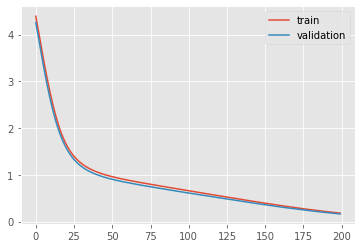

In [74]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

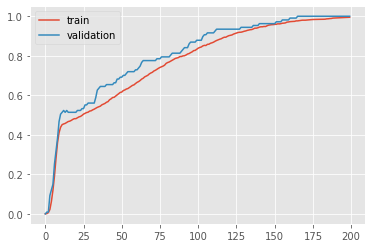

In [75]:
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [76]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.9894736842105263


In [78]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Away win count:", (y_train==2).sum())

Y train
Unique train labels: [0 1 2]
Away win count: 757
Draw count: 686
Away win count: 1217


In [79]:
print("Train Prediction")
train_predictions = np.argmax(model.predict(X_train), axis=1)
print("Unique train labels:", np.unique(train_predictions))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Home win count:", (y_train==2).sum())

Train Prediction
Unique train labels: [0 1 2]
Away win count: 757
Draw count: 686
Home win count: 1217


In [80]:
# Train
df_conf_matrix = pd.DataFrame(confusion_matrix(y_train, train_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Train Data")
df_conf_matrix

Train Data


pred home  pred draw  pred away
true home        747          0         10
true draw          0        683          3
true away          0          0       1217

In [81]:
# Test
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, test_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Test Data")
df_conf_matrix

Test Data


pred home  pred draw  pred away
true home        109          0          1
true draw          0         94          3
true away          0          0        173

## Stupid models

####  accumulation history goal

In [82]:
def get_accuracy(test_preidction, y_test):
    return (test_predictions == y_test.values).sum() / y_test.values.shape[0]

def goal_score_history(X_test):
    my_pred_h =  2*(X_test['HTGS'] > X_test['ATGS'])
    my_pred_a =  0*(X_test['HTGS'] < X_test['ATGS'])
    my_pred_d =  1*(X_test['HTGS'] == X_test['ATGS'])
    my_pred = my_pred_h + my_pred_a + my_pred_d
    return my_pred

# print(X_test.loc[10,:])
# print(list(pred_on_gs(X_test)))
# print(y_test)
# print(ftrLE.inverse_transform(pred_on_gs(X_test)))
test_predictions = list(goal_score_history(X_test))
print("Test set accuracy goal_score_history:", get_accuracy(test_predictions,y_test))

Test set accuracy goal_score_history: 0.4605263157894737


#### always home, away, draw

In [83]:
def home_always_win(X_test):
    return [2] * X_test.shape[0]

def away_always_win(X_test):
    return [0] * X_test.shape[0]

def always_draw(X_test):
    return [1] * X_test.shape[0]


test_predictions = list(home_always_win(X_test))
print("Test set accuracy home_always_win:", get_accuracy(test_predictions,y_test))

test_predictions = list(away_always_win(X_test))
print("Test set accuracy away_always_win:", get_accuracy(test_predictions,y_test))

test_predictions = list(always_draw(X_test))
print("Test set accuracy always_draw:", get_accuracy(test_predictions,y_test))

Test set accuracy home_always_win: 0.45526315789473687
Test set accuracy away_always_win: 0.2894736842105263
Test set accuracy always_draw: 0.25526315789473686


#### 

In [84]:
def random_distribution_to_the_train(X_train,y_train,X_test):
    distribution = [len(y_train[y_train == 0]),len(y_train[y_train == 1]),len(y_train[y_train == 2])]
    distribution = np.array(distribution)/sum(distribution)
    result = []
    for i in range(len(X_test)):
        result.append(np.random.choice([0,1,2], p=distribution))
    return np.array(result)


result = random_distribution_to_the_train(X_train,y_train,X_test)

test_predictions = list(random_distribution_to_the_train(X_train,y_train,X_test))
print("Test set accuracy random_distribution_to_the_train:", get_accuracy(test_predictions,y_test))

Test set accuracy random_distribution_to_the_train: 0.3157894736842105


In [ ]:
history